# Electric Vehicles charging management using machine learning to save grid and provide Fast Charging.

Comprised of paper work with implementation!

# Pre-processing 🔧

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('Data.csv')

In [3]:
df.isnull().sum()# checking for null values

Day       0
Month     0
Hour      0
Minute    0
Class     0
dtype: int64

In [4]:
df

Day  Month  Hour  Minute Class
0        1      1     0       0  HIGH
1        1      1     0      10  HIGH
2        1      1     0      20  HIGH
3        1      1     0      30  HIGH
4        1      1     0      40  HIGH
...    ...    ...   ...     ...   ...
52555   31     12    23      10  HIGH
52556   31     12    23      20  HIGH
52557   31     12    23      30  HIGH
52558   31     12    23      40  HIGH
52559   31     12    23      50  HIGH

[52560 rows x 5 columns]

In [5]:
df['Class'].value_counts()

HIGH      30037
NORMAL    15470
LOW        7053
Name: Class, dtype: int64

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X

Day  Month  Hour  Minute
0        1      1     0       0
1        1      1     0      10
2        1      1     0      20
3        1      1     0      30
4        1      1     0      40
...    ...    ...   ...     ...
52555   31     12    23      10
52556   31     12    23      20
52557   31     12    23      30
52558   31     12    23      40
52559   31     12    23      50

[52560 rows x 4 columns]

In [8]:
# geting dummies for the categorical variable. You can use one hot encoding but this is easy😃
df = pd.get_dummies(df)

In [9]:
df

Day  Month  Hour  Minute  Class_HIGH  Class_LOW  Class_NORMAL
0        1      1     0       0           1          0             0
1        1      1     0      10           1          0             0
2        1      1     0      20           1          0             0
3        1      1     0      30           1          0             0
4        1      1     0      40           1          0             0
...    ...    ...   ...     ...         ...        ...           ...
52555   31     12    23      10           1          0             0
52556   31     12    23      20           1          0             0
52557   31     12    23      30           1          0             0
52558   31     12    23      40           1          0             0
52559   31     12    23      50           1          0             0

[52560 rows x 7 columns]

# Modeling

In [3]:
#Creating empty DataFrame for holding models information
cols = ['Model Name','F1 Score', 'Precision', 'Recall', 'ROC-AUC Score', 'Accuracy', 'Time for each pred']
model_results = pd.DataFrame(columns = cols)

In [2]:
#Creating empty DataFrame for holding models information
cols = ['Model Name','F1 Score', 'Precision', 'Recall', 'Accuracy']
model_results_train = pd.DataFrame(columns = cols)

# ANN

In [22]:
# getiing X and y
X = df.iloc[:, :-3]
y = df.iloc[:, -3:]

In [23]:
y

Class_HIGH  Class_LOW  Class_NORMAL
0               1          0             0
1               1          0             0
2               1          0             0
3               1          0             0
4               1          0             0
...           ...        ...           ...
52555           1          0             0
52556           1          0             0
52557           1          0             0
52558           1          0             0
52559           1          0             0

[52560 rows x 3 columns]

In [24]:
# spliting X, y into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36792, 4), (15768, 4), (36792, 3), (15768, 3))

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras import callbacks
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

np.random.seed(0)

In [28]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 64, activation = 'relu', input_dim = 4))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 3, activation = 'softmax'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 300, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.8986 - accuracy: 0.5704 - val_loss: 0.7705 - val_accuracy: 0.6187
Epoch 2/300
1150/1150 [==============================] - 1s 928us/step - loss: 0.7519 - accuracy: 0.6303 - val_loss: 0.7174 - val_accuracy: 0.6519
Epoch 3/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.7202 - accuracy: 0.6416 - val_loss: 0.7001 - val_accuracy: 0.6552
Epoch 4/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.7071 - accuracy: 0.6480 - val_loss: 0.6906 - val_accuracy: 0.6603
Epoch 5/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.6974 - accuracy: 0.6520 - val_loss: 0.6800 - val_accuracy: 0.6620
Epoch 6/300
1150/1150 [==============================] - 1s 925us/step - loss: 0.6877 - accuracy: 0.6521 - val_loss: 0.6725 - val_accuracy: 0.6641
Epoch 7/300
1150/1150 [==============================] - 1s 933us/step - loss: 0.6812 - accuracy: 0.6554 - val_loss: 0.6628 - 

Epoch 112/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4348 - accuracy: 0.8135 - val_loss: 0.4078 - val_accuracy: 0.8243
Epoch 113/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.4346 - accuracy: 0.8114 - val_loss: 0.4090 - val_accuracy: 0.8243
Epoch 114/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4338 - accuracy: 0.8137 - val_loss: 0.4080 - val_accuracy: 0.8244
Epoch 115/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4322 - accuracy: 0.8146 - val_loss: 0.4080 - val_accuracy: 0.8238
Epoch 116/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4335 - accuracy: 0.8131 - val_loss: 0.4087 - val_accuracy: 0.8245
Epoch 117/300
1150/1150 [==============================] - 1s 864us/step - loss: 0.4314 - accuracy: 0.8150 - val_loss: 0.4078 - val_accuracy: 0.8251
Epoch 118/300
1150/1150 [==============================] - 1s 874us/step - loss: 0.4329 - accuracy: 0.8129 - val_los

1150/1150 [==============================] - 1s 947us/step - loss: 0.4086 - accuracy: 0.8251 - val_loss: 0.3918 - val_accuracy: 0.8304
Epoch 223/300
1150/1150 [==============================] - 1s 962us/step - loss: 0.4100 - accuracy: 0.8248 - val_loss: 0.3912 - val_accuracy: 0.8321
Epoch 224/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.4118 - accuracy: 0.8260 - val_loss: 0.3914 - val_accuracy: 0.8310
Epoch 225/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4099 - accuracy: 0.8242 - val_loss: 0.3910 - val_accuracy: 0.8305
Epoch 226/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.4108 - accuracy: 0.8255 - val_loss: 0.3917 - val_accuracy: 0.8291
Epoch 227/300
1150/1150 [==============================] - 1s 1ms/step - loss: 0.4080 - accuracy: 0.8252 - val_loss: 0.3916 - val_accuracy: 0.8311
Epoch 228/300
1150/1150 [==============================] - 2s 1ms/step - loss: 0.4091 - accuracy: 0.8257 - val_loss: 0.3911 - va

In [29]:
results = model.evaluate(X_test, y_test)

493/493 [==============================] - 0s 584us/step - loss: 0.3825 - accuracy: 0.8352


In [30]:
history_df = pd.DataFrame(history.history)
history_df

loss  accuracy  val_loss  val_accuracy
0    0.898562  0.570369  0.770475      0.618658
1    0.751851  0.630300  0.717398      0.651890
2    0.720186  0.641553  0.700071      0.655188
3    0.707134  0.648021  0.690604      0.660325
4    0.697365  0.652044  0.679982      0.661974
..        ...       ...       ...           ...
295  0.395794  0.832219  0.381142      0.835426
296  0.397122  0.831621  0.381710      0.835046
297  0.396699  0.833904  0.381472      0.834982
298  0.396978  0.832871  0.382052      0.835616
299  0.397037  0.832953  0.382474      0.835172

[300 rows x 4 columns]

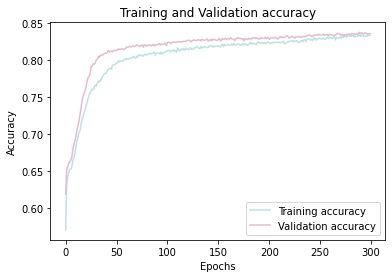

In [31]:
plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#e2bdd0", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred

array([[6.3186237e-03, 8.9536887e-01, 9.8312579e-02],
       [7.9275638e-01, 4.4993748e-04, 2.0679368e-01],
       [9.7518492e-01, 8.7575415e-08, 2.4814947e-02],
       ...,
       [5.2328193e-01, 2.4105782e-04, 4.7647709e-01],
       [8.2899118e-03, 4.1082245e-01, 5.8088756e-01],
       [9.9999905e-01, 3.6562288e-21, 1.0122576e-06]], dtype=float32)

In [34]:
#Let's calculate the time taken to made predictions
# %timeit print(model.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [35]:
# Let's check the model for 5 folds cross validation and calculate the accuracy
def baseline_model():     
    #ann = tf.keras.models.Sequential()
    #ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
    #ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
    #ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))
    #ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=300, batch_size=5, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 85.69% (0.74%)


Awesome! we got an 85 percent😀.

In [46]:
pred = model.predict(X_test)

In [47]:
pred

array([[4.0678638e-05, 8.5182500e-01, 1.4813429e-01],
       [7.3968452e-01, 6.3385091e-06, 2.6030913e-01],
       [9.9999344e-01, 0.0000000e+00, 6.5699883e-06],
       ...,
       [1.8391734e-01, 5.0111168e-05, 8.1603253e-01],
       [4.1710217e-03, 3.3144915e-01, 6.6437984e-01],
       [1.0000000e+00, 0.0000000e+00, 7.3980160e-25]], dtype=float32)

In [48]:
pred = np.argmax(pred, axis=1)

In [51]:
y_test = np.array(y_test)

In [52]:
y_test

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

In [53]:
y_test_new = np.argmax(y_test, axis=1)

In [54]:
pred

array([1, 0, 0, ..., 2, 2, 0], dtype=int64)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
report = classification_report(y_test_new, pred)
print(report)
cm = confusion_matrix(y_test_new, pred)
print(cm)
accuracy = accuracy_score(y_test_new, pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      8955
           1       0.85      0.74      0.79      2101
           2       0.77      0.78      0.78      4712

    accuracy                           0.86     15768
   macro avg       0.84      0.82      0.83     15768
weighted avg       0.86      0.86      0.86     15768

[[8325   24  606]
 [  46 1552  503]
 [ 759  255 3698]]
0.8609208523592086


In [60]:
Class=dataset['Class'].unique()
len(Class)

3

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = model.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              


roc_auc_score 0.9625132109343746


In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test_new, pred, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test_new, pred, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test_new, pred, average='weighted')
print('Precision:', Precision)

f1_score: 0.8602301141609464
Recall: 0.8609208523592086
Precision: 0.8606802032415813


In [67]:
#test
model_results.loc[-1] = ["ANN", f1_score, Precision, Recall, roc_auc_score, accuracy, 
                         '30.2 ms ± 2.15 ms']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  Accuracy  \
0        ANN   0.86023    0.86068  0.860921       0.962513  0.860921   

  Time for each pred  
0  30.2 ms ± 2.15 ms

In [68]:
#train
y_pred_train = model.predict(X_train)

In [69]:
y_pred_train = np.argmax(y_pred_train, axis=1)

In [70]:
y_train = np.array(y_train)

In [71]:
y_train_new = np.argmax(y_train, axis=1)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
report = classification_report(y_train_new, y_pred_train)
print(report)
cm = confusion_matrix(y_train_new, y_pred_train)
print(cm)
accuracy = accuracy_score(y_train_new, y_pred_train)
print(accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_train_new, y_pred_train, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_train_new, y_pred_train, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_train_new, y_pred_train, average='weighted')
print('Precision:', Precision)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     21082
           1       0.87      0.75      0.81      4952
           2       0.78      0.79      0.78     10758

    accuracy                           0.87     36792
   macro avg       0.86      0.83      0.84     36792
weighted avg       0.87      0.87      0.87     36792

[[19818    41  1223]
 [  113  3707  1132]
 [ 1797   498  8463]]
0.8694281365514243
f1_score: 0.8683938641942357
Recall: 0.8694281365514243
Precision: 0.868890694639021


In [73]:
#train
model_results_train.loc[-1] = ["ANN", f1_score, Precision, Recall, accuracy]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0        ANN  0.868394   0.868891  0.869428  0.869428

In [4]:
#train
model_results_train.loc[-1] = ["ANN", 0.868394, 0.868891, 0.869428, 0.869428]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0        ANN  0.868394   0.868891  0.869428  0.869428

# K-NN

*_k- Nearest Neighbors is one of the most basic algorithms used in supervised machine learning. It classifies new data points based on similarity index which is usually a distance metric. It uses a majority vote will classifying the new data. For example, if there are 3 blue dots and 1 dot near the new data point, it will classify it as a blue dot._*

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [11]:
dataset = pd.read_csv('Data.csv')

In [12]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
dataset['Class']= label_encoder.fit_transform(dataset['Class'])
 
dataset['Class'].unique()

array([0, 2, 1])

In [13]:
dataset['Class'].value_counts()

0    30037
2    15470
1     7053
Name: Class, dtype: int64

In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [16]:
print(X_train)

[[15  2 11 10]
 [ 1  3  2 50]
 [ 8  8 17 40]
 ...
 [23 10 22 10]
 [30 10 13 10]
 [19  1 23 20]]


In [17]:
y_train

array([2, 0, 1, ..., 0, 2, 0])

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4167   51  270]
 [  67  788  212]
 [ 530  222 1577]]


0.8285134449518011

## Hyperparameter Tuning 👷‍♂️

A hyperparameter is a parameter of the model that is set before the start of learning process. Different machine learning models have different hyperparameters. You can find out more about the different hyperparameters of k-NN here.

We will use the Exhaustive Grid Search technique for hyperparameter optimization. An exhaustive grid search takes in as many hyperparameters as you would like, and tries every single possible combination of the hyperparameters as well as as many cross-validations as you would like it to perform. An exhaustive grid search is a good way to determine the best hyperparameter values to use, but it can quickly become time consuming with every additional parameter value and cross-validation that you add.

In [35]:
from sklearn.model_selection import GridSearchCV

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)

We will use three hyperparamters- n-neighbors, weights and metric.

n_neighbors: Decide the best k based on the values we have computed earlier.
weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
metric: The distance metric to be used will calculating the similarity.

In [36]:
grid_params = { 'n_neighbors' : [5,10,15,20,25,30],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [37]:
gs = GridSearchCV(classifier, grid_params, verbose = 1, cv=3)

Since we have provided the class validation score as 3( cv= 3), Grid Search will evaluate the model 6 x 2 x 3 x 3 = 108 times with different hyperparameters.

In [38]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [39]:
# find the best score
g_res.best_score_

0.835661205121318

In [40]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

In [41]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=10,
                     weights='distance')

In [42]:
# get a prediction
y_knn = g_res.predict(X_test)

In [43]:
#Let's calculate the time taken to made predictions
# %timeit print(knn.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [55]:
y_knn_train = classifier.predict(X_train)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
report = classification_report(y_test, y_knn)
print(report)
cm = confusion_matrix(y_test, y_knn)
print(cm)
accuracy = accuracy_score(y_test, y_knn)
print(accuracy)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4488
           1       0.79      0.74      0.76      1067
           2       0.77      0.74      0.75      2329

    accuracy                           0.85      7884
   macro avg       0.82      0.80      0.81      7884
weighted avg       0.84      0.85      0.85      7884

[[4159   33  296]
 [  49  786  232]
 [ 423  174 1732]]
0.8469051243023846


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_knn, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_knn, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_knn, average='weighted')
print('Precision:', Precision)

f1_score: 0.845517210152886
Recall: 0.8469051243023846
Precision: 0.8447524715876863


In [47]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.9487524750686219


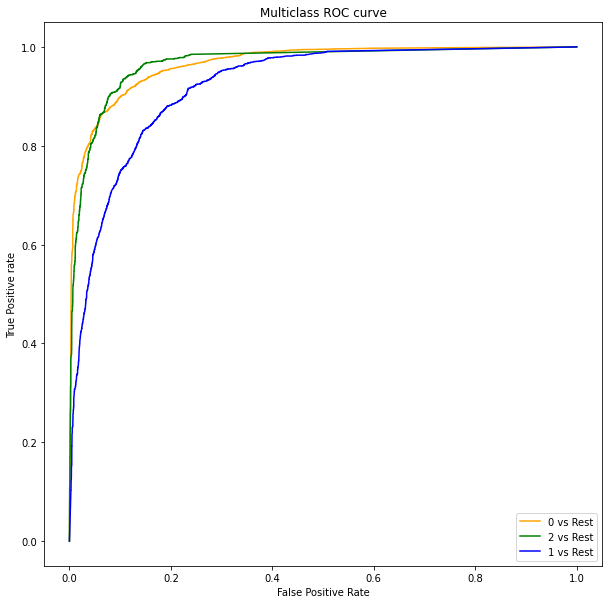

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = g_res.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_train, y_knn_train, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_train, y_knn_train, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_train, y_knn_train, average='weighted')
print('Precision:', Precision)

f1_score: 1.0
Recall: 1.0
Precision: 1.0


In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
report = classification_report(y_train, y_knn_train)
print(report)
cm = confusion_matrix(y_train, y_knn_train)
print(cm)
accuracy = accuracy_score(y_train, y_knn_train)
print(accuracy)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     25549
           1       0.79      0.80      0.80      5986
           2       0.83      0.74      0.78     13141

    accuracy                           0.87     44676
   macro avg       0.84      0.83      0.84     44676
weighted avg       0.87      0.87      0.87     44676

[[24237   229  1083]
 [  297  4800   889]
 [ 2383  1022  9736]]
0.8678708926492972


In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_train, y_knn_train, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_train, y_knn_train, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_train, y_knn_train, average='weighted')
print('Precision:', Precision)

f1_score: 0.8657127409045967
Recall: 0.8678708926492972
Precision: 0.8658179071067252


In [ ]:
# [[22501     64     39]
#  [    22  5196     49]                             38876 39420
#  [    120     250 11179]]

In [111]:
model_results.loc[-1] = ["K-NN", f1_score, Precision, Recall, roc_auc_score, accuracy, '1.21 ms ± 46.9 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  Accuracy  \
0       K-NN  0.838987   0.838296  0.839954        0.94439  0.839954   

  Time for each pred  
0  1.21 ms ± 46.9 µs

In [14]:
model_results.loc[-1] = ["K-NN", 0.838987, 0.838296, 0.839954, 0.94439, 0.839954, '1.21 ms ± 46.9 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  Accuracy  \
0       K-NN  0.838987   0.838296  0.839954        0.94439  0.839954   
1        ANN       NaN        NaN       NaN            NaN  0.855000   

  Time for each pred  
0  1.21 ms ± 46.9 µs  
1  30.2 ms ± 2.15 ms

In [63]:
#train
model_results_train.loc[-1] = ["K-NN", f1_score, Precision, Recall, accuracy]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0       K-NN  0.865713   0.865818  0.867871  0.867871
1       K-NN  1.000000   1.000000  1.000000  0.867871
2        ANN  0.868394   0.868891  0.869428  0.869428

In [5]:
#train
model_results_train.loc[-1] = ["K-NN", 0.865713, 0.865818, 0.867871, 0.867871]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0       K-NN  0.865713   0.865818  0.867871  0.867871
1        ANN  0.868394   0.868891  0.869428  0.869428

# GaussianNB

In [100]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5802    0 1631]
 [ 575    0 1211]
 [1512    0 2409]]


0.6248858447488584

We will not be performing hyperparameter tuning here because even after performing that we cannot get the accuracy any close to the models like Decission Tree, SVM, XGBoost, etc.

In [74]:
# get a prediction
y_pred = classifier.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      7433
           1       0.00      0.00      0.00      1786
           2       0.46      0.61      0.53      3921

    accuracy                           0.62     13140
   macro avg       0.40      0.46      0.43     13140
weighted avg       0.55      0.62      0.59     13140

[[5802    0 1631]
 [ 575    0 1211]
 [1512    0 2409]]
0.6248858447488584


In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_pred, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', Precision)

f1_score: 0.5851602113950214
Recall: 0.6248858447488584
Precision: 0.5529276256843276


In [77]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.7913120531021309


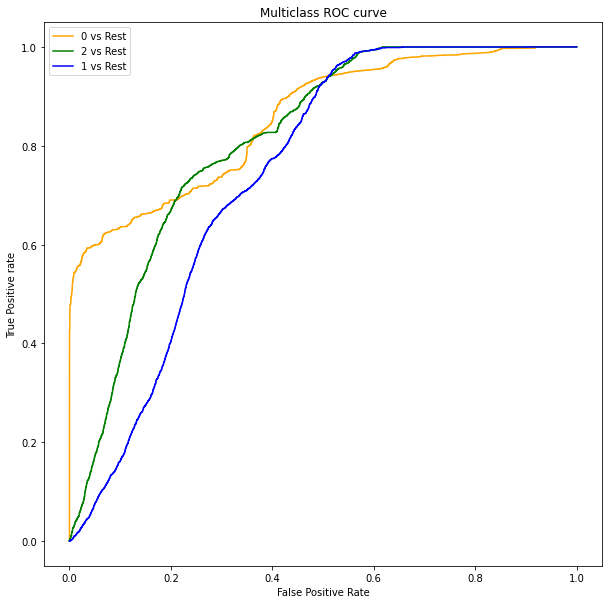

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = classifier.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [79]:
#Let's calculate the time taken to made predictions
# %timeit print(classifier.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [80]:
model_results.loc[-1] = ["GaussianNB", f1_score, Precision, Recall, roc_auc_score, accuracy, '307 µs ± 11.1 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  Accuracy  \
0  GaussianNB  0.585160   0.552928  0.624886       0.791312  0.624886   
1        K-NN  0.838987   0.838296  0.839954       0.944390  0.839954   
2         ANN       NaN        NaN       NaN            NaN  0.855000   

  Time for each pred  
0   307 µs ± 11.1 µs  
1  1.21 ms ± 46.9 µs  
2  30.2 ms ± 2.15 ms

In [16]:
model_results.loc[-1] = ["GaussianNB", 0.585160, 0.552928, 0.624886, 0.791312, 0.624886, '307 µs ± 11.1 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  Accuracy  \
0  GaussianNB  0.585160   0.552928  0.624886       0.791312  0.624886   
1        K-NN  0.838987   0.838296  0.839954       0.944390  0.839954   
2         ANN       NaN        NaN       NaN            NaN  0.855000   

  Time for each pred  
0   307 µs ± 11.1 µs  
1  1.21 ms ± 46.9 µs  
2  30.2 ms ± 2.15 ms

In [81]:
#Train
y_pred_train = classifier.predict(X_train)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
report = classification_report(y_train, y_pred_train)
print(report)
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
accuracy = accuracy_score(y_train, y_pred_train)
print(accuracy)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77     22604
           1       0.00      0.00      0.00      5267
           2       0.46      0.62      0.53     11549

    accuracy                           0.63     39420
   macro avg       0.40      0.47      0.43     39420
weighted avg       0.56      0.63      0.59     39420

[[17816     0  4788]
 [ 1594     0  3673]
 [ 4415     0  7134]]
0.6329274479959411


In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_train, y_pred_train, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_train, y_pred_train, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_train, y_pred_train, average='weighted')
print('Precision:', Precision)

f1_score: 0.5940664418884489
Recall: 0.6329274479959411
Precision: 0.5628131207718781


In [84]:
model_results_train.loc[-1] = ["GaussianNB", f1_score, Precision, Recall, accuracy]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0  GaussianNB  0.594066   0.562813  0.632927  0.632927
1        K-NN  1.000000   1.000000  1.000000  1.000000
2         ANN       NaN        NaN       NaN  0.867900

In [6]:
model_results_train.loc[-1] = ["GaussianNB", 0.594066,0.562813,0.632927, 0.632927]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0  GaussianNB  0.594066   0.562813  0.632927  0.632927
1        K-NN  0.865713   0.865818  0.867871  0.867871
2         ANN  0.868394   0.868891  0.869428  0.869428

# Kernel SVM

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', gamma=0.5, C=0.1, random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=0.1, gamma=0.5, random_state=0)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6426  161  846]
 [ 293  586  907]
 [ 846  184 2891]]


0.7536529680365297

## Hyperparameter Tuning 👷‍♂️

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same – in this case, like a classifier. We should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


From analysis the above output it is clear that for better result we can use rgb kernel with increasing c (here 0.1, 1, 10, 100, 1000) value keeping the gamma value as 1. So, i will be interupting the kernel and will do tuning based on the predictions i made from above as it is taking a lot of time to run 😕. But we will increase the C ruther for better result as there is a rising trend.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [22]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.797 total time=  56.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.790 total time=  40.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=  38.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=  40.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.782 total time=  37.6s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.827 total time=  31.2s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.824 total time=  30.2s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.819 total time=  30.8s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.822 total time=  38.2s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.822 total time=  32.8s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.835 total time=  30.9s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
grid.best_score_

0.8392440385591069

In [24]:
# get the hyperparameters with the best score
grid.best_params_ 

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [25]:
# use the best hyperparameters
classifier = SVC(kernel='rbf', gamma=1, C=1000, random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(C=1000, gamma=1, probability=True, random_state=0)

In [40]:
# get a prediction
%timeit y_classifier = classifier.predict(X_test)

15.4 s ± 482 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
y_classifier = classifier.predict(X_test)

In [27]:
# %timeit print(classifier.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
print(classification_report(y_test, y_classifier))
cm = confusion_matrix(y_test, y_classifier)
print(cm)
accuracy = accuracy_score(y_test, y_classifier)
print(accuracy)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7433
           1       0.73      0.76      0.74      1786
           2       0.77      0.72      0.74      3921

    accuracy                           0.84     13140
   macro avg       0.80      0.80      0.80     13140
weighted avg       0.83      0.84      0.83     13140

[[6815  114  504]
 [  91 1351  344]
 [ 716  394 2811]]
0.8353881278538813


Jump from 75 to 83 percent after tuning Awesome😀

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_classifier, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_classifier, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_classifier, average='weighted')
print('Precision:', Precision)

f1_score: 0.8342122414006847
Recall: 0.8353881278538813
Precision: 0.8338081303994852


In [30]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.9422213255067371


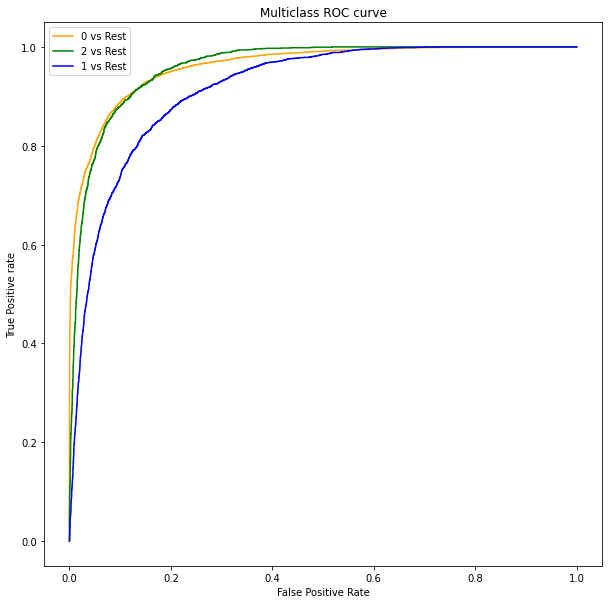

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = classifier.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [32]:
model_results.loc[-1] = ["Kernel SVM", f1_score, Precision, Recall, roc_auc_score, accuracy, '1.47 ms ± 112 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  Accuracy  \
0  Kernel SVM  0.834212   0.833808  0.835388       0.942221  0.835388   
1  GaussianNB  0.585160   0.552928  0.624886       0.791312  0.624886   
2        K-NN  0.838987   0.838296  0.839954       0.944390  0.839954   
3         ANN       NaN        NaN       NaN            NaN  0.855000   

  Time for each pred  
0   1.47 ms ± 112 µs  
1   307 µs ± 11.1 µs  
2  1.21 ms ± 46.9 µs  
3  30.2 ms ± 2.15 ms

In [7]:
model_results.loc[-1] = ["Kernel SVM", 0.834212, 0.833808, 0.835388, 0.942221, 0.835388, '1.47 ms ± 112 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  Accuracy  \
0  Kernel SVM  0.834212   0.833808  0.835388       0.942221  0.835388   
1  GaussianNB  0.585160   0.552928  0.624886       0.791312  0.624886   
2        K-NN  0.838987   0.838296  0.839954       0.944390  0.839954   
3         ANN       NaN        NaN       NaN            NaN  0.852900   

  Time for each pred  
0   1.47 ms ± 112 µs  
1   307 µs ± 11.1 µs  
2  1.21 ms ± 46.9 µs  
3  30.2 ms ± 2.15 ms

In [33]:
#TRAIN
y_classifier_train = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
print(classification_report(y_train, y_classifier_train))
cm = confusion_matrix(y_train, y_classifier_train)
print(cm)
accuracy = accuracy_score(y_train, y_classifier_train)
print(accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_train, y_classifier_train, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_train, y_classifier_train, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_train, y_classifier_train, average='weighted')
print('Precision:', Precision)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     22604
           1       0.79      0.80      0.79      5267
           2       0.82      0.77      0.80     11549

    accuracy                           0.87     39420
   macro avg       0.84      0.84      0.84     39420
weighted avg       0.87      0.87      0.87     39420

[[21223   258  1123]
 [  197  4222   848]
 [ 1749   877  8923]]
0.871841704718417
f1_score: 0.8708951148752646
Recall: 0.871841704718417
Precision: 0.8705230256329357


In [34]:
model_results_train.loc[-1] = ["Kernel SVM", f1_score, Precision, Recall, accuracy]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0  Kernel SVM  0.870895   0.870523  0.871842  0.871842
1  GaussianNB  0.594066   0.562813  0.632927  0.632927
2        K-NN  1.000000   1.000000  1.000000  1.000000
3         ANN       NaN        NaN       NaN  0.867900

In [7]:
model_results_train.loc[-1] = ["Kernel SVM", 0.870895, 0.870523, 0.871842, 0.871842]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0  Kernel SVM  0.870895   0.870523  0.871842  0.871842
1  GaussianNB  0.594066   0.562813  0.632927  0.632927
2        K-NN  0.865713   0.865818  0.867871  0.867871
3         ANN  0.868394   0.868891  0.869428  0.869428

# Decission Tree Classification

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4252    1  235]
 [   1  936  130]
 [ 256  121 1952]]


0.9056316590563166

Highest accuracy(90.6%) till now😍. We have to perform hyperparameter tuning here. Let's see if we can increse the accuracy.

## Hyperparameter Tuning 👷‍♂️

We will be using and training model using these parameters- 
criterion, max_depth, min_samples_split, min_samples_leaf

In [40]:
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(2,10),
    'min_samples_leaf':range(1,5),
}

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(), 
             param_grid = param_dict, cv = 5, verbose = 1, n_jobs=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [43]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 9}

In [45]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_split=9)

In [45]:
# use the best hyperparameters
classifier = DecisionTreeClassifier(criterion= 'gini',max_depth= 9, min_samples_leaf= 1, 
                                    min_samples_split= 9, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=9, random_state=0)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_classifier = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, y_classifier))
cm = confusion_matrix(y_test, y_classifier)
print(cm)
accuracy_score(y_test, y_classifier)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4488
           1       0.88      0.88      0.88      1067
           2       0.84      0.84      0.84      2329

    accuracy                           0.91      7884
   macro avg       0.89      0.89      0.89      7884
weighted avg       0.91      0.91      0.91      7884

[[4252    1  235]
 [   1  936  130]
 [ 256  121 1952]]


0.9056316590563166

In [5]:
# %timeit print(classifier.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4488
           1       0.88      0.88      0.88      1067
           2       0.84      0.84      0.84      2329

    accuracy                           0.91      7884
   macro avg       0.89      0.89      0.89      7884
weighted avg       0.91      0.91      0.91      7884

[[4252    1  235]
 [   1  936  130]
 [ 256  121 1952]]
0.9056316590563166


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_pred, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', Precision)

f1_score: 0.9055151382669309
Recall: 0.9056316590563166
Precision: 0.9054120696074984


In [19]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.9190507782987268


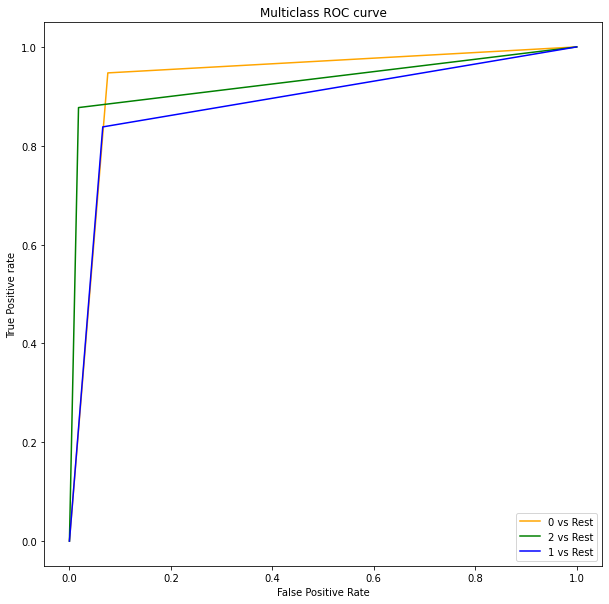

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = classifier.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [21]:
model_results.loc[-1] = ["Decision Tree Classifier", f1_score, Precision, Recall, roc_auc_score, accuracy, '209 µs ± 13.5 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  \
0  Decision Tree Classifier  0.905515   0.905412  0.905632       0.919051   

   Accuracy Time for each pred  
0  0.905632   209 µs ± 13.5 µs

In [8]:
model_results.loc[-1] = ["Decision Tree Classifier", 0.898040, 0.898064, 0.898021, 0.912530, 0.898021, '209 µs ± 13.5 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  \
0  Decision Tree Classifier  0.898040   0.898064  0.898021       0.912530   
1                Kernel SVM  0.834212   0.833808  0.835388       0.942221   
2                GaussianNB  0.585160   0.552928  0.624886       0.791312   
3                      K-NN  0.838987   0.838296  0.839954       0.944390   
4                       ANN       NaN        NaN       NaN            NaN   

   Accuracy Time for each pred  
0  0.898021   209 µs ± 13.5 µs  
1  0.835388   1.47 ms ± 112 µs  
2  0.624886   307 µs ± 11.1 µs  
3  0.839954  1.21 ms ± 46.9 µs  
4  0.852900  30.2 ms ± 2.15 ms

In [22]:
#TRAIN
y_classifier_train = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
print(classification_report(y_train, y_classifier_train))
cm = confusion_matrix(y_train, y_classifier_train)
print(cm)
accuracy = accuracy_score(y_train, y_classifier_train)
print(accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_train, y_classifier_train, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_train, y_classifier_train, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_train, y_classifier_train, average='weighted')
print('Precision:', Precision)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25549
           1       1.00      1.00      1.00      5986
           2       1.00      1.00      1.00     13141

    accuracy                           1.00     44676
   macro avg       1.00      1.00      1.00     44676
weighted avg       1.00      1.00      1.00     44676

[[25549     0     0]
 [    0  5986     0]
 [    0     0 13141]]
1.0
f1_score: 1.0
Recall: 1.0
Precision: 1.0


In [57]:
model_results_train.loc[-1] = ["Decision Tree Classifier", f1_score, Precision, Recall, accuracy]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index 37951
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0  Decision Tree Classifier  1.000000   1.000000  1.000000  1.000000
1                Kernel SVM  1.000000   1.000000  1.000000  1.000000
2                Kernel SVM  0.870895   0.870523  0.871842  0.871842
3                GaussianNB  0.594066   0.562813  0.632927  0.632927
4                      K-NN  1.000000   1.000000  1.000000  1.000000
5                       ANN       NaN        NaN       NaN  0.867900

In [8]:
model_results_train.loc[-1] = ["Decision Tree Classifier", 1.000000, 1.000000, 1.000000, .962735]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0  Decision Tree Classifier  1.000000   1.000000  1.000000  0.962735
1                Kernel SVM  0.870895   0.870523  0.871842  0.871842
2                GaussianNB  0.594066   0.562813  0.632927  0.632927
3                      K-NN  0.865713   0.865818  0.867871  0.867871
4                       ANN  0.868394   0.868891  0.869428  0.869428

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [89]:
y_pred = classifier.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4273   13  202]
 [  13  919  135]
 [ 328  142 1859]]


0.8943429731100964

## Hyperparameter Tuning 👷‍♂️

We will try adjusting the following set of hyperparameters:
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

I will use RandomizedSearchCV instead of GridSearchCV, we first need to create a parameter grid to sample from during fitting. You can try GridSearchCV too.

In [132]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [133]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  22.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  21.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  21.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  33.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  33.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  33.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  33.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  33.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  33.2s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  20.6s
[CV] END bootstrap=True, max_dep

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   8.8s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   8.6s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   8.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  11.7s
[CV] END bootstrap=True, max_depth=90, max_fe

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   4.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   4.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   4.5s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  19.4s
[CV] END bootstrap=False, max_depth=80, max_f

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.5min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.5min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.5min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  20.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  20.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  18.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=  34.1s
[CV] END bootstrap=True, max_depth

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [134]:
rf_random.best_score_

0.8930238457635719

In [135]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [136]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=600)

Let's check it using GridSearchCV with the best param of RandomizedSearchCV.

In [66]:
# #Experiment
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [140, 160, 180], #best is 100 so let's take 90 and 110 also
    'max_features': ['sqrt'],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [600, 800]
}
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 3, verbose = 2)

In [67]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END bootstrap=False, max_depth=140, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  12.7s
[CV] END bootstrap=False, max_depth=140, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  17.6s
[CV] END bootstrap=False, max_depth=140, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  16.7s
[CV] END bootstrap=False, max_depth=140, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  17.3s
[CV] END bootstrap=False, max_depth=140, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  16.8s
[CV] END bootstrap=False, max_depth=140, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  16.9s
[CV] END bootstrap=False, max_depth=160, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimator

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [140, 160, 180],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [600, 800]},
             verbose=2)

In [68]:
grid_search.best_score_

0.8926686960933536

In [69]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 140,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 800}

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_grid_search = grid_search.predict(X_test)
# print classification report
print(classification_report(y_test, y_grid_search))
cm = confusion_matrix(y_test, y_grid_search)
print(cm)
accuracy = accuracy_score(y_test, y_grid_search)
print(accuracy)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7433
           1       0.88      0.85      0.87      1786
           2       0.83      0.83      0.83      3921

    accuracy                           0.90     13140
   macro avg       0.88      0.88      0.88     13140
weighted avg       0.90      0.90      0.90     13140

[[7006   13  414]
 [  15 1525  246]
 [ 463  202 3256]]
0.8970319634703197


Awesome we increase the accuracy by .3 percent😀.

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_grid_search, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_grid_search, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_grid_search, average='weighted')
print('Precision:', Precision)

f1_score: 0.8968812367684791
Recall: 0.8970319634703197
Precision: 0.896783161669409


In [72]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.9753975425216377


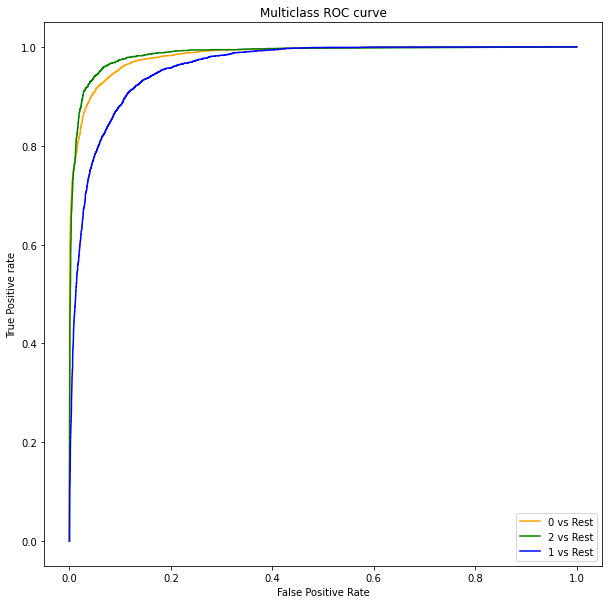

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = grid_search.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [74]:
# %timeit print(grid_search.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [75]:
model_results.loc[-1] = ["Random Forest Classifier", f1_score, Precision, Recall, roc_auc_score, accuracy, 
                         '38.9 ms ± 1.21 ms']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  \
0  Random Forest Classifier  0.896881   0.896783  0.897032       0.975398   
1  Decision Tree Classifier  0.898040   0.898064  0.898021       0.912530   
2                Kernel SVM  0.834212   0.833808  0.835388       0.942221   
3                GaussianNB  0.585160   0.552928  0.624886       0.791312   
4                      K-NN  0.838987   0.838296  0.839954       0.944390   
5                       ANN       NaN        NaN       NaN            NaN   

   Accuracy Time for each pred  
0  0.897032  38.9 ms ± 1.21 ms  
1  0.871842   209 µs ± 13.5 µs  
2  0.835388   1.47 ms ± 112 µs  
3  0.624886   307 µs ± 11.1 µs  
4  0.839954  1.21 ms ± 46.9 µs  
5  0.855000  30.2 ms ± 2.15 ms

In [9]:
model_results.loc[-1] = ["Random Forest Classifier", 0.896548, 0.896490, 0.896651, 0.975160, 0.896651, 
                         '38.9 ms ± 1.21 ms']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  \
0  Random Forest Classifier  0.896548   0.896490  0.896651       0.975160   
1  Decision Tree Classifier  0.898040   0.898064  0.898021       0.912530   
2                Kernel SVM  0.834212   0.833808  0.835388       0.942221   
3                GaussianNB  0.585160   0.552928  0.624886       0.791312   
4                      K-NN  0.838987   0.838296  0.839954       0.944390   
5                       ANN       NaN        NaN       NaN            NaN   

   Accuracy Time for each pred  
0  0.896651  38.9 ms ± 1.21 ms  
1  0.898021   209 µs ± 13.5 µs  
2  0.835388   1.47 ms ± 112 µs  
3  0.624886   307 µs ± 11.1 µs  
4  0.839954  1.21 ms ± 46.9 µs  
5  0.852900  30.2 ms ± 2.15 ms

In [91]:
#TRAIN
y_classifier_train = grid_search.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
print(classification_report(y_train, y_classifier_train))
cm = confusion_matrix(y_train, y_classifier_train)
print(cm)
accuracy = accuracy_score(y_train, y_classifier_train)
print(accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_train, y_classifier_train, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_train, y_classifier_train, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_train, y_classifier_train, average='weighted')
print('Precision:', Precision)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25549
           1       0.99      0.99      0.99      5986
           2       0.99      0.98      0.99     13141

    accuracy                           0.99     44676
   macro avg       0.99      0.99      0.99     44676
weighted avg       0.99      0.99      0.99     44676

[[25501     0    48]
 [    0  5955    31]
 [  158    59 12924]]
0.9933745187572746
f1_score: 0.9933643352748944
Recall: 0.9933745187572746
Precision: 0.9933770618601224


In [77]:
model_results_train.loc[-1] = ["Random Forest Classifier", f1_score, Precision, Recall, accuracy]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0  Random Forest Classifier  0.990409   0.990410  0.990411  0.990411
1  Decision Tree Classifier  1.000000   1.000000  1.000000  1.000000
2                Kernel SVM  1.000000   1.000000  1.000000  1.000000
3                Kernel SVM  0.870895   0.870523  0.871842  0.871842
4                GaussianNB  0.594066   0.562813  0.632927  0.632927
5                      K-NN  1.000000   1.000000  1.000000  1.000000
6                       ANN       NaN        NaN       NaN  0.867900

In [9]:
model_results_train.loc[-1] = ["Random Forest Classifier", 0.990409, 0.990410,0.990411, 0.990411]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0  Random Forest Classifier  0.990409   0.990410  0.990411  0.990411
1  Decision Tree Classifier  1.000000   1.000000  1.000000  0.962735
2                Kernel SVM  0.870895   0.870523  0.871842  0.871842
3                GaussianNB  0.594066   0.562813  0.632927  0.632927
4                      K-NN  0.865713   0.865818  0.867871  0.867871
5                       ANN  0.868394   0.868891  0.869428  0.869428

# XGBoost

In [13]:
from xgboost import XGBClassifier
classifier = XGBClassifier(eval_metric = 'merror')
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7433
           1       0.86      0.84      0.85      1786
           2       0.82      0.82      0.82      3921

    accuracy                           0.89     13140
   macro avg       0.87      0.86      0.87     13140
weighted avg       0.89      0.89      0.89     13140

[[7001   12  420]
 [  12 1494  280]
 [ 486  238 3197]]
0.8898021308980213


## Bayesian Optimization with HYPEROPT 👷‍♂️

- Bayesian optimization is optimization or finding the best parameter for a machine learning or deep learning algorithm.
- HYPEROPT is a powerful python library that search through an hyperparameter space of values and find the best possible values that yield the minimum of the loss function.

- Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

We will be optimizing the cost function along with tuning the model to find the best fit.

In [44]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 0,1),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 100,
        'seed': 0
    }

In [45]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [46]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.6160578386605784                                     
SCORE:                                                                            
0.6203196347031964                                                                
SCORE:                                                                            
0.6156773211567732                                                                
SCORE:                                                                            
0.619558599695586                                                                 
SCORE:                                                                            
0.6248097412480974                                                                
SCORE:                                                                            
0.6245814307458143                                                                
SCORE:                                                    

0.6197869101978691                                                                 
SCORE:                                                                             
0.6226788432267885                                                                 
SCORE:                                                                             
0.6214611872146119                                                                 
100%|██████████| 100/100 [06:08<00:00,  3.69s/trial, best loss: -0.6251141552511416]


In [47]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9601547056363543, 'gamma': 0.9339466995348077, 'max_depth': 18.0, 'min_child_weight': 5.0, 'reg_alpha': 0.0, 'reg_lambda': 0.9586958567021032}


In [49]:
from xgboost import XGBClassifier

classifier = XGBClassifier(colsample_bytree= 0.9601547056363543, gamma= 0.9339466995348077, max_depth= 18, 
                           min_child_weight= 5, reg_alpha= 0.0, reg_lambda= 0.9586958567021032, eval_metric = 'merror')
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9601547056363543,
              eval_metric='merror', gamma=0.9339466995348077, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=18,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.0,
              reg_lambda=0.9586958567021032, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7433
           1       0.91      0.88      0.90      1786
           2       0.86      0.86      0.86      3921

    accuracy                           0.92     13140
   macro avg       0.90      0.90      0.90     13140
weighted avg       0.92      0.92      0.92     13140

[[7078    0  355]
 [   1 1579  206]
 [ 389  158 3374]]


0.9156012176560122

😍😍😍😍ok.....

**Let's try GridSearchCV also**

In [168]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

grid_search = GridSearchCV(estimator = XGBClassifier(seed = 20, eval_metric = 'merror'), param_grid = params, cv = 3, verbose = 1)

In [169]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=20,
  

In [176]:
y_grid = grid_search.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7433
           1       0.91      0.88      0.90      1786
           2       0.86      0.86      0.86      3921

    accuracy                           0.92     13140
   macro avg       0.90      0.90      0.90     13140
weighted avg       0.92      0.92      0.92     13140

[[7078    0  355]
 [   1 1579  206]
 [ 389  158 3374]]
0.9156012176560122


Better😀‼‼

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_pred, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', Precision)

f1_score: 0.9155497635114848
Recall: 0.9156012176560122
Precision: 0.91555301541659


In [54]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.981836664891379


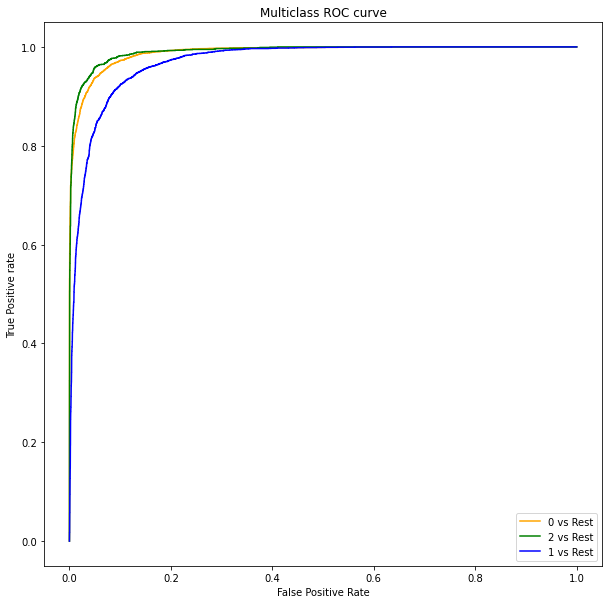

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = classifier.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [56]:
# %timeit print(grid_search.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [65]:
model_results.loc[-1] = ["XGBoost", f1_score, Precision, Recall, roc_auc_score, accuracy, 
                         '5.25 ms ± 144 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  Accuracy  \
0    XGBoost   0.91555   0.915553  0.915601       0.981837  0.915601   

  Time for each pred  
0   5.25 ms ± 144 µs

In [78]:
model_results.loc[-1] = ["XGBoost", 0.91555, 0.915553, 0.915601, 0.981837, 0.915601, 
                         '5.25 ms ± 144 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  \
0                   XGBoost  0.915550   0.915553  0.915601       0.981837   
1  Random Forest Classifier  0.896881   0.896783  0.897032       0.975398   
2  Decision Tree Classifier  0.898040   0.898064  0.898021       0.912530   
3                Kernel SVM  0.834212   0.833808  0.835388       0.942221   
4                GaussianNB  0.585160   0.552928  0.624886       0.791312   
5                      K-NN  0.838987   0.838296  0.839954       0.944390   
6                       ANN       NaN        NaN       NaN            NaN   

   Accuracy Time for each pred  
0  0.915601   5.25 ms ± 144 µs  
1  0.897032  38.9 ms ± 1.21 ms  
2  0.871842   209 µs ± 13.5 µs  
3  0.835388   1.47 ms ± 112 µs  
4  0.624886   307 µs ± 11.1 µs  
5  0.839954  1.21 ms ± 46.9 µs  
6  0.855000  30.2 ms ± 2.15 ms

In [67]:
#train
y_pred_train = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_train, y_pred_train))
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
accuracy = accuracy_score(y_train, y_pred_train)
print(accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_train, y_pred_train, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_train, y_pred_train, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_train, y_pred_train, average='weighted')
print('Precision:', Precision)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22604
           1       0.94      0.92      0.93      5267
           2       0.91      0.92      0.92     11549

    accuracy                           0.95     39420
   macro avg       0.94      0.94      0.94     39420
weighted avg       0.95      0.95      0.95     39420

[[22005     3   596]
 [    1  4828   438]
 [  637   287 10625]]
0.9502283105022831
f1_score: 0.9502268800388756
Recall: 0.9502283105022831
Precision: 0.9502894897319075


In [68]:
#train
model_results_train.loc[-1] = ["XGBoost", f1_score, Precision, Recall, accuracy]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0    XGBoost  0.950227   0.950289  0.950228  0.950228

In [10]:
#train
model_results_train.loc[-1] = ["XGBoost", 0.950227, 0.950289, 0.950228, 0.950228]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0                   XGBoost  0.950227   0.950289  0.950228  0.950228
1  Random Forest Classifier  0.990409   0.990410  0.990411  0.990411
2  Decision Tree Classifier  1.000000   1.000000  1.000000  0.962735
3                Kernel SVM  0.870895   0.870523  0.871842  0.871842
4                GaussianNB  0.594066   0.562813  0.632927  0.632927
5                      K-NN  0.865713   0.865818  0.867871  0.867871
6                       ANN  0.868394   0.868891  0.869428  0.869428

# CatBoost

In [1]:
from catboost import CatBoostClassifier

In [12]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.095434
0:	learn: 1.0116466	total: 108ms	remaining: 1m 48s
1:	learn: 0.9407682	total: 117ms	remaining: 58.5s
2:	learn: 0.8842236	total: 127ms	remaining: 42.3s
3:	learn: 0.8367285	total: 136ms	remaining: 33.9s
4:	learn: 0.7974537	total: 145ms	remaining: 28.9s
5:	learn: 0.7640474	total: 154ms	remaining: 25.6s
6:	learn: 0.7345456	total: 163ms	remaining: 23.1s
7:	learn: 0.7072482	total: 171ms	remaining: 21.2s
8:	learn: 0.6864100	total: 182ms	remaining: 20.1s
9:	learn: 0.6662347	total: 192ms	remaining: 19s
10:	learn: 0.6506111	total: 202ms	remaining: 18.1s
11:	learn: 0.6348348	total: 212ms	remaining: 17.5s
12:	learn: 0.6202711	total: 224ms	remaining: 17s
13:	learn: 0.6042252	total: 234ms	remaining: 16.5s
14:	learn: 0.5930944	total: 242ms	remaining: 15.9s
15:	learn: 0.5798320	total: 251ms	remaining: 15.5s
16:	learn: 0.5690671	total: 260ms	remaining: 15.1s
17:	learn: 0.5592319	total: 270ms	remaining: 14.7s
18:	learn: 0.5519292	total: 279ms	remaining: 14.4s
19:	learn: 0.5

161:	learn: 0.3609055	total: 1.82s	remaining: 9.42s
162:	learn: 0.3605736	total: 1.83s	remaining: 9.4s
163:	learn: 0.3601952	total: 1.84s	remaining: 9.38s
164:	learn: 0.3595810	total: 1.85s	remaining: 9.37s
165:	learn: 0.3592568	total: 1.86s	remaining: 9.35s
166:	learn: 0.3590676	total: 1.87s	remaining: 9.33s
167:	learn: 0.3587194	total: 1.88s	remaining: 9.31s
168:	learn: 0.3583286	total: 1.89s	remaining: 9.29s
169:	learn: 0.3581080	total: 1.9s	remaining: 9.27s
170:	learn: 0.3575204	total: 1.91s	remaining: 9.24s
171:	learn: 0.3568435	total: 1.92s	remaining: 9.22s
172:	learn: 0.3563959	total: 1.92s	remaining: 9.2s
173:	learn: 0.3557092	total: 1.93s	remaining: 9.18s
174:	learn: 0.3554485	total: 1.94s	remaining: 9.15s
175:	learn: 0.3549564	total: 1.95s	remaining: 9.13s
176:	learn: 0.3544162	total: 1.96s	remaining: 9.11s
177:	learn: 0.3538683	total: 1.97s	remaining: 9.09s
178:	learn: 0.3530036	total: 1.98s	remaining: 9.07s
179:	learn: 0.3527951	total: 1.99s	remaining: 9.05s
180:	learn: 0.3

326:	learn: 0.3126505	total: 3.44s	remaining: 7.08s
327:	learn: 0.3124391	total: 3.45s	remaining: 7.07s
328:	learn: 0.3122705	total: 3.46s	remaining: 7.06s
329:	learn: 0.3120848	total: 3.47s	remaining: 7.04s
330:	learn: 0.3119362	total: 3.48s	remaining: 7.03s
331:	learn: 0.3117801	total: 3.49s	remaining: 7.02s
332:	learn: 0.3115031	total: 3.5s	remaining: 7.01s
333:	learn: 0.3113040	total: 3.51s	remaining: 6.99s
334:	learn: 0.3111258	total: 3.52s	remaining: 6.98s
335:	learn: 0.3108947	total: 3.52s	remaining: 6.97s
336:	learn: 0.3105238	total: 3.53s	remaining: 6.95s
337:	learn: 0.3102689	total: 3.54s	remaining: 6.94s
338:	learn: 0.3101564	total: 3.55s	remaining: 6.92s
339:	learn: 0.3099966	total: 3.56s	remaining: 6.91s
340:	learn: 0.3099213	total: 3.57s	remaining: 6.9s
341:	learn: 0.3096967	total: 3.58s	remaining: 6.88s
342:	learn: 0.3094658	total: 3.59s	remaining: 6.87s
343:	learn: 0.3093335	total: 3.6s	remaining: 6.86s
344:	learn: 0.3092418	total: 3.6s	remaining: 6.84s
345:	learn: 0.30

503:	learn: 0.2842491	total: 5.06s	remaining: 4.98s
504:	learn: 0.2840389	total: 5.07s	remaining: 4.97s
505:	learn: 0.2839444	total: 5.08s	remaining: 4.96s
506:	learn: 0.2837941	total: 5.09s	remaining: 4.95s
507:	learn: 0.2836523	total: 5.1s	remaining: 4.94s
508:	learn: 0.2835936	total: 5.12s	remaining: 4.93s
509:	learn: 0.2835077	total: 5.13s	remaining: 4.92s
510:	learn: 0.2832912	total: 5.14s	remaining: 4.92s
511:	learn: 0.2831100	total: 5.15s	remaining: 4.91s
512:	learn: 0.2829846	total: 5.16s	remaining: 4.9s
513:	learn: 0.2828537	total: 5.17s	remaining: 4.89s
514:	learn: 0.2828031	total: 5.18s	remaining: 4.88s
515:	learn: 0.2826900	total: 5.19s	remaining: 4.87s
516:	learn: 0.2826249	total: 5.2s	remaining: 4.86s
517:	learn: 0.2824865	total: 5.21s	remaining: 4.85s
518:	learn: 0.2823186	total: 5.22s	remaining: 4.84s
519:	learn: 0.2821094	total: 5.23s	remaining: 4.83s
520:	learn: 0.2820233	total: 5.24s	remaining: 4.82s
521:	learn: 0.2818684	total: 5.25s	remaining: 4.81s
522:	learn: 0.2

677:	learn: 0.2654163	total: 6.7s	remaining: 3.18s
678:	learn: 0.2653042	total: 6.7s	remaining: 3.17s
679:	learn: 0.2652228	total: 6.71s	remaining: 3.16s
680:	learn: 0.2651327	total: 6.72s	remaining: 3.15s
681:	learn: 0.2650092	total: 6.73s	remaining: 3.14s
682:	learn: 0.2648307	total: 6.74s	remaining: 3.13s
683:	learn: 0.2647220	total: 6.75s	remaining: 3.12s
684:	learn: 0.2646115	total: 6.76s	remaining: 3.11s
685:	learn: 0.2644279	total: 6.76s	remaining: 3.1s
686:	learn: 0.2643038	total: 6.77s	remaining: 3.08s
687:	learn: 0.2641755	total: 6.78s	remaining: 3.08s
688:	learn: 0.2640473	total: 6.79s	remaining: 3.06s
689:	learn: 0.2639370	total: 6.8s	remaining: 3.05s
690:	learn: 0.2638214	total: 6.81s	remaining: 3.04s
691:	learn: 0.2637425	total: 6.82s	remaining: 3.03s
692:	learn: 0.2636890	total: 6.82s	remaining: 3.02s
693:	learn: 0.2636264	total: 6.83s	remaining: 3.01s
694:	learn: 0.2635639	total: 6.84s	remaining: 3s
695:	learn: 0.2634857	total: 6.85s	remaining: 2.99s
696:	learn: 0.26343

841:	learn: 0.2532610	total: 8.14s	remaining: 1.53s
842:	learn: 0.2532184	total: 8.14s	remaining: 1.52s
843:	learn: 0.2531792	total: 8.15s	remaining: 1.51s
844:	learn: 0.2531099	total: 8.16s	remaining: 1.5s
845:	learn: 0.2530550	total: 8.18s	remaining: 1.49s
846:	learn: 0.2529947	total: 8.2s	remaining: 1.48s
847:	learn: 0.2529563	total: 8.21s	remaining: 1.47s
848:	learn: 0.2529222	total: 8.23s	remaining: 1.46s
849:	learn: 0.2528609	total: 8.24s	remaining: 1.45s
850:	learn: 0.2527891	total: 8.26s	remaining: 1.45s
851:	learn: 0.2527549	total: 8.27s	remaining: 1.44s
852:	learn: 0.2527160	total: 8.28s	remaining: 1.43s
853:	learn: 0.2526572	total: 8.29s	remaining: 1.42s
854:	learn: 0.2525476	total: 8.3s	remaining: 1.41s
855:	learn: 0.2524333	total: 8.31s	remaining: 1.4s
856:	learn: 0.2523788	total: 8.32s	remaining: 1.39s
857:	learn: 0.2522447	total: 8.33s	remaining: 1.38s
858:	learn: 0.2522054	total: 8.34s	remaining: 1.37s
859:	learn: 0.2521329	total: 8.35s	remaining: 1.36s
860:	learn: 0.25

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7433
           1       0.85      0.85      0.85      1786
           2       0.82      0.81      0.81      3921

    accuracy                           0.89     13140
   macro avg       0.87      0.86      0.87     13140
weighted avg       0.89      0.89      0.89     13140

[[6986   11  436]
 [  17 1515  254]
 [ 501  262 3158]]
0.8872907153729072


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_pred, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', Precision)

f1_score: 0.8869573250198771
Recall: 0.8872907153729072
Precision: 0.886690758880562


## Hyperparameter Tuning 👷‍♂️

We will be using RandomizedSearchCV for CatBoost

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = { "learning_rate": np.linspace(0,0.2,5),
               "max_depth": randint(3, 10)}
rscv = RandomizedSearchCV(classifier , param_dist, scoring='accuracy')

In [18]:
rscv.fit(X_train,y_train)

0:	learn: 0.9388570	total: 8.97ms	remaining: 8.96s
1:	learn: 0.8417684	total: 16.7ms	remaining: 8.31s
2:	learn: 0.7784128	total: 23.7ms	remaining: 7.86s
3:	learn: 0.7308392	total: 29.6ms	remaining: 7.36s
4:	learn: 0.6972582	total: 35.7ms	remaining: 7.11s
5:	learn: 0.6657141	total: 41.8ms	remaining: 6.92s
6:	learn: 0.6419251	total: 47.9ms	remaining: 6.79s
7:	learn: 0.6154487	total: 54.5ms	remaining: 6.75s
8:	learn: 0.5976960	total: 62.3ms	remaining: 6.87s
9:	learn: 0.5825638	total: 72.2ms	remaining: 7.15s
10:	learn: 0.5723024	total: 78.3ms	remaining: 7.04s
11:	learn: 0.5617199	total: 85.4ms	remaining: 7.03s
12:	learn: 0.5509533	total: 91.9ms	remaining: 6.97s
13:	learn: 0.5429872	total: 99.5ms	remaining: 7s
14:	learn: 0.5340297	total: 106ms	remaining: 6.98s
15:	learn: 0.5244936	total: 113ms	remaining: 6.93s
16:	learn: 0.5188735	total: 118ms	remaining: 6.84s
17:	learn: 0.5114430	total: 124ms	remaining: 6.77s
18:	learn: 0.5079540	total: 130ms	remaining: 6.69s
19:	learn: 0.5021449	total: 13

166:	learn: 0.3592989	total: 1.27s	remaining: 6.33s
167:	learn: 0.3588091	total: 1.28s	remaining: 6.32s
168:	learn: 0.3585050	total: 1.28s	remaining: 6.32s
169:	learn: 0.3581940	total: 1.29s	remaining: 6.31s
170:	learn: 0.3580678	total: 1.3s	remaining: 6.3s
171:	learn: 0.3578956	total: 1.31s	remaining: 6.3s
172:	learn: 0.3577062	total: 1.32s	remaining: 6.29s
173:	learn: 0.3574029	total: 1.32s	remaining: 6.29s
174:	learn: 0.3570023	total: 1.33s	remaining: 6.3s
175:	learn: 0.3568285	total: 1.34s	remaining: 6.29s
176:	learn: 0.3566414	total: 1.35s	remaining: 6.28s
177:	learn: 0.3564078	total: 1.36s	remaining: 6.27s
178:	learn: 0.3562256	total: 1.36s	remaining: 6.26s
179:	learn: 0.3556575	total: 1.37s	remaining: 6.26s
180:	learn: 0.3555135	total: 1.38s	remaining: 6.25s
181:	learn: 0.3552615	total: 1.39s	remaining: 6.23s
182:	learn: 0.3547838	total: 1.39s	remaining: 6.22s
183:	learn: 0.3545332	total: 1.4s	remaining: 6.21s
184:	learn: 0.3541549	total: 1.41s	remaining: 6.19s
185:	learn: 0.353

341:	learn: 0.3210628	total: 2.69s	remaining: 5.17s
342:	learn: 0.3209900	total: 2.69s	remaining: 5.16s
343:	learn: 0.3209287	total: 2.7s	remaining: 5.16s
344:	learn: 0.3208590	total: 2.71s	remaining: 5.15s
345:	learn: 0.3207161	total: 2.72s	remaining: 5.14s
346:	learn: 0.3206605	total: 2.73s	remaining: 5.14s
347:	learn: 0.3205223	total: 2.74s	remaining: 5.13s
348:	learn: 0.3202812	total: 2.75s	remaining: 5.13s
349:	learn: 0.3201098	total: 2.76s	remaining: 5.12s
350:	learn: 0.3199917	total: 2.77s	remaining: 5.12s
351:	learn: 0.3192618	total: 2.77s	remaining: 5.11s
352:	learn: 0.3192090	total: 2.78s	remaining: 5.1s
353:	learn: 0.3191023	total: 2.79s	remaining: 5.09s
354:	learn: 0.3188356	total: 2.8s	remaining: 5.08s
355:	learn: 0.3187153	total: 2.81s	remaining: 5.08s
356:	learn: 0.3184594	total: 2.81s	remaining: 5.07s
357:	learn: 0.3183452	total: 2.82s	remaining: 5.06s
358:	learn: 0.3182979	total: 2.83s	remaining: 5.05s
359:	learn: 0.3181827	total: 2.83s	remaining: 5.04s
360:	learn: 0.3

514:	learn: 0.3008387	total: 4.12s	remaining: 3.88s
515:	learn: 0.3007575	total: 4.12s	remaining: 3.87s
516:	learn: 0.3006954	total: 4.13s	remaining: 3.86s
517:	learn: 0.3006758	total: 4.14s	remaining: 3.85s
518:	learn: 0.3006271	total: 4.15s	remaining: 3.84s
519:	learn: 0.3002857	total: 4.15s	remaining: 3.83s
520:	learn: 0.3002456	total: 4.16s	remaining: 3.83s
521:	learn: 0.3001457	total: 4.17s	remaining: 3.82s
522:	learn: 0.3000387	total: 4.18s	remaining: 3.81s
523:	learn: 0.2999402	total: 4.19s	remaining: 3.8s
524:	learn: 0.2998353	total: 4.19s	remaining: 3.79s
525:	learn: 0.2997838	total: 4.2s	remaining: 3.78s
526:	learn: 0.2997170	total: 4.21s	remaining: 3.77s
527:	learn: 0.2996646	total: 4.21s	remaining: 3.76s
528:	learn: 0.2995929	total: 4.22s	remaining: 3.75s
529:	learn: 0.2995346	total: 4.22s	remaining: 3.75s
530:	learn: 0.2993371	total: 4.23s	remaining: 3.73s
531:	learn: 0.2992761	total: 4.24s	remaining: 3.73s
532:	learn: 0.2992429	total: 4.24s	remaining: 3.71s
533:	learn: 0.

686:	learn: 0.2870786	total: 5.18s	remaining: 2.36s
687:	learn: 0.2867671	total: 5.19s	remaining: 2.35s
688:	learn: 0.2866895	total: 5.19s	remaining: 2.34s
689:	learn: 0.2865179	total: 5.2s	remaining: 2.34s
690:	learn: 0.2864467	total: 5.21s	remaining: 2.33s
691:	learn: 0.2863795	total: 5.21s	remaining: 2.32s
692:	learn: 0.2862271	total: 5.22s	remaining: 2.31s
693:	learn: 0.2862068	total: 5.23s	remaining: 2.3s
694:	learn: 0.2861807	total: 5.23s	remaining: 2.29s
695:	learn: 0.2860756	total: 5.24s	remaining: 2.29s
696:	learn: 0.2859861	total: 5.24s	remaining: 2.28s
697:	learn: 0.2859102	total: 5.25s	remaining: 2.27s
698:	learn: 0.2858280	total: 5.25s	remaining: 2.26s
699:	learn: 0.2857529	total: 5.26s	remaining: 2.25s
700:	learn: 0.2857328	total: 5.27s	remaining: 2.25s
701:	learn: 0.2856556	total: 5.27s	remaining: 2.24s
702:	learn: 0.2856034	total: 5.28s	remaining: 2.23s
703:	learn: 0.2854089	total: 5.28s	remaining: 2.22s
704:	learn: 0.2853712	total: 5.29s	remaining: 2.21s
705:	learn: 0.

863:	learn: 0.2761745	total: 6.43s	remaining: 1.01s
864:	learn: 0.2761317	total: 6.43s	remaining: 1s
865:	learn: 0.2760116	total: 6.44s	remaining: 997ms
866:	learn: 0.2759892	total: 6.45s	remaining: 989ms
867:	learn: 0.2759504	total: 6.46s	remaining: 982ms
868:	learn: 0.2759153	total: 6.46s	remaining: 974ms
869:	learn: 0.2758668	total: 6.47s	remaining: 967ms
870:	learn: 0.2758176	total: 6.48s	remaining: 959ms
871:	learn: 0.2757262	total: 6.49s	remaining: 952ms
872:	learn: 0.2757178	total: 6.49s	remaining: 944ms
873:	learn: 0.2754587	total: 6.5s	remaining: 937ms
874:	learn: 0.2754302	total: 6.5s	remaining: 929ms
875:	learn: 0.2750966	total: 6.51s	remaining: 921ms
876:	learn: 0.2750466	total: 6.51s	remaining: 914ms
877:	learn: 0.2750278	total: 6.52s	remaining: 906ms
878:	learn: 0.2750056	total: 6.53s	remaining: 899ms
879:	learn: 0.2749627	total: 6.53s	remaining: 891ms
880:	learn: 0.2749224	total: 6.54s	remaining: 883ms
881:	learn: 0.2747186	total: 6.54s	remaining: 876ms
882:	learn: 0.274

28:	learn: 0.4723918	total: 197ms	remaining: 6.6s
29:	learn: 0.4700327	total: 203ms	remaining: 6.57s
30:	learn: 0.4668077	total: 211ms	remaining: 6.59s
31:	learn: 0.4651280	total: 219ms	remaining: 6.63s
32:	learn: 0.4632944	total: 227ms	remaining: 6.66s
33:	learn: 0.4619246	total: 233ms	remaining: 6.63s
34:	learn: 0.4601603	total: 241ms	remaining: 6.65s
35:	learn: 0.4557856	total: 249ms	remaining: 6.67s
36:	learn: 0.4536873	total: 258ms	remaining: 6.72s
37:	learn: 0.4519604	total: 265ms	remaining: 6.72s
38:	learn: 0.4497212	total: 276ms	remaining: 6.81s
39:	learn: 0.4487121	total: 284ms	remaining: 6.81s
40:	learn: 0.4475714	total: 293ms	remaining: 6.86s
41:	learn: 0.4459300	total: 302ms	remaining: 6.89s
42:	learn: 0.4441622	total: 313ms	remaining: 6.96s
43:	learn: 0.4427716	total: 321ms	remaining: 6.96s
44:	learn: 0.4408378	total: 327ms	remaining: 6.94s
45:	learn: 0.4399753	total: 335ms	remaining: 6.95s
46:	learn: 0.4383167	total: 344ms	remaining: 6.97s
47:	learn: 0.4367644	total: 352m

212:	learn: 0.3467179	total: 1.44s	remaining: 5.31s
213:	learn: 0.3466262	total: 1.44s	remaining: 5.3s
214:	learn: 0.3463656	total: 1.45s	remaining: 5.3s
215:	learn: 0.3462364	total: 1.46s	remaining: 5.29s
216:	learn: 0.3461214	total: 1.46s	remaining: 5.28s
217:	learn: 0.3459327	total: 1.47s	remaining: 5.27s
218:	learn: 0.3457320	total: 1.48s	remaining: 5.27s
219:	learn: 0.3456553	total: 1.48s	remaining: 5.26s
220:	learn: 0.3454048	total: 1.49s	remaining: 5.25s
221:	learn: 0.3450783	total: 1.5s	remaining: 5.24s
222:	learn: 0.3448088	total: 1.5s	remaining: 5.24s
223:	learn: 0.3446029	total: 1.51s	remaining: 5.23s
224:	learn: 0.3440306	total: 1.51s	remaining: 5.22s
225:	learn: 0.3439518	total: 1.52s	remaining: 5.21s
226:	learn: 0.3436682	total: 1.52s	remaining: 5.2s
227:	learn: 0.3435017	total: 1.53s	remaining: 5.19s
228:	learn: 0.3433622	total: 1.54s	remaining: 5.17s
229:	learn: 0.3432513	total: 1.54s	remaining: 5.17s
230:	learn: 0.3425870	total: 1.55s	remaining: 5.15s
231:	learn: 0.342

389:	learn: 0.3150940	total: 2.5s	remaining: 3.92s
390:	learn: 0.3150486	total: 2.51s	remaining: 3.91s
391:	learn: 0.3149756	total: 2.52s	remaining: 3.9s
392:	learn: 0.3148717	total: 2.52s	remaining: 3.9s
393:	learn: 0.3147201	total: 2.53s	remaining: 3.89s
394:	learn: 0.3145837	total: 2.54s	remaining: 3.88s
395:	learn: 0.3144289	total: 2.54s	remaining: 3.88s
396:	learn: 0.3143767	total: 2.55s	remaining: 3.88s
397:	learn: 0.3143128	total: 2.56s	remaining: 3.87s
398:	learn: 0.3142361	total: 2.57s	remaining: 3.87s
399:	learn: 0.3139644	total: 2.58s	remaining: 3.86s
400:	learn: 0.3138944	total: 2.58s	remaining: 3.86s
401:	learn: 0.3138080	total: 2.59s	remaining: 3.85s
402:	learn: 0.3136611	total: 2.6s	remaining: 3.85s
403:	learn: 0.3135044	total: 2.61s	remaining: 3.85s
404:	learn: 0.3134034	total: 2.62s	remaining: 3.84s
405:	learn: 0.3131966	total: 2.62s	remaining: 3.84s
406:	learn: 0.3130582	total: 2.63s	remaining: 3.83s
407:	learn: 0.3129366	total: 2.64s	remaining: 3.83s
408:	learn: 0.31

572:	learn: 0.2965260	total: 3.75s	remaining: 2.79s
573:	learn: 0.2964958	total: 3.75s	remaining: 2.78s
574:	learn: 0.2964444	total: 3.76s	remaining: 2.78s
575:	learn: 0.2963863	total: 3.76s	remaining: 2.77s
576:	learn: 0.2963572	total: 3.77s	remaining: 2.76s
577:	learn: 0.2963173	total: 3.77s	remaining: 2.76s
578:	learn: 0.2962641	total: 3.78s	remaining: 2.75s
579:	learn: 0.2962306	total: 3.79s	remaining: 2.74s
580:	learn: 0.2961928	total: 3.79s	remaining: 2.74s
581:	learn: 0.2961073	total: 3.8s	remaining: 2.73s
582:	learn: 0.2959606	total: 3.81s	remaining: 2.72s
583:	learn: 0.2959077	total: 3.81s	remaining: 2.71s
584:	learn: 0.2958308	total: 3.82s	remaining: 2.71s
585:	learn: 0.2956438	total: 3.82s	remaining: 2.7s
586:	learn: 0.2954229	total: 3.83s	remaining: 2.69s
587:	learn: 0.2953733	total: 3.83s	remaining: 2.69s
588:	learn: 0.2953605	total: 3.84s	remaining: 2.68s
589:	learn: 0.2953151	total: 3.85s	remaining: 2.67s
590:	learn: 0.2952304	total: 3.85s	remaining: 2.67s
591:	learn: 0.

742:	learn: 0.2852647	total: 4.81s	remaining: 1.66s
743:	learn: 0.2852249	total: 4.82s	remaining: 1.66s
744:	learn: 0.2850497	total: 4.82s	remaining: 1.65s
745:	learn: 0.2849884	total: 4.83s	remaining: 1.64s
746:	learn: 0.2849759	total: 4.83s	remaining: 1.64s
747:	learn: 0.2849513	total: 4.84s	remaining: 1.63s
748:	learn: 0.2849124	total: 4.85s	remaining: 1.62s
749:	learn: 0.2848669	total: 4.85s	remaining: 1.62s
750:	learn: 0.2847558	total: 4.86s	remaining: 1.61s
751:	learn: 0.2846946	total: 4.87s	remaining: 1.6s
752:	learn: 0.2846523	total: 4.87s	remaining: 1.6s
753:	learn: 0.2846027	total: 4.88s	remaining: 1.59s
754:	learn: 0.2845551	total: 4.88s	remaining: 1.58s
755:	learn: 0.2844648	total: 4.89s	remaining: 1.58s
756:	learn: 0.2842374	total: 4.89s	remaining: 1.57s
757:	learn: 0.2841469	total: 4.9s	remaining: 1.56s
758:	learn: 0.2841024	total: 4.91s	remaining: 1.56s
759:	learn: 0.2840547	total: 4.91s	remaining: 1.55s
760:	learn: 0.2840268	total: 4.92s	remaining: 1.54s
761:	learn: 0.2

915:	learn: 0.2753352	total: 5.87s	remaining: 538ms
916:	learn: 0.2753209	total: 5.88s	remaining: 532ms
917:	learn: 0.2752731	total: 5.88s	remaining: 526ms
918:	learn: 0.2752655	total: 5.89s	remaining: 519ms
919:	learn: 0.2751574	total: 5.9s	remaining: 513ms
920:	learn: 0.2751519	total: 5.9s	remaining: 506ms
921:	learn: 0.2751062	total: 5.91s	remaining: 500ms
922:	learn: 0.2750664	total: 5.92s	remaining: 494ms
923:	learn: 0.2750140	total: 5.92s	remaining: 487ms
924:	learn: 0.2749830	total: 5.93s	remaining: 481ms
925:	learn: 0.2749295	total: 5.93s	remaining: 474ms
926:	learn: 0.2749095	total: 5.94s	remaining: 468ms
927:	learn: 0.2748049	total: 5.94s	remaining: 461ms
928:	learn: 0.2747520	total: 5.95s	remaining: 455ms
929:	learn: 0.2746952	total: 5.95s	remaining: 448ms
930:	learn: 0.2745161	total: 5.96s	remaining: 442ms
931:	learn: 0.2744919	total: 5.97s	remaining: 435ms
932:	learn: 0.2744584	total: 5.97s	remaining: 429ms
933:	learn: 0.2744533	total: 5.98s	remaining: 422ms
934:	learn: 0.

97:	learn: 0.3884036	total: 716ms	remaining: 6.59s
98:	learn: 0.3879084	total: 724ms	remaining: 6.59s
99:	learn: 0.3874585	total: 732ms	remaining: 6.59s
100:	learn: 0.3867867	total: 739ms	remaining: 6.58s
101:	learn: 0.3862643	total: 746ms	remaining: 6.57s
102:	learn: 0.3852002	total: 754ms	remaining: 6.57s
103:	learn: 0.3847755	total: 760ms	remaining: 6.55s
104:	learn: 0.3843340	total: 766ms	remaining: 6.53s
105:	learn: 0.3838120	total: 773ms	remaining: 6.52s
106:	learn: 0.3830278	total: 781ms	remaining: 6.52s
107:	learn: 0.3828064	total: 787ms	remaining: 6.5s
108:	learn: 0.3822883	total: 793ms	remaining: 6.48s
109:	learn: 0.3819743	total: 799ms	remaining: 6.46s
110:	learn: 0.3813003	total: 805ms	remaining: 6.45s
111:	learn: 0.3808489	total: 811ms	remaining: 6.43s
112:	learn: 0.3806232	total: 817ms	remaining: 6.41s
113:	learn: 0.3801552	total: 825ms	remaining: 6.41s
114:	learn: 0.3790794	total: 832ms	remaining: 6.4s
115:	learn: 0.3785809	total: 839ms	remaining: 6.39s
116:	learn: 0.377

273:	learn: 0.3318420	total: 1.96s	remaining: 5.2s
274:	learn: 0.3316617	total: 1.97s	remaining: 5.19s
275:	learn: 0.3315638	total: 1.98s	remaining: 5.19s
276:	learn: 0.3313577	total: 1.99s	remaining: 5.18s
277:	learn: 0.3310161	total: 1.99s	remaining: 5.18s
278:	learn: 0.3309315	total: 2s	remaining: 5.18s
279:	learn: 0.3307215	total: 2.01s	remaining: 5.17s
280:	learn: 0.3304929	total: 2.02s	remaining: 5.17s
281:	learn: 0.3303428	total: 2.03s	remaining: 5.16s
282:	learn: 0.3300333	total: 2.03s	remaining: 5.16s
283:	learn: 0.3299000	total: 2.04s	remaining: 5.15s
284:	learn: 0.3297161	total: 2.05s	remaining: 5.14s
285:	learn: 0.3295535	total: 2.05s	remaining: 5.13s
286:	learn: 0.3294849	total: 2.06s	remaining: 5.12s
287:	learn: 0.3293849	total: 2.07s	remaining: 5.11s
288:	learn: 0.3292410	total: 2.07s	remaining: 5.1s
289:	learn: 0.3289126	total: 2.08s	remaining: 5.1s
290:	learn: 0.3288101	total: 2.09s	remaining: 5.09s
291:	learn: 0.3287071	total: 2.1s	remaining: 5.08s
292:	learn: 0.32860

438:	learn: 0.3051556	total: 3.22s	remaining: 4.12s
439:	learn: 0.3050286	total: 3.23s	remaining: 4.11s
440:	learn: 0.3049694	total: 3.24s	remaining: 4.11s
441:	learn: 0.3049105	total: 3.25s	remaining: 4.1s
442:	learn: 0.3048534	total: 3.26s	remaining: 4.1s
443:	learn: 0.3048057	total: 3.27s	remaining: 4.09s
444:	learn: 0.3045188	total: 3.27s	remaining: 4.08s
445:	learn: 0.3043683	total: 3.28s	remaining: 4.08s
446:	learn: 0.3042737	total: 3.29s	remaining: 4.07s
447:	learn: 0.3042120	total: 3.3s	remaining: 4.06s
448:	learn: 0.3041275	total: 3.31s	remaining: 4.06s
449:	learn: 0.3040600	total: 3.32s	remaining: 4.05s
450:	learn: 0.3040369	total: 3.33s	remaining: 4.05s
451:	learn: 0.3039032	total: 3.33s	remaining: 4.04s
452:	learn: 0.3038108	total: 3.34s	remaining: 4.04s
453:	learn: 0.3037758	total: 3.35s	remaining: 4.03s
454:	learn: 0.3037460	total: 3.36s	remaining: 4.03s
455:	learn: 0.3036879	total: 3.37s	remaining: 4.02s
456:	learn: 0.3036515	total: 3.38s	remaining: 4.02s
457:	learn: 0.3

607:	learn: 0.2895033	total: 4.87s	remaining: 3.14s
608:	learn: 0.2894472	total: 4.88s	remaining: 3.13s
609:	learn: 0.2894161	total: 4.89s	remaining: 3.12s
610:	learn: 0.2893687	total: 4.89s	remaining: 3.12s
611:	learn: 0.2893192	total: 4.91s	remaining: 3.11s
612:	learn: 0.2893017	total: 4.92s	remaining: 3.1s
613:	learn: 0.2891679	total: 4.92s	remaining: 3.1s
614:	learn: 0.2891117	total: 4.93s	remaining: 3.09s
615:	learn: 0.2890273	total: 4.94s	remaining: 3.08s
616:	learn: 0.2890055	total: 4.95s	remaining: 3.07s
617:	learn: 0.2889692	total: 4.96s	remaining: 3.07s
618:	learn: 0.2889277	total: 4.97s	remaining: 3.06s
619:	learn: 0.2889131	total: 4.97s	remaining: 3.05s
620:	learn: 0.2888828	total: 4.98s	remaining: 3.04s
621:	learn: 0.2888113	total: 4.99s	remaining: 3.03s
622:	learn: 0.2887770	total: 5s	remaining: 3.02s
623:	learn: 0.2887221	total: 5s	remaining: 3.01s
624:	learn: 0.2885192	total: 5.01s	remaining: 3s
625:	learn: 0.2884617	total: 5.02s	remaining: 3s
626:	learn: 0.2883109	tota

773:	learn: 0.2790695	total: 6.1s	remaining: 1.78s
774:	learn: 0.2790194	total: 6.1s	remaining: 1.77s
775:	learn: 0.2789342	total: 6.11s	remaining: 1.76s
776:	learn: 0.2788149	total: 6.12s	remaining: 1.75s
777:	learn: 0.2787564	total: 6.12s	remaining: 1.75s
778:	learn: 0.2787349	total: 6.13s	remaining: 1.74s
779:	learn: 0.2787022	total: 6.14s	remaining: 1.73s
780:	learn: 0.2786423	total: 6.14s	remaining: 1.72s
781:	learn: 0.2785836	total: 6.15s	remaining: 1.71s
782:	learn: 0.2785610	total: 6.16s	remaining: 1.71s
783:	learn: 0.2785340	total: 6.16s	remaining: 1.7s
784:	learn: 0.2783416	total: 6.17s	remaining: 1.69s
785:	learn: 0.2782297	total: 6.17s	remaining: 1.68s
786:	learn: 0.2782207	total: 6.18s	remaining: 1.67s
787:	learn: 0.2781822	total: 6.18s	remaining: 1.66s
788:	learn: 0.2781044	total: 6.19s	remaining: 1.66s
789:	learn: 0.2780708	total: 6.2s	remaining: 1.65s
790:	learn: 0.2780360	total: 6.2s	remaining: 1.64s
791:	learn: 0.2780060	total: 6.21s	remaining: 1.63s
792:	learn: 0.277

943:	learn: 0.2687253	total: 7.16s	remaining: 425ms
944:	learn: 0.2686841	total: 7.17s	remaining: 417ms
945:	learn: 0.2686464	total: 7.18s	remaining: 410ms
946:	learn: 0.2686117	total: 7.18s	remaining: 402ms
947:	learn: 0.2685545	total: 7.19s	remaining: 394ms
948:	learn: 0.2685309	total: 7.2s	remaining: 387ms
949:	learn: 0.2685208	total: 7.2s	remaining: 379ms
950:	learn: 0.2685090	total: 7.21s	remaining: 372ms
951:	learn: 0.2684620	total: 7.22s	remaining: 364ms
952:	learn: 0.2683214	total: 7.23s	remaining: 356ms
953:	learn: 0.2681928	total: 7.23s	remaining: 349ms
954:	learn: 0.2681757	total: 7.24s	remaining: 341ms
955:	learn: 0.2681387	total: 7.25s	remaining: 334ms
956:	learn: 0.2680898	total: 7.25s	remaining: 326ms
957:	learn: 0.2680235	total: 7.26s	remaining: 318ms
958:	learn: 0.2679913	total: 7.26s	remaining: 311ms
959:	learn: 0.2679506	total: 7.27s	remaining: 303ms
960:	learn: 0.2678530	total: 7.28s	remaining: 295ms
961:	learn: 0.2678049	total: 7.28s	remaining: 288ms
962:	learn: 0.

121:	learn: 0.3747842	total: 776ms	remaining: 5.59s
122:	learn: 0.3740027	total: 783ms	remaining: 5.58s
123:	learn: 0.3729240	total: 791ms	remaining: 5.58s
124:	learn: 0.3723116	total: 798ms	remaining: 5.58s
125:	learn: 0.3719069	total: 804ms	remaining: 5.58s
126:	learn: 0.3716206	total: 811ms	remaining: 5.57s
127:	learn: 0.3713554	total: 819ms	remaining: 5.58s
128:	learn: 0.3711594	total: 826ms	remaining: 5.57s
129:	learn: 0.3706976	total: 833ms	remaining: 5.57s
130:	learn: 0.3702959	total: 841ms	remaining: 5.58s
131:	learn: 0.3699070	total: 847ms	remaining: 5.57s
132:	learn: 0.3696320	total: 855ms	remaining: 5.57s
133:	learn: 0.3694249	total: 863ms	remaining: 5.58s
134:	learn: 0.3691214	total: 871ms	remaining: 5.58s
135:	learn: 0.3687596	total: 878ms	remaining: 5.58s
136:	learn: 0.3683051	total: 886ms	remaining: 5.58s
137:	learn: 0.3679549	total: 892ms	remaining: 5.57s
138:	learn: 0.3677813	total: 899ms	remaining: 5.57s
139:	learn: 0.3674656	total: 905ms	remaining: 5.56s
140:	learn: 

289:	learn: 0.3294568	total: 1.84s	remaining: 4.5s
290:	learn: 0.3292329	total: 1.84s	remaining: 4.5s
291:	learn: 0.3291649	total: 1.85s	remaining: 4.49s
292:	learn: 0.3291188	total: 1.86s	remaining: 4.49s
293:	learn: 0.3287334	total: 1.86s	remaining: 4.48s
294:	learn: 0.3280944	total: 1.87s	remaining: 4.47s
295:	learn: 0.3279618	total: 1.88s	remaining: 4.47s
296:	learn: 0.3278797	total: 1.89s	remaining: 4.47s
297:	learn: 0.3276294	total: 1.89s	remaining: 4.46s
298:	learn: 0.3272508	total: 1.9s	remaining: 4.45s
299:	learn: 0.3271618	total: 1.91s	remaining: 4.45s
300:	learn: 0.3270179	total: 1.91s	remaining: 4.44s
301:	learn: 0.3268165	total: 1.92s	remaining: 4.43s
302:	learn: 0.3267335	total: 1.92s	remaining: 4.42s
303:	learn: 0.3265674	total: 1.93s	remaining: 4.42s
304:	learn: 0.3264732	total: 1.94s	remaining: 4.41s
305:	learn: 0.3259758	total: 1.94s	remaining: 4.4s
306:	learn: 0.3257082	total: 1.95s	remaining: 4.4s
307:	learn: 0.3253788	total: 1.95s	remaining: 4.39s
308:	learn: 0.325

453:	learn: 0.3050419	total: 2.91s	remaining: 3.5s
454:	learn: 0.3049559	total: 2.92s	remaining: 3.5s
455:	learn: 0.3048471	total: 2.92s	remaining: 3.49s
456:	learn: 0.3047884	total: 2.93s	remaining: 3.48s
457:	learn: 0.3046017	total: 2.94s	remaining: 3.48s
458:	learn: 0.3044914	total: 2.94s	remaining: 3.47s
459:	learn: 0.3043993	total: 2.95s	remaining: 3.46s
460:	learn: 0.3043586	total: 2.96s	remaining: 3.46s
461:	learn: 0.3042686	total: 2.96s	remaining: 3.45s
462:	learn: 0.3041146	total: 2.97s	remaining: 3.44s
463:	learn: 0.3041025	total: 2.98s	remaining: 3.44s
464:	learn: 0.3040334	total: 2.98s	remaining: 3.43s
465:	learn: 0.3039522	total: 2.98s	remaining: 3.42s
466:	learn: 0.3039322	total: 2.99s	remaining: 3.41s
467:	learn: 0.3036070	total: 3s	remaining: 3.41s
468:	learn: 0.3035407	total: 3s	remaining: 3.4s
469:	learn: 0.3033640	total: 3.01s	remaining: 3.39s
470:	learn: 0.3032817	total: 3.01s	remaining: 3.38s
471:	learn: 0.3032221	total: 3.02s	remaining: 3.38s
472:	learn: 0.3031787

637:	learn: 0.2887697	total: 3.98s	remaining: 2.26s
638:	learn: 0.2887022	total: 3.98s	remaining: 2.25s
639:	learn: 0.2886577	total: 3.99s	remaining: 2.25s
640:	learn: 0.2886177	total: 4s	remaining: 2.24s
641:	learn: 0.2885712	total: 4s	remaining: 2.23s
642:	learn: 0.2885086	total: 4.01s	remaining: 2.23s
643:	learn: 0.2884277	total: 4.02s	remaining: 2.22s
644:	learn: 0.2883195	total: 4.02s	remaining: 2.21s
645:	learn: 0.2882587	total: 4.03s	remaining: 2.21s
646:	learn: 0.2882050	total: 4.04s	remaining: 2.2s
647:	learn: 0.2881186	total: 4.04s	remaining: 2.2s
648:	learn: 0.2880391	total: 4.05s	remaining: 2.19s
649:	learn: 0.2879055	total: 4.06s	remaining: 2.18s
650:	learn: 0.2878601	total: 4.06s	remaining: 2.18s
651:	learn: 0.2878135	total: 4.07s	remaining: 2.17s
652:	learn: 0.2877749	total: 4.07s	remaining: 2.16s
653:	learn: 0.2876735	total: 4.08s	remaining: 2.16s
654:	learn: 0.2876412	total: 4.08s	remaining: 2.15s
655:	learn: 0.2875910	total: 4.09s	remaining: 2.14s
656:	learn: 0.287567

798:	learn: 0.2787106	total: 5.05s	remaining: 1.27s
799:	learn: 0.2786705	total: 5.06s	remaining: 1.26s
800:	learn: 0.2786273	total: 5.06s	remaining: 1.26s
801:	learn: 0.2785264	total: 5.07s	remaining: 1.25s
802:	learn: 0.2784899	total: 5.08s	remaining: 1.25s
803:	learn: 0.2784663	total: 5.08s	remaining: 1.24s
804:	learn: 0.2784218	total: 5.09s	remaining: 1.23s
805:	learn: 0.2783826	total: 5.1s	remaining: 1.23s
806:	learn: 0.2783022	total: 5.11s	remaining: 1.22s
807:	learn: 0.2782660	total: 5.11s	remaining: 1.21s
808:	learn: 0.2782346	total: 5.12s	remaining: 1.21s
809:	learn: 0.2779272	total: 5.12s	remaining: 1.2s
810:	learn: 0.2779141	total: 5.13s	remaining: 1.2s
811:	learn: 0.2778594	total: 5.14s	remaining: 1.19s
812:	learn: 0.2778060	total: 5.14s	remaining: 1.18s
813:	learn: 0.2777831	total: 5.15s	remaining: 1.18s
814:	learn: 0.2777546	total: 5.15s	remaining: 1.17s
815:	learn: 0.2777248	total: 5.16s	remaining: 1.16s
816:	learn: 0.2775310	total: 5.16s	remaining: 1.16s
817:	learn: 0.2

985:	learn: 0.2684091	total: 6.29s	remaining: 89.4ms
986:	learn: 0.2683795	total: 6.3s	remaining: 83ms
987:	learn: 0.2683432	total: 6.31s	remaining: 76.6ms
988:	learn: 0.2682677	total: 6.31s	remaining: 70.2ms
989:	learn: 0.2681349	total: 6.32s	remaining: 63.8ms
990:	learn: 0.2681243	total: 6.33s	remaining: 57.5ms
991:	learn: 0.2681186	total: 6.33s	remaining: 51.1ms
992:	learn: 0.2680544	total: 6.34s	remaining: 44.7ms
993:	learn: 0.2680004	total: 6.34s	remaining: 38.3ms
994:	learn: 0.2679850	total: 6.35s	remaining: 31.9ms
995:	learn: 0.2679520	total: 6.36s	remaining: 25.5ms
996:	learn: 0.2679211	total: 6.36s	remaining: 19.1ms
997:	learn: 0.2678714	total: 6.37s	remaining: 12.8ms
998:	learn: 0.2678547	total: 6.37s	remaining: 6.38ms
999:	learn: 0.2677596	total: 6.38s	remaining: 0us
0:	learn: 0.9382875	total: 8.67ms	remaining: 8.66s
1:	learn: 0.8414675	total: 15.1ms	remaining: 7.56s
2:	learn: 0.7835276	total: 22.2ms	remaining: 7.37s
3:	learn: 0.7356014	total: 29.1ms	remaining: 7.26s
4:	lear

159:	learn: 0.3594237	total: 1.09s	remaining: 5.73s
160:	learn: 0.3589187	total: 1.1s	remaining: 5.72s
161:	learn: 0.3587947	total: 1.1s	remaining: 5.71s
162:	learn: 0.3584242	total: 1.11s	remaining: 5.7s
163:	learn: 0.3579241	total: 1.12s	remaining: 5.69s
164:	learn: 0.3577517	total: 1.12s	remaining: 5.68s
165:	learn: 0.3574624	total: 1.13s	remaining: 5.68s
166:	learn: 0.3572438	total: 1.14s	remaining: 5.67s
167:	learn: 0.3569549	total: 1.14s	remaining: 5.66s
168:	learn: 0.3567110	total: 1.15s	remaining: 5.65s
169:	learn: 0.3564371	total: 1.15s	remaining: 5.63s
170:	learn: 0.3562485	total: 1.16s	remaining: 5.62s
171:	learn: 0.3561344	total: 1.17s	remaining: 5.61s
172:	learn: 0.3559739	total: 1.17s	remaining: 5.61s
173:	learn: 0.3558789	total: 1.18s	remaining: 5.6s
174:	learn: 0.3556634	total: 1.19s	remaining: 5.6s
175:	learn: 0.3554612	total: 1.2s	remaining: 5.6s
176:	learn: 0.3552959	total: 1.2s	remaining: 5.6s
177:	learn: 0.3551311	total: 1.21s	remaining: 5.6s
178:	learn: 0.3548828	

329:	learn: 0.3211282	total: 2.16s	remaining: 4.38s
330:	learn: 0.3210518	total: 2.16s	remaining: 4.37s
331:	learn: 0.3205862	total: 2.17s	remaining: 4.37s
332:	learn: 0.3205148	total: 2.18s	remaining: 4.36s
333:	learn: 0.3203909	total: 2.18s	remaining: 4.35s
334:	learn: 0.3203026	total: 2.19s	remaining: 4.35s
335:	learn: 0.3201446	total: 2.2s	remaining: 4.34s
336:	learn: 0.3196932	total: 2.2s	remaining: 4.33s
337:	learn: 0.3193898	total: 2.21s	remaining: 4.33s
338:	learn: 0.3192529	total: 2.22s	remaining: 4.32s
339:	learn: 0.3192152	total: 2.22s	remaining: 4.32s
340:	learn: 0.3190375	total: 2.23s	remaining: 4.31s
341:	learn: 0.3189633	total: 2.24s	remaining: 4.3s
342:	learn: 0.3184351	total: 2.24s	remaining: 4.3s
343:	learn: 0.3183260	total: 2.25s	remaining: 4.29s
344:	learn: 0.3180754	total: 2.25s	remaining: 4.28s
345:	learn: 0.3180262	total: 2.26s	remaining: 4.27s
346:	learn: 0.3179856	total: 2.26s	remaining: 4.26s
347:	learn: 0.3179446	total: 2.27s	remaining: 4.25s
348:	learn: 0.31

502:	learn: 0.2986912	total: 3.23s	remaining: 3.19s
503:	learn: 0.2986216	total: 3.24s	remaining: 3.19s
504:	learn: 0.2984464	total: 3.25s	remaining: 3.18s
505:	learn: 0.2983910	total: 3.25s	remaining: 3.18s
506:	learn: 0.2982337	total: 3.26s	remaining: 3.17s
507:	learn: 0.2981109	total: 3.27s	remaining: 3.17s
508:	learn: 0.2980799	total: 3.27s	remaining: 3.16s
509:	learn: 0.2980507	total: 3.28s	remaining: 3.15s
510:	learn: 0.2979563	total: 3.29s	remaining: 3.15s
511:	learn: 0.2978700	total: 3.3s	remaining: 3.14s
512:	learn: 0.2977053	total: 3.3s	remaining: 3.13s
513:	learn: 0.2975778	total: 3.31s	remaining: 3.13s
514:	learn: 0.2973699	total: 3.31s	remaining: 3.12s
515:	learn: 0.2972254	total: 3.32s	remaining: 3.12s
516:	learn: 0.2971645	total: 3.33s	remaining: 3.11s
517:	learn: 0.2971346	total: 3.33s	remaining: 3.1s
518:	learn: 0.2971198	total: 3.34s	remaining: 3.1s
519:	learn: 0.2970743	total: 3.35s	remaining: 3.09s
520:	learn: 0.2970053	total: 3.35s	remaining: 3.08s
521:	learn: 0.29

676:	learn: 0.2852641	total: 4.48s	remaining: 2.14s
677:	learn: 0.2852227	total: 4.49s	remaining: 2.13s
678:	learn: 0.2851687	total: 4.5s	remaining: 2.13s
679:	learn: 0.2851232	total: 4.51s	remaining: 2.12s
680:	learn: 0.2850702	total: 4.52s	remaining: 2.12s
681:	learn: 0.2849696	total: 4.53s	remaining: 2.11s
682:	learn: 0.2848222	total: 4.53s	remaining: 2.1s
683:	learn: 0.2847766	total: 4.54s	remaining: 2.1s
684:	learn: 0.2847125	total: 4.55s	remaining: 2.09s
685:	learn: 0.2846884	total: 4.56s	remaining: 2.09s
686:	learn: 0.2846396	total: 4.57s	remaining: 2.08s
687:	learn: 0.2846300	total: 4.58s	remaining: 2.08s
688:	learn: 0.2846012	total: 4.58s	remaining: 2.07s
689:	learn: 0.2845836	total: 4.59s	remaining: 2.06s
690:	learn: 0.2844685	total: 4.6s	remaining: 2.06s
691:	learn: 0.2844202	total: 4.61s	remaining: 2.05s
692:	learn: 0.2842323	total: 4.62s	remaining: 2.04s
693:	learn: 0.2841841	total: 4.63s	remaining: 2.04s
694:	learn: 0.2841039	total: 4.63s	remaining: 2.03s
695:	learn: 0.28

839:	learn: 0.2751955	total: 5.73s	remaining: 1.09s
840:	learn: 0.2751560	total: 5.74s	remaining: 1.08s
841:	learn: 0.2751323	total: 5.75s	remaining: 1.08s
842:	learn: 0.2750998	total: 5.75s	remaining: 1.07s
843:	learn: 0.2750498	total: 5.76s	remaining: 1.06s
844:	learn: 0.2750282	total: 5.77s	remaining: 1.06s
845:	learn: 0.2750018	total: 5.77s	remaining: 1.05s
846:	learn: 0.2749524	total: 5.78s	remaining: 1.04s
847:	learn: 0.2748924	total: 5.79s	remaining: 1.04s
848:	learn: 0.2748560	total: 5.79s	remaining: 1.03s
849:	learn: 0.2747601	total: 5.8s	remaining: 1.02s
850:	learn: 0.2747149	total: 5.81s	remaining: 1.02s
851:	learn: 0.2746930	total: 5.81s	remaining: 1.01s
852:	learn: 0.2746754	total: 5.82s	remaining: 1s
853:	learn: 0.2746431	total: 5.82s	remaining: 995ms
854:	learn: 0.2745772	total: 5.83s	remaining: 988ms
855:	learn: 0.2745214	total: 5.83s	remaining: 981ms
856:	learn: 0.2744725	total: 5.84s	remaining: 974ms
857:	learn: 0.2744635	total: 5.84s	remaining: 967ms
858:	learn: 0.27

1:	learn: 0.9447728	total: 16.5ms	remaining: 8.22s
2:	learn: 0.8864202	total: 24ms	remaining: 7.96s
3:	learn: 0.8403341	total: 31.1ms	remaining: 7.75s
4:	learn: 0.8036273	total: 38.6ms	remaining: 7.67s
5:	learn: 0.7705727	total: 45.7ms	remaining: 7.58s
6:	learn: 0.7424325	total: 52.9ms	remaining: 7.5s
7:	learn: 0.7182739	total: 60.9ms	remaining: 7.56s
8:	learn: 0.6963984	total: 67.5ms	remaining: 7.44s
9:	learn: 0.6779133	total: 74.7ms	remaining: 7.4s
10:	learn: 0.6597006	total: 81ms	remaining: 7.28s
11:	learn: 0.6413466	total: 88.6ms	remaining: 7.3s
12:	learn: 0.6259576	total: 99.3ms	remaining: 7.54s
13:	learn: 0.6127105	total: 108ms	remaining: 7.62s
14:	learn: 0.6015706	total: 115ms	remaining: 7.53s
15:	learn: 0.5917090	total: 121ms	remaining: 7.42s
16:	learn: 0.5816255	total: 127ms	remaining: 7.33s
17:	learn: 0.5735936	total: 133ms	remaining: 7.26s
18:	learn: 0.5645438	total: 140ms	remaining: 7.23s
19:	learn: 0.5574136	total: 146ms	remaining: 7.15s
20:	learn: 0.5521626	total: 152ms	r

163:	learn: 0.3790519	total: 1.09s	remaining: 5.57s
164:	learn: 0.3784977	total: 1.1s	remaining: 5.56s
165:	learn: 0.3778765	total: 1.11s	remaining: 5.56s
166:	learn: 0.3774289	total: 1.11s	remaining: 5.55s
167:	learn: 0.3771946	total: 1.12s	remaining: 5.55s
168:	learn: 0.3766787	total: 1.13s	remaining: 5.54s
169:	learn: 0.3762623	total: 1.14s	remaining: 5.54s
170:	learn: 0.3760809	total: 1.14s	remaining: 5.53s
171:	learn: 0.3753793	total: 1.15s	remaining: 5.53s
172:	learn: 0.3748264	total: 1.16s	remaining: 5.52s
173:	learn: 0.3744500	total: 1.16s	remaining: 5.51s
174:	learn: 0.3738974	total: 1.17s	remaining: 5.51s
175:	learn: 0.3732348	total: 1.17s	remaining: 5.5s
176:	learn: 0.3730401	total: 1.18s	remaining: 5.49s
177:	learn: 0.3722796	total: 1.19s	remaining: 5.48s
178:	learn: 0.3719562	total: 1.19s	remaining: 5.47s
179:	learn: 0.3715423	total: 1.2s	remaining: 5.46s
180:	learn: 0.3712943	total: 1.21s	remaining: 5.45s
181:	learn: 0.3709816	total: 1.21s	remaining: 5.44s
182:	learn: 0.3

338:	learn: 0.3329685	total: 2.36s	remaining: 4.6s
339:	learn: 0.3326709	total: 2.37s	remaining: 4.59s
340:	learn: 0.3324826	total: 2.38s	remaining: 4.59s
341:	learn: 0.3321092	total: 2.39s	remaining: 4.59s
342:	learn: 0.3319812	total: 2.4s	remaining: 4.59s
343:	learn: 0.3317780	total: 2.41s	remaining: 4.59s
344:	learn: 0.3316763	total: 2.42s	remaining: 4.59s
345:	learn: 0.3315118	total: 2.42s	remaining: 4.58s
346:	learn: 0.3313918	total: 2.43s	remaining: 4.58s
347:	learn: 0.3308182	total: 2.44s	remaining: 4.58s
348:	learn: 0.3305295	total: 2.45s	remaining: 4.57s
349:	learn: 0.3304444	total: 2.46s	remaining: 4.57s
350:	learn: 0.3302391	total: 2.47s	remaining: 4.56s
351:	learn: 0.3300220	total: 2.48s	remaining: 4.56s
352:	learn: 0.3299076	total: 2.48s	remaining: 4.55s
353:	learn: 0.3297704	total: 2.49s	remaining: 4.55s
354:	learn: 0.3295426	total: 2.5s	remaining: 4.55s
355:	learn: 0.3294040	total: 2.51s	remaining: 4.54s
356:	learn: 0.3292589	total: 2.52s	remaining: 4.54s
357:	learn: 0.3

500:	learn: 0.3088430	total: 3.82s	remaining: 3.8s
501:	learn: 0.3087608	total: 3.83s	remaining: 3.8s
502:	learn: 0.3086804	total: 3.84s	remaining: 3.79s
503:	learn: 0.3085198	total: 3.85s	remaining: 3.79s
504:	learn: 0.3084771	total: 3.86s	remaining: 3.78s
505:	learn: 0.3084199	total: 3.87s	remaining: 3.78s
506:	learn: 0.3083468	total: 3.88s	remaining: 3.77s
507:	learn: 0.3082261	total: 3.89s	remaining: 3.77s
508:	learn: 0.3081359	total: 3.9s	remaining: 3.76s
509:	learn: 0.3080845	total: 3.9s	remaining: 3.75s
510:	learn: 0.3080045	total: 3.91s	remaining: 3.75s
511:	learn: 0.3079390	total: 3.92s	remaining: 3.74s
512:	learn: 0.3078663	total: 3.93s	remaining: 3.73s
513:	learn: 0.3077259	total: 3.94s	remaining: 3.72s
514:	learn: 0.3076615	total: 3.95s	remaining: 3.72s
515:	learn: 0.3075847	total: 3.96s	remaining: 3.71s
516:	learn: 0.3075082	total: 3.96s	remaining: 3.7s
517:	learn: 0.3074007	total: 3.97s	remaining: 3.7s
518:	learn: 0.3072281	total: 3.98s	remaining: 3.69s
519:	learn: 0.3071

681:	learn: 0.2909222	total: 5.26s	remaining: 2.45s
682:	learn: 0.2908903	total: 5.27s	remaining: 2.44s
683:	learn: 0.2908480	total: 5.27s	remaining: 2.44s
684:	learn: 0.2906355	total: 5.28s	remaining: 2.43s
685:	learn: 0.2905929	total: 5.29s	remaining: 2.42s
686:	learn: 0.2905168	total: 5.29s	remaining: 2.41s
687:	learn: 0.2904642	total: 5.3s	remaining: 2.4s
688:	learn: 0.2904032	total: 5.31s	remaining: 2.4s
689:	learn: 0.2903542	total: 5.31s	remaining: 2.39s
690:	learn: 0.2903095	total: 5.32s	remaining: 2.38s
691:	learn: 0.2901328	total: 5.33s	remaining: 2.37s
692:	learn: 0.2900558	total: 5.33s	remaining: 2.36s
693:	learn: 0.2898693	total: 5.34s	remaining: 2.35s
694:	learn: 0.2897839	total: 5.34s	remaining: 2.35s
695:	learn: 0.2897434	total: 5.35s	remaining: 2.34s
696:	learn: 0.2896432	total: 5.36s	remaining: 2.33s
697:	learn: 0.2895659	total: 5.36s	remaining: 2.32s
698:	learn: 0.2895152	total: 5.37s	remaining: 2.31s
699:	learn: 0.2894557	total: 5.38s	remaining: 2.3s
700:	learn: 0.28

845:	learn: 0.2795856	total: 6.32s	remaining: 1.15s
846:	learn: 0.2795500	total: 6.33s	remaining: 1.14s
847:	learn: 0.2794157	total: 6.33s	remaining: 1.14s
848:	learn: 0.2793629	total: 6.34s	remaining: 1.13s
849:	learn: 0.2792327	total: 6.35s	remaining: 1.12s
850:	learn: 0.2792027	total: 6.35s	remaining: 1.11s
851:	learn: 0.2791323	total: 6.36s	remaining: 1.1s
852:	learn: 0.2790798	total: 6.37s	remaining: 1.1s
853:	learn: 0.2790625	total: 6.37s	remaining: 1.09s
854:	learn: 0.2789904	total: 6.38s	remaining: 1.08s
855:	learn: 0.2788770	total: 6.38s	remaining: 1.07s
856:	learn: 0.2788258	total: 6.39s	remaining: 1.07s
857:	learn: 0.2787774	total: 6.4s	remaining: 1.06s
858:	learn: 0.2786681	total: 6.4s	remaining: 1.05s
859:	learn: 0.2786030	total: 6.41s	remaining: 1.04s
860:	learn: 0.2784740	total: 6.42s	remaining: 1.04s
861:	learn: 0.2784351	total: 6.43s	remaining: 1.03s
862:	learn: 0.2782702	total: 6.43s	remaining: 1.02s
863:	learn: 0.2781292	total: 6.44s	remaining: 1.01s
864:	learn: 0.27

30:	learn: 0.5034312	total: 197ms	remaining: 6.17s
31:	learn: 0.5006652	total: 205ms	remaining: 6.2s
32:	learn: 0.4982061	total: 212ms	remaining: 6.21s
33:	learn: 0.4949778	total: 218ms	remaining: 6.21s
34:	learn: 0.4924751	total: 225ms	remaining: 6.21s
35:	learn: 0.4900152	total: 232ms	remaining: 6.22s
36:	learn: 0.4871365	total: 240ms	remaining: 6.24s
37:	learn: 0.4843716	total: 247ms	remaining: 6.25s
38:	learn: 0.4823401	total: 253ms	remaining: 6.23s
39:	learn: 0.4801447	total: 259ms	remaining: 6.21s
40:	learn: 0.4777850	total: 265ms	remaining: 6.2s
41:	learn: 0.4762146	total: 272ms	remaining: 6.21s
42:	learn: 0.4743944	total: 279ms	remaining: 6.22s
43:	learn: 0.4723361	total: 286ms	remaining: 6.22s
44:	learn: 0.4703862	total: 292ms	remaining: 6.2s
45:	learn: 0.4686542	total: 298ms	remaining: 6.19s
46:	learn: 0.4675786	total: 304ms	remaining: 6.16s
47:	learn: 0.4656659	total: 310ms	remaining: 6.15s
48:	learn: 0.4642820	total: 316ms	remaining: 6.13s
49:	learn: 0.4630593	total: 322ms	

198:	learn: 0.3664181	total: 1.45s	remaining: 5.83s
199:	learn: 0.3659759	total: 1.46s	remaining: 5.84s
200:	learn: 0.3658113	total: 1.47s	remaining: 5.84s
201:	learn: 0.3655473	total: 1.48s	remaining: 5.84s
202:	learn: 0.3653743	total: 1.49s	remaining: 5.86s
203:	learn: 0.3652177	total: 1.5s	remaining: 5.86s
204:	learn: 0.3648480	total: 1.51s	remaining: 5.86s
205:	learn: 0.3645676	total: 1.52s	remaining: 5.86s
206:	learn: 0.3643388	total: 1.53s	remaining: 5.86s
207:	learn: 0.3639371	total: 1.54s	remaining: 5.86s
208:	learn: 0.3636304	total: 1.55s	remaining: 5.85s
209:	learn: 0.3635169	total: 1.55s	remaining: 5.85s
210:	learn: 0.3633311	total: 1.56s	remaining: 5.84s
211:	learn: 0.3630500	total: 1.57s	remaining: 5.84s
212:	learn: 0.3627876	total: 1.58s	remaining: 5.84s
213:	learn: 0.3626610	total: 1.59s	remaining: 5.83s
214:	learn: 0.3625082	total: 1.6s	remaining: 5.83s
215:	learn: 0.3623344	total: 1.61s	remaining: 5.83s
216:	learn: 0.3621158	total: 1.61s	remaining: 5.83s
217:	learn: 0.

364:	learn: 0.3275467	total: 2.73s	remaining: 4.75s
365:	learn: 0.3271784	total: 2.74s	remaining: 4.74s
366:	learn: 0.3270046	total: 2.75s	remaining: 4.74s
367:	learn: 0.3267675	total: 2.75s	remaining: 4.73s
368:	learn: 0.3266901	total: 2.76s	remaining: 4.72s
369:	learn: 0.3265288	total: 2.77s	remaining: 4.71s
370:	learn: 0.3263992	total: 2.77s	remaining: 4.7s
371:	learn: 0.3261217	total: 2.78s	remaining: 4.69s
372:	learn: 0.3260088	total: 2.79s	remaining: 4.69s
373:	learn: 0.3259316	total: 2.79s	remaining: 4.68s
374:	learn: 0.3256884	total: 2.8s	remaining: 4.67s
375:	learn: 0.3255158	total: 2.81s	remaining: 4.66s
376:	learn: 0.3251945	total: 2.81s	remaining: 4.65s
377:	learn: 0.3249141	total: 2.82s	remaining: 4.64s
378:	learn: 0.3247744	total: 2.83s	remaining: 4.63s
379:	learn: 0.3244309	total: 2.83s	remaining: 4.62s
380:	learn: 0.3243151	total: 2.84s	remaining: 4.61s
381:	learn: 0.3242420	total: 2.84s	remaining: 4.6s
382:	learn: 0.3240350	total: 2.85s	remaining: 4.59s
383:	learn: 0.3

533:	learn: 0.3061442	total: 3.82s	remaining: 3.33s
534:	learn: 0.3060536	total: 3.83s	remaining: 3.32s
535:	learn: 0.3057862	total: 3.83s	remaining: 3.32s
536:	learn: 0.3056969	total: 3.84s	remaining: 3.31s
537:	learn: 0.3055839	total: 3.85s	remaining: 3.3s
538:	learn: 0.3055380	total: 3.86s	remaining: 3.3s
539:	learn: 0.3054094	total: 3.87s	remaining: 3.29s
540:	learn: 0.3052862	total: 3.87s	remaining: 3.29s
541:	learn: 0.3052383	total: 3.88s	remaining: 3.28s
542:	learn: 0.3051823	total: 3.89s	remaining: 3.27s
543:	learn: 0.3051294	total: 3.89s	remaining: 3.26s
544:	learn: 0.3049971	total: 3.9s	remaining: 3.26s
545:	learn: 0.3049353	total: 3.91s	remaining: 3.25s
546:	learn: 0.3047996	total: 3.92s	remaining: 3.24s
547:	learn: 0.3047635	total: 3.92s	remaining: 3.23s
548:	learn: 0.3046522	total: 3.93s	remaining: 3.23s
549:	learn: 0.3045884	total: 3.94s	remaining: 3.22s
550:	learn: 0.3045133	total: 3.94s	remaining: 3.21s
551:	learn: 0.3044662	total: 3.95s	remaining: 3.21s
552:	learn: 0.3

696:	learn: 0.2906065	total: 5.1s	remaining: 2.22s
697:	learn: 0.2905348	total: 5.12s	remaining: 2.21s
698:	learn: 0.2904673	total: 5.13s	remaining: 2.21s
699:	learn: 0.2904188	total: 5.14s	remaining: 2.2s
700:	learn: 0.2903423	total: 5.15s	remaining: 2.2s
701:	learn: 0.2902843	total: 5.17s	remaining: 2.19s
702:	learn: 0.2901842	total: 5.18s	remaining: 2.19s
703:	learn: 0.2901531	total: 5.19s	remaining: 2.18s
704:	learn: 0.2900547	total: 5.2s	remaining: 2.18s
705:	learn: 0.2899711	total: 5.22s	remaining: 2.17s
706:	learn: 0.2899320	total: 5.23s	remaining: 2.17s
707:	learn: 0.2898889	total: 5.24s	remaining: 2.16s
708:	learn: 0.2897183	total: 5.25s	remaining: 2.15s
709:	learn: 0.2896626	total: 5.26s	remaining: 2.15s
710:	learn: 0.2895669	total: 5.27s	remaining: 2.14s
711:	learn: 0.2895286	total: 5.28s	remaining: 2.14s
712:	learn: 0.2894537	total: 5.29s	remaining: 2.13s
713:	learn: 0.2893837	total: 5.3s	remaining: 2.12s
714:	learn: 0.2892664	total: 5.32s	remaining: 2.12s
715:	learn: 0.289

866:	learn: 0.2783920	total: 6.9s	remaining: 1.06s
867:	learn: 0.2783507	total: 6.91s	remaining: 1.05s
868:	learn: 0.2782538	total: 6.92s	remaining: 1.04s
869:	learn: 0.2781104	total: 6.93s	remaining: 1.03s
870:	learn: 0.2780794	total: 6.93s	remaining: 1.03s
871:	learn: 0.2780332	total: 6.94s	remaining: 1.02s
872:	learn: 0.2779663	total: 6.95s	remaining: 1.01s
873:	learn: 0.2779204	total: 6.96s	remaining: 1s
874:	learn: 0.2778318	total: 6.97s	remaining: 995ms
875:	learn: 0.2778030	total: 6.97s	remaining: 987ms
876:	learn: 0.2777732	total: 6.98s	remaining: 979ms
877:	learn: 0.2777339	total: 6.99s	remaining: 971ms
878:	learn: 0.2776732	total: 7s	remaining: 963ms
879:	learn: 0.2776079	total: 7s	remaining: 955ms
880:	learn: 0.2775429	total: 7.01s	remaining: 947ms
881:	learn: 0.2775155	total: 7.02s	remaining: 939ms
882:	learn: 0.2774871	total: 7.03s	remaining: 931ms
883:	learn: 0.2774481	total: 7.03s	remaining: 923ms
884:	learn: 0.2773646	total: 7.04s	remaining: 915ms
885:	learn: 0.2773324	

28:	learn: 0.5095682	total: 195ms	remaining: 6.54s
29:	learn: 0.5062841	total: 210ms	remaining: 6.78s
30:	learn: 0.5034331	total: 219ms	remaining: 6.85s
31:	learn: 0.5000014	total: 229ms	remaining: 6.92s
32:	learn: 0.4971133	total: 239ms	remaining: 7s
33:	learn: 0.4945318	total: 248ms	remaining: 7.03s
34:	learn: 0.4914049	total: 257ms	remaining: 7.09s
35:	learn: 0.4889969	total: 266ms	remaining: 7.13s
36:	learn: 0.4863968	total: 275ms	remaining: 7.15s
37:	learn: 0.4836761	total: 283ms	remaining: 7.16s
38:	learn: 0.4813431	total: 291ms	remaining: 7.17s
39:	learn: 0.4789685	total: 299ms	remaining: 7.18s
40:	learn: 0.4773044	total: 308ms	remaining: 7.21s
41:	learn: 0.4755852	total: 317ms	remaining: 7.23s
42:	learn: 0.4737520	total: 325ms	remaining: 7.24s
43:	learn: 0.4713544	total: 334ms	remaining: 7.25s
44:	learn: 0.4697660	total: 343ms	remaining: 7.27s
45:	learn: 0.4679896	total: 351ms	remaining: 7.28s
46:	learn: 0.4669026	total: 359ms	remaining: 7.28s
47:	learn: 0.4645763	total: 367ms	

189:	learn: 0.3666285	total: 1.64s	remaining: 7.01s
190:	learn: 0.3655865	total: 1.65s	remaining: 7s
191:	learn: 0.3652968	total: 1.66s	remaining: 7s
192:	learn: 0.3648802	total: 1.67s	remaining: 7s
193:	learn: 0.3647009	total: 1.68s	remaining: 6.99s
194:	learn: 0.3645661	total: 1.69s	remaining: 6.99s
195:	learn: 0.3644194	total: 1.7s	remaining: 6.98s
196:	learn: 0.3640648	total: 1.71s	remaining: 6.97s
197:	learn: 0.3637192	total: 1.72s	remaining: 6.96s
198:	learn: 0.3634824	total: 1.73s	remaining: 6.95s
199:	learn: 0.3632237	total: 1.74s	remaining: 6.94s
200:	learn: 0.3627825	total: 1.75s	remaining: 6.94s
201:	learn: 0.3624677	total: 1.75s	remaining: 6.93s
202:	learn: 0.3617102	total: 1.76s	remaining: 6.92s
203:	learn: 0.3614742	total: 1.77s	remaining: 6.91s
204:	learn: 0.3611680	total: 1.78s	remaining: 6.9s
205:	learn: 0.3605654	total: 1.79s	remaining: 6.89s
206:	learn: 0.3603443	total: 1.8s	remaining: 6.88s
207:	learn: 0.3601779	total: 1.8s	remaining: 6.87s
208:	learn: 0.3600406	tot

354:	learn: 0.3263860	total: 3.12s	remaining: 5.67s
355:	learn: 0.3262857	total: 3.13s	remaining: 5.67s
356:	learn: 0.3261685	total: 3.14s	remaining: 5.66s
357:	learn: 0.3259422	total: 3.15s	remaining: 5.65s
358:	learn: 0.3258713	total: 3.16s	remaining: 5.64s
359:	learn: 0.3257561	total: 3.17s	remaining: 5.64s
360:	learn: 0.3256555	total: 3.18s	remaining: 5.63s
361:	learn: 0.3255343	total: 3.19s	remaining: 5.62s
362:	learn: 0.3253458	total: 3.2s	remaining: 5.61s
363:	learn: 0.3251951	total: 3.21s	remaining: 5.6s
364:	learn: 0.3250884	total: 3.21s	remaining: 5.59s
365:	learn: 0.3247333	total: 3.22s	remaining: 5.58s
366:	learn: 0.3246308	total: 3.23s	remaining: 5.57s
367:	learn: 0.3245148	total: 3.24s	remaining: 5.57s
368:	learn: 0.3243499	total: 3.25s	remaining: 5.55s
369:	learn: 0.3243052	total: 3.26s	remaining: 5.55s
370:	learn: 0.3241964	total: 3.27s	remaining: 5.54s
371:	learn: 0.3240203	total: 3.27s	remaining: 5.53s
372:	learn: 0.3237431	total: 3.28s	remaining: 5.52s
373:	learn: 0.

521:	learn: 0.3035447	total: 4.42s	remaining: 4.05s
522:	learn: 0.3033402	total: 4.43s	remaining: 4.04s
523:	learn: 0.3032296	total: 4.44s	remaining: 4.03s
524:	learn: 0.3031683	total: 4.45s	remaining: 4.02s
525:	learn: 0.3030628	total: 4.45s	remaining: 4.01s
526:	learn: 0.3029492	total: 4.46s	remaining: 4s
527:	learn: 0.3028547	total: 4.48s	remaining: 4.01s
528:	learn: 0.3027887	total: 4.5s	remaining: 4s
529:	learn: 0.3025428	total: 4.5s	remaining: 3.99s
530:	learn: 0.3024988	total: 4.51s	remaining: 3.99s
531:	learn: 0.3024377	total: 4.52s	remaining: 3.98s
532:	learn: 0.3023595	total: 4.53s	remaining: 3.97s
533:	learn: 0.3021515	total: 4.53s	remaining: 3.96s
534:	learn: 0.3020802	total: 4.54s	remaining: 3.94s
535:	learn: 0.3019708	total: 4.55s	remaining: 3.94s
536:	learn: 0.3019041	total: 4.55s	remaining: 3.92s
537:	learn: 0.3018257	total: 4.56s	remaining: 3.91s
538:	learn: 0.3017784	total: 4.56s	remaining: 3.9s
539:	learn: 0.3015754	total: 4.57s	remaining: 3.89s
540:	learn: 0.3013566

684:	learn: 0.2877945	total: 5.49s	remaining: 2.52s
685:	learn: 0.2877042	total: 5.5s	remaining: 2.52s
686:	learn: 0.2876036	total: 5.5s	remaining: 2.51s
687:	learn: 0.2875651	total: 5.51s	remaining: 2.5s
688:	learn: 0.2875086	total: 5.52s	remaining: 2.49s
689:	learn: 0.2874627	total: 5.53s	remaining: 2.48s
690:	learn: 0.2874254	total: 5.53s	remaining: 2.47s
691:	learn: 0.2870830	total: 5.54s	remaining: 2.47s
692:	learn: 0.2870247	total: 5.55s	remaining: 2.46s
693:	learn: 0.2869845	total: 5.55s	remaining: 2.45s
694:	learn: 0.2869171	total: 5.56s	remaining: 2.44s
695:	learn: 0.2868835	total: 5.57s	remaining: 2.43s
696:	learn: 0.2867988	total: 5.57s	remaining: 2.42s
697:	learn: 0.2867272	total: 5.58s	remaining: 2.41s
698:	learn: 0.2865375	total: 5.59s	remaining: 2.4s
699:	learn: 0.2864807	total: 5.59s	remaining: 2.4s
700:	learn: 0.2864205	total: 5.6s	remaining: 2.39s
701:	learn: 0.2863601	total: 5.61s	remaining: 2.38s
702:	learn: 0.2862978	total: 5.61s	remaining: 2.37s
703:	learn: 0.2862

862:	learn: 0.2747815	total: 6.75s	remaining: 1.07s
863:	learn: 0.2747341	total: 6.76s	remaining: 1.06s
864:	learn: 0.2746479	total: 6.76s	remaining: 1.05s
865:	learn: 0.2746012	total: 6.77s	remaining: 1.05s
866:	learn: 0.2745727	total: 6.78s	remaining: 1.04s
867:	learn: 0.2745516	total: 6.78s	remaining: 1.03s
868:	learn: 0.2744597	total: 6.79s	remaining: 1.02s
869:	learn: 0.2741837	total: 6.8s	remaining: 1.01s
870:	learn: 0.2741367	total: 6.8s	remaining: 1.01s
871:	learn: 0.2741113	total: 6.81s	remaining: 1000ms
872:	learn: 0.2740841	total: 6.82s	remaining: 992ms
873:	learn: 0.2740122	total: 6.83s	remaining: 984ms
874:	learn: 0.2739334	total: 6.83s	remaining: 976ms
875:	learn: 0.2738254	total: 6.84s	remaining: 968ms
876:	learn: 0.2737564	total: 6.85s	remaining: 960ms
877:	learn: 0.2736841	total: 6.86s	remaining: 953ms
878:	learn: 0.2736223	total: 6.86s	remaining: 945ms
879:	learn: 0.2734552	total: 6.87s	remaining: 937ms
880:	learn: 0.2734132	total: 6.88s	remaining: 929ms
881:	learn: 0

22:	learn: 0.5370388	total: 601ms	remaining: 25.5s
23:	learn: 0.5321968	total: 621ms	remaining: 25.3s
24:	learn: 0.5267535	total: 667ms	remaining: 26s
25:	learn: 0.5206407	total: 701ms	remaining: 26.3s
26:	learn: 0.5176482	total: 727ms	remaining: 26.2s
27:	learn: 0.5128153	total: 758ms	remaining: 26.3s
28:	learn: 0.5086356	total: 770ms	remaining: 25.8s
29:	learn: 0.5052573	total: 805ms	remaining: 26s
30:	learn: 0.5013453	total: 832ms	remaining: 26s
31:	learn: 0.4983596	total: 866ms	remaining: 26.2s
32:	learn: 0.4952282	total: 890ms	remaining: 26.1s
33:	learn: 0.4926851	total: 913ms	remaining: 25.9s
34:	learn: 0.4900540	total: 927ms	remaining: 25.6s
35:	learn: 0.4879285	total: 947ms	remaining: 25.4s
36:	learn: 0.4855551	total: 965ms	remaining: 25.1s
37:	learn: 0.4828534	total: 976ms	remaining: 24.7s
38:	learn: 0.4811324	total: 991ms	remaining: 24.4s
39:	learn: 0.4789660	total: 1s	remaining: 24.1s
40:	learn: 0.4768509	total: 1.01s	remaining: 23.8s
41:	learn: 0.4758090	total: 1.02s	remain

187:	learn: 0.3706366	total: 2.41s	remaining: 10.4s
188:	learn: 0.3704399	total: 2.43s	remaining: 10.4s
189:	learn: 0.3700508	total: 2.44s	remaining: 10.4s
190:	learn: 0.3698243	total: 2.45s	remaining: 10.4s
191:	learn: 0.3692171	total: 2.46s	remaining: 10.3s
192:	learn: 0.3688775	total: 2.47s	remaining: 10.3s
193:	learn: 0.3685428	total: 2.48s	remaining: 10.3s
194:	learn: 0.3683830	total: 2.49s	remaining: 10.3s
195:	learn: 0.3681914	total: 2.5s	remaining: 10.3s
196:	learn: 0.3675447	total: 2.52s	remaining: 10.3s
197:	learn: 0.3665112	total: 2.53s	remaining: 10.3s
198:	learn: 0.3663197	total: 2.54s	remaining: 10.2s
199:	learn: 0.3661157	total: 2.55s	remaining: 10.2s
200:	learn: 0.3659344	total: 2.56s	remaining: 10.2s
201:	learn: 0.3657049	total: 2.58s	remaining: 10.2s
202:	learn: 0.3654921	total: 2.58s	remaining: 10.2s
203:	learn: 0.3653408	total: 2.6s	remaining: 10.1s
204:	learn: 0.3651239	total: 2.61s	remaining: 10.1s
205:	learn: 0.3649226	total: 2.62s	remaining: 10.1s
206:	learn: 0.

350:	learn: 0.3296264	total: 4.65s	remaining: 8.6s
351:	learn: 0.3293528	total: 4.67s	remaining: 8.6s
352:	learn: 0.3292204	total: 4.69s	remaining: 8.59s
353:	learn: 0.3291165	total: 4.71s	remaining: 8.59s
354:	learn: 0.3290258	total: 4.72s	remaining: 8.58s
355:	learn: 0.3289033	total: 4.74s	remaining: 8.58s
356:	learn: 0.3285409	total: 4.77s	remaining: 8.58s
357:	learn: 0.3282545	total: 4.78s	remaining: 8.57s
358:	learn: 0.3281379	total: 4.8s	remaining: 8.56s
359:	learn: 0.3279801	total: 4.81s	remaining: 8.56s
360:	learn: 0.3277725	total: 4.84s	remaining: 8.57s
361:	learn: 0.3273899	total: 4.86s	remaining: 8.56s
362:	learn: 0.3271842	total: 4.87s	remaining: 8.55s
363:	learn: 0.3270648	total: 4.88s	remaining: 8.53s
364:	learn: 0.3269716	total: 4.9s	remaining: 8.53s
365:	learn: 0.3265867	total: 4.92s	remaining: 8.53s
366:	learn: 0.3263778	total: 4.94s	remaining: 8.52s
367:	learn: 0.3261797	total: 4.96s	remaining: 8.52s
368:	learn: 0.3261003	total: 4.97s	remaining: 8.5s
369:	learn: 0.326

515:	learn: 0.3063042	total: 7.44s	remaining: 6.98s
516:	learn: 0.3062250	total: 7.46s	remaining: 6.96s
517:	learn: 0.3061341	total: 7.47s	remaining: 6.95s
518:	learn: 0.3060412	total: 7.49s	remaining: 6.94s
519:	learn: 0.3059737	total: 7.5s	remaining: 6.92s
520:	learn: 0.3057407	total: 7.51s	remaining: 6.91s
521:	learn: 0.3056224	total: 7.53s	remaining: 6.89s
522:	learn: 0.3055619	total: 7.54s	remaining: 6.87s
523:	learn: 0.3054837	total: 7.55s	remaining: 6.86s
524:	learn: 0.3054568	total: 7.56s	remaining: 6.84s
525:	learn: 0.3054231	total: 7.57s	remaining: 6.82s
526:	learn: 0.3053054	total: 7.58s	remaining: 6.8s
527:	learn: 0.3052135	total: 7.59s	remaining: 6.78s
528:	learn: 0.3051290	total: 7.6s	remaining: 6.76s
529:	learn: 0.3050460	total: 7.6s	remaining: 6.74s
530:	learn: 0.3049643	total: 7.61s	remaining: 6.72s
531:	learn: 0.3047911	total: 7.62s	remaining: 6.71s
532:	learn: 0.3047280	total: 7.63s	remaining: 6.68s
533:	learn: 0.3045883	total: 7.64s	remaining: 6.67s
534:	learn: 0.30

679:	learn: 0.2890775	total: 9.87s	remaining: 4.65s
680:	learn: 0.2889410	total: 9.9s	remaining: 4.63s
681:	learn: 0.2888982	total: 9.92s	remaining: 4.63s
682:	learn: 0.2888355	total: 9.95s	remaining: 4.62s
683:	learn: 0.2887859	total: 9.96s	remaining: 4.6s
684:	learn: 0.2887532	total: 9.98s	remaining: 4.59s
685:	learn: 0.2886786	total: 10s	remaining: 4.58s
686:	learn: 0.2886124	total: 10s	remaining: 4.56s
687:	learn: 0.2885453	total: 10s	remaining: 4.55s
688:	learn: 0.2883678	total: 10s	remaining: 4.53s
689:	learn: 0.2883046	total: 10.1s	remaining: 4.52s
690:	learn: 0.2882052	total: 10.1s	remaining: 4.5s
691:	learn: 0.2881428	total: 10.1s	remaining: 4.49s
692:	learn: 0.2881083	total: 10.1s	remaining: 4.47s
693:	learn: 0.2878966	total: 10.1s	remaining: 4.46s
694:	learn: 0.2878357	total: 10.1s	remaining: 4.45s
695:	learn: 0.2877964	total: 10.1s	remaining: 4.43s
696:	learn: 0.2877552	total: 10.2s	remaining: 4.42s
697:	learn: 0.2876750	total: 10.2s	remaining: 4.4s
698:	learn: 0.2876113	to

849:	learn: 0.2762439	total: 12.5s	remaining: 2.2s
850:	learn: 0.2761575	total: 12.5s	remaining: 2.19s
851:	learn: 0.2760933	total: 12.5s	remaining: 2.17s
852:	learn: 0.2759811	total: 12.5s	remaining: 2.16s
853:	learn: 0.2758468	total: 12.5s	remaining: 2.14s
854:	learn: 0.2757520	total: 12.6s	remaining: 2.13s
855:	learn: 0.2757016	total: 12.6s	remaining: 2.11s
856:	learn: 0.2756264	total: 12.6s	remaining: 2.1s
857:	learn: 0.2755897	total: 12.6s	remaining: 2.08s
858:	learn: 0.2755697	total: 12.6s	remaining: 2.07s
859:	learn: 0.2754562	total: 12.6s	remaining: 2.05s
860:	learn: 0.2753956	total: 12.6s	remaining: 2.04s
861:	learn: 0.2753361	total: 12.6s	remaining: 2.02s
862:	learn: 0.2753005	total: 12.6s	remaining: 2.01s
863:	learn: 0.2752649	total: 12.7s	remaining: 1.99s
864:	learn: 0.2751946	total: 12.7s	remaining: 1.98s
865:	learn: 0.2751510	total: 12.7s	remaining: 1.96s
866:	learn: 0.2750983	total: 12.7s	remaining: 1.95s
867:	learn: 0.2750653	total: 12.7s	remaining: 1.93s
868:	learn: 0.

26:	learn: 0.5197182	total: 186ms	remaining: 6.69s
27:	learn: 0.5154220	total: 192ms	remaining: 6.66s
28:	learn: 0.5108103	total: 201ms	remaining: 6.75s
29:	learn: 0.5074479	total: 208ms	remaining: 6.74s
30:	learn: 0.5034139	total: 216ms	remaining: 6.74s
31:	learn: 0.5005543	total: 222ms	remaining: 6.7s
32:	learn: 0.4975575	total: 228ms	remaining: 6.68s
33:	learn: 0.4951553	total: 234ms	remaining: 6.66s
34:	learn: 0.4916582	total: 242ms	remaining: 6.66s
35:	learn: 0.4882864	total: 249ms	remaining: 6.65s
36:	learn: 0.4859062	total: 255ms	remaining: 6.63s
37:	learn: 0.4829296	total: 264ms	remaining: 6.69s
38:	learn: 0.4808421	total: 274ms	remaining: 6.74s
39:	learn: 0.4784401	total: 281ms	remaining: 6.74s
40:	learn: 0.4768794	total: 287ms	remaining: 6.72s
41:	learn: 0.4750816	total: 295ms	remaining: 6.73s
42:	learn: 0.4734889	total: 301ms	remaining: 6.7s
43:	learn: 0.4714817	total: 309ms	remaining: 6.71s
44:	learn: 0.4699671	total: 316ms	remaining: 6.7s
45:	learn: 0.4676752	total: 323ms	

206:	learn: 0.3620663	total: 1.43s	remaining: 5.47s
207:	learn: 0.3618528	total: 1.43s	remaining: 5.46s
208:	learn: 0.3616692	total: 1.44s	remaining: 5.45s
209:	learn: 0.3615211	total: 1.45s	remaining: 5.44s
210:	learn: 0.3613088	total: 1.45s	remaining: 5.43s
211:	learn: 0.3609544	total: 1.46s	remaining: 5.42s
212:	learn: 0.3603729	total: 1.47s	remaining: 5.42s
213:	learn: 0.3600502	total: 1.47s	remaining: 5.41s
214:	learn: 0.3597836	total: 1.48s	remaining: 5.41s
215:	learn: 0.3594994	total: 1.49s	remaining: 5.4s
216:	learn: 0.3593350	total: 1.5s	remaining: 5.39s
217:	learn: 0.3590536	total: 1.5s	remaining: 5.39s
218:	learn: 0.3588290	total: 1.51s	remaining: 5.38s
219:	learn: 0.3586670	total: 1.51s	remaining: 5.37s
220:	learn: 0.3585403	total: 1.52s	remaining: 5.37s
221:	learn: 0.3582430	total: 1.53s	remaining: 5.37s
222:	learn: 0.3580924	total: 1.54s	remaining: 5.37s
223:	learn: 0.3575670	total: 1.55s	remaining: 5.36s
224:	learn: 0.3574289	total: 1.55s	remaining: 5.36s
225:	learn: 0.3

373:	learn: 0.3234127	total: 2.86s	remaining: 4.79s
374:	learn: 0.3232803	total: 2.88s	remaining: 4.79s
375:	learn: 0.3232121	total: 2.89s	remaining: 4.79s
376:	learn: 0.3230719	total: 2.9s	remaining: 4.79s
377:	learn: 0.3227718	total: 2.91s	remaining: 4.8s
378:	learn: 0.3226997	total: 2.93s	remaining: 4.8s
379:	learn: 0.3226453	total: 2.94s	remaining: 4.8s
380:	learn: 0.3225985	total: 2.95s	remaining: 4.79s
381:	learn: 0.3224516	total: 2.96s	remaining: 4.79s
382:	learn: 0.3223306	total: 2.98s	remaining: 4.79s
383:	learn: 0.3222010	total: 2.99s	remaining: 4.79s
384:	learn: 0.3220955	total: 3s	remaining: 4.79s
385:	learn: 0.3219263	total: 3.01s	remaining: 4.79s
386:	learn: 0.3218426	total: 3.02s	remaining: 4.79s
387:	learn: 0.3216164	total: 3.03s	remaining: 4.79s
388:	learn: 0.3215349	total: 3.04s	remaining: 4.78s
389:	learn: 0.3213056	total: 3.06s	remaining: 4.78s
390:	learn: 0.3211753	total: 3.07s	remaining: 4.78s
391:	learn: 0.3208286	total: 3.08s	remaining: 4.78s
392:	learn: 0.32073

540:	learn: 0.3023165	total: 5.48s	remaining: 4.65s
541:	learn: 0.3022588	total: 5.49s	remaining: 4.64s
542:	learn: 0.3021651	total: 5.5s	remaining: 4.63s
543:	learn: 0.3020629	total: 5.51s	remaining: 4.62s
544:	learn: 0.3019748	total: 5.52s	remaining: 4.61s
545:	learn: 0.3019330	total: 5.53s	remaining: 4.6s
546:	learn: 0.3017065	total: 5.54s	remaining: 4.59s
547:	learn: 0.3016545	total: 5.55s	remaining: 4.58s
548:	learn: 0.3014494	total: 5.56s	remaining: 4.57s
549:	learn: 0.3013281	total: 5.58s	remaining: 4.56s
550:	learn: 0.3012625	total: 5.59s	remaining: 4.55s
551:	learn: 0.3011453	total: 5.59s	remaining: 4.54s
552:	learn: 0.3010190	total: 5.61s	remaining: 4.53s
553:	learn: 0.3009768	total: 5.62s	remaining: 4.52s
554:	learn: 0.3009182	total: 5.63s	remaining: 4.51s
555:	learn: 0.3008102	total: 5.64s	remaining: 4.5s
556:	learn: 0.3007608	total: 5.65s	remaining: 4.49s
557:	learn: 0.3006978	total: 5.66s	remaining: 4.48s
558:	learn: 0.3005958	total: 5.67s	remaining: 4.47s
559:	learn: 0.3

707:	learn: 0.2872209	total: 7.33s	remaining: 3.02s
708:	learn: 0.2871095	total: 7.34s	remaining: 3.01s
709:	learn: 0.2870128	total: 7.35s	remaining: 3s
710:	learn: 0.2868543	total: 7.36s	remaining: 2.99s
711:	learn: 0.2867855	total: 7.37s	remaining: 2.98s
712:	learn: 0.2867286	total: 7.38s	remaining: 2.97s
713:	learn: 0.2866075	total: 7.4s	remaining: 2.96s
714:	learn: 0.2865583	total: 7.42s	remaining: 2.96s
715:	learn: 0.2865042	total: 7.44s	remaining: 2.95s
716:	learn: 0.2863960	total: 7.45s	remaining: 2.94s
717:	learn: 0.2863570	total: 7.47s	remaining: 2.93s
718:	learn: 0.2862835	total: 7.48s	remaining: 2.92s
719:	learn: 0.2862418	total: 7.5s	remaining: 2.91s
720:	learn: 0.2861554	total: 7.51s	remaining: 2.9s
721:	learn: 0.2859688	total: 7.52s	remaining: 2.9s
722:	learn: 0.2859388	total: 7.54s	remaining: 2.89s
723:	learn: 0.2858971	total: 7.55s	remaining: 2.88s
724:	learn: 0.2857351	total: 7.56s	remaining: 2.87s
725:	learn: 0.2856840	total: 7.58s	remaining: 2.86s
726:	learn: 0.28563

874:	learn: 0.2753282	total: 9.15s	remaining: 1.31s
875:	learn: 0.2752996	total: 9.16s	remaining: 1.3s
876:	learn: 0.2752414	total: 9.17s	remaining: 1.29s
877:	learn: 0.2751687	total: 9.18s	remaining: 1.27s
878:	learn: 0.2750390	total: 9.19s	remaining: 1.26s
879:	learn: 0.2749543	total: 9.21s	remaining: 1.25s
880:	learn: 0.2748972	total: 9.21s	remaining: 1.24s
881:	learn: 0.2748654	total: 9.22s	remaining: 1.23s
882:	learn: 0.2747280	total: 9.23s	remaining: 1.22s
883:	learn: 0.2746885	total: 9.24s	remaining: 1.21s
884:	learn: 0.2746529	total: 9.25s	remaining: 1.2s
885:	learn: 0.2745602	total: 9.26s	remaining: 1.19s
886:	learn: 0.2744537	total: 9.27s	remaining: 1.18s
887:	learn: 0.2743737	total: 9.28s	remaining: 1.17s
888:	learn: 0.2742575	total: 9.29s	remaining: 1.16s
889:	learn: 0.2741761	total: 9.3s	remaining: 1.15s
890:	learn: 0.2740980	total: 9.31s	remaining: 1.14s
891:	learn: 0.2740044	total: 9.32s	remaining: 1.13s
892:	learn: 0.2739196	total: 9.33s	remaining: 1.12s
893:	learn: 0.2

33:	learn: 0.4347982	total: 836ms	remaining: 23.7s
34:	learn: 0.4321969	total: 860ms	remaining: 23.7s
35:	learn: 0.4288381	total: 887ms	remaining: 23.7s
36:	learn: 0.4266932	total: 913ms	remaining: 23.8s
37:	learn: 0.4239627	total: 938ms	remaining: 23.7s
38:	learn: 0.4228102	total: 960ms	remaining: 23.7s
39:	learn: 0.4205372	total: 987ms	remaining: 23.7s
40:	learn: 0.4190130	total: 1.01s	remaining: 23.6s
41:	learn: 0.4169092	total: 1.04s	remaining: 23.6s
42:	learn: 0.4145546	total: 1.06s	remaining: 23.6s
43:	learn: 0.4116876	total: 1.08s	remaining: 23.6s
44:	learn: 0.4100365	total: 1.11s	remaining: 23.5s
45:	learn: 0.4074381	total: 1.13s	remaining: 23.5s
46:	learn: 0.4057081	total: 1.16s	remaining: 23.4s
47:	learn: 0.4044798	total: 1.18s	remaining: 23.4s
48:	learn: 0.4034433	total: 1.2s	remaining: 23.4s
49:	learn: 0.4017724	total: 1.23s	remaining: 23.3s
50:	learn: 0.3996690	total: 1.25s	remaining: 23.3s
51:	learn: 0.3986458	total: 1.28s	remaining: 23.3s
52:	learn: 0.3968326	total: 1.3s

198:	learn: 0.2897072	total: 4.2s	remaining: 16.9s
199:	learn: 0.2894513	total: 4.22s	remaining: 16.9s
200:	learn: 0.2890582	total: 4.23s	remaining: 16.8s
201:	learn: 0.2886743	total: 4.25s	remaining: 16.8s
202:	learn: 0.2881589	total: 4.26s	remaining: 16.7s
203:	learn: 0.2875918	total: 4.28s	remaining: 16.7s
204:	learn: 0.2870614	total: 4.3s	remaining: 16.7s
205:	learn: 0.2866619	total: 4.31s	remaining: 16.6s
206:	learn: 0.2862694	total: 4.33s	remaining: 16.6s
207:	learn: 0.2859055	total: 4.34s	remaining: 16.5s
208:	learn: 0.2854589	total: 4.36s	remaining: 16.5s
209:	learn: 0.2851906	total: 4.38s	remaining: 16.5s
210:	learn: 0.2849684	total: 4.39s	remaining: 16.4s
211:	learn: 0.2846764	total: 4.41s	remaining: 16.4s
212:	learn: 0.2842788	total: 4.43s	remaining: 16.4s
213:	learn: 0.2840447	total: 4.44s	remaining: 16.3s
214:	learn: 0.2836950	total: 4.46s	remaining: 16.3s
215:	learn: 0.2833158	total: 4.47s	remaining: 16.2s
216:	learn: 0.2829252	total: 4.49s	remaining: 16.2s
217:	learn: 0.

366:	learn: 0.2426092	total: 6.8s	remaining: 11.7s
367:	learn: 0.2424407	total: 6.82s	remaining: 11.7s
368:	learn: 0.2422747	total: 6.83s	remaining: 11.7s
369:	learn: 0.2420881	total: 6.85s	remaining: 11.7s
370:	learn: 0.2418845	total: 6.87s	remaining: 11.6s
371:	learn: 0.2417469	total: 6.88s	remaining: 11.6s
372:	learn: 0.2415566	total: 6.9s	remaining: 11.6s
373:	learn: 0.2414091	total: 6.91s	remaining: 11.6s
374:	learn: 0.2412725	total: 6.93s	remaining: 11.5s
375:	learn: 0.2410482	total: 6.94s	remaining: 11.5s
376:	learn: 0.2408379	total: 6.96s	remaining: 11.5s
377:	learn: 0.2406315	total: 6.97s	remaining: 11.5s
378:	learn: 0.2403643	total: 6.99s	remaining: 11.5s
379:	learn: 0.2401881	total: 7s	remaining: 11.4s
380:	learn: 0.2400802	total: 7.02s	remaining: 11.4s
381:	learn: 0.2398838	total: 7.04s	remaining: 11.4s
382:	learn: 0.2396690	total: 7.05s	remaining: 11.4s
383:	learn: 0.2395007	total: 7.07s	remaining: 11.3s
384:	learn: 0.2393732	total: 7.08s	remaining: 11.3s
385:	learn: 0.239

537:	learn: 0.2150675	total: 10.1s	remaining: 8.64s
538:	learn: 0.2149124	total: 10.1s	remaining: 8.63s
539:	learn: 0.2148026	total: 10.1s	remaining: 8.62s
540:	learn: 0.2146495	total: 10.1s	remaining: 8.61s
541:	learn: 0.2144972	total: 10.2s	remaining: 8.59s
542:	learn: 0.2143724	total: 10.2s	remaining: 8.58s
543:	learn: 0.2142398	total: 10.2s	remaining: 8.56s
544:	learn: 0.2141207	total: 10.2s	remaining: 8.55s
545:	learn: 0.2140244	total: 10.3s	remaining: 8.54s
546:	learn: 0.2138574	total: 10.3s	remaining: 8.53s
547:	learn: 0.2137081	total: 10.3s	remaining: 8.52s
548:	learn: 0.2135758	total: 10.3s	remaining: 8.5s
549:	learn: 0.2134217	total: 10.4s	remaining: 8.48s
550:	learn: 0.2132735	total: 10.4s	remaining: 8.46s
551:	learn: 0.2130399	total: 10.4s	remaining: 8.45s
552:	learn: 0.2129419	total: 10.4s	remaining: 8.43s
553:	learn: 0.2128206	total: 10.5s	remaining: 8.42s
554:	learn: 0.2127240	total: 10.5s	remaining: 8.4s
555:	learn: 0.2126086	total: 10.5s	remaining: 8.39s
556:	learn: 0.

700:	learn: 0.1962278	total: 13.3s	remaining: 5.69s
701:	learn: 0.1961496	total: 13.4s	remaining: 5.67s
702:	learn: 0.1960392	total: 13.4s	remaining: 5.66s
703:	learn: 0.1959126	total: 13.4s	remaining: 5.64s
704:	learn: 0.1958090	total: 13.4s	remaining: 5.62s
705:	learn: 0.1956972	total: 13.4s	remaining: 5.6s
706:	learn: 0.1955679	total: 13.5s	remaining: 5.58s
707:	learn: 0.1954580	total: 13.5s	remaining: 5.56s
708:	learn: 0.1953924	total: 13.5s	remaining: 5.54s
709:	learn: 0.1952778	total: 13.5s	remaining: 5.52s
710:	learn: 0.1951543	total: 13.5s	remaining: 5.5s
711:	learn: 0.1950625	total: 13.5s	remaining: 5.48s
712:	learn: 0.1950001	total: 13.6s	remaining: 5.46s
713:	learn: 0.1948709	total: 13.6s	remaining: 5.44s
714:	learn: 0.1947986	total: 13.6s	remaining: 5.42s
715:	learn: 0.1946956	total: 13.6s	remaining: 5.4s
716:	learn: 0.1945715	total: 13.6s	remaining: 5.38s
717:	learn: 0.1944634	total: 13.6s	remaining: 5.36s
718:	learn: 0.1944103	total: 13.7s	remaining: 5.34s
719:	learn: 0.1

866:	learn: 0.1814544	total: 17s	remaining: 2.6s
867:	learn: 0.1813268	total: 17s	remaining: 2.58s
868:	learn: 0.1812104	total: 17s	remaining: 2.56s
869:	learn: 0.1811426	total: 17s	remaining: 2.54s
870:	learn: 0.1810950	total: 17.1s	remaining: 2.52s
871:	learn: 0.1810228	total: 17.1s	remaining: 2.51s
872:	learn: 0.1809148	total: 17.1s	remaining: 2.49s
873:	learn: 0.1807330	total: 17.1s	remaining: 2.47s
874:	learn: 0.1806166	total: 17.1s	remaining: 2.45s
875:	learn: 0.1804954	total: 17.2s	remaining: 2.43s
876:	learn: 0.1804186	total: 17.2s	remaining: 2.41s
877:	learn: 0.1803426	total: 17.2s	remaining: 2.39s
878:	learn: 0.1802619	total: 17.2s	remaining: 2.37s
879:	learn: 0.1801836	total: 17.2s	remaining: 2.35s
880:	learn: 0.1800552	total: 17.3s	remaining: 2.33s
881:	learn: 0.1799727	total: 17.3s	remaining: 2.31s
882:	learn: 0.1799233	total: 17.3s	remaining: 2.29s
883:	learn: 0.1798348	total: 17.3s	remaining: 2.27s
884:	learn: 0.1797333	total: 17.4s	remaining: 2.25s
885:	learn: 0.1796405

26:	learn: 0.4619268	total: 419ms	remaining: 15.1s
27:	learn: 0.4576429	total: 435ms	remaining: 15.1s
28:	learn: 0.4534590	total: 452ms	remaining: 15.1s
29:	learn: 0.4499731	total: 467ms	remaining: 15.1s
30:	learn: 0.4456577	total: 481ms	remaining: 15s
31:	learn: 0.4418073	total: 498ms	remaining: 15.1s
32:	learn: 0.4387226	total: 514ms	remaining: 15.1s
33:	learn: 0.4361996	total: 528ms	remaining: 15s
34:	learn: 0.4324161	total: 544ms	remaining: 15s
35:	learn: 0.4298760	total: 561ms	remaining: 15s
36:	learn: 0.4274602	total: 578ms	remaining: 15s
37:	learn: 0.4254020	total: 592ms	remaining: 15s
38:	learn: 0.4238822	total: 611ms	remaining: 15.1s
39:	learn: 0.4217511	total: 630ms	remaining: 15.1s
40:	learn: 0.4201785	total: 648ms	remaining: 15.2s
41:	learn: 0.4169195	total: 666ms	remaining: 15.2s
42:	learn: 0.4148389	total: 680ms	remaining: 15.1s
43:	learn: 0.4126811	total: 697ms	remaining: 15.2s
44:	learn: 0.4108957	total: 713ms	remaining: 15.1s
45:	learn: 0.4089481	total: 727ms	remaining

197:	learn: 0.2921104	total: 3.51s	remaining: 14.2s
198:	learn: 0.2916449	total: 3.53s	remaining: 14.2s
199:	learn: 0.2913365	total: 3.54s	remaining: 14.2s
200:	learn: 0.2911356	total: 3.56s	remaining: 14.2s
201:	learn: 0.2905218	total: 3.58s	remaining: 14.1s
202:	learn: 0.2900724	total: 3.59s	remaining: 14.1s
203:	learn: 0.2898357	total: 3.61s	remaining: 14.1s
204:	learn: 0.2894008	total: 3.62s	remaining: 14.1s
205:	learn: 0.2890905	total: 3.64s	remaining: 14s
206:	learn: 0.2886101	total: 3.65s	remaining: 14s
207:	learn: 0.2880443	total: 3.67s	remaining: 14s
208:	learn: 0.2877220	total: 3.69s	remaining: 14s
209:	learn: 0.2873564	total: 3.7s	remaining: 13.9s
210:	learn: 0.2870509	total: 3.72s	remaining: 13.9s
211:	learn: 0.2865766	total: 3.73s	remaining: 13.9s
212:	learn: 0.2861677	total: 3.75s	remaining: 13.9s
213:	learn: 0.2857106	total: 3.77s	remaining: 13.8s
214:	learn: 0.2854846	total: 3.78s	remaining: 13.8s
215:	learn: 0.2850470	total: 3.8s	remaining: 13.8s
216:	learn: 0.2846168	

357:	learn: 0.2471531	total: 6.14s	remaining: 11s
358:	learn: 0.2469592	total: 6.16s	remaining: 11s
359:	learn: 0.2468119	total: 6.17s	remaining: 11s
360:	learn: 0.2465778	total: 6.19s	remaining: 11s
361:	learn: 0.2462396	total: 6.21s	remaining: 11s
362:	learn: 0.2460604	total: 6.24s	remaining: 11s
363:	learn: 0.2457909	total: 6.27s	remaining: 11s
364:	learn: 0.2455868	total: 6.3s	remaining: 11s
365:	learn: 0.2454621	total: 6.33s	remaining: 11s
366:	learn: 0.2451766	total: 6.36s	remaining: 11s
367:	learn: 0.2449842	total: 6.39s	remaining: 11s
368:	learn: 0.2446960	total: 6.42s	remaining: 11s
369:	learn: 0.2445418	total: 6.44s	remaining: 11s
370:	learn: 0.2443235	total: 6.46s	remaining: 11s
371:	learn: 0.2440993	total: 6.49s	remaining: 11s
372:	learn: 0.2439051	total: 6.51s	remaining: 10.9s
373:	learn: 0.2437145	total: 6.53s	remaining: 10.9s
374:	learn: 0.2435971	total: 6.56s	remaining: 10.9s
375:	learn: 0.2434479	total: 6.59s	remaining: 10.9s
376:	learn: 0.2432789	total: 6.61s	remainin

522:	learn: 0.2199256	total: 10.2s	remaining: 9.26s
523:	learn: 0.2197956	total: 10.2s	remaining: 9.25s
524:	learn: 0.2196839	total: 10.2s	remaining: 9.24s
525:	learn: 0.2195775	total: 10.2s	remaining: 9.23s
526:	learn: 0.2194184	total: 10.3s	remaining: 9.21s
527:	learn: 0.2193244	total: 10.3s	remaining: 9.21s
528:	learn: 0.2191370	total: 10.3s	remaining: 9.2s
529:	learn: 0.2189923	total: 10.4s	remaining: 9.18s
530:	learn: 0.2188261	total: 10.4s	remaining: 9.17s
531:	learn: 0.2186772	total: 10.4s	remaining: 9.15s
532:	learn: 0.2185217	total: 10.4s	remaining: 9.14s
533:	learn: 0.2183700	total: 10.5s	remaining: 9.13s
534:	learn: 0.2182315	total: 10.5s	remaining: 9.12s
535:	learn: 0.2180996	total: 10.5s	remaining: 9.11s
536:	learn: 0.2179478	total: 10.6s	remaining: 9.1s
537:	learn: 0.2175961	total: 10.6s	remaining: 9.09s
538:	learn: 0.2174451	total: 10.6s	remaining: 9.07s
539:	learn: 0.2173631	total: 10.6s	remaining: 9.06s
540:	learn: 0.2172538	total: 10.7s	remaining: 9.04s
541:	learn: 0.

685:	learn: 0.1997923	total: 14.5s	remaining: 6.62s
686:	learn: 0.1996738	total: 14.5s	remaining: 6.6s
687:	learn: 0.1995958	total: 14.5s	remaining: 6.58s
688:	learn: 0.1995160	total: 14.5s	remaining: 6.56s
689:	learn: 0.1994071	total: 14.6s	remaining: 6.54s
690:	learn: 0.1993266	total: 14.6s	remaining: 6.52s
691:	learn: 0.1992295	total: 14.6s	remaining: 6.5s
692:	learn: 0.1991567	total: 14.6s	remaining: 6.48s
693:	learn: 0.1990283	total: 14.7s	remaining: 6.46s
694:	learn: 0.1989440	total: 14.7s	remaining: 6.44s
695:	learn: 0.1988134	total: 14.7s	remaining: 6.42s
696:	learn: 0.1987130	total: 14.7s	remaining: 6.4s
697:	learn: 0.1985793	total: 14.7s	remaining: 6.38s
698:	learn: 0.1984967	total: 14.8s	remaining: 6.36s
699:	learn: 0.1983772	total: 14.8s	remaining: 6.34s
700:	learn: 0.1982134	total: 14.8s	remaining: 6.32s
701:	learn: 0.1981127	total: 14.8s	remaining: 6.29s
702:	learn: 0.1980111	total: 14.9s	remaining: 6.28s
703:	learn: 0.1979553	total: 14.9s	remaining: 6.25s
704:	learn: 0.1

851:	learn: 0.1840885	total: 17.5s	remaining: 3.04s
852:	learn: 0.1839969	total: 17.5s	remaining: 3.02s
853:	learn: 0.1839236	total: 17.6s	remaining: 3s
854:	learn: 0.1838010	total: 17.6s	remaining: 2.98s
855:	learn: 0.1836944	total: 17.6s	remaining: 2.96s
856:	learn: 0.1836012	total: 17.6s	remaining: 2.94s
857:	learn: 0.1835445	total: 17.6s	remaining: 2.92s
858:	learn: 0.1834757	total: 17.7s	remaining: 2.9s
859:	learn: 0.1834156	total: 17.7s	remaining: 2.88s
860:	learn: 0.1832999	total: 17.7s	remaining: 2.85s
861:	learn: 0.1832378	total: 17.7s	remaining: 2.83s
862:	learn: 0.1831798	total: 17.7s	remaining: 2.81s
863:	learn: 0.1831104	total: 17.7s	remaining: 2.79s
864:	learn: 0.1830464	total: 17.8s	remaining: 2.77s
865:	learn: 0.1829558	total: 17.8s	remaining: 2.75s
866:	learn: 0.1828619	total: 17.8s	remaining: 2.73s
867:	learn: 0.1827648	total: 17.8s	remaining: 2.71s
868:	learn: 0.1826986	total: 17.8s	remaining: 2.69s
869:	learn: 0.1826133	total: 17.9s	remaining: 2.67s
870:	learn: 0.18

15:	learn: 0.5315798	total: 449ms	remaining: 27.6s
16:	learn: 0.5226627	total: 474ms	remaining: 27.4s
17:	learn: 0.5146769	total: 500ms	remaining: 27.3s
18:	learn: 0.5065732	total: 518ms	remaining: 26.7s
19:	learn: 0.4995276	total: 535ms	remaining: 26.2s
20:	learn: 0.4930961	total: 551ms	remaining: 25.7s
21:	learn: 0.4862541	total: 569ms	remaining: 25.3s
22:	learn: 0.4811061	total: 586ms	remaining: 24.9s
23:	learn: 0.4758067	total: 602ms	remaining: 24.5s
24:	learn: 0.4712230	total: 620ms	remaining: 24.2s
25:	learn: 0.4654472	total: 636ms	remaining: 23.8s
26:	learn: 0.4616255	total: 658ms	remaining: 23.7s
27:	learn: 0.4578247	total: 676ms	remaining: 23.4s
28:	learn: 0.4535541	total: 695ms	remaining: 23.3s
29:	learn: 0.4494325	total: 711ms	remaining: 23s
30:	learn: 0.4461187	total: 730ms	remaining: 22.8s
31:	learn: 0.4424151	total: 746ms	remaining: 22.6s
32:	learn: 0.4386680	total: 763ms	remaining: 22.4s
33:	learn: 0.4359045	total: 785ms	remaining: 22.3s
34:	learn: 0.4338219	total: 805ms

178:	learn: 0.2983145	total: 4.08s	remaining: 18.7s
179:	learn: 0.2975696	total: 4.09s	remaining: 18.7s
180:	learn: 0.2966749	total: 4.11s	remaining: 18.6s
181:	learn: 0.2961055	total: 4.13s	remaining: 18.6s
182:	learn: 0.2958117	total: 4.15s	remaining: 18.5s
183:	learn: 0.2955696	total: 4.17s	remaining: 18.5s
184:	learn: 0.2951308	total: 4.19s	remaining: 18.5s
185:	learn: 0.2945623	total: 4.21s	remaining: 18.4s
186:	learn: 0.2942555	total: 4.23s	remaining: 18.4s
187:	learn: 0.2937557	total: 4.24s	remaining: 18.3s
188:	learn: 0.2934132	total: 4.26s	remaining: 18.3s
189:	learn: 0.2927162	total: 4.28s	remaining: 18.2s
190:	learn: 0.2924736	total: 4.3s	remaining: 18.2s
191:	learn: 0.2920741	total: 4.32s	remaining: 18.2s
192:	learn: 0.2917465	total: 4.33s	remaining: 18.1s
193:	learn: 0.2911357	total: 4.35s	remaining: 18.1s
194:	learn: 0.2907126	total: 4.37s	remaining: 18s
195:	learn: 0.2903645	total: 4.38s	remaining: 18s
196:	learn: 0.2899941	total: 4.4s	remaining: 17.9s
197:	learn: 0.2894

343:	learn: 0.2467734	total: 7.88s	remaining: 15s
344:	learn: 0.2466182	total: 7.91s	remaining: 15s
345:	learn: 0.2464589	total: 7.93s	remaining: 15s
346:	learn: 0.2463230	total: 7.95s	remaining: 15s
347:	learn: 0.2459310	total: 7.97s	remaining: 14.9s
348:	learn: 0.2457127	total: 7.99s	remaining: 14.9s
349:	learn: 0.2455708	total: 8.02s	remaining: 14.9s
350:	learn: 0.2453681	total: 8.04s	remaining: 14.9s
351:	learn: 0.2452212	total: 8.06s	remaining: 14.8s
352:	learn: 0.2449897	total: 8.08s	remaining: 14.8s
353:	learn: 0.2447483	total: 8.12s	remaining: 14.8s
354:	learn: 0.2446344	total: 8.14s	remaining: 14.8s
355:	learn: 0.2442021	total: 8.17s	remaining: 14.8s
356:	learn: 0.2440851	total: 8.2s	remaining: 14.8s
357:	learn: 0.2439176	total: 8.23s	remaining: 14.8s
358:	learn: 0.2437419	total: 8.26s	remaining: 14.7s
359:	learn: 0.2434511	total: 8.29s	remaining: 14.7s
360:	learn: 0.2432800	total: 8.31s	remaining: 14.7s
361:	learn: 0.2430809	total: 8.33s	remaining: 14.7s
362:	learn: 0.2428768

509:	learn: 0.2181134	total: 10.9s	remaining: 10.5s
510:	learn: 0.2180353	total: 10.9s	remaining: 10.4s
511:	learn: 0.2179399	total: 10.9s	remaining: 10.4s
512:	learn: 0.2178581	total: 10.9s	remaining: 10.4s
513:	learn: 0.2177137	total: 11s	remaining: 10.4s
514:	learn: 0.2175865	total: 11s	remaining: 10.3s
515:	learn: 0.2174329	total: 11s	remaining: 10.3s
516:	learn: 0.2172473	total: 11s	remaining: 10.3s
517:	learn: 0.2169728	total: 11s	remaining: 10.3s
518:	learn: 0.2168064	total: 11.1s	remaining: 10.2s
519:	learn: 0.2166200	total: 11.1s	remaining: 10.2s
520:	learn: 0.2164942	total: 11.1s	remaining: 10.2s
521:	learn: 0.2163640	total: 11.1s	remaining: 10.2s
522:	learn: 0.2162215	total: 11.1s	remaining: 10.1s
523:	learn: 0.2160360	total: 11.1s	remaining: 10.1s
524:	learn: 0.2159090	total: 11.2s	remaining: 10.1s
525:	learn: 0.2157543	total: 11.2s	remaining: 10.1s
526:	learn: 0.2156390	total: 11.2s	remaining: 10s
527:	learn: 0.2155377	total: 11.2s	remaining: 10s
528:	learn: 0.2153886	tota

668:	learn: 0.1984644	total: 14.3s	remaining: 7.05s
669:	learn: 0.1983028	total: 14.3s	remaining: 7.03s
670:	learn: 0.1982114	total: 14.3s	remaining: 7.01s
671:	learn: 0.1981297	total: 14.3s	remaining: 6.99s
672:	learn: 0.1980375	total: 14.3s	remaining: 6.97s
673:	learn: 0.1978818	total: 14.4s	remaining: 6.95s
674:	learn: 0.1977411	total: 14.4s	remaining: 6.93s
675:	learn: 0.1976453	total: 14.4s	remaining: 6.91s
676:	learn: 0.1975221	total: 14.4s	remaining: 6.89s
677:	learn: 0.1973780	total: 14.5s	remaining: 6.87s
678:	learn: 0.1972927	total: 14.5s	remaining: 6.85s
679:	learn: 0.1971476	total: 14.5s	remaining: 6.83s
680:	learn: 0.1970258	total: 14.5s	remaining: 6.81s
681:	learn: 0.1969100	total: 14.6s	remaining: 6.79s
682:	learn: 0.1967802	total: 14.6s	remaining: 6.78s
683:	learn: 0.1965902	total: 14.6s	remaining: 6.76s
684:	learn: 0.1964979	total: 14.7s	remaining: 6.74s
685:	learn: 0.1963819	total: 14.7s	remaining: 6.72s
686:	learn: 0.1963012	total: 14.7s	remaining: 6.7s
687:	learn: 0

832:	learn: 0.1825064	total: 17.7s	remaining: 3.55s
833:	learn: 0.1824349	total: 17.7s	remaining: 3.52s
834:	learn: 0.1823569	total: 17.7s	remaining: 3.5s
835:	learn: 0.1823059	total: 17.7s	remaining: 3.48s
836:	learn: 0.1822348	total: 17.8s	remaining: 3.46s
837:	learn: 0.1821662	total: 17.8s	remaining: 3.44s
838:	learn: 0.1821137	total: 17.8s	remaining: 3.41s
839:	learn: 0.1820204	total: 17.8s	remaining: 3.39s
840:	learn: 0.1819133	total: 17.8s	remaining: 3.37s
841:	learn: 0.1818387	total: 17.9s	remaining: 3.35s
842:	learn: 0.1817046	total: 17.9s	remaining: 3.33s
843:	learn: 0.1815288	total: 17.9s	remaining: 3.31s
844:	learn: 0.1814084	total: 17.9s	remaining: 3.29s
845:	learn: 0.1813043	total: 18s	remaining: 3.27s
846:	learn: 0.1811891	total: 18s	remaining: 3.25s
847:	learn: 0.1811311	total: 18s	remaining: 3.23s
848:	learn: 0.1810556	total: 18s	remaining: 3.21s
849:	learn: 0.1809805	total: 18s	remaining: 3.18s
850:	learn: 0.1809132	total: 18.1s	remaining: 3.16s
851:	learn: 0.1808553	t

998:	learn: 0.1696277	total: 20.7s	remaining: 20.7ms
999:	learn: 0.1695447	total: 20.7s	remaining: 0us
0:	learn: 1.0048080	total: 23.1ms	remaining: 23.1s
1:	learn: 0.9282586	total: 44.9ms	remaining: 22.4s
2:	learn: 0.8609802	total: 65.7ms	remaining: 21.8s
3:	learn: 0.8104497	total: 88.2ms	remaining: 22s
4:	learn: 0.7645559	total: 109ms	remaining: 21.7s
5:	learn: 0.7295898	total: 131ms	remaining: 21.7s
6:	learn: 0.6997631	total: 152ms	remaining: 21.6s
7:	learn: 0.6695139	total: 174ms	remaining: 21.6s
8:	learn: 0.6434421	total: 195ms	remaining: 21.4s
9:	learn: 0.6206841	total: 219ms	remaining: 21.7s
10:	learn: 0.6025083	total: 243ms	remaining: 21.8s
11:	learn: 0.5847745	total: 265ms	remaining: 21.8s
12:	learn: 0.5698152	total: 285ms	remaining: 21.7s
13:	learn: 0.5567238	total: 308ms	remaining: 21.7s
14:	learn: 0.5448707	total: 330ms	remaining: 21.7s
15:	learn: 0.5336735	total: 351ms	remaining: 21.6s
16:	learn: 0.5242832	total: 373ms	remaining: 21.6s
17:	learn: 0.5161286	total: 395ms	rema

166:	learn: 0.3052578	total: 3.46s	remaining: 17.2s
167:	learn: 0.3048462	total: 3.47s	remaining: 17.2s
168:	learn: 0.3041294	total: 3.49s	remaining: 17.2s
169:	learn: 0.3037992	total: 3.5s	remaining: 17.1s
170:	learn: 0.3033819	total: 3.52s	remaining: 17.1s
171:	learn: 0.3028974	total: 3.53s	remaining: 17s
172:	learn: 0.3021449	total: 3.55s	remaining: 17s
173:	learn: 0.3017769	total: 3.56s	remaining: 16.9s
174:	learn: 0.3011947	total: 3.58s	remaining: 16.9s
175:	learn: 0.3006191	total: 3.59s	remaining: 16.8s
176:	learn: 0.3001918	total: 3.61s	remaining: 16.8s
177:	learn: 0.2998099	total: 3.62s	remaining: 16.7s
178:	learn: 0.2992921	total: 3.64s	remaining: 16.7s
179:	learn: 0.2987681	total: 3.66s	remaining: 16.7s
180:	learn: 0.2979476	total: 3.68s	remaining: 16.6s
181:	learn: 0.2975478	total: 3.69s	remaining: 16.6s
182:	learn: 0.2970675	total: 3.7s	remaining: 16.5s
183:	learn: 0.2967735	total: 3.72s	remaining: 16.5s
184:	learn: 0.2965942	total: 3.73s	remaining: 16.5s
185:	learn: 0.2962

333:	learn: 0.2503658	total: 6.11s	remaining: 12.2s
334:	learn: 0.2501674	total: 6.12s	remaining: 12.2s
335:	learn: 0.2499628	total: 6.14s	remaining: 12.1s
336:	learn: 0.2497278	total: 6.16s	remaining: 12.1s
337:	learn: 0.2494654	total: 6.17s	remaining: 12.1s
338:	learn: 0.2490780	total: 6.18s	remaining: 12.1s
339:	learn: 0.2488081	total: 6.2s	remaining: 12s
340:	learn: 0.2485850	total: 6.21s	remaining: 12s
341:	learn: 0.2483256	total: 6.23s	remaining: 12s
342:	learn: 0.2480653	total: 6.24s	remaining: 12s
343:	learn: 0.2479396	total: 6.26s	remaining: 11.9s
344:	learn: 0.2477165	total: 6.27s	remaining: 11.9s
345:	learn: 0.2474726	total: 6.29s	remaining: 11.9s
346:	learn: 0.2472945	total: 6.31s	remaining: 11.9s
347:	learn: 0.2470796	total: 6.32s	remaining: 11.8s
348:	learn: 0.2469319	total: 6.34s	remaining: 11.8s
349:	learn: 0.2467842	total: 6.35s	remaining: 11.8s
350:	learn: 0.2465527	total: 6.37s	remaining: 11.8s
351:	learn: 0.2463684	total: 6.38s	remaining: 11.8s
352:	learn: 0.2462021

494:	learn: 0.2219144	total: 9.42s	remaining: 9.61s
495:	learn: 0.2218167	total: 9.43s	remaining: 9.59s
496:	learn: 0.2216599	total: 9.45s	remaining: 9.56s
497:	learn: 0.2215101	total: 9.47s	remaining: 9.54s
498:	learn: 0.2213377	total: 9.48s	remaining: 9.52s
499:	learn: 0.2211248	total: 9.5s	remaining: 9.5s
500:	learn: 0.2209382	total: 9.51s	remaining: 9.47s
501:	learn: 0.2207568	total: 9.53s	remaining: 9.45s
502:	learn: 0.2206550	total: 9.54s	remaining: 9.43s
503:	learn: 0.2204988	total: 9.55s	remaining: 9.4s
504:	learn: 0.2203530	total: 9.57s	remaining: 9.38s
505:	learn: 0.2202025	total: 9.58s	remaining: 9.36s
506:	learn: 0.2200857	total: 9.6s	remaining: 9.34s
507:	learn: 0.2198627	total: 9.62s	remaining: 9.31s
508:	learn: 0.2196887	total: 9.63s	remaining: 9.29s
509:	learn: 0.2195839	total: 9.65s	remaining: 9.27s
510:	learn: 0.2194496	total: 9.66s	remaining: 9.25s
511:	learn: 0.2193472	total: 9.68s	remaining: 9.22s
512:	learn: 0.2192552	total: 9.69s	remaining: 9.2s
513:	learn: 0.219

654:	learn: 0.2020797	total: 12.6s	remaining: 6.65s
655:	learn: 0.2019996	total: 12.7s	remaining: 6.63s
656:	learn: 0.2018749	total: 12.7s	remaining: 6.62s
657:	learn: 0.2018188	total: 12.7s	remaining: 6.6s
658:	learn: 0.2017356	total: 12.7s	remaining: 6.58s
659:	learn: 0.2016070	total: 12.7s	remaining: 6.56s
660:	learn: 0.2015091	total: 12.8s	remaining: 6.55s
661:	learn: 0.2014370	total: 12.8s	remaining: 6.53s
662:	learn: 0.2013183	total: 12.8s	remaining: 6.51s
663:	learn: 0.2012324	total: 12.8s	remaining: 6.5s
664:	learn: 0.2011062	total: 12.9s	remaining: 6.48s
665:	learn: 0.2009247	total: 12.9s	remaining: 6.46s
666:	learn: 0.2008320	total: 12.9s	remaining: 6.44s
667:	learn: 0.2007403	total: 12.9s	remaining: 6.43s
668:	learn: 0.2006007	total: 12.9s	remaining: 6.41s
669:	learn: 0.2004487	total: 13s	remaining: 6.38s
670:	learn: 0.2003751	total: 13s	remaining: 6.36s
671:	learn: 0.2002604	total: 13s	remaining: 6.34s
672:	learn: 0.2001706	total: 13s	remaining: 6.32s
673:	learn: 0.2000829	

813:	learn: 0.1858921	total: 15.7s	remaining: 3.59s
814:	learn: 0.1857899	total: 15.7s	remaining: 3.57s
815:	learn: 0.1857169	total: 15.7s	remaining: 3.55s
816:	learn: 0.1856426	total: 15.8s	remaining: 3.53s
817:	learn: 0.1855317	total: 15.8s	remaining: 3.51s
818:	learn: 0.1854294	total: 15.8s	remaining: 3.49s
819:	learn: 0.1853490	total: 15.8s	remaining: 3.48s
820:	learn: 0.1852409	total: 15.9s	remaining: 3.46s
821:	learn: 0.1851649	total: 15.9s	remaining: 3.44s
822:	learn: 0.1850599	total: 15.9s	remaining: 3.42s
823:	learn: 0.1849811	total: 15.9s	remaining: 3.4s
824:	learn: 0.1848643	total: 15.9s	remaining: 3.38s
825:	learn: 0.1847913	total: 16s	remaining: 3.36s
826:	learn: 0.1846708	total: 16s	remaining: 3.34s
827:	learn: 0.1845951	total: 16s	remaining: 3.32s
828:	learn: 0.1845314	total: 16s	remaining: 3.31s
829:	learn: 0.1844375	total: 16s	remaining: 3.29s
830:	learn: 0.1843410	total: 16.1s	remaining: 3.27s
831:	learn: 0.1842672	total: 16.1s	remaining: 3.25s
832:	learn: 0.1841993	t

980:	learn: 0.1726703	total: 19.2s	remaining: 371ms
981:	learn: 0.1725954	total: 19.2s	remaining: 351ms
982:	learn: 0.1724658	total: 19.2s	remaining: 332ms
983:	learn: 0.1724004	total: 19.2s	remaining: 313ms
984:	learn: 0.1723525	total: 19.3s	remaining: 293ms
985:	learn: 0.1722719	total: 19.3s	remaining: 274ms
986:	learn: 0.1722002	total: 19.3s	remaining: 254ms
987:	learn: 0.1721394	total: 19.3s	remaining: 234ms
988:	learn: 0.1720595	total: 19.3s	remaining: 215ms
989:	learn: 0.1719700	total: 19.3s	remaining: 195ms
990:	learn: 0.1719132	total: 19.3s	remaining: 176ms
991:	learn: 0.1718453	total: 19.4s	remaining: 156ms
992:	learn: 0.1717325	total: 19.4s	remaining: 137ms
993:	learn: 0.1716827	total: 19.4s	remaining: 117ms
994:	learn: 0.1716084	total: 19.4s	remaining: 97.5ms
995:	learn: 0.1715465	total: 19.4s	remaining: 78ms
996:	learn: 0.1714500	total: 19.4s	remaining: 58.5ms
997:	learn: 0.1713917	total: 19.4s	remaining: 39ms
998:	learn: 0.1713441	total: 19.5s	remaining: 19.5ms
999:	learn:

141:	learn: 0.3166808	total: 2.25s	remaining: 13.6s
142:	learn: 0.3160772	total: 2.27s	remaining: 13.6s
143:	learn: 0.3154239	total: 2.29s	remaining: 13.6s
144:	learn: 0.3148832	total: 2.3s	remaining: 13.6s
145:	learn: 0.3140978	total: 2.32s	remaining: 13.6s
146:	learn: 0.3134815	total: 2.33s	remaining: 13.5s
147:	learn: 0.3128501	total: 2.35s	remaining: 13.5s
148:	learn: 0.3122623	total: 2.36s	remaining: 13.5s
149:	learn: 0.3117263	total: 2.38s	remaining: 13.5s
150:	learn: 0.3112985	total: 2.39s	remaining: 13.5s
151:	learn: 0.3108824	total: 2.41s	remaining: 13.4s
152:	learn: 0.3102294	total: 2.42s	remaining: 13.4s
153:	learn: 0.3095142	total: 2.44s	remaining: 13.4s
154:	learn: 0.3090752	total: 2.46s	remaining: 13.4s
155:	learn: 0.3082462	total: 2.48s	remaining: 13.4s
156:	learn: 0.3078062	total: 2.49s	remaining: 13.4s
157:	learn: 0.3070239	total: 2.51s	remaining: 13.4s
158:	learn: 0.3064535	total: 2.52s	remaining: 13.3s
159:	learn: 0.3060344	total: 2.54s	remaining: 13.3s
160:	learn: 0

309:	learn: 0.2536110	total: 5.66s	remaining: 12.6s
310:	learn: 0.2532002	total: 5.67s	remaining: 12.6s
311:	learn: 0.2530383	total: 5.69s	remaining: 12.5s
312:	learn: 0.2528363	total: 5.71s	remaining: 12.5s
313:	learn: 0.2526512	total: 5.73s	remaining: 12.5s
314:	learn: 0.2524859	total: 5.74s	remaining: 12.5s
315:	learn: 0.2522631	total: 5.76s	remaining: 12.5s
316:	learn: 0.2521375	total: 5.78s	remaining: 12.4s
317:	learn: 0.2519923	total: 5.79s	remaining: 12.4s
318:	learn: 0.2517580	total: 5.81s	remaining: 12.4s
319:	learn: 0.2514776	total: 5.82s	remaining: 12.4s
320:	learn: 0.2512665	total: 5.84s	remaining: 12.4s
321:	learn: 0.2511020	total: 5.86s	remaining: 12.3s
322:	learn: 0.2509241	total: 5.88s	remaining: 12.3s
323:	learn: 0.2507920	total: 5.9s	remaining: 12.3s
324:	learn: 0.2504873	total: 5.92s	remaining: 12.3s
325:	learn: 0.2502724	total: 5.93s	remaining: 12.3s
326:	learn: 0.2500583	total: 5.95s	remaining: 12.2s
327:	learn: 0.2498999	total: 5.97s	remaining: 12.2s
328:	learn: 0

472:	learn: 0.2235336	total: 8.94s	remaining: 9.96s
473:	learn: 0.2234237	total: 8.95s	remaining: 9.94s
474:	learn: 0.2232459	total: 8.97s	remaining: 9.91s
475:	learn: 0.2230800	total: 8.99s	remaining: 9.9s
476:	learn: 0.2228922	total: 9.01s	remaining: 9.88s
477:	learn: 0.2227658	total: 9.02s	remaining: 9.85s
478:	learn: 0.2227005	total: 9.04s	remaining: 9.83s
479:	learn: 0.2225537	total: 9.05s	remaining: 9.8s
480:	learn: 0.2223658	total: 9.07s	remaining: 9.78s
481:	learn: 0.2221970	total: 9.08s	remaining: 9.76s
482:	learn: 0.2220279	total: 9.1s	remaining: 9.74s
483:	learn: 0.2219024	total: 9.12s	remaining: 9.72s
484:	learn: 0.2217988	total: 9.13s	remaining: 9.7s
485:	learn: 0.2216415	total: 9.15s	remaining: 9.68s
486:	learn: 0.2214714	total: 9.16s	remaining: 9.65s
487:	learn: 0.2212964	total: 9.18s	remaining: 9.63s
488:	learn: 0.2211050	total: 9.2s	remaining: 9.61s
489:	learn: 0.2208786	total: 9.21s	remaining: 9.59s
490:	learn: 0.2207365	total: 9.23s	remaining: 9.56s
491:	learn: 0.220

639:	learn: 0.2018667	total: 12.2s	remaining: 6.87s
640:	learn: 0.2017483	total: 12.2s	remaining: 6.85s
641:	learn: 0.2016766	total: 12.3s	remaining: 6.84s
642:	learn: 0.2015725	total: 12.3s	remaining: 6.82s
643:	learn: 0.2014359	total: 12.3s	remaining: 6.8s
644:	learn: 0.2013488	total: 12.3s	remaining: 6.78s
645:	learn: 0.2012021	total: 12.3s	remaining: 6.77s
646:	learn: 0.2010531	total: 12.4s	remaining: 6.75s
647:	learn: 0.2009513	total: 12.4s	remaining: 6.74s
648:	learn: 0.2006613	total: 12.4s	remaining: 6.72s
649:	learn: 0.2005425	total: 12.4s	remaining: 6.7s
650:	learn: 0.2004899	total: 12.5s	remaining: 6.69s
651:	learn: 0.2003842	total: 12.5s	remaining: 6.67s
652:	learn: 0.2003182	total: 12.5s	remaining: 6.65s
653:	learn: 0.2001857	total: 12.5s	remaining: 6.63s
654:	learn: 0.2001068	total: 12.6s	remaining: 6.61s
655:	learn: 0.1999902	total: 12.6s	remaining: 6.6s
656:	learn: 0.1999184	total: 12.6s	remaining: 6.58s
657:	learn: 0.1998400	total: 12.6s	remaining: 6.56s
658:	learn: 0.1

804:	learn: 0.1851832	total: 15.5s	remaining: 3.75s
805:	learn: 0.1850909	total: 15.5s	remaining: 3.73s
806:	learn: 0.1850215	total: 15.5s	remaining: 3.71s
807:	learn: 0.1848401	total: 15.5s	remaining: 3.69s
808:	learn: 0.1847580	total: 15.5s	remaining: 3.67s
809:	learn: 0.1846645	total: 15.6s	remaining: 3.65s
810:	learn: 0.1846164	total: 15.6s	remaining: 3.63s
811:	learn: 0.1845164	total: 15.6s	remaining: 3.61s
812:	learn: 0.1844257	total: 15.6s	remaining: 3.59s
813:	learn: 0.1843465	total: 15.6s	remaining: 3.57s
814:	learn: 0.1842839	total: 15.6s	remaining: 3.55s
815:	learn: 0.1841843	total: 15.6s	remaining: 3.53s
816:	learn: 0.1840729	total: 15.7s	remaining: 3.51s
817:	learn: 0.1839835	total: 15.7s	remaining: 3.49s
818:	learn: 0.1838997	total: 15.7s	remaining: 3.47s
819:	learn: 0.1838395	total: 15.7s	remaining: 3.45s
820:	learn: 0.1837782	total: 15.7s	remaining: 3.43s
821:	learn: 0.1837276	total: 15.7s	remaining: 3.41s
822:	learn: 0.1836604	total: 15.8s	remaining: 3.39s
823:	learn: 

970:	learn: 0.1720491	total: 18.1s	remaining: 540ms
971:	learn: 0.1720068	total: 18.1s	remaining: 521ms
972:	learn: 0.1719530	total: 18.1s	remaining: 502ms
973:	learn: 0.1719125	total: 18.1s	remaining: 484ms
974:	learn: 0.1718677	total: 18.1s	remaining: 465ms
975:	learn: 0.1717992	total: 18.1s	remaining: 446ms
976:	learn: 0.1717424	total: 18.2s	remaining: 427ms
977:	learn: 0.1716883	total: 18.2s	remaining: 409ms
978:	learn: 0.1716373	total: 18.2s	remaining: 390ms
979:	learn: 0.1715768	total: 18.2s	remaining: 371ms
980:	learn: 0.1715307	total: 18.2s	remaining: 353ms
981:	learn: 0.1714649	total: 18.2s	remaining: 334ms
982:	learn: 0.1713945	total: 18.2s	remaining: 316ms
983:	learn: 0.1713354	total: 18.3s	remaining: 297ms
984:	learn: 0.1712601	total: 18.3s	remaining: 278ms
985:	learn: 0.1712067	total: 18.3s	remaining: 260ms
986:	learn: 0.1711472	total: 18.3s	remaining: 241ms
987:	learn: 0.1710710	total: 18.3s	remaining: 223ms
988:	learn: 0.1709941	total: 18.4s	remaining: 204ms
989:	learn: 

132:	learn: 0.3213635	total: 2.73s	remaining: 17.8s
133:	learn: 0.3206283	total: 2.75s	remaining: 17.8s
134:	learn: 0.3198208	total: 2.78s	remaining: 17.8s
135:	learn: 0.3192616	total: 2.8s	remaining: 17.8s
136:	learn: 0.3186106	total: 2.82s	remaining: 17.8s
137:	learn: 0.3180236	total: 2.84s	remaining: 17.7s
138:	learn: 0.3174640	total: 2.86s	remaining: 17.7s
139:	learn: 0.3168546	total: 2.87s	remaining: 17.6s
140:	learn: 0.3162067	total: 2.89s	remaining: 17.6s
141:	learn: 0.3155961	total: 2.91s	remaining: 17.6s
142:	learn: 0.3151817	total: 2.93s	remaining: 17.5s
143:	learn: 0.3145420	total: 2.95s	remaining: 17.5s
144:	learn: 0.3139532	total: 2.96s	remaining: 17.5s
145:	learn: 0.3135654	total: 2.98s	remaining: 17.5s
146:	learn: 0.3130785	total: 3s	remaining: 17.4s
147:	learn: 0.3127170	total: 3.02s	remaining: 17.4s
148:	learn: 0.3122655	total: 3.04s	remaining: 17.3s
149:	learn: 0.3117116	total: 3.05s	remaining: 17.3s
150:	learn: 0.3108729	total: 3.07s	remaining: 17.3s
151:	learn: 0.31

293:	learn: 0.2588858	total: 5.94s	remaining: 14.3s
294:	learn: 0.2584679	total: 5.97s	remaining: 14.3s
295:	learn: 0.2582729	total: 5.99s	remaining: 14.3s
296:	learn: 0.2581139	total: 6.01s	remaining: 14.2s
297:	learn: 0.2579192	total: 6.04s	remaining: 14.2s
298:	learn: 0.2576879	total: 6.06s	remaining: 14.2s
299:	learn: 0.2575576	total: 6.08s	remaining: 14.2s
300:	learn: 0.2573827	total: 6.11s	remaining: 14.2s
301:	learn: 0.2571451	total: 6.13s	remaining: 14.2s
302:	learn: 0.2569114	total: 6.16s	remaining: 14.2s
303:	learn: 0.2566055	total: 6.18s	remaining: 14.2s
304:	learn: 0.2564230	total: 6.2s	remaining: 14.1s
305:	learn: 0.2562110	total: 6.23s	remaining: 14.1s
306:	learn: 0.2558430	total: 6.25s	remaining: 14.1s
307:	learn: 0.2557068	total: 6.27s	remaining: 14.1s
308:	learn: 0.2554416	total: 6.29s	remaining: 14.1s
309:	learn: 0.2551846	total: 6.32s	remaining: 14.1s
310:	learn: 0.2549135	total: 6.34s	remaining: 14s
311:	learn: 0.2547012	total: 6.36s	remaining: 14s
312:	learn: 0.254

459:	learn: 0.2266125	total: 9.66s	remaining: 11.3s
460:	learn: 0.2264918	total: 9.68s	remaining: 11.3s
461:	learn: 0.2261752	total: 9.7s	remaining: 11.3s
462:	learn: 0.2260083	total: 9.72s	remaining: 11.3s
463:	learn: 0.2257904	total: 9.74s	remaining: 11.3s
464:	learn: 0.2256025	total: 9.77s	remaining: 11.2s
465:	learn: 0.2254706	total: 9.79s	remaining: 11.2s
466:	learn: 0.2252833	total: 9.81s	remaining: 11.2s
467:	learn: 0.2251810	total: 9.83s	remaining: 11.2s
468:	learn: 0.2250815	total: 9.86s	remaining: 11.2s
469:	learn: 0.2249456	total: 9.88s	remaining: 11.1s
470:	learn: 0.2248389	total: 9.9s	remaining: 11.1s
471:	learn: 0.2245930	total: 9.92s	remaining: 11.1s
472:	learn: 0.2244114	total: 9.94s	remaining: 11.1s
473:	learn: 0.2242423	total: 9.97s	remaining: 11.1s
474:	learn: 0.2241019	total: 9.99s	remaining: 11s
475:	learn: 0.2239372	total: 10s	remaining: 11s
476:	learn: 0.2238082	total: 10s	remaining: 11s
477:	learn: 0.2236212	total: 10.1s	remaining: 11s
478:	learn: 0.2235037	tota

625:	learn: 0.2042307	total: 12.7s	remaining: 7.58s
626:	learn: 0.2040878	total: 12.7s	remaining: 7.56s
627:	learn: 0.2039794	total: 12.7s	remaining: 7.54s
628:	learn: 0.2038938	total: 12.7s	remaining: 7.52s
629:	learn: 0.2037835	total: 12.8s	remaining: 7.49s
630:	learn: 0.2036530	total: 12.8s	remaining: 7.47s
631:	learn: 0.2035590	total: 12.8s	remaining: 7.45s
632:	learn: 0.2034776	total: 12.8s	remaining: 7.42s
633:	learn: 0.2033630	total: 12.8s	remaining: 7.4s
634:	learn: 0.2032697	total: 12.8s	remaining: 7.38s
635:	learn: 0.2030620	total: 12.8s	remaining: 7.35s
636:	learn: 0.2029764	total: 12.9s	remaining: 7.33s
637:	learn: 0.2028433	total: 12.9s	remaining: 7.31s
638:	learn: 0.2027566	total: 12.9s	remaining: 7.29s
639:	learn: 0.2026268	total: 12.9s	remaining: 7.26s
640:	learn: 0.2024827	total: 12.9s	remaining: 7.24s
641:	learn: 0.2024127	total: 12.9s	remaining: 7.22s
642:	learn: 0.2022935	total: 13s	remaining: 7.19s
643:	learn: 0.2021983	total: 13s	remaining: 7.17s
644:	learn: 0.202

784:	learn: 0.1883267	total: 15.3s	remaining: 4.2s
785:	learn: 0.1882833	total: 15.4s	remaining: 4.18s
786:	learn: 0.1881742	total: 15.4s	remaining: 4.16s
787:	learn: 0.1880766	total: 15.4s	remaining: 4.14s
788:	learn: 0.1880024	total: 15.4s	remaining: 4.13s
789:	learn: 0.1879137	total: 15.4s	remaining: 4.11s
790:	learn: 0.1878218	total: 15.5s	remaining: 4.09s
791:	learn: 0.1877501	total: 15.5s	remaining: 4.07s
792:	learn: 0.1876971	total: 15.5s	remaining: 4.05s
793:	learn: 0.1876142	total: 15.5s	remaining: 4.03s
794:	learn: 0.1875387	total: 15.6s	remaining: 4.01s
795:	learn: 0.1874453	total: 15.6s	remaining: 3.99s
796:	learn: 0.1873158	total: 15.6s	remaining: 3.97s
797:	learn: 0.1872453	total: 15.6s	remaining: 3.96s
798:	learn: 0.1871658	total: 15.6s	remaining: 3.94s
799:	learn: 0.1871079	total: 15.7s	remaining: 3.92s
800:	learn: 0.1870554	total: 15.7s	remaining: 3.9s
801:	learn: 0.1869841	total: 15.7s	remaining: 3.88s
802:	learn: 0.1868978	total: 15.7s	remaining: 3.86s
803:	learn: 0.

950:	learn: 0.1744275	total: 18.7s	remaining: 961ms
951:	learn: 0.1743674	total: 18.7s	remaining: 942ms
952:	learn: 0.1742704	total: 18.7s	remaining: 922ms
953:	learn: 0.1742096	total: 18.7s	remaining: 902ms
954:	learn: 0.1741603	total: 18.7s	remaining: 883ms
955:	learn: 0.1741009	total: 18.7s	remaining: 863ms
956:	learn: 0.1740123	total: 18.8s	remaining: 843ms
957:	learn: 0.1739464	total: 18.8s	remaining: 823ms
958:	learn: 0.1738677	total: 18.8s	remaining: 804ms
959:	learn: 0.1738214	total: 18.8s	remaining: 784ms
960:	learn: 0.1737800	total: 18.8s	remaining: 764ms
961:	learn: 0.1736952	total: 18.9s	remaining: 745ms
962:	learn: 0.1736208	total: 18.9s	remaining: 725ms
963:	learn: 0.1735432	total: 18.9s	remaining: 705ms
964:	learn: 0.1734393	total: 18.9s	remaining: 686ms
965:	learn: 0.1733523	total: 18.9s	remaining: 666ms
966:	learn: 0.1732640	total: 18.9s	remaining: 646ms
967:	learn: 0.1731624	total: 19s	remaining: 627ms
968:	learn: 0.1730747	total: 19s	remaining: 607ms
969:	learn: 0.17

114:	learn: 0.3359346	total: 2.33s	remaining: 18s
115:	learn: 0.3352945	total: 2.36s	remaining: 18s
116:	learn: 0.3348304	total: 2.38s	remaining: 18s
117:	learn: 0.3343251	total: 2.4s	remaining: 18s
118:	learn: 0.3335236	total: 2.43s	remaining: 18s
119:	learn: 0.3324986	total: 2.45s	remaining: 17.9s
120:	learn: 0.3316851	total: 2.47s	remaining: 17.9s
121:	learn: 0.3312081	total: 2.49s	remaining: 17.9s
122:	learn: 0.3306462	total: 2.51s	remaining: 17.9s
123:	learn: 0.3301610	total: 2.54s	remaining: 17.9s
124:	learn: 0.3298249	total: 2.56s	remaining: 17.9s
125:	learn: 0.3289652	total: 2.58s	remaining: 17.9s
126:	learn: 0.3281523	total: 2.6s	remaining: 17.9s
127:	learn: 0.3274645	total: 2.63s	remaining: 17.9s
128:	learn: 0.3265316	total: 2.65s	remaining: 17.9s
129:	learn: 0.3254802	total: 2.67s	remaining: 17.9s
130:	learn: 0.3248478	total: 2.69s	remaining: 17.8s
131:	learn: 0.3241740	total: 2.71s	remaining: 17.9s
132:	learn: 0.3232272	total: 2.74s	remaining: 17.8s
133:	learn: 0.3225906	to

280:	learn: 0.2647133	total: 6.01s	remaining: 15.4s
281:	learn: 0.2645362	total: 6.03s	remaining: 15.4s
282:	learn: 0.2643303	total: 6.05s	remaining: 15.3s
283:	learn: 0.2640322	total: 6.07s	remaining: 15.3s
284:	learn: 0.2637154	total: 6.1s	remaining: 15.3s
285:	learn: 0.2634551	total: 6.12s	remaining: 15.3s
286:	learn: 0.2631257	total: 6.14s	remaining: 15.3s
287:	learn: 0.2627672	total: 6.16s	remaining: 15.2s
288:	learn: 0.2625593	total: 6.18s	remaining: 15.2s
289:	learn: 0.2623341	total: 6.21s	remaining: 15.2s
290:	learn: 0.2621687	total: 6.23s	remaining: 15.2s
291:	learn: 0.2617948	total: 6.25s	remaining: 15.2s
292:	learn: 0.2615732	total: 6.28s	remaining: 15.1s
293:	learn: 0.2613671	total: 6.3s	remaining: 15.1s
294:	learn: 0.2611209	total: 6.32s	remaining: 15.1s
295:	learn: 0.2607818	total: 6.34s	remaining: 15.1s
296:	learn: 0.2605140	total: 6.36s	remaining: 15.1s
297:	learn: 0.2601277	total: 6.38s	remaining: 15s
298:	learn: 0.2599417	total: 6.4s	remaining: 15s
299:	learn: 0.25968

446:	learn: 0.2309022	total: 8.87s	remaining: 11s
447:	learn: 0.2307355	total: 8.88s	remaining: 10.9s
448:	learn: 0.2305592	total: 8.9s	remaining: 10.9s
449:	learn: 0.2304379	total: 8.92s	remaining: 10.9s
450:	learn: 0.2303296	total: 8.93s	remaining: 10.9s
451:	learn: 0.2301165	total: 8.95s	remaining: 10.8s
452:	learn: 0.2299182	total: 8.96s	remaining: 10.8s
453:	learn: 0.2297406	total: 8.98s	remaining: 10.8s
454:	learn: 0.2296591	total: 9s	remaining: 10.8s
455:	learn: 0.2295164	total: 9.01s	remaining: 10.8s
456:	learn: 0.2293375	total: 9.03s	remaining: 10.7s
457:	learn: 0.2291014	total: 9.04s	remaining: 10.7s
458:	learn: 0.2289452	total: 9.06s	remaining: 10.7s
459:	learn: 0.2288038	total: 9.08s	remaining: 10.7s
460:	learn: 0.2286697	total: 9.1s	remaining: 10.6s
461:	learn: 0.2285411	total: 9.11s	remaining: 10.6s
462:	learn: 0.2283463	total: 9.13s	remaining: 10.6s
463:	learn: 0.2282060	total: 9.14s	remaining: 10.6s
464:	learn: 0.2280643	total: 9.16s	remaining: 10.5s
465:	learn: 0.22795

610:	learn: 0.2077806	total: 11.8s	remaining: 7.49s
611:	learn: 0.2076452	total: 11.8s	remaining: 7.47s
612:	learn: 0.2075511	total: 11.8s	remaining: 7.45s
613:	learn: 0.2074256	total: 11.8s	remaining: 7.43s
614:	learn: 0.2073251	total: 11.8s	remaining: 7.42s
615:	learn: 0.2071842	total: 11.9s	remaining: 7.4s
616:	learn: 0.2071347	total: 11.9s	remaining: 7.38s
617:	learn: 0.2070211	total: 11.9s	remaining: 7.36s
618:	learn: 0.2069228	total: 11.9s	remaining: 7.35s
619:	learn: 0.2068492	total: 12s	remaining: 7.33s
620:	learn: 0.2067117	total: 12s	remaining: 7.32s
621:	learn: 0.2065974	total: 12s	remaining: 7.3s
622:	learn: 0.2065098	total: 12s	remaining: 7.28s
623:	learn: 0.2063860	total: 12.1s	remaining: 7.26s
624:	learn: 0.2062524	total: 12.1s	remaining: 7.24s
625:	learn: 0.2061145	total: 12.1s	remaining: 7.22s
626:	learn: 0.2060065	total: 12.1s	remaining: 7.21s
627:	learn: 0.2058687	total: 12.1s	remaining: 7.19s
628:	learn: 0.2056814	total: 12.2s	remaining: 7.17s
629:	learn: 0.2055246	

772:	learn: 0.1913148	total: 14.9s	remaining: 4.38s
773:	learn: 0.1912076	total: 14.9s	remaining: 4.36s
774:	learn: 0.1910955	total: 15s	remaining: 4.34s
775:	learn: 0.1909877	total: 15s	remaining: 4.32s
776:	learn: 0.1909140	total: 15s	remaining: 4.3s
777:	learn: 0.1908298	total: 15s	remaining: 4.28s
778:	learn: 0.1907501	total: 15s	remaining: 4.26s
779:	learn: 0.1905959	total: 15s	remaining: 4.24s
780:	learn: 0.1905041	total: 15.1s	remaining: 4.23s
781:	learn: 0.1904057	total: 15.1s	remaining: 4.21s
782:	learn: 0.1903260	total: 15.1s	remaining: 4.19s
783:	learn: 0.1902122	total: 15.2s	remaining: 4.17s
784:	learn: 0.1901335	total: 15.2s	remaining: 4.16s
785:	learn: 0.1900261	total: 15.2s	remaining: 4.14s
786:	learn: 0.1899539	total: 15.2s	remaining: 4.12s
787:	learn: 0.1898528	total: 15.3s	remaining: 4.1s
788:	learn: 0.1897923	total: 15.3s	remaining: 4.08s
789:	learn: 0.1897059	total: 15.3s	remaining: 4.07s
790:	learn: 0.1895864	total: 15.3s	remaining: 4.05s
791:	learn: 0.1894906	tota

936:	learn: 0.1770565	total: 18.3s	remaining: 1.23s
937:	learn: 0.1770018	total: 18.3s	remaining: 1.21s
938:	learn: 0.1769129	total: 18.3s	remaining: 1.19s
939:	learn: 0.1768358	total: 18.4s	remaining: 1.17s
940:	learn: 0.1767786	total: 18.4s	remaining: 1.15s
941:	learn: 0.1766771	total: 18.4s	remaining: 1.13s
942:	learn: 0.1765907	total: 18.4s	remaining: 1.11s
943:	learn: 0.1764736	total: 18.4s	remaining: 1.09s
944:	learn: 0.1763680	total: 18.4s	remaining: 1.07s
945:	learn: 0.1762877	total: 18.4s	remaining: 1.05s
946:	learn: 0.1761848	total: 18.5s	remaining: 1.03s
947:	learn: 0.1761006	total: 18.5s	remaining: 1.01s
948:	learn: 0.1760370	total: 18.5s	remaining: 994ms
949:	learn: 0.1759885	total: 18.5s	remaining: 974ms
950:	learn: 0.1759071	total: 18.5s	remaining: 955ms
951:	learn: 0.1758238	total: 18.5s	remaining: 935ms
952:	learn: 0.1757772	total: 18.6s	remaining: 916ms
953:	learn: 0.1757484	total: 18.6s	remaining: 896ms
954:	learn: 0.1756582	total: 18.6s	remaining: 877ms
955:	learn: 

99:	learn: 0.3470031	total: 2.25s	remaining: 20.2s
100:	learn: 0.3465389	total: 2.27s	remaining: 20.2s
101:	learn: 0.3459528	total: 2.3s	remaining: 20.2s
102:	learn: 0.3447644	total: 2.32s	remaining: 20.2s
103:	learn: 0.3434013	total: 2.34s	remaining: 20.2s
104:	learn: 0.3424153	total: 2.36s	remaining: 20.1s
105:	learn: 0.3416474	total: 2.39s	remaining: 20.1s
106:	learn: 0.3410339	total: 2.41s	remaining: 20.1s
107:	learn: 0.3403659	total: 2.43s	remaining: 20.1s
108:	learn: 0.3392202	total: 2.46s	remaining: 20.1s
109:	learn: 0.3383674	total: 2.48s	remaining: 20.1s
110:	learn: 0.3379593	total: 2.5s	remaining: 20.1s
111:	learn: 0.3372373	total: 2.52s	remaining: 20s
112:	learn: 0.3365873	total: 2.55s	remaining: 20s
113:	learn: 0.3362038	total: 2.57s	remaining: 20s
114:	learn: 0.3347556	total: 2.59s	remaining: 19.9s
115:	learn: 0.3336345	total: 2.61s	remaining: 19.9s
116:	learn: 0.3330580	total: 2.63s	remaining: 19.9s
117:	learn: 0.3324229	total: 2.65s	remaining: 19.8s
118:	learn: 0.3314896

266:	learn: 0.2665580	total: 5.32s	remaining: 14.6s
267:	learn: 0.2660706	total: 5.34s	remaining: 14.6s
268:	learn: 0.2658449	total: 5.36s	remaining: 14.6s
269:	learn: 0.2655796	total: 5.37s	remaining: 14.5s
270:	learn: 0.2651013	total: 5.39s	remaining: 14.5s
271:	learn: 0.2649106	total: 5.4s	remaining: 14.5s
272:	learn: 0.2647312	total: 5.42s	remaining: 14.4s
273:	learn: 0.2644835	total: 5.43s	remaining: 14.4s
274:	learn: 0.2642965	total: 5.45s	remaining: 14.4s
275:	learn: 0.2639987	total: 5.47s	remaining: 14.3s
276:	learn: 0.2635717	total: 5.48s	remaining: 14.3s
277:	learn: 0.2631241	total: 5.5s	remaining: 14.3s
278:	learn: 0.2629600	total: 5.52s	remaining: 14.3s
279:	learn: 0.2627288	total: 5.53s	remaining: 14.2s
280:	learn: 0.2625278	total: 5.55s	remaining: 14.2s
281:	learn: 0.2623007	total: 5.57s	remaining: 14.2s
282:	learn: 0.2620756	total: 5.58s	remaining: 14.1s
283:	learn: 0.2618511	total: 5.6s	remaining: 14.1s
284:	learn: 0.2616012	total: 5.61s	remaining: 14.1s
285:	learn: 0.2

425:	learn: 0.2313491	total: 7.89s	remaining: 10.6s
426:	learn: 0.2312094	total: 7.92s	remaining: 10.6s
427:	learn: 0.2311074	total: 7.94s	remaining: 10.6s
428:	learn: 0.2309466	total: 7.96s	remaining: 10.6s
429:	learn: 0.2306418	total: 7.98s	remaining: 10.6s
430:	learn: 0.2304483	total: 8.01s	remaining: 10.6s
431:	learn: 0.2303421	total: 8.03s	remaining: 10.6s
432:	learn: 0.2302178	total: 8.05s	remaining: 10.5s
433:	learn: 0.2299519	total: 8.07s	remaining: 10.5s
434:	learn: 0.2297751	total: 8.09s	remaining: 10.5s
435:	learn: 0.2296445	total: 8.12s	remaining: 10.5s
436:	learn: 0.2294698	total: 8.14s	remaining: 10.5s
437:	learn: 0.2293242	total: 8.16s	remaining: 10.5s
438:	learn: 0.2290710	total: 8.18s	remaining: 10.5s
439:	learn: 0.2289263	total: 8.2s	remaining: 10.4s
440:	learn: 0.2286516	total: 8.22s	remaining: 10.4s
441:	learn: 0.2285587	total: 8.25s	remaining: 10.4s
442:	learn: 0.2282979	total: 8.27s	remaining: 10.4s
443:	learn: 0.2280467	total: 8.29s	remaining: 10.4s
444:	learn: 0

589:	learn: 0.2076811	total: 11.5s	remaining: 8.02s
590:	learn: 0.2075774	total: 11.6s	remaining: 8s
591:	learn: 0.2072869	total: 11.6s	remaining: 7.99s
592:	learn: 0.2072059	total: 11.6s	remaining: 7.97s
593:	learn: 0.2070921	total: 11.6s	remaining: 7.95s
594:	learn: 0.2069430	total: 11.7s	remaining: 7.93s
595:	learn: 0.2068243	total: 11.7s	remaining: 7.92s
596:	learn: 0.2066692	total: 11.7s	remaining: 7.9s
597:	learn: 0.2065646	total: 11.7s	remaining: 7.88s
598:	learn: 0.2064327	total: 11.8s	remaining: 7.87s
599:	learn: 0.2063392	total: 11.8s	remaining: 7.85s
600:	learn: 0.2062388	total: 11.8s	remaining: 7.83s
601:	learn: 0.2061372	total: 11.8s	remaining: 7.81s
602:	learn: 0.2060182	total: 11.8s	remaining: 7.8s
603:	learn: 0.2059016	total: 11.9s	remaining: 7.78s
604:	learn: 0.2057985	total: 11.9s	remaining: 7.76s
605:	learn: 0.2057204	total: 11.9s	remaining: 7.74s
606:	learn: 0.2055488	total: 11.9s	remaining: 7.73s
607:	learn: 0.2054774	total: 12s	remaining: 7.71s
608:	learn: 0.20539

748:	learn: 0.1897212	total: 14.8s	remaining: 4.96s
749:	learn: 0.1896201	total: 14.8s	remaining: 4.94s
750:	learn: 0.1895048	total: 14.8s	remaining: 4.92s
751:	learn: 0.1894027	total: 14.9s	remaining: 4.9s
752:	learn: 0.1893051	total: 14.9s	remaining: 4.88s
753:	learn: 0.1892466	total: 14.9s	remaining: 4.86s
754:	learn: 0.1891242	total: 14.9s	remaining: 4.84s
755:	learn: 0.1890490	total: 14.9s	remaining: 4.82s
756:	learn: 0.1889859	total: 15s	remaining: 4.8s
757:	learn: 0.1889011	total: 15s	remaining: 4.78s
758:	learn: 0.1888057	total: 15s	remaining: 4.77s
759:	learn: 0.1887094	total: 15s	remaining: 4.75s
760:	learn: 0.1885942	total: 15.1s	remaining: 4.73s
761:	learn: 0.1885298	total: 15.1s	remaining: 4.71s
762:	learn: 0.1884671	total: 15.1s	remaining: 4.69s
763:	learn: 0.1883916	total: 15.1s	remaining: 4.67s
764:	learn: 0.1882940	total: 15.1s	remaining: 4.65s
765:	learn: 0.1881753	total: 15.2s	remaining: 4.63s
766:	learn: 0.1880983	total: 15.2s	remaining: 4.61s
767:	learn: 0.1880112	

907:	learn: 0.1764004	total: 18.3s	remaining: 1.85s
908:	learn: 0.1763495	total: 18.3s	remaining: 1.83s
909:	learn: 0.1762638	total: 18.4s	remaining: 1.81s
910:	learn: 0.1761795	total: 18.4s	remaining: 1.79s
911:	learn: 0.1760998	total: 18.4s	remaining: 1.77s
912:	learn: 0.1760461	total: 18.4s	remaining: 1.75s
913:	learn: 0.1759335	total: 18.4s	remaining: 1.74s
914:	learn: 0.1758552	total: 18.5s	remaining: 1.72s
915:	learn: 0.1757217	total: 18.5s	remaining: 1.7s
916:	learn: 0.1756448	total: 18.5s	remaining: 1.68s
917:	learn: 0.1755767	total: 18.5s	remaining: 1.66s
918:	learn: 0.1755213	total: 18.6s	remaining: 1.64s
919:	learn: 0.1754403	total: 18.6s	remaining: 1.61s
920:	learn: 0.1753895	total: 18.6s	remaining: 1.59s
921:	learn: 0.1753088	total: 18.6s	remaining: 1.57s
922:	learn: 0.1752030	total: 18.6s	remaining: 1.55s
923:	learn: 0.1751382	total: 18.7s	remaining: 1.53s
924:	learn: 0.1750898	total: 18.7s	remaining: 1.51s
925:	learn: 0.1750331	total: 18.7s	remaining: 1.5s
926:	learn: 0.

77:	learn: 0.3675163	total: 1.21s	remaining: 14.3s
78:	learn: 0.3666259	total: 1.23s	remaining: 14.3s
79:	learn: 0.3655707	total: 1.25s	remaining: 14.3s
80:	learn: 0.3650459	total: 1.26s	remaining: 14.3s
81:	learn: 0.3640926	total: 1.28s	remaining: 14.3s
82:	learn: 0.3634275	total: 1.29s	remaining: 14.3s
83:	learn: 0.3624733	total: 1.31s	remaining: 14.3s
84:	learn: 0.3617080	total: 1.32s	remaining: 14.3s
85:	learn: 0.3611486	total: 1.34s	remaining: 14.3s
86:	learn: 0.3601008	total: 1.36s	remaining: 14.2s
87:	learn: 0.3590667	total: 1.37s	remaining: 14.2s
88:	learn: 0.3582567	total: 1.39s	remaining: 14.2s
89:	learn: 0.3576334	total: 1.41s	remaining: 14.2s
90:	learn: 0.3564751	total: 1.42s	remaining: 14.2s
91:	learn: 0.3558442	total: 1.44s	remaining: 14.2s
92:	learn: 0.3547584	total: 1.46s	remaining: 14.2s
93:	learn: 0.3542364	total: 1.47s	remaining: 14.2s
94:	learn: 0.3536923	total: 1.49s	remaining: 14.2s
95:	learn: 0.3527438	total: 1.5s	remaining: 14.1s
96:	learn: 0.3514165	total: 1.52

240:	learn: 0.2757863	total: 4.13s	remaining: 13s
241:	learn: 0.2752938	total: 4.16s	remaining: 13s
242:	learn: 0.2749577	total: 4.18s	remaining: 13s
243:	learn: 0.2746155	total: 4.2s	remaining: 13s
244:	learn: 0.2741980	total: 4.22s	remaining: 13s
245:	learn: 0.2738684	total: 4.24s	remaining: 13s
246:	learn: 0.2736445	total: 4.26s	remaining: 13s
247:	learn: 0.2730549	total: 4.29s	remaining: 13s
248:	learn: 0.2727736	total: 4.31s	remaining: 13s
249:	learn: 0.2724245	total: 4.33s	remaining: 13s
250:	learn: 0.2721920	total: 4.36s	remaining: 13s
251:	learn: 0.2719619	total: 4.38s	remaining: 13s
252:	learn: 0.2717834	total: 4.4s	remaining: 13s
253:	learn: 0.2715323	total: 4.42s	remaining: 13s
254:	learn: 0.2713108	total: 4.44s	remaining: 13s
255:	learn: 0.2711034	total: 4.46s	remaining: 13s
256:	learn: 0.2707619	total: 4.49s	remaining: 13s
257:	learn: 0.2704380	total: 4.51s	remaining: 13s
258:	learn: 0.2700603	total: 4.53s	remaining: 13s
259:	learn: 0.2697262	total: 4.55s	remaining: 13s
26

404:	learn: 0.2364259	total: 7.73s	remaining: 11.4s
405:	learn: 0.2362815	total: 7.76s	remaining: 11.4s
406:	learn: 0.2361291	total: 7.79s	remaining: 11.3s
407:	learn: 0.2359713	total: 7.81s	remaining: 11.3s
408:	learn: 0.2357103	total: 7.83s	remaining: 11.3s
409:	learn: 0.2355236	total: 7.86s	remaining: 11.3s
410:	learn: 0.2354055	total: 7.88s	remaining: 11.3s
411:	learn: 0.2352738	total: 7.89s	remaining: 11.3s
412:	learn: 0.2350281	total: 7.91s	remaining: 11.2s
413:	learn: 0.2348162	total: 7.93s	remaining: 11.2s
414:	learn: 0.2345384	total: 7.95s	remaining: 11.2s
415:	learn: 0.2343351	total: 7.96s	remaining: 11.2s
416:	learn: 0.2340818	total: 7.99s	remaining: 11.2s
417:	learn: 0.2338468	total: 8.01s	remaining: 11.2s
418:	learn: 0.2336950	total: 8.03s	remaining: 11.1s
419:	learn: 0.2335982	total: 8.05s	remaining: 11.1s
420:	learn: 0.2334682	total: 8.07s	remaining: 11.1s
421:	learn: 0.2332693	total: 8.09s	remaining: 11.1s
422:	learn: 0.2330839	total: 8.11s	remaining: 11.1s
423:	learn: 

565:	learn: 0.2121893	total: 10.7s	remaining: 8.22s
566:	learn: 0.2120656	total: 10.7s	remaining: 8.2s
567:	learn: 0.2120145	total: 10.8s	remaining: 8.19s
568:	learn: 0.2119217	total: 10.8s	remaining: 8.17s
569:	learn: 0.2117665	total: 10.8s	remaining: 8.15s
570:	learn: 0.2116409	total: 10.8s	remaining: 8.14s
571:	learn: 0.2115395	total: 10.9s	remaining: 8.12s
572:	learn: 0.2114578	total: 10.9s	remaining: 8.1s
573:	learn: 0.2113476	total: 10.9s	remaining: 8.09s
574:	learn: 0.2112692	total: 10.9s	remaining: 8.07s
575:	learn: 0.2111565	total: 10.9s	remaining: 8.05s
576:	learn: 0.2110262	total: 11s	remaining: 8.04s
577:	learn: 0.2108885	total: 11s	remaining: 8.02s
578:	learn: 0.2107995	total: 11s	remaining: 8s
579:	learn: 0.2106025	total: 11s	remaining: 7.99s
580:	learn: 0.2105246	total: 11s	remaining: 7.97s
581:	learn: 0.2104368	total: 11.1s	remaining: 7.95s
582:	learn: 0.2103225	total: 11.1s	remaining: 7.93s
583:	learn: 0.2102450	total: 11.1s	remaining: 7.92s
584:	learn: 0.2101539	total

724:	learn: 0.1942938	total: 14s	remaining: 5.33s
725:	learn: 0.1941378	total: 14.1s	remaining: 5.31s
726:	learn: 0.1940742	total: 14.1s	remaining: 5.29s
727:	learn: 0.1939404	total: 14.1s	remaining: 5.27s
728:	learn: 0.1938907	total: 14.1s	remaining: 5.25s
729:	learn: 0.1937980	total: 14.1s	remaining: 5.23s
730:	learn: 0.1936757	total: 14.1s	remaining: 5.21s
731:	learn: 0.1935905	total: 14.2s	remaining: 5.18s
732:	learn: 0.1934942	total: 14.2s	remaining: 5.16s
733:	learn: 0.1933917	total: 14.2s	remaining: 5.14s
734:	learn: 0.1933388	total: 14.2s	remaining: 5.12s
735:	learn: 0.1932113	total: 14.2s	remaining: 5.1s
736:	learn: 0.1931581	total: 14.2s	remaining: 5.08s
737:	learn: 0.1930709	total: 14.3s	remaining: 5.06s
738:	learn: 0.1929821	total: 14.3s	remaining: 5.04s
739:	learn: 0.1928695	total: 14.3s	remaining: 5.02s
740:	learn: 0.1928081	total: 14.3s	remaining: 5s
741:	learn: 0.1927374	total: 14.3s	remaining: 4.98s
742:	learn: 0.1925914	total: 14.3s	remaining: 4.96s
743:	learn: 0.1924

891:	learn: 0.1793865	total: 16.7s	remaining: 2.02s
892:	learn: 0.1793305	total: 16.7s	remaining: 2s
893:	learn: 0.1792875	total: 16.7s	remaining: 1.98s
894:	learn: 0.1791826	total: 16.7s	remaining: 1.96s
895:	learn: 0.1791058	total: 16.7s	remaining: 1.94s
896:	learn: 0.1790522	total: 16.7s	remaining: 1.92s
897:	learn: 0.1789484	total: 16.8s	remaining: 1.9s
898:	learn: 0.1788904	total: 16.8s	remaining: 1.89s
899:	learn: 0.1788319	total: 16.8s	remaining: 1.87s
900:	learn: 0.1787775	total: 16.8s	remaining: 1.85s
901:	learn: 0.1786933	total: 16.8s	remaining: 1.83s
902:	learn: 0.1785793	total: 16.8s	remaining: 1.81s
903:	learn: 0.1785171	total: 16.9s	remaining: 1.79s
904:	learn: 0.1784215	total: 16.9s	remaining: 1.77s
905:	learn: 0.1783905	total: 16.9s	remaining: 1.75s
906:	learn: 0.1783498	total: 16.9s	remaining: 1.73s
907:	learn: 0.1782531	total: 16.9s	remaining: 1.71s
908:	learn: 0.1782004	total: 16.9s	remaining: 1.7s
909:	learn: 0.1781455	total: 17s	remaining: 1.68s
910:	learn: 0.17809

57:	learn: 0.3872520	total: 1.16s	remaining: 18.8s
58:	learn: 0.3856447	total: 1.17s	remaining: 18.7s
59:	learn: 0.3840965	total: 1.19s	remaining: 18.7s
60:	learn: 0.3829210	total: 1.21s	remaining: 18.6s
61:	learn: 0.3808803	total: 1.23s	remaining: 18.5s
62:	learn: 0.3799002	total: 1.24s	remaining: 18.4s
63:	learn: 0.3791319	total: 1.25s	remaining: 18.3s
64:	learn: 0.3783212	total: 1.27s	remaining: 18.3s
65:	learn: 0.3774940	total: 1.28s	remaining: 18.2s
66:	learn: 0.3759313	total: 1.3s	remaining: 18.1s
67:	learn: 0.3746054	total: 1.32s	remaining: 18.1s
68:	learn: 0.3736079	total: 1.34s	remaining: 18s
69:	learn: 0.3729836	total: 1.36s	remaining: 18s
70:	learn: 0.3723050	total: 1.37s	remaining: 18s
71:	learn: 0.3715068	total: 1.4s	remaining: 18s
72:	learn: 0.3700781	total: 1.41s	remaining: 18s
73:	learn: 0.3690233	total: 1.43s	remaining: 17.9s
74:	learn: 0.3682701	total: 1.45s	remaining: 17.9s
75:	learn: 0.3676445	total: 1.47s	remaining: 17.8s
76:	learn: 0.3663017	total: 1.48s	remaining

226:	learn: 0.2779044	total: 4.54s	remaining: 15.4s
227:	learn: 0.2775878	total: 4.55s	remaining: 15.4s
228:	learn: 0.2772500	total: 4.57s	remaining: 15.4s
229:	learn: 0.2769387	total: 4.59s	remaining: 15.4s
230:	learn: 0.2765587	total: 4.6s	remaining: 15.3s
231:	learn: 0.2763157	total: 4.62s	remaining: 15.3s
232:	learn: 0.2758542	total: 4.63s	remaining: 15.3s
233:	learn: 0.2755483	total: 4.65s	remaining: 15.2s
234:	learn: 0.2752741	total: 4.67s	remaining: 15.2s
235:	learn: 0.2749797	total: 4.68s	remaining: 15.2s
236:	learn: 0.2746260	total: 4.7s	remaining: 15.1s
237:	learn: 0.2743171	total: 4.71s	remaining: 15.1s
238:	learn: 0.2741684	total: 4.73s	remaining: 15.1s
239:	learn: 0.2734708	total: 4.75s	remaining: 15.1s
240:	learn: 0.2731223	total: 4.78s	remaining: 15.1s
241:	learn: 0.2728809	total: 4.8s	remaining: 15s
242:	learn: 0.2724192	total: 4.82s	remaining: 15s
243:	learn: 0.2720291	total: 4.84s	remaining: 15s
244:	learn: 0.2717290	total: 4.87s	remaining: 15s
245:	learn: 0.2714682	t

393:	learn: 0.2370138	total: 8.2s	remaining: 12.6s
394:	learn: 0.2367641	total: 8.22s	remaining: 12.6s
395:	learn: 0.2365945	total: 8.24s	remaining: 12.6s
396:	learn: 0.2363916	total: 8.27s	remaining: 12.6s
397:	learn: 0.2362403	total: 8.29s	remaining: 12.5s
398:	learn: 0.2360718	total: 8.31s	remaining: 12.5s
399:	learn: 0.2357566	total: 8.33s	remaining: 12.5s
400:	learn: 0.2354603	total: 8.35s	remaining: 12.5s
401:	learn: 0.2352216	total: 8.37s	remaining: 12.5s
402:	learn: 0.2350862	total: 8.4s	remaining: 12.4s
403:	learn: 0.2348198	total: 8.42s	remaining: 12.4s
404:	learn: 0.2346466	total: 8.44s	remaining: 12.4s
405:	learn: 0.2345257	total: 8.46s	remaining: 12.4s
406:	learn: 0.2343023	total: 8.48s	remaining: 12.4s
407:	learn: 0.2341773	total: 8.51s	remaining: 12.3s
408:	learn: 0.2340724	total: 8.53s	remaining: 12.3s
409:	learn: 0.2339579	total: 8.55s	remaining: 12.3s
410:	learn: 0.2337968	total: 8.57s	remaining: 12.3s
411:	learn: 0.2336264	total: 8.59s	remaining: 12.3s
412:	learn: 0.

562:	learn: 0.2108345	total: 11.4s	remaining: 8.84s
563:	learn: 0.2106870	total: 11.4s	remaining: 8.82s
564:	learn: 0.2105466	total: 11.4s	remaining: 8.8s
565:	learn: 0.2104055	total: 11.4s	remaining: 8.78s
566:	learn: 0.2103280	total: 11.5s	remaining: 8.75s
567:	learn: 0.2102086	total: 11.5s	remaining: 8.73s
568:	learn: 0.2100624	total: 11.5s	remaining: 8.7s
569:	learn: 0.2098915	total: 11.5s	remaining: 8.68s
570:	learn: 0.2097795	total: 11.5s	remaining: 8.66s
571:	learn: 0.2095955	total: 11.5s	remaining: 8.63s
572:	learn: 0.2094501	total: 11.6s	remaining: 8.61s
573:	learn: 0.2093266	total: 11.6s	remaining: 8.58s
574:	learn: 0.2092545	total: 11.6s	remaining: 8.56s
575:	learn: 0.2090922	total: 11.6s	remaining: 8.54s
576:	learn: 0.2089186	total: 11.6s	remaining: 8.52s
577:	learn: 0.2088558	total: 11.6s	remaining: 8.49s
578:	learn: 0.2086938	total: 11.6s	remaining: 8.47s
579:	learn: 0.2085534	total: 11.7s	remaining: 8.44s
580:	learn: 0.2084532	total: 11.7s	remaining: 8.42s
581:	learn: 0.

726:	learn: 0.1923270	total: 14s	remaining: 5.26s
727:	learn: 0.1922311	total: 14s	remaining: 5.25s
728:	learn: 0.1921577	total: 14.1s	remaining: 5.23s
729:	learn: 0.1920062	total: 14.1s	remaining: 5.21s
730:	learn: 0.1919543	total: 14.1s	remaining: 5.19s
731:	learn: 0.1918976	total: 14.1s	remaining: 5.17s
732:	learn: 0.1917591	total: 14.2s	remaining: 5.16s
733:	learn: 0.1916820	total: 14.2s	remaining: 5.14s
734:	learn: 0.1916201	total: 14.2s	remaining: 5.12s
735:	learn: 0.1914892	total: 14.2s	remaining: 5.1s
736:	learn: 0.1913545	total: 14.2s	remaining: 5.08s
737:	learn: 0.1912196	total: 14.3s	remaining: 5.06s
738:	learn: 0.1911030	total: 14.3s	remaining: 5.04s
739:	learn: 0.1909930	total: 14.3s	remaining: 5.03s
740:	learn: 0.1909226	total: 14.3s	remaining: 5.01s
741:	learn: 0.1908362	total: 14.3s	remaining: 4.99s
742:	learn: 0.1906925	total: 14.4s	remaining: 4.97s
743:	learn: 0.1906260	total: 14.4s	remaining: 4.95s
744:	learn: 0.1905259	total: 14.4s	remaining: 4.93s
745:	learn: 0.190

886:	learn: 0.1785296	total: 17.3s	remaining: 2.21s
887:	learn: 0.1784254	total: 17.3s	remaining: 2.19s
888:	learn: 0.1783723	total: 17.4s	remaining: 2.17s
889:	learn: 0.1782802	total: 17.4s	remaining: 2.15s
890:	learn: 0.1782077	total: 17.4s	remaining: 2.13s
891:	learn: 0.1781349	total: 17.4s	remaining: 2.11s
892:	learn: 0.1780834	total: 17.4s	remaining: 2.09s
893:	learn: 0.1780249	total: 17.4s	remaining: 2.07s
894:	learn: 0.1779268	total: 17.5s	remaining: 2.05s
895:	learn: 0.1778716	total: 17.5s	remaining: 2.03s
896:	learn: 0.1777851	total: 17.5s	remaining: 2.01s
897:	learn: 0.1777190	total: 17.5s	remaining: 1.99s
898:	learn: 0.1776450	total: 17.5s	remaining: 1.97s
899:	learn: 0.1775979	total: 17.6s	remaining: 1.95s
900:	learn: 0.1775499	total: 17.6s	remaining: 1.93s
901:	learn: 0.1774860	total: 17.6s	remaining: 1.91s
902:	learn: 0.1773915	total: 17.6s	remaining: 1.89s
903:	learn: 0.1773217	total: 17.6s	remaining: 1.87s
904:	learn: 0.1772438	total: 17.6s	remaining: 1.85s
905:	learn: 

58:	learn: 0.4714156	total: 365ms	remaining: 5.81s
59:	learn: 0.4706112	total: 372ms	remaining: 5.83s
60:	learn: 0.4686040	total: 379ms	remaining: 5.83s
61:	learn: 0.4674618	total: 386ms	remaining: 5.84s
62:	learn: 0.4662386	total: 392ms	remaining: 5.83s
63:	learn: 0.4649250	total: 400ms	remaining: 5.84s
64:	learn: 0.4639328	total: 407ms	remaining: 5.85s
65:	learn: 0.4629153	total: 414ms	remaining: 5.85s
66:	learn: 0.4617396	total: 421ms	remaining: 5.86s
67:	learn: 0.4604743	total: 427ms	remaining: 5.85s
68:	learn: 0.4596851	total: 433ms	remaining: 5.84s
69:	learn: 0.4584472	total: 440ms	remaining: 5.84s
70:	learn: 0.4577068	total: 445ms	remaining: 5.83s
71:	learn: 0.4566456	total: 452ms	remaining: 5.83s
72:	learn: 0.4557400	total: 465ms	remaining: 5.91s
73:	learn: 0.4550746	total: 473ms	remaining: 5.91s
74:	learn: 0.4540255	total: 481ms	remaining: 5.93s
75:	learn: 0.4535367	total: 489ms	remaining: 5.94s
76:	learn: 0.4526894	total: 497ms	remaining: 5.96s
77:	learn: 0.4515640	total: 504

233:	learn: 0.3794753	total: 1.84s	remaining: 6.01s
234:	learn: 0.3793145	total: 1.84s	remaining: 6.01s
235:	learn: 0.3791546	total: 1.85s	remaining: 6s
236:	learn: 0.3789619	total: 1.86s	remaining: 6s
237:	learn: 0.3788590	total: 1.87s	remaining: 5.99s
238:	learn: 0.3786754	total: 1.88s	remaining: 5.99s
239:	learn: 0.3784810	total: 1.89s	remaining: 5.99s
240:	learn: 0.3783097	total: 1.9s	remaining: 5.98s
241:	learn: 0.3782162	total: 1.91s	remaining: 5.98s
242:	learn: 0.3781451	total: 1.92s	remaining: 5.97s
243:	learn: 0.3778119	total: 1.93s	remaining: 5.96s
244:	learn: 0.3776045	total: 1.93s	remaining: 5.96s
245:	learn: 0.3774410	total: 1.94s	remaining: 5.95s
246:	learn: 0.3772678	total: 1.95s	remaining: 5.94s
247:	learn: 0.3769523	total: 1.96s	remaining: 5.93s
248:	learn: 0.3761677	total: 1.97s	remaining: 5.93s
249:	learn: 0.3756768	total: 1.97s	remaining: 5.92s
250:	learn: 0.3753067	total: 1.98s	remaining: 5.91s
251:	learn: 0.3751501	total: 1.99s	remaining: 5.91s
252:	learn: 0.37469

402:	learn: 0.3503402	total: 3.28s	remaining: 4.86s
403:	learn: 0.3502767	total: 3.29s	remaining: 4.86s
404:	learn: 0.3497921	total: 3.3s	remaining: 4.85s
405:	learn: 0.3497210	total: 3.31s	remaining: 4.85s
406:	learn: 0.3496152	total: 3.32s	remaining: 4.84s
407:	learn: 0.3494928	total: 3.33s	remaining: 4.83s
408:	learn: 0.3494556	total: 3.34s	remaining: 4.83s
409:	learn: 0.3487978	total: 3.35s	remaining: 4.82s
410:	learn: 0.3486173	total: 3.36s	remaining: 4.81s
411:	learn: 0.3484107	total: 3.37s	remaining: 4.8s
412:	learn: 0.3482534	total: 3.37s	remaining: 4.79s
413:	learn: 0.3478796	total: 3.38s	remaining: 4.79s
414:	learn: 0.3477723	total: 3.39s	remaining: 4.78s
415:	learn: 0.3476920	total: 3.4s	remaining: 4.77s
416:	learn: 0.3475785	total: 3.41s	remaining: 4.76s
417:	learn: 0.3474603	total: 3.42s	remaining: 4.75s
418:	learn: 0.3474139	total: 3.42s	remaining: 4.75s
419:	learn: 0.3473709	total: 3.43s	remaining: 4.74s
420:	learn: 0.3471885	total: 3.44s	remaining: 4.73s
421:	learn: 0.3

572:	learn: 0.3296058	total: 4.74s	remaining: 3.53s
573:	learn: 0.3295296	total: 4.75s	remaining: 3.53s
574:	learn: 0.3292289	total: 4.76s	remaining: 3.52s
575:	learn: 0.3290928	total: 4.77s	remaining: 3.51s
576:	learn: 0.3289569	total: 4.78s	remaining: 3.5s
577:	learn: 0.3289015	total: 4.79s	remaining: 3.5s
578:	learn: 0.3287909	total: 4.8s	remaining: 3.49s
579:	learn: 0.3287569	total: 4.81s	remaining: 3.48s
580:	learn: 0.3287319	total: 4.82s	remaining: 3.47s
581:	learn: 0.3286820	total: 4.82s	remaining: 3.46s
582:	learn: 0.3285728	total: 4.83s	remaining: 3.46s
583:	learn: 0.3285069	total: 4.84s	remaining: 3.45s
584:	learn: 0.3284645	total: 4.85s	remaining: 3.44s
585:	learn: 0.3284160	total: 4.86s	remaining: 3.43s
586:	learn: 0.3283613	total: 4.87s	remaining: 3.42s
587:	learn: 0.3283130	total: 4.87s	remaining: 3.41s
588:	learn: 0.3282702	total: 4.88s	remaining: 3.41s
589:	learn: 0.3281786	total: 4.89s	remaining: 3.4s
590:	learn: 0.3280788	total: 4.9s	remaining: 3.39s
591:	learn: 0.327

739:	learn: 0.3165643	total: 6s	remaining: 2.11s
740:	learn: 0.3165388	total: 6.01s	remaining: 2.1s
741:	learn: 0.3164917	total: 6.01s	remaining: 2.09s
742:	learn: 0.3164758	total: 6.02s	remaining: 2.08s
743:	learn: 0.3164498	total: 6.03s	remaining: 2.07s
744:	learn: 0.3163381	total: 6.04s	remaining: 2.06s
745:	learn: 0.3163072	total: 6.04s	remaining: 2.06s
746:	learn: 0.3162513	total: 6.05s	remaining: 2.05s
747:	learn: 0.3162282	total: 6.06s	remaining: 2.04s
748:	learn: 0.3161838	total: 6.06s	remaining: 2.03s
749:	learn: 0.3161544	total: 6.07s	remaining: 2.02s
750:	learn: 0.3161245	total: 6.07s	remaining: 2.01s
751:	learn: 0.3160733	total: 6.08s	remaining: 2s
752:	learn: 0.3159583	total: 6.09s	remaining: 2s
753:	learn: 0.3159130	total: 6.09s	remaining: 1.99s
754:	learn: 0.3158352	total: 6.1s	remaining: 1.98s
755:	learn: 0.3157477	total: 6.1s	remaining: 1.97s
756:	learn: 0.3154761	total: 6.11s	remaining: 1.96s
757:	learn: 0.3154209	total: 6.12s	remaining: 1.95s
758:	learn: 0.3153515	to

913:	learn: 0.3063622	total: 7.08s	remaining: 666ms
914:	learn: 0.3063359	total: 7.08s	remaining: 658ms
915:	learn: 0.3063144	total: 7.09s	remaining: 650ms
916:	learn: 0.3062727	total: 7.1s	remaining: 642ms
917:	learn: 0.3062065	total: 7.1s	remaining: 634ms
918:	learn: 0.3061633	total: 7.11s	remaining: 627ms
919:	learn: 0.3061135	total: 7.12s	remaining: 619ms
920:	learn: 0.3060651	total: 7.12s	remaining: 611ms
921:	learn: 0.3060180	total: 7.13s	remaining: 603ms
922:	learn: 0.3059206	total: 7.14s	remaining: 595ms
923:	learn: 0.3058580	total: 7.14s	remaining: 588ms
924:	learn: 0.3058313	total: 7.15s	remaining: 580ms
925:	learn: 0.3058028	total: 7.15s	remaining: 572ms
926:	learn: 0.3055222	total: 7.16s	remaining: 564ms
927:	learn: 0.3054838	total: 7.17s	remaining: 556ms
928:	learn: 0.3054678	total: 7.17s	remaining: 548ms
929:	learn: 0.3054082	total: 7.18s	remaining: 540ms
930:	learn: 0.3053691	total: 7.18s	remaining: 532ms
931:	learn: 0.3053079	total: 7.19s	remaining: 525ms
932:	learn: 0.

99:	learn: 0.4358575	total: 618ms	remaining: 5.56s
100:	learn: 0.4350532	total: 625ms	remaining: 5.56s
101:	learn: 0.4343853	total: 632ms	remaining: 5.56s
102:	learn: 0.4334235	total: 639ms	remaining: 5.57s
103:	learn: 0.4326612	total: 648ms	remaining: 5.58s
104:	learn: 0.4318734	total: 656ms	remaining: 5.59s
105:	learn: 0.4312059	total: 663ms	remaining: 5.59s
106:	learn: 0.4306257	total: 670ms	remaining: 5.59s
107:	learn: 0.4302002	total: 679ms	remaining: 5.61s
108:	learn: 0.4298599	total: 686ms	remaining: 5.61s
109:	learn: 0.4294713	total: 693ms	remaining: 5.61s
110:	learn: 0.4290568	total: 700ms	remaining: 5.6s
111:	learn: 0.4285136	total: 705ms	remaining: 5.59s
112:	learn: 0.4282055	total: 711ms	remaining: 5.58s
113:	learn: 0.4275978	total: 718ms	remaining: 5.58s
114:	learn: 0.4272985	total: 724ms	remaining: 5.58s
115:	learn: 0.4268184	total: 733ms	remaining: 5.58s
116:	learn: 0.4263482	total: 740ms	remaining: 5.58s
117:	learn: 0.4258989	total: 748ms	remaining: 5.59s
118:	learn: 0.

258:	learn: 0.3777745	total: 1.85s	remaining: 5.31s
259:	learn: 0.3775135	total: 1.86s	remaining: 5.31s
260:	learn: 0.3773947	total: 1.87s	remaining: 5.31s
261:	learn: 0.3772216	total: 1.88s	remaining: 5.31s
262:	learn: 0.3770293	total: 1.89s	remaining: 5.3s
263:	learn: 0.3768866	total: 1.9s	remaining: 5.3s
264:	learn: 0.3767354	total: 1.91s	remaining: 5.3s
265:	learn: 0.3765612	total: 1.92s	remaining: 5.31s
266:	learn: 0.3763346	total: 1.93s	remaining: 5.3s
267:	learn: 0.3761177	total: 1.94s	remaining: 5.3s
268:	learn: 0.3760236	total: 1.95s	remaining: 5.3s
269:	learn: 0.3759446	total: 1.96s	remaining: 5.29s
270:	learn: 0.3757214	total: 1.97s	remaining: 5.29s
271:	learn: 0.3755581	total: 1.97s	remaining: 5.28s
272:	learn: 0.3752398	total: 1.98s	remaining: 5.27s
273:	learn: 0.3748276	total: 1.99s	remaining: 5.27s
274:	learn: 0.3747007	total: 2s	remaining: 5.27s
275:	learn: 0.3746136	total: 2s	remaining: 5.26s
276:	learn: 0.3744415	total: 2.01s	remaining: 5.25s
277:	learn: 0.3740387	tot

428:	learn: 0.3487154	total: 3.31s	remaining: 4.41s
429:	learn: 0.3486202	total: 3.32s	remaining: 4.4s
430:	learn: 0.3483888	total: 3.33s	remaining: 4.39s
431:	learn: 0.3483353	total: 3.34s	remaining: 4.39s
432:	learn: 0.3481953	total: 3.35s	remaining: 4.38s
433:	learn: 0.3479864	total: 3.35s	remaining: 4.38s
434:	learn: 0.3479390	total: 3.36s	remaining: 4.37s
435:	learn: 0.3478403	total: 3.37s	remaining: 4.36s
436:	learn: 0.3476830	total: 3.38s	remaining: 4.36s
437:	learn: 0.3475958	total: 3.39s	remaining: 4.35s
438:	learn: 0.3472560	total: 3.4s	remaining: 4.35s
439:	learn: 0.3471770	total: 3.41s	remaining: 4.34s
440:	learn: 0.3471243	total: 3.42s	remaining: 4.33s
441:	learn: 0.3470782	total: 3.42s	remaining: 4.32s
442:	learn: 0.3468792	total: 3.43s	remaining: 4.32s
443:	learn: 0.3468292	total: 3.44s	remaining: 4.31s
444:	learn: 0.3464889	total: 3.45s	remaining: 4.3s
445:	learn: 0.3464367	total: 3.45s	remaining: 4.29s
446:	learn: 0.3462875	total: 3.46s	remaining: 4.29s
447:	learn: 0.3

594:	learn: 0.3307616	total: 4.58s	remaining: 3.12s
595:	learn: 0.3306339	total: 4.59s	remaining: 3.11s
596:	learn: 0.3306033	total: 4.59s	remaining: 3.1s
597:	learn: 0.3305247	total: 4.6s	remaining: 3.09s
598:	learn: 0.3304431	total: 4.61s	remaining: 3.09s
599:	learn: 0.3304151	total: 4.62s	remaining: 3.08s
600:	learn: 0.3303742	total: 4.63s	remaining: 3.07s
601:	learn: 0.3302998	total: 4.63s	remaining: 3.06s
602:	learn: 0.3302465	total: 4.64s	remaining: 3.06s
603:	learn: 0.3301892	total: 4.65s	remaining: 3.05s
604:	learn: 0.3301387	total: 4.66s	remaining: 3.04s
605:	learn: 0.3300702	total: 4.66s	remaining: 3.03s
606:	learn: 0.3299536	total: 4.67s	remaining: 3.02s
607:	learn: 0.3298747	total: 4.68s	remaining: 3.02s
608:	learn: 0.3296060	total: 4.68s	remaining: 3.01s
609:	learn: 0.3294816	total: 4.69s	remaining: 3s
610:	learn: 0.3291226	total: 4.7s	remaining: 2.99s
611:	learn: 0.3290687	total: 4.71s	remaining: 2.98s
612:	learn: 0.3290241	total: 4.71s	remaining: 2.97s
613:	learn: 0.3289

780:	learn: 0.3168113	total: 5.89s	remaining: 1.65s
781:	learn: 0.3167734	total: 5.89s	remaining: 1.64s
782:	learn: 0.3166709	total: 5.9s	remaining: 1.64s
783:	learn: 0.3166267	total: 5.91s	remaining: 1.63s
784:	learn: 0.3165817	total: 5.92s	remaining: 1.62s
785:	learn: 0.3163493	total: 5.93s	remaining: 1.61s
786:	learn: 0.3163208	total: 5.94s	remaining: 1.61s
787:	learn: 0.3162619	total: 5.95s	remaining: 1.6s
788:	learn: 0.3162086	total: 5.96s	remaining: 1.59s
789:	learn: 0.3161566	total: 5.97s	remaining: 1.59s
790:	learn: 0.3160571	total: 5.98s	remaining: 1.58s
791:	learn: 0.3159526	total: 5.99s	remaining: 1.57s
792:	learn: 0.3159352	total: 6s	remaining: 1.56s
793:	learn: 0.3158967	total: 6.01s	remaining: 1.56s
794:	learn: 0.3158674	total: 6.02s	remaining: 1.55s
795:	learn: 0.3157811	total: 6.03s	remaining: 1.54s
796:	learn: 0.3157379	total: 6.04s	remaining: 1.54s
797:	learn: 0.3154218	total: 6.04s	remaining: 1.53s
798:	learn: 0.3153358	total: 6.05s	remaining: 1.52s
799:	learn: 0.315

953:	learn: 0.3066565	total: 7.5s	remaining: 361ms
954:	learn: 0.3066215	total: 7.51s	remaining: 354ms
955:	learn: 0.3065132	total: 7.52s	remaining: 346ms
956:	learn: 0.3064820	total: 7.53s	remaining: 338ms
957:	learn: 0.3064174	total: 7.54s	remaining: 331ms
958:	learn: 0.3063520	total: 7.55s	remaining: 323ms
959:	learn: 0.3063190	total: 7.56s	remaining: 315ms
960:	learn: 0.3062465	total: 7.57s	remaining: 307ms
961:	learn: 0.3062330	total: 7.58s	remaining: 299ms
962:	learn: 0.3061207	total: 7.59s	remaining: 292ms
963:	learn: 0.3061040	total: 7.6s	remaining: 284ms
964:	learn: 0.3060733	total: 7.61s	remaining: 276ms
965:	learn: 0.3060454	total: 7.62s	remaining: 268ms
966:	learn: 0.3060177	total: 7.63s	remaining: 260ms
967:	learn: 0.3058220	total: 7.64s	remaining: 252ms
968:	learn: 0.3057928	total: 7.65s	remaining: 245ms
969:	learn: 0.3057514	total: 7.66s	remaining: 237ms
970:	learn: 0.3056487	total: 7.67s	remaining: 229ms
971:	learn: 0.3055990	total: 7.68s	remaining: 221ms
972:	learn: 0.

115:	learn: 0.4232488	total: 906ms	remaining: 6.9s
116:	learn: 0.4218104	total: 914ms	remaining: 6.9s
117:	learn: 0.4213566	total: 922ms	remaining: 6.89s
118:	learn: 0.4209861	total: 932ms	remaining: 6.9s
119:	learn: 0.4198606	total: 939ms	remaining: 6.89s
120:	learn: 0.4193672	total: 947ms	remaining: 6.88s
121:	learn: 0.4190251	total: 954ms	remaining: 6.87s
122:	learn: 0.4182144	total: 962ms	remaining: 6.86s
123:	learn: 0.4177960	total: 970ms	remaining: 6.85s
124:	learn: 0.4174338	total: 977ms	remaining: 6.84s
125:	learn: 0.4166652	total: 985ms	remaining: 6.83s
126:	learn: 0.4163304	total: 991ms	remaining: 6.81s
127:	learn: 0.4159607	total: 997ms	remaining: 6.79s
128:	learn: 0.4157028	total: 1s	remaining: 6.78s
129:	learn: 0.4153644	total: 1.01s	remaining: 6.77s
130:	learn: 0.4150799	total: 1.02s	remaining: 6.76s
131:	learn: 0.4143773	total: 1.02s	remaining: 6.74s
132:	learn: 0.4135342	total: 1.03s	remaining: 6.73s
133:	learn: 0.4131822	total: 1.04s	remaining: 6.71s
134:	learn: 0.4128

291:	learn: 0.3665143	total: 2.36s	remaining: 5.71s
292:	learn: 0.3663298	total: 2.36s	remaining: 5.71s
293:	learn: 0.3661889	total: 2.37s	remaining: 5.7s
294:	learn: 0.3656574	total: 2.38s	remaining: 5.7s
295:	learn: 0.3653112	total: 2.39s	remaining: 5.69s
296:	learn: 0.3652289	total: 2.4s	remaining: 5.69s
297:	learn: 0.3649895	total: 2.41s	remaining: 5.68s
298:	learn: 0.3647555	total: 2.42s	remaining: 5.67s
299:	learn: 0.3646403	total: 2.43s	remaining: 5.66s
300:	learn: 0.3644381	total: 2.44s	remaining: 5.66s
301:	learn: 0.3643053	total: 2.45s	remaining: 5.65s
302:	learn: 0.3642226	total: 2.45s	remaining: 5.64s
303:	learn: 0.3640996	total: 2.46s	remaining: 5.63s
304:	learn: 0.3637703	total: 2.47s	remaining: 5.63s
305:	learn: 0.3635427	total: 2.48s	remaining: 5.62s
306:	learn: 0.3632843	total: 2.49s	remaining: 5.61s
307:	learn: 0.3629906	total: 2.49s	remaining: 5.6s
308:	learn: 0.3627291	total: 2.5s	remaining: 5.59s
309:	learn: 0.3625510	total: 2.51s	remaining: 5.58s
310:	learn: 0.362

461:	learn: 0.3390665	total: 3.8s	remaining: 4.43s
462:	learn: 0.3388848	total: 3.81s	remaining: 4.42s
463:	learn: 0.3386968	total: 3.82s	remaining: 4.41s
464:	learn: 0.3385564	total: 3.83s	remaining: 4.41s
465:	learn: 0.3384239	total: 3.84s	remaining: 4.4s
466:	learn: 0.3383034	total: 3.85s	remaining: 4.39s
467:	learn: 0.3381887	total: 3.86s	remaining: 4.39s
468:	learn: 0.3381331	total: 3.87s	remaining: 4.38s
469:	learn: 0.3380354	total: 3.88s	remaining: 4.37s
470:	learn: 0.3378608	total: 3.89s	remaining: 4.37s
471:	learn: 0.3378016	total: 3.89s	remaining: 4.36s
472:	learn: 0.3377163	total: 3.9s	remaining: 4.35s
473:	learn: 0.3376789	total: 3.91s	remaining: 4.34s
474:	learn: 0.3376438	total: 3.92s	remaining: 4.33s
475:	learn: 0.3375739	total: 3.93s	remaining: 4.32s
476:	learn: 0.3374793	total: 3.94s	remaining: 4.31s
477:	learn: 0.3373892	total: 3.94s	remaining: 4.31s
478:	learn: 0.3373350	total: 3.95s	remaining: 4.3s
479:	learn: 0.3372634	total: 3.96s	remaining: 4.29s
480:	learn: 0.33

634:	learn: 0.3224129	total: 5.28s	remaining: 3.04s
635:	learn: 0.3221128	total: 5.29s	remaining: 3.03s
636:	learn: 0.3220511	total: 5.3s	remaining: 3.02s
637:	learn: 0.3218781	total: 5.31s	remaining: 3.01s
638:	learn: 0.3218408	total: 5.32s	remaining: 3s
639:	learn: 0.3218082	total: 5.33s	remaining: 3s
640:	learn: 0.3217781	total: 5.34s	remaining: 2.99s
641:	learn: 0.3217554	total: 5.35s	remaining: 2.98s
642:	learn: 0.3217228	total: 5.35s	remaining: 2.97s
643:	learn: 0.3216767	total: 5.36s	remaining: 2.96s
644:	learn: 0.3215286	total: 5.37s	remaining: 2.96s
645:	learn: 0.3214867	total: 5.38s	remaining: 2.95s
646:	learn: 0.3213546	total: 5.38s	remaining: 2.94s
647:	learn: 0.3212928	total: 5.39s	remaining: 2.93s
648:	learn: 0.3212429	total: 5.4s	remaining: 2.92s
649:	learn: 0.3209980	total: 5.41s	remaining: 2.91s
650:	learn: 0.3209745	total: 5.42s	remaining: 2.9s
651:	learn: 0.3209160	total: 5.42s	remaining: 2.9s
652:	learn: 0.3208607	total: 5.43s	remaining: 2.89s
653:	learn: 0.3208211	

795:	learn: 0.3111723	total: 6.55s	remaining: 1.68s
796:	learn: 0.3111365	total: 6.55s	remaining: 1.67s
797:	learn: 0.3109077	total: 6.56s	remaining: 1.66s
798:	learn: 0.3108486	total: 6.57s	remaining: 1.65s
799:	learn: 0.3108373	total: 6.58s	remaining: 1.64s
800:	learn: 0.3108139	total: 6.58s	remaining: 1.64s
801:	learn: 0.3107010	total: 6.59s	remaining: 1.63s
802:	learn: 0.3106827	total: 6.6s	remaining: 1.62s
803:	learn: 0.3106492	total: 6.6s	remaining: 1.61s
804:	learn: 0.3103091	total: 6.61s	remaining: 1.6s
805:	learn: 0.3102755	total: 6.62s	remaining: 1.59s
806:	learn: 0.3102359	total: 6.62s	remaining: 1.58s
807:	learn: 0.3102109	total: 6.63s	remaining: 1.57s
808:	learn: 0.3101962	total: 6.63s	remaining: 1.56s
809:	learn: 0.3101335	total: 6.64s	remaining: 1.56s
810:	learn: 0.3101034	total: 6.64s	remaining: 1.55s
811:	learn: 0.3100727	total: 6.65s	remaining: 1.54s
812:	learn: 0.3099328	total: 6.66s	remaining: 1.53s
813:	learn: 0.3099106	total: 6.66s	remaining: 1.52s
814:	learn: 0.3

971:	learn: 0.3009117	total: 7.62s	remaining: 220ms
972:	learn: 0.3008248	total: 7.63s	remaining: 212ms
973:	learn: 0.3007723	total: 7.64s	remaining: 204ms
974:	learn: 0.3007598	total: 7.64s	remaining: 196ms
975:	learn: 0.3007312	total: 7.65s	remaining: 188ms
976:	learn: 0.3006218	total: 7.66s	remaining: 180ms
977:	learn: 0.3005007	total: 7.66s	remaining: 172ms
978:	learn: 0.3004844	total: 7.67s	remaining: 165ms
979:	learn: 0.3004554	total: 7.68s	remaining: 157ms
980:	learn: 0.3004321	total: 7.68s	remaining: 149ms
981:	learn: 0.3004097	total: 7.69s	remaining: 141ms
982:	learn: 0.3003487	total: 7.7s	remaining: 133ms
983:	learn: 0.3003174	total: 7.7s	remaining: 125ms
984:	learn: 0.3002719	total: 7.71s	remaining: 117ms
985:	learn: 0.3002276	total: 7.71s	remaining: 110ms
986:	learn: 0.3002063	total: 7.72s	remaining: 102ms
987:	learn: 0.3001820	total: 7.72s	remaining: 93.8ms
988:	learn: 0.3001486	total: 7.73s	remaining: 86ms
989:	learn: 0.3000354	total: 7.74s	remaining: 78.1ms
990:	learn: 0

154:	learn: 0.4056324	total: 953ms	remaining: 5.19s
155:	learn: 0.4050842	total: 959ms	remaining: 5.19s
156:	learn: 0.4045396	total: 968ms	remaining: 5.2s
157:	learn: 0.4041523	total: 974ms	remaining: 5.19s
158:	learn: 0.4037835	total: 981ms	remaining: 5.19s
159:	learn: 0.4035364	total: 987ms	remaining: 5.18s
160:	learn: 0.4032449	total: 992ms	remaining: 5.17s
161:	learn: 0.4030155	total: 999ms	remaining: 5.17s
162:	learn: 0.4028079	total: 1.01s	remaining: 5.17s
163:	learn: 0.4025948	total: 1.01s	remaining: 5.16s
164:	learn: 0.4023232	total: 1.02s	remaining: 5.16s
165:	learn: 0.4018732	total: 1.02s	remaining: 5.15s
166:	learn: 0.4013765	total: 1.03s	remaining: 5.14s
167:	learn: 0.4008543	total: 1.03s	remaining: 5.13s
168:	learn: 0.4001145	total: 1.04s	remaining: 5.12s
169:	learn: 0.3998147	total: 1.05s	remaining: 5.12s
170:	learn: 0.3991421	total: 1.05s	remaining: 5.11s
171:	learn: 0.3989534	total: 1.06s	remaining: 5.1s
172:	learn: 0.3986897	total: 1.06s	remaining: 5.09s
173:	learn: 0.

327:	learn: 0.3599868	total: 2.02s	remaining: 4.13s
328:	learn: 0.3597963	total: 2.02s	remaining: 4.13s
329:	learn: 0.3596402	total: 2.03s	remaining: 4.12s
330:	learn: 0.3595937	total: 2.04s	remaining: 4.12s
331:	learn: 0.3595069	total: 2.04s	remaining: 4.11s
332:	learn: 0.3592569	total: 2.05s	remaining: 4.1s
333:	learn: 0.3591263	total: 2.06s	remaining: 4.1s
334:	learn: 0.3590069	total: 2.06s	remaining: 4.09s
335:	learn: 0.3587335	total: 2.07s	remaining: 4.09s
336:	learn: 0.3585458	total: 2.08s	remaining: 4.08s
337:	learn: 0.3583070	total: 2.08s	remaining: 4.08s
338:	learn: 0.3581998	total: 2.09s	remaining: 4.07s
339:	learn: 0.3578853	total: 2.09s	remaining: 4.07s
340:	learn: 0.3577288	total: 2.1s	remaining: 4.06s
341:	learn: 0.3574847	total: 2.1s	remaining: 4.05s
342:	learn: 0.3574242	total: 2.11s	remaining: 4.04s
343:	learn: 0.3572620	total: 2.12s	remaining: 4.04s
344:	learn: 0.3571641	total: 2.12s	remaining: 4.03s
345:	learn: 0.3570247	total: 2.13s	remaining: 4.02s
346:	learn: 0.35

502:	learn: 0.3357590	total: 3.48s	remaining: 3.43s
503:	learn: 0.3355850	total: 3.48s	remaining: 3.43s
504:	learn: 0.3354390	total: 3.49s	remaining: 3.42s
505:	learn: 0.3352889	total: 3.5s	remaining: 3.42s
506:	learn: 0.3352429	total: 3.51s	remaining: 3.41s
507:	learn: 0.3351766	total: 3.52s	remaining: 3.41s
508:	learn: 0.3351095	total: 3.53s	remaining: 3.4s
509:	learn: 0.3349680	total: 3.54s	remaining: 3.4s
510:	learn: 0.3348622	total: 3.55s	remaining: 3.39s
511:	learn: 0.3348166	total: 3.56s	remaining: 3.39s
512:	learn: 0.3345299	total: 3.56s	remaining: 3.38s
513:	learn: 0.3344458	total: 3.57s	remaining: 3.38s
514:	learn: 0.3343597	total: 3.58s	remaining: 3.37s
515:	learn: 0.3339342	total: 3.59s	remaining: 3.36s
516:	learn: 0.3338820	total: 3.59s	remaining: 3.36s
517:	learn: 0.3338265	total: 3.6s	remaining: 3.35s
518:	learn: 0.3337663	total: 3.61s	remaining: 3.35s
519:	learn: 0.3337169	total: 3.62s	remaining: 3.34s
520:	learn: 0.3336859	total: 3.63s	remaining: 3.33s
521:	learn: 0.33

662:	learn: 0.3212445	total: 4.92s	remaining: 2.5s
663:	learn: 0.3212118	total: 4.93s	remaining: 2.49s
664:	learn: 0.3211667	total: 4.93s	remaining: 2.48s
665:	learn: 0.3211178	total: 4.94s	remaining: 2.48s
666:	learn: 0.3210520	total: 4.95s	remaining: 2.47s
667:	learn: 0.3209847	total: 4.96s	remaining: 2.46s
668:	learn: 0.3209170	total: 4.96s	remaining: 2.46s
669:	learn: 0.3208591	total: 4.97s	remaining: 2.45s
670:	learn: 0.3208067	total: 4.98s	remaining: 2.44s
671:	learn: 0.3207435	total: 4.99s	remaining: 2.44s
672:	learn: 0.3206903	total: 5s	remaining: 2.43s
673:	learn: 0.3206386	total: 5s	remaining: 2.42s
674:	learn: 0.3205433	total: 5.01s	remaining: 2.41s
675:	learn: 0.3204476	total: 5.02s	remaining: 2.4s
676:	learn: 0.3203614	total: 5.02s	remaining: 2.4s
677:	learn: 0.3203206	total: 5.03s	remaining: 2.39s
678:	learn: 0.3202348	total: 5.04s	remaining: 2.38s
679:	learn: 0.3201689	total: 5.04s	remaining: 2.37s
680:	learn: 0.3201125	total: 5.05s	remaining: 2.37s
681:	learn: 0.3200223

837:	learn: 0.3100122	total: 6.35s	remaining: 1.23s
838:	learn: 0.3099019	total: 6.36s	remaining: 1.22s
839:	learn: 0.3098807	total: 6.37s	remaining: 1.21s
840:	learn: 0.3098434	total: 6.38s	remaining: 1.21s
841:	learn: 0.3097617	total: 6.39s	remaining: 1.2s
842:	learn: 0.3097178	total: 6.4s	remaining: 1.19s
843:	learn: 0.3096879	total: 6.41s	remaining: 1.18s
844:	learn: 0.3096667	total: 6.42s	remaining: 1.18s
845:	learn: 0.3096278	total: 6.42s	remaining: 1.17s
846:	learn: 0.3094511	total: 6.43s	remaining: 1.16s
847:	learn: 0.3093958	total: 6.44s	remaining: 1.15s
848:	learn: 0.3093543	total: 6.45s	remaining: 1.15s
849:	learn: 0.3093337	total: 6.46s	remaining: 1.14s
850:	learn: 0.3093010	total: 6.47s	remaining: 1.13s
851:	learn: 0.3090712	total: 6.47s	remaining: 1.12s
852:	learn: 0.3090516	total: 6.48s	remaining: 1.12s
853:	learn: 0.3090094	total: 6.49s	remaining: 1.11s
854:	learn: 0.3089451	total: 6.5s	remaining: 1.1s
855:	learn: 0.3089118	total: 6.5s	remaining: 1.09s
856:	learn: 0.308

0:	learn: 1.0137156	total: 11.8ms	remaining: 11.8s
1:	learn: 0.9502456	total: 21.2ms	remaining: 10.6s
2:	learn: 0.8957976	total: 29.4ms	remaining: 9.76s
3:	learn: 0.8545550	total: 37ms	remaining: 9.2s
4:	learn: 0.8226048	total: 44.7ms	remaining: 8.89s
5:	learn: 0.7905572	total: 52.2ms	remaining: 8.65s
6:	learn: 0.7630930	total: 60.2ms	remaining: 8.54s
7:	learn: 0.7404776	total: 67.1ms	remaining: 8.32s
8:	learn: 0.7210478	total: 74.1ms	remaining: 8.16s
9:	learn: 0.7036552	total: 80.6ms	remaining: 7.98s
10:	learn: 0.6886725	total: 88.3ms	remaining: 7.94s
11:	learn: 0.6753118	total: 95.9ms	remaining: 7.9s
12:	learn: 0.6607575	total: 102ms	remaining: 7.77s
13:	learn: 0.6471549	total: 109ms	remaining: 7.64s
14:	learn: 0.6381700	total: 115ms	remaining: 7.52s
15:	learn: 0.6259590	total: 121ms	remaining: 7.43s
16:	learn: 0.6149292	total: 127ms	remaining: 7.34s
17:	learn: 0.6055814	total: 133ms	remaining: 7.25s
18:	learn: 0.5974797	total: 140ms	remaining: 7.24s
19:	learn: 0.5880178	total: 147ms

166:	learn: 0.4017026	total: 1.3s	remaining: 6.47s
167:	learn: 0.4013798	total: 1.31s	remaining: 6.47s
168:	learn: 0.4010042	total: 1.31s	remaining: 6.47s
169:	learn: 0.4005466	total: 1.32s	remaining: 6.47s
170:	learn: 0.4002449	total: 1.33s	remaining: 6.47s
171:	learn: 0.4000177	total: 1.34s	remaining: 6.46s
172:	learn: 0.3998757	total: 1.35s	remaining: 6.46s
173:	learn: 0.3997104	total: 1.36s	remaining: 6.48s
174:	learn: 0.3991636	total: 1.37s	remaining: 6.47s
175:	learn: 0.3988519	total: 1.38s	remaining: 6.46s
176:	learn: 0.3987073	total: 1.39s	remaining: 6.46s
177:	learn: 0.3979718	total: 1.4s	remaining: 6.45s
178:	learn: 0.3974740	total: 1.41s	remaining: 6.45s
179:	learn: 0.3970286	total: 1.41s	remaining: 6.44s
180:	learn: 0.3967583	total: 1.42s	remaining: 6.43s
181:	learn: 0.3964940	total: 1.43s	remaining: 6.42s
182:	learn: 0.3962664	total: 1.44s	remaining: 6.42s
183:	learn: 0.3958080	total: 1.44s	remaining: 6.41s
184:	learn: 0.3956639	total: 1.45s	remaining: 6.4s
185:	learn: 0.3

340:	learn: 0.3584305	total: 2.77s	remaining: 5.35s
341:	learn: 0.3583574	total: 2.78s	remaining: 5.35s
342:	learn: 0.3582483	total: 2.79s	remaining: 5.34s
343:	learn: 0.3579461	total: 2.8s	remaining: 5.34s
344:	learn: 0.3578067	total: 2.81s	remaining: 5.33s
345:	learn: 0.3576801	total: 2.82s	remaining: 5.32s
346:	learn: 0.3573702	total: 2.83s	remaining: 5.32s
347:	learn: 0.3572156	total: 2.84s	remaining: 5.31s
348:	learn: 0.3571576	total: 2.84s	remaining: 5.3s
349:	learn: 0.3565785	total: 2.85s	remaining: 5.3s
350:	learn: 0.3562243	total: 2.86s	remaining: 5.29s
351:	learn: 0.3560550	total: 2.87s	remaining: 5.28s
352:	learn: 0.3554560	total: 2.88s	remaining: 5.27s
353:	learn: 0.3553672	total: 2.88s	remaining: 5.26s
354:	learn: 0.3552165	total: 2.89s	remaining: 5.26s
355:	learn: 0.3551173	total: 2.9s	remaining: 5.25s
356:	learn: 0.3548300	total: 2.91s	remaining: 5.24s
357:	learn: 0.3547742	total: 2.92s	remaining: 5.23s
358:	learn: 0.3546857	total: 2.93s	remaining: 5.22s
359:	learn: 0.35

516:	learn: 0.3336418	total: 4.27s	remaining: 3.99s
517:	learn: 0.3336094	total: 4.28s	remaining: 3.98s
518:	learn: 0.3335860	total: 4.29s	remaining: 3.97s
519:	learn: 0.3335248	total: 4.3s	remaining: 3.97s
520:	learn: 0.3334164	total: 4.31s	remaining: 3.96s
521:	learn: 0.3332962	total: 4.32s	remaining: 3.95s
522:	learn: 0.3332570	total: 4.33s	remaining: 3.94s
523:	learn: 0.3332054	total: 4.33s	remaining: 3.94s
524:	learn: 0.3330768	total: 4.34s	remaining: 3.93s
525:	learn: 0.3329225	total: 4.35s	remaining: 3.92s
526:	learn: 0.3328751	total: 4.36s	remaining: 3.91s
527:	learn: 0.3327866	total: 4.37s	remaining: 3.9s
528:	learn: 0.3326449	total: 4.38s	remaining: 3.9s
529:	learn: 0.3326018	total: 4.38s	remaining: 3.89s
530:	learn: 0.3324623	total: 4.39s	remaining: 3.88s
531:	learn: 0.3323907	total: 4.4s	remaining: 3.87s
532:	learn: 0.3323030	total: 4.41s	remaining: 3.86s
533:	learn: 0.3321608	total: 4.42s	remaining: 3.85s
534:	learn: 0.3321108	total: 4.42s	remaining: 3.85s
535:	learn: 0.33

683:	learn: 0.3202547	total: 5.73s	remaining: 2.65s
684:	learn: 0.3201228	total: 5.74s	remaining: 2.64s
685:	learn: 0.3200966	total: 5.75s	remaining: 2.63s
686:	learn: 0.3200355	total: 5.76s	remaining: 2.62s
687:	learn: 0.3198543	total: 5.77s	remaining: 2.62s
688:	learn: 0.3197876	total: 5.78s	remaining: 2.61s
689:	learn: 0.3197640	total: 5.79s	remaining: 2.6s
690:	learn: 0.3197093	total: 5.8s	remaining: 2.59s
691:	learn: 0.3196551	total: 5.81s	remaining: 2.58s
692:	learn: 0.3196221	total: 5.82s	remaining: 2.58s
693:	learn: 0.3195734	total: 5.82s	remaining: 2.57s
694:	learn: 0.3194460	total: 5.83s	remaining: 2.56s
695:	learn: 0.3193981	total: 5.84s	remaining: 2.55s
696:	learn: 0.3193636	total: 5.85s	remaining: 2.54s
697:	learn: 0.3193116	total: 5.85s	remaining: 2.53s
698:	learn: 0.3192870	total: 5.86s	remaining: 2.52s
699:	learn: 0.3191850	total: 5.86s	remaining: 2.51s
700:	learn: 0.3191493	total: 5.87s	remaining: 2.5s
701:	learn: 0.3191359	total: 5.88s	remaining: 2.49s
702:	learn: 0.3

854:	learn: 0.3083833	total: 6.81s	remaining: 1.16s
855:	learn: 0.3083301	total: 6.82s	remaining: 1.15s
856:	learn: 0.3082968	total: 6.83s	remaining: 1.14s
857:	learn: 0.3082161	total: 6.83s	remaining: 1.13s
858:	learn: 0.3080998	total: 6.84s	remaining: 1.12s
859:	learn: 0.3079797	total: 6.85s	remaining: 1.11s
860:	learn: 0.3079010	total: 6.85s	remaining: 1.11s
861:	learn: 0.3078618	total: 6.86s	remaining: 1.1s
862:	learn: 0.3078403	total: 6.87s	remaining: 1.09s
863:	learn: 0.3078078	total: 6.88s	remaining: 1.08s
864:	learn: 0.3077920	total: 6.88s	remaining: 1.07s
865:	learn: 0.3077697	total: 6.89s	remaining: 1.06s
866:	learn: 0.3077082	total: 6.89s	remaining: 1.06s
867:	learn: 0.3075751	total: 6.9s	remaining: 1.05s
868:	learn: 0.3075205	total: 6.9s	remaining: 1.04s
869:	learn: 0.3074843	total: 6.91s	remaining: 1.03s
870:	learn: 0.3074677	total: 6.92s	remaining: 1.02s
871:	learn: 0.3074477	total: 6.92s	remaining: 1.01s
872:	learn: 0.3072342	total: 6.93s	remaining: 1.01s
873:	learn: 0.3

31:	learn: 0.4446204	total: 242ms	remaining: 7.33s
32:	learn: 0.4434793	total: 250ms	remaining: 7.32s
33:	learn: 0.4420624	total: 257ms	remaining: 7.29s
34:	learn: 0.4404386	total: 265ms	remaining: 7.31s
35:	learn: 0.4376440	total: 273ms	remaining: 7.3s
36:	learn: 0.4352856	total: 281ms	remaining: 7.31s
37:	learn: 0.4338099	total: 288ms	remaining: 7.29s
38:	learn: 0.4321168	total: 295ms	remaining: 7.26s
39:	learn: 0.4295005	total: 301ms	remaining: 7.22s
40:	learn: 0.4286937	total: 307ms	remaining: 7.19s
41:	learn: 0.4278691	total: 317ms	remaining: 7.23s
42:	learn: 0.4263057	total: 323ms	remaining: 7.19s
43:	learn: 0.4249349	total: 329ms	remaining: 7.15s
44:	learn: 0.4238358	total: 336ms	remaining: 7.12s
45:	learn: 0.4221561	total: 342ms	remaining: 7.08s
46:	learn: 0.4214077	total: 348ms	remaining: 7.05s
47:	learn: 0.4198565	total: 355ms	remaining: 7.04s
48:	learn: 0.4190135	total: 361ms	remaining: 7.01s
49:	learn: 0.4160730	total: 368ms	remaining: 6.99s
50:	learn: 0.4135950	total: 374m

208:	learn: 0.3181686	total: 1.5s	remaining: 5.67s
209:	learn: 0.3179651	total: 1.5s	remaining: 5.66s
210:	learn: 0.3177339	total: 1.51s	remaining: 5.66s
211:	learn: 0.3175883	total: 1.52s	remaining: 5.66s
212:	learn: 0.3174224	total: 1.53s	remaining: 5.65s
213:	learn: 0.3168444	total: 1.54s	remaining: 5.65s
214:	learn: 0.3166381	total: 1.55s	remaining: 5.65s
215:	learn: 0.3162286	total: 1.56s	remaining: 5.65s
216:	learn: 0.3160830	total: 1.56s	remaining: 5.64s
217:	learn: 0.3159454	total: 1.57s	remaining: 5.63s
218:	learn: 0.3157034	total: 1.58s	remaining: 5.63s
219:	learn: 0.3154085	total: 1.58s	remaining: 5.62s
220:	learn: 0.3148653	total: 1.59s	remaining: 5.62s
221:	learn: 0.3146893	total: 1.6s	remaining: 5.61s
222:	learn: 0.3144208	total: 1.61s	remaining: 5.6s
223:	learn: 0.3143070	total: 1.61s	remaining: 5.59s
224:	learn: 0.3138043	total: 1.62s	remaining: 5.59s
225:	learn: 0.3130148	total: 1.63s	remaining: 5.58s
226:	learn: 0.3127732	total: 1.64s	remaining: 5.57s
227:	learn: 0.31

384:	learn: 0.2845173	total: 3.11s	remaining: 4.97s
385:	learn: 0.2844250	total: 3.12s	remaining: 4.96s
386:	learn: 0.2843286	total: 3.13s	remaining: 4.96s
387:	learn: 0.2841957	total: 3.14s	remaining: 4.95s
388:	learn: 0.2839563	total: 3.15s	remaining: 4.95s
389:	learn: 0.2838837	total: 3.16s	remaining: 4.94s
390:	learn: 0.2837848	total: 3.17s	remaining: 4.94s
391:	learn: 0.2837354	total: 3.18s	remaining: 4.93s
392:	learn: 0.2836068	total: 3.19s	remaining: 4.93s
393:	learn: 0.2834746	total: 3.2s	remaining: 4.92s
394:	learn: 0.2832940	total: 3.21s	remaining: 4.92s
395:	learn: 0.2831869	total: 3.22s	remaining: 4.91s
396:	learn: 0.2830522	total: 3.23s	remaining: 4.9s
397:	learn: 0.2829481	total: 3.24s	remaining: 4.9s
398:	learn: 0.2828551	total: 3.25s	remaining: 4.89s
399:	learn: 0.2827900	total: 3.25s	remaining: 4.88s
400:	learn: 0.2825950	total: 3.27s	remaining: 4.88s
401:	learn: 0.2825493	total: 3.27s	remaining: 4.87s
402:	learn: 0.2823046	total: 3.28s	remaining: 4.86s
403:	learn: 0.2

553:	learn: 0.2647549	total: 4.76s	remaining: 3.84s
554:	learn: 0.2646149	total: 4.77s	remaining: 3.83s
555:	learn: 0.2645704	total: 4.78s	remaining: 3.82s
556:	learn: 0.2645069	total: 4.79s	remaining: 3.81s
557:	learn: 0.2644126	total: 4.8s	remaining: 3.8s
558:	learn: 0.2642684	total: 4.8s	remaining: 3.79s
559:	learn: 0.2641411	total: 4.81s	remaining: 3.78s
560:	learn: 0.2640545	total: 4.82s	remaining: 3.77s
561:	learn: 0.2639944	total: 4.83s	remaining: 3.76s
562:	learn: 0.2639614	total: 4.83s	remaining: 3.75s
563:	learn: 0.2638891	total: 4.84s	remaining: 3.74s
564:	learn: 0.2638526	total: 4.85s	remaining: 3.73s
565:	learn: 0.2636958	total: 4.85s	remaining: 3.72s
566:	learn: 0.2635983	total: 4.86s	remaining: 3.71s
567:	learn: 0.2635382	total: 4.87s	remaining: 3.7s
568:	learn: 0.2634961	total: 4.87s	remaining: 3.69s
569:	learn: 0.2632747	total: 4.88s	remaining: 3.68s
570:	learn: 0.2632358	total: 4.89s	remaining: 3.67s
571:	learn: 0.2632155	total: 4.89s	remaining: 3.66s
572:	learn: 0.26

720:	learn: 0.2512584	total: 6.39s	remaining: 2.47s
721:	learn: 0.2511892	total: 6.41s	remaining: 2.47s
722:	learn: 0.2511353	total: 6.42s	remaining: 2.46s
723:	learn: 0.2510011	total: 6.43s	remaining: 2.45s
724:	learn: 0.2508990	total: 6.44s	remaining: 2.44s
725:	learn: 0.2508865	total: 6.46s	remaining: 2.44s
726:	learn: 0.2508636	total: 6.47s	remaining: 2.43s
727:	learn: 0.2507843	total: 6.48s	remaining: 2.42s
728:	learn: 0.2507523	total: 6.49s	remaining: 2.41s
729:	learn: 0.2507151	total: 6.51s	remaining: 2.41s
730:	learn: 0.2506633	total: 6.52s	remaining: 2.4s
731:	learn: 0.2505174	total: 6.53s	remaining: 2.39s
732:	learn: 0.2504374	total: 6.54s	remaining: 2.38s
733:	learn: 0.2503153	total: 6.55s	remaining: 2.37s
734:	learn: 0.2501933	total: 6.56s	remaining: 2.37s
735:	learn: 0.2501436	total: 6.58s	remaining: 2.36s
736:	learn: 0.2500229	total: 6.59s	remaining: 2.35s
737:	learn: 0.2498768	total: 6.6s	remaining: 2.34s
738:	learn: 0.2498103	total: 6.61s	remaining: 2.33s
739:	learn: 0.

884:	learn: 0.2387230	total: 8.2s	remaining: 1.06s
885:	learn: 0.2386625	total: 8.21s	remaining: 1.06s
886:	learn: 0.2386123	total: 8.22s	remaining: 1.05s
887:	learn: 0.2385634	total: 8.23s	remaining: 1.04s
888:	learn: 0.2384857	total: 8.24s	remaining: 1.03s
889:	learn: 0.2382427	total: 8.25s	remaining: 1.02s
890:	learn: 0.2381983	total: 8.26s	remaining: 1.01s
891:	learn: 0.2381402	total: 8.27s	remaining: 1s
892:	learn: 0.2380966	total: 8.28s	remaining: 992ms
893:	learn: 0.2379880	total: 8.29s	remaining: 983ms
894:	learn: 0.2377891	total: 8.3s	remaining: 974ms
895:	learn: 0.2376865	total: 8.31s	remaining: 965ms
896:	learn: 0.2376312	total: 8.32s	remaining: 956ms
897:	learn: 0.2376013	total: 8.34s	remaining: 947ms
898:	learn: 0.2375452	total: 8.34s	remaining: 937ms
899:	learn: 0.2374486	total: 8.35s	remaining: 928ms
900:	learn: 0.2374111	total: 8.36s	remaining: 919ms
901:	learn: 0.2373222	total: 8.37s	remaining: 910ms
902:	learn: 0.2373047	total: 8.38s	remaining: 901ms
903:	learn: 0.237

49:	learn: 0.4114972	total: 564ms	remaining: 10.7s
50:	learn: 0.4105547	total: 575ms	remaining: 10.7s
51:	learn: 0.4098230	total: 585ms	remaining: 10.7s
52:	learn: 0.4073777	total: 595ms	remaining: 10.6s
53:	learn: 0.4064773	total: 606ms	remaining: 10.6s
54:	learn: 0.4055911	total: 618ms	remaining: 10.6s
55:	learn: 0.4040155	total: 627ms	remaining: 10.6s
56:	learn: 0.4023683	total: 637ms	remaining: 10.5s
57:	learn: 0.4013785	total: 645ms	remaining: 10.5s
58:	learn: 0.4007293	total: 654ms	remaining: 10.4s
59:	learn: 0.3998562	total: 664ms	remaining: 10.4s
60:	learn: 0.3983290	total: 673ms	remaining: 10.4s
61:	learn: 0.3975528	total: 683ms	remaining: 10.3s
62:	learn: 0.3968142	total: 692ms	remaining: 10.3s
63:	learn: 0.3961354	total: 702ms	remaining: 10.3s
64:	learn: 0.3955263	total: 711ms	remaining: 10.2s
65:	learn: 0.3946830	total: 721ms	remaining: 10.2s
66:	learn: 0.3930519	total: 730ms	remaining: 10.2s
67:	learn: 0.3915391	total: 740ms	remaining: 10.1s
68:	learn: 0.3901518	total: 752

211:	learn: 0.3163906	total: 2.19s	remaining: 8.16s
212:	learn: 0.3161757	total: 2.2s	remaining: 8.14s
213:	learn: 0.3159729	total: 2.21s	remaining: 8.13s
214:	learn: 0.3158726	total: 2.22s	remaining: 8.12s
215:	learn: 0.3155420	total: 2.23s	remaining: 8.1s
216:	learn: 0.3154267	total: 2.24s	remaining: 8.09s
217:	learn: 0.3151876	total: 2.25s	remaining: 8.08s
218:	learn: 0.3150142	total: 2.26s	remaining: 8.07s
219:	learn: 0.3147459	total: 2.27s	remaining: 8.05s
220:	learn: 0.3142572	total: 2.28s	remaining: 8.04s
221:	learn: 0.3141304	total: 2.29s	remaining: 8.03s
222:	learn: 0.3137748	total: 2.3s	remaining: 8.01s
223:	learn: 0.3133286	total: 2.31s	remaining: 8s
224:	learn: 0.3131077	total: 2.32s	remaining: 7.99s
225:	learn: 0.3129340	total: 2.33s	remaining: 7.97s
226:	learn: 0.3126476	total: 2.34s	remaining: 7.96s
227:	learn: 0.3122592	total: 2.35s	remaining: 7.94s
228:	learn: 0.3120992	total: 2.35s	remaining: 7.92s
229:	learn: 0.3117808	total: 2.36s	remaining: 7.91s
230:	learn: 0.3113

375:	learn: 0.2839202	total: 3.81s	remaining: 6.33s
376:	learn: 0.2837651	total: 3.82s	remaining: 6.32s
377:	learn: 0.2835983	total: 3.83s	remaining: 6.3s
378:	learn: 0.2833246	total: 3.83s	remaining: 6.28s
379:	learn: 0.2832077	total: 3.84s	remaining: 6.27s
380:	learn: 0.2831548	total: 3.85s	remaining: 6.25s
381:	learn: 0.2831037	total: 3.85s	remaining: 6.24s
382:	learn: 0.2829824	total: 3.86s	remaining: 6.22s
383:	learn: 0.2829238	total: 3.87s	remaining: 6.2s
384:	learn: 0.2827658	total: 3.87s	remaining: 6.19s
385:	learn: 0.2826446	total: 3.88s	remaining: 6.17s
386:	learn: 0.2823483	total: 3.89s	remaining: 6.16s
387:	learn: 0.2821962	total: 3.89s	remaining: 6.14s
388:	learn: 0.2820812	total: 3.9s	remaining: 6.13s
389:	learn: 0.2819508	total: 3.91s	remaining: 6.11s
390:	learn: 0.2818277	total: 3.91s	remaining: 6.1s
391:	learn: 0.2817202	total: 3.92s	remaining: 6.08s
392:	learn: 0.2814164	total: 3.93s	remaining: 6.07s
393:	learn: 0.2813188	total: 3.93s	remaining: 6.05s
394:	learn: 0.28

539:	learn: 0.2653025	total: 5.06s	remaining: 4.31s
540:	learn: 0.2651548	total: 5.07s	remaining: 4.3s
541:	learn: 0.2650930	total: 5.08s	remaining: 4.29s
542:	learn: 0.2650218	total: 5.09s	remaining: 4.28s
543:	learn: 0.2649178	total: 5.1s	remaining: 4.27s
544:	learn: 0.2648790	total: 5.11s	remaining: 4.26s
545:	learn: 0.2648252	total: 5.12s	remaining: 4.25s
546:	learn: 0.2647281	total: 5.13s	remaining: 4.25s
547:	learn: 0.2646751	total: 5.13s	remaining: 4.23s
548:	learn: 0.2645447	total: 5.14s	remaining: 4.22s
549:	learn: 0.2642872	total: 5.15s	remaining: 4.21s
550:	learn: 0.2639956	total: 5.16s	remaining: 4.21s
551:	learn: 0.2639602	total: 5.17s	remaining: 4.19s
552:	learn: 0.2638520	total: 5.18s	remaining: 4.18s
553:	learn: 0.2638144	total: 5.18s	remaining: 4.17s
554:	learn: 0.2637139	total: 5.19s	remaining: 4.16s
555:	learn: 0.2636684	total: 5.2s	remaining: 4.15s
556:	learn: 0.2636188	total: 5.21s	remaining: 4.14s
557:	learn: 0.2635231	total: 5.22s	remaining: 4.13s
558:	learn: 0.2

720:	learn: 0.2498339	total: 6.49s	remaining: 2.51s
721:	learn: 0.2497737	total: 6.49s	remaining: 2.5s
722:	learn: 0.2497340	total: 6.5s	remaining: 2.49s
723:	learn: 0.2496989	total: 6.51s	remaining: 2.48s
724:	learn: 0.2494913	total: 6.52s	remaining: 2.47s
725:	learn: 0.2494595	total: 6.53s	remaining: 2.46s
726:	learn: 0.2494038	total: 6.53s	remaining: 2.45s
727:	learn: 0.2493583	total: 6.54s	remaining: 2.44s
728:	learn: 0.2493155	total: 6.55s	remaining: 2.43s
729:	learn: 0.2492618	total: 6.56s	remaining: 2.42s
730:	learn: 0.2491667	total: 6.56s	remaining: 2.42s
731:	learn: 0.2491162	total: 6.57s	remaining: 2.4s
732:	learn: 0.2490392	total: 6.58s	remaining: 2.4s
733:	learn: 0.2489718	total: 6.59s	remaining: 2.39s
734:	learn: 0.2489408	total: 6.59s	remaining: 2.38s
735:	learn: 0.2488664	total: 6.6s	remaining: 2.37s
736:	learn: 0.2487645	total: 6.61s	remaining: 2.36s
737:	learn: 0.2487039	total: 6.62s	remaining: 2.35s
738:	learn: 0.2486139	total: 6.62s	remaining: 2.34s
739:	learn: 0.248

897:	learn: 0.2384340	total: 7.92s	remaining: 899ms
898:	learn: 0.2383778	total: 7.92s	remaining: 890ms
899:	learn: 0.2383284	total: 7.93s	remaining: 881ms
900:	learn: 0.2382646	total: 7.94s	remaining: 872ms
901:	learn: 0.2382218	total: 7.95s	remaining: 863ms
902:	learn: 0.2381764	total: 7.95s	remaining: 854ms
903:	learn: 0.2381533	total: 7.96s	remaining: 845ms
904:	learn: 0.2381114	total: 7.97s	remaining: 836ms
905:	learn: 0.2380750	total: 7.98s	remaining: 828ms
906:	learn: 0.2380164	total: 7.98s	remaining: 819ms
907:	learn: 0.2379915	total: 7.99s	remaining: 810ms
908:	learn: 0.2379221	total: 8s	remaining: 801ms
909:	learn: 0.2378696	total: 8.01s	remaining: 792ms
910:	learn: 0.2378080	total: 8.01s	remaining: 783ms
911:	learn: 0.2377670	total: 8.02s	remaining: 774ms
912:	learn: 0.2377070	total: 8.03s	remaining: 765ms
913:	learn: 0.2376759	total: 8.04s	remaining: 756ms
914:	learn: 0.2376516	total: 8.04s	remaining: 747ms
915:	learn: 0.2376252	total: 8.05s	remaining: 738ms
916:	learn: 0.2

66:	learn: 0.3922241	total: 544ms	remaining: 7.57s
67:	learn: 0.3889570	total: 557ms	remaining: 7.64s
68:	learn: 0.3880368	total: 567ms	remaining: 7.65s
69:	learn: 0.3872646	total: 577ms	remaining: 7.66s
70:	learn: 0.3853847	total: 585ms	remaining: 7.66s
71:	learn: 0.3849674	total: 598ms	remaining: 7.7s
72:	learn: 0.3843370	total: 606ms	remaining: 7.7s
73:	learn: 0.3838059	total: 616ms	remaining: 7.7s
74:	learn: 0.3830677	total: 626ms	remaining: 7.72s
75:	learn: 0.3817046	total: 642ms	remaining: 7.8s
76:	learn: 0.3812665	total: 666ms	remaining: 7.98s
77:	learn: 0.3796674	total: 687ms	remaining: 8.12s
78:	learn: 0.3787427	total: 697ms	remaining: 8.13s
79:	learn: 0.3783918	total: 715ms	remaining: 8.22s
80:	learn: 0.3769291	total: 731ms	remaining: 8.3s
81:	learn: 0.3743764	total: 755ms	remaining: 8.45s
82:	learn: 0.3738667	total: 766ms	remaining: 8.47s
83:	learn: 0.3733871	total: 784ms	remaining: 8.55s
84:	learn: 0.3728361	total: 809ms	remaining: 8.71s
85:	learn: 0.3723556	total: 833ms	re

226:	learn: 0.3107886	total: 3.32s	remaining: 11.3s
227:	learn: 0.3104629	total: 3.33s	remaining: 11.3s
228:	learn: 0.3099397	total: 3.34s	remaining: 11.3s
229:	learn: 0.3094557	total: 3.36s	remaining: 11.3s
230:	learn: 0.3093082	total: 3.38s	remaining: 11.2s
231:	learn: 0.3091885	total: 3.39s	remaining: 11.2s
232:	learn: 0.3090624	total: 3.41s	remaining: 11.2s
233:	learn: 0.3086924	total: 3.42s	remaining: 11.2s
234:	learn: 0.3085478	total: 3.44s	remaining: 11.2s
235:	learn: 0.3082545	total: 3.45s	remaining: 11.2s
236:	learn: 0.3078276	total: 3.47s	remaining: 11.2s
237:	learn: 0.3075323	total: 3.48s	remaining: 11.2s
238:	learn: 0.3072774	total: 3.5s	remaining: 11.1s
239:	learn: 0.3071505	total: 3.51s	remaining: 11.1s
240:	learn: 0.3068304	total: 3.53s	remaining: 11.1s
241:	learn: 0.3064761	total: 3.54s	remaining: 11.1s
242:	learn: 0.3063030	total: 3.55s	remaining: 11.1s
243:	learn: 0.3062106	total: 3.57s	remaining: 11.1s
244:	learn: 0.3060884	total: 3.58s	remaining: 11s
245:	learn: 0.3

403:	learn: 0.2778328	total: 5.47s	remaining: 8.07s
404:	learn: 0.2777529	total: 5.48s	remaining: 8.05s
405:	learn: 0.2776654	total: 5.49s	remaining: 8.04s
406:	learn: 0.2775918	total: 5.5s	remaining: 8.02s
407:	learn: 0.2775129	total: 5.51s	remaining: 8s
408:	learn: 0.2774186	total: 5.52s	remaining: 7.98s
409:	learn: 0.2773623	total: 5.53s	remaining: 7.96s
410:	learn: 0.2772791	total: 5.54s	remaining: 7.93s
411:	learn: 0.2771141	total: 5.55s	remaining: 7.92s
412:	learn: 0.2769830	total: 5.56s	remaining: 7.9s
413:	learn: 0.2769037	total: 5.57s	remaining: 7.88s
414:	learn: 0.2768418	total: 5.57s	remaining: 7.86s
415:	learn: 0.2767858	total: 5.58s	remaining: 7.84s
416:	learn: 0.2766501	total: 5.59s	remaining: 7.82s
417:	learn: 0.2765916	total: 5.6s	remaining: 7.8s
418:	learn: 0.2764437	total: 5.61s	remaining: 7.78s
419:	learn: 0.2763748	total: 5.62s	remaining: 7.76s
420:	learn: 0.2763462	total: 5.63s	remaining: 7.74s
421:	learn: 0.2761552	total: 5.64s	remaining: 7.72s
422:	learn: 0.27602

572:	learn: 0.2584050	total: 7.34s	remaining: 5.47s
573:	learn: 0.2583245	total: 7.35s	remaining: 5.46s
574:	learn: 0.2582910	total: 7.36s	remaining: 5.44s
575:	learn: 0.2580831	total: 7.38s	remaining: 5.43s
576:	learn: 0.2579500	total: 7.4s	remaining: 5.42s
577:	learn: 0.2578914	total: 7.41s	remaining: 5.41s
578:	learn: 0.2578020	total: 7.42s	remaining: 5.4s
579:	learn: 0.2577154	total: 7.43s	remaining: 5.38s
580:	learn: 0.2575865	total: 7.45s	remaining: 5.37s
581:	learn: 0.2574978	total: 7.46s	remaining: 5.36s
582:	learn: 0.2574368	total: 7.47s	remaining: 5.34s
583:	learn: 0.2573040	total: 7.48s	remaining: 5.33s
584:	learn: 0.2572708	total: 7.49s	remaining: 5.31s
585:	learn: 0.2572290	total: 7.5s	remaining: 5.3s
586:	learn: 0.2571998	total: 7.51s	remaining: 5.28s
587:	learn: 0.2571613	total: 7.53s	remaining: 5.27s
588:	learn: 0.2570825	total: 7.54s	remaining: 5.26s
589:	learn: 0.2568667	total: 7.55s	remaining: 5.25s
590:	learn: 0.2567726	total: 7.57s	remaining: 5.24s
591:	learn: 0.25

738:	learn: 0.2456227	total: 9.59s	remaining: 3.39s
739:	learn: 0.2454989	total: 9.6s	remaining: 3.37s
740:	learn: 0.2454721	total: 9.61s	remaining: 3.36s
741:	learn: 0.2454025	total: 9.63s	remaining: 3.35s
742:	learn: 0.2453494	total: 9.64s	remaining: 3.33s
743:	learn: 0.2452763	total: 9.65s	remaining: 3.32s
744:	learn: 0.2452251	total: 9.67s	remaining: 3.31s
745:	learn: 0.2451925	total: 9.68s	remaining: 3.29s
746:	learn: 0.2451648	total: 9.69s	remaining: 3.28s
747:	learn: 0.2451280	total: 9.71s	remaining: 3.27s
748:	learn: 0.2450465	total: 9.72s	remaining: 3.26s
749:	learn: 0.2449782	total: 9.73s	remaining: 3.24s
750:	learn: 0.2449463	total: 9.74s	remaining: 3.23s
751:	learn: 0.2448126	total: 9.76s	remaining: 3.22s
752:	learn: 0.2447776	total: 9.77s	remaining: 3.2s
753:	learn: 0.2447418	total: 9.78s	remaining: 3.19s
754:	learn: 0.2446810	total: 9.79s	remaining: 3.18s
755:	learn: 0.2446595	total: 9.81s	remaining: 3.17s
756:	learn: 0.2446231	total: 9.82s	remaining: 3.15s
757:	learn: 0.

897:	learn: 0.2350281	total: 11.4s	remaining: 1.29s
898:	learn: 0.2350030	total: 11.4s	remaining: 1.28s
899:	learn: 0.2349487	total: 11.4s	remaining: 1.27s
900:	learn: 0.2349034	total: 11.4s	remaining: 1.25s
901:	learn: 0.2348813	total: 11.4s	remaining: 1.24s
902:	learn: 0.2348470	total: 11.4s	remaining: 1.23s
903:	learn: 0.2348018	total: 11.4s	remaining: 1.22s
904:	learn: 0.2347659	total: 11.5s	remaining: 1.2s
905:	learn: 0.2347522	total: 11.5s	remaining: 1.19s
906:	learn: 0.2347258	total: 11.5s	remaining: 1.18s
907:	learn: 0.2346878	total: 11.5s	remaining: 1.16s
908:	learn: 0.2346405	total: 11.5s	remaining: 1.15s
909:	learn: 0.2346143	total: 11.5s	remaining: 1.14s
910:	learn: 0.2345233	total: 11.5s	remaining: 1.12s
911:	learn: 0.2344077	total: 11.5s	remaining: 1.11s
912:	learn: 0.2343876	total: 11.5s	remaining: 1.1s
913:	learn: 0.2343320	total: 11.5s	remaining: 1.09s
914:	learn: 0.2342828	total: 11.6s	remaining: 1.07s
915:	learn: 0.2342497	total: 11.6s	remaining: 1.06s
916:	learn: 0.

69:	learn: 0.3880043	total: 747ms	remaining: 9.92s
70:	learn: 0.3872922	total: 757ms	remaining: 9.91s
71:	learn: 0.3860239	total: 766ms	remaining: 9.88s
72:	learn: 0.3852385	total: 782ms	remaining: 9.93s
73:	learn: 0.3837826	total: 794ms	remaining: 9.94s
74:	learn: 0.3831585	total: 802ms	remaining: 9.89s
75:	learn: 0.3806943	total: 814ms	remaining: 9.9s
76:	learn: 0.3796967	total: 825ms	remaining: 9.89s
77:	learn: 0.3790016	total: 834ms	remaining: 9.86s
78:	learn: 0.3784388	total: 842ms	remaining: 9.82s
79:	learn: 0.3778710	total: 853ms	remaining: 9.81s
80:	learn: 0.3772408	total: 862ms	remaining: 9.78s
81:	learn: 0.3768809	total: 872ms	remaining: 9.76s
82:	learn: 0.3763667	total: 880ms	remaining: 9.72s
83:	learn: 0.3755051	total: 891ms	remaining: 9.72s
84:	learn: 0.3749326	total: 902ms	remaining: 9.7s
85:	learn: 0.3744232	total: 910ms	remaining: 9.67s
86:	learn: 0.3731260	total: 921ms	remaining: 9.66s
87:	learn: 0.3722127	total: 936ms	remaining: 9.7s
88:	learn: 0.3714278	total: 946ms	

237:	learn: 0.3097357	total: 2.41s	remaining: 7.73s
238:	learn: 0.3095285	total: 2.42s	remaining: 7.71s
239:	learn: 0.3093989	total: 2.43s	remaining: 7.69s
240:	learn: 0.3090832	total: 2.44s	remaining: 7.67s
241:	learn: 0.3085241	total: 2.44s	remaining: 7.65s
242:	learn: 0.3083671	total: 2.45s	remaining: 7.63s
243:	learn: 0.3081616	total: 2.46s	remaining: 7.61s
244:	learn: 0.3079623	total: 2.46s	remaining: 7.59s
245:	learn: 0.3078464	total: 2.47s	remaining: 7.57s
246:	learn: 0.3077123	total: 2.48s	remaining: 7.55s
247:	learn: 0.3075774	total: 2.48s	remaining: 7.53s
248:	learn: 0.3072571	total: 2.49s	remaining: 7.51s
249:	learn: 0.3070425	total: 2.5s	remaining: 7.5s
250:	learn: 0.3069624	total: 2.5s	remaining: 7.48s
251:	learn: 0.3068307	total: 2.51s	remaining: 7.46s
252:	learn: 0.3066479	total: 2.52s	remaining: 7.44s
253:	learn: 0.3064840	total: 2.52s	remaining: 7.42s
254:	learn: 0.3062983	total: 2.53s	remaining: 7.4s
255:	learn: 0.3061198	total: 2.54s	remaining: 7.38s
256:	learn: 0.30

397:	learn: 0.2805134	total: 3.86s	remaining: 5.84s
398:	learn: 0.2801649	total: 3.87s	remaining: 5.83s
399:	learn: 0.2800548	total: 3.88s	remaining: 5.82s
400:	learn: 0.2799949	total: 3.89s	remaining: 5.82s
401:	learn: 0.2799320	total: 3.9s	remaining: 5.81s
402:	learn: 0.2797203	total: 3.91s	remaining: 5.8s
403:	learn: 0.2795447	total: 3.93s	remaining: 5.79s
404:	learn: 0.2793931	total: 3.94s	remaining: 5.79s
405:	learn: 0.2793418	total: 3.95s	remaining: 5.78s
406:	learn: 0.2792495	total: 3.96s	remaining: 5.78s
407:	learn: 0.2791706	total: 3.98s	remaining: 5.78s
408:	learn: 0.2789028	total: 3.99s	remaining: 5.77s
409:	learn: 0.2787784	total: 4.01s	remaining: 5.77s
410:	learn: 0.2786676	total: 4.02s	remaining: 5.76s
411:	learn: 0.2784102	total: 4.03s	remaining: 5.75s
412:	learn: 0.2782519	total: 4.04s	remaining: 5.75s
413:	learn: 0.2778725	total: 4.06s	remaining: 5.74s
414:	learn: 0.2775608	total: 4.08s	remaining: 5.74s
415:	learn: 0.2774557	total: 4.09s	remaining: 5.74s
416:	learn: 0.

559:	learn: 0.2614240	total: 6.74s	remaining: 5.29s
560:	learn: 0.2612404	total: 6.76s	remaining: 5.29s
561:	learn: 0.2609575	total: 6.77s	remaining: 5.28s
562:	learn: 0.2608887	total: 6.79s	remaining: 5.27s
563:	learn: 0.2608078	total: 6.81s	remaining: 5.26s
564:	learn: 0.2607706	total: 6.82s	remaining: 5.25s
565:	learn: 0.2606927	total: 6.84s	remaining: 5.24s
566:	learn: 0.2605816	total: 6.85s	remaining: 5.23s
567:	learn: 0.2604097	total: 6.86s	remaining: 5.22s
568:	learn: 0.2603482	total: 6.87s	remaining: 5.21s
569:	learn: 0.2602417	total: 6.88s	remaining: 5.19s
570:	learn: 0.2601168	total: 6.89s	remaining: 5.18s
571:	learn: 0.2600434	total: 6.91s	remaining: 5.17s
572:	learn: 0.2599227	total: 6.93s	remaining: 5.16s
573:	learn: 0.2598564	total: 6.95s	remaining: 5.15s
574:	learn: 0.2597767	total: 6.96s	remaining: 5.14s
575:	learn: 0.2596844	total: 6.97s	remaining: 5.13s
576:	learn: 0.2596143	total: 6.99s	remaining: 5.12s
577:	learn: 0.2595477	total: 7.01s	remaining: 5.12s
578:	learn: 

718:	learn: 0.2486111	total: 8.54s	remaining: 3.34s
719:	learn: 0.2485649	total: 8.55s	remaining: 3.33s
720:	learn: 0.2485367	total: 8.56s	remaining: 3.31s
721:	learn: 0.2485068	total: 8.57s	remaining: 3.3s
722:	learn: 0.2484645	total: 8.58s	remaining: 3.29s
723:	learn: 0.2483853	total: 8.59s	remaining: 3.27s
724:	learn: 0.2482539	total: 8.6s	remaining: 3.26s
725:	learn: 0.2482151	total: 8.61s	remaining: 3.25s
726:	learn: 0.2481721	total: 8.62s	remaining: 3.24s
727:	learn: 0.2481477	total: 8.63s	remaining: 3.22s
728:	learn: 0.2481064	total: 8.64s	remaining: 3.21s
729:	learn: 0.2480167	total: 8.64s	remaining: 3.2s
730:	learn: 0.2479362	total: 8.65s	remaining: 3.18s
731:	learn: 0.2477736	total: 8.67s	remaining: 3.17s
732:	learn: 0.2477358	total: 8.68s	remaining: 3.16s
733:	learn: 0.2476914	total: 8.68s	remaining: 3.15s
734:	learn: 0.2476379	total: 8.69s	remaining: 3.13s
735:	learn: 0.2475994	total: 8.7s	remaining: 3.12s
736:	learn: 0.2475483	total: 8.71s	remaining: 3.11s
737:	learn: 0.24

888:	learn: 0.2382213	total: 10.2s	remaining: 1.27s
889:	learn: 0.2381965	total: 10.2s	remaining: 1.26s
890:	learn: 0.2381201	total: 10.2s	remaining: 1.25s
891:	learn: 0.2380661	total: 10.2s	remaining: 1.23s
892:	learn: 0.2380423	total: 10.2s	remaining: 1.22s
893:	learn: 0.2379927	total: 10.2s	remaining: 1.21s
894:	learn: 0.2378913	total: 10.2s	remaining: 1.2s
895:	learn: 0.2378635	total: 10.2s	remaining: 1.19s
896:	learn: 0.2378267	total: 10.2s	remaining: 1.18s
897:	learn: 0.2377942	total: 10.3s	remaining: 1.16s
898:	learn: 0.2377494	total: 10.3s	remaining: 1.15s
899:	learn: 0.2377080	total: 10.3s	remaining: 1.14s
900:	learn: 0.2376387	total: 10.3s	remaining: 1.13s
901:	learn: 0.2375855	total: 10.3s	remaining: 1.12s
902:	learn: 0.2375128	total: 10.3s	remaining: 1.11s
903:	learn: 0.2374775	total: 10.3s	remaining: 1.09s
904:	learn: 0.2374329	total: 10.3s	remaining: 1.08s
905:	learn: 0.2373876	total: 10.3s	remaining: 1.07s
906:	learn: 0.2373151	total: 10.3s	remaining: 1.06s
907:	learn: 0

54:	learn: 0.4037049	total: 556ms	remaining: 9.55s
55:	learn: 0.4016961	total: 567ms	remaining: 9.56s
56:	learn: 0.4003556	total: 577ms	remaining: 9.55s
57:	learn: 0.3996803	total: 587ms	remaining: 9.53s
58:	learn: 0.3988904	total: 596ms	remaining: 9.51s
59:	learn: 0.3978073	total: 605ms	remaining: 9.48s
60:	learn: 0.3965001	total: 613ms	remaining: 9.44s
61:	learn: 0.3958386	total: 622ms	remaining: 9.41s
62:	learn: 0.3940524	total: 631ms	remaining: 9.38s
63:	learn: 0.3928574	total: 640ms	remaining: 9.36s
64:	learn: 0.3921684	total: 649ms	remaining: 9.34s
65:	learn: 0.3915081	total: 662ms	remaining: 9.37s
66:	learn: 0.3883224	total: 671ms	remaining: 9.34s
67:	learn: 0.3874739	total: 680ms	remaining: 9.32s
68:	learn: 0.3858119	total: 688ms	remaining: 9.28s
69:	learn: 0.3850539	total: 698ms	remaining: 9.28s
70:	learn: 0.3843866	total: 708ms	remaining: 9.26s
71:	learn: 0.3838651	total: 716ms	remaining: 9.23s
72:	learn: 0.3829882	total: 725ms	remaining: 9.21s
73:	learn: 0.3821605	total: 735

219:	learn: 0.3159068	total: 1.98s	remaining: 7.01s
220:	learn: 0.3157417	total: 1.98s	remaining: 6.99s
221:	learn: 0.3155334	total: 1.99s	remaining: 6.97s
222:	learn: 0.3153921	total: 2s	remaining: 6.96s
223:	learn: 0.3147450	total: 2s	remaining: 6.94s
224:	learn: 0.3146076	total: 2.01s	remaining: 6.92s
225:	learn: 0.3144991	total: 2.02s	remaining: 6.9s
226:	learn: 0.3142655	total: 2.02s	remaining: 6.88s
227:	learn: 0.3139975	total: 2.03s	remaining: 6.87s
228:	learn: 0.3137098	total: 2.03s	remaining: 6.85s
229:	learn: 0.3135347	total: 2.04s	remaining: 6.84s
230:	learn: 0.3129931	total: 2.05s	remaining: 6.83s
231:	learn: 0.3125132	total: 2.06s	remaining: 6.81s
232:	learn: 0.3121949	total: 2.06s	remaining: 6.79s
233:	learn: 0.3120430	total: 2.07s	remaining: 6.78s
234:	learn: 0.3117283	total: 2.08s	remaining: 6.76s
235:	learn: 0.3114960	total: 2.08s	remaining: 6.75s
236:	learn: 0.3113282	total: 2.09s	remaining: 6.73s
237:	learn: 0.3106811	total: 2.1s	remaining: 6.72s
238:	learn: 0.310530

402:	learn: 0.2792425	total: 3.22s	remaining: 4.77s
403:	learn: 0.2791332	total: 3.23s	remaining: 4.76s
404:	learn: 0.2790385	total: 3.23s	remaining: 4.75s
405:	learn: 0.2789066	total: 3.24s	remaining: 4.74s
406:	learn: 0.2788028	total: 3.25s	remaining: 4.73s
407:	learn: 0.2787595	total: 3.25s	remaining: 4.72s
408:	learn: 0.2785638	total: 3.26s	remaining: 4.71s
409:	learn: 0.2784760	total: 3.27s	remaining: 4.71s
410:	learn: 0.2783175	total: 3.28s	remaining: 4.7s
411:	learn: 0.2782774	total: 3.28s	remaining: 4.68s
412:	learn: 0.2782050	total: 3.29s	remaining: 4.67s
413:	learn: 0.2778871	total: 3.3s	remaining: 4.67s
414:	learn: 0.2777230	total: 3.3s	remaining: 4.66s
415:	learn: 0.2776790	total: 3.31s	remaining: 4.65s
416:	learn: 0.2775771	total: 3.32s	remaining: 4.64s
417:	learn: 0.2773292	total: 3.32s	remaining: 4.63s
418:	learn: 0.2771664	total: 3.33s	remaining: 4.62s
419:	learn: 0.2770800	total: 3.33s	remaining: 4.61s
420:	learn: 0.2769710	total: 3.34s	remaining: 4.6s
421:	learn: 0.27

564:	learn: 0.2615465	total: 4.47s	remaining: 3.44s
565:	learn: 0.2614607	total: 4.48s	remaining: 3.43s
566:	learn: 0.2614091	total: 4.49s	remaining: 3.42s
567:	learn: 0.2613323	total: 4.5s	remaining: 3.42s
568:	learn: 0.2612152	total: 4.5s	remaining: 3.41s
569:	learn: 0.2611304	total: 4.51s	remaining: 3.4s
570:	learn: 0.2610779	total: 4.52s	remaining: 3.4s
571:	learn: 0.2610101	total: 4.53s	remaining: 3.39s
572:	learn: 0.2609301	total: 4.54s	remaining: 3.38s
573:	learn: 0.2607788	total: 4.54s	remaining: 3.37s
574:	learn: 0.2606801	total: 4.55s	remaining: 3.36s
575:	learn: 0.2604927	total: 4.56s	remaining: 3.35s
576:	learn: 0.2604457	total: 4.56s	remaining: 3.35s
577:	learn: 0.2601570	total: 4.57s	remaining: 3.34s
578:	learn: 0.2601005	total: 4.58s	remaining: 3.33s
579:	learn: 0.2600310	total: 4.59s	remaining: 3.32s
580:	learn: 0.2599773	total: 4.59s	remaining: 3.31s
581:	learn: 0.2597848	total: 4.6s	remaining: 3.3s
582:	learn: 0.2597255	total: 4.61s	remaining: 3.29s
583:	learn: 0.2596

726:	learn: 0.2477074	total: 5.72s	remaining: 2.15s
727:	learn: 0.2476363	total: 5.73s	remaining: 2.14s
728:	learn: 0.2475128	total: 5.73s	remaining: 2.13s
729:	learn: 0.2474725	total: 5.74s	remaining: 2.12s
730:	learn: 0.2474390	total: 5.75s	remaining: 2.11s
731:	learn: 0.2473148	total: 5.75s	remaining: 2.11s
732:	learn: 0.2472747	total: 5.76s	remaining: 2.1s
733:	learn: 0.2471759	total: 5.77s	remaining: 2.09s
734:	learn: 0.2470543	total: 5.78s	remaining: 2.08s
735:	learn: 0.2470312	total: 5.79s	remaining: 2.08s
736:	learn: 0.2469746	total: 5.79s	remaining: 2.07s
737:	learn: 0.2469302	total: 5.8s	remaining: 2.06s
738:	learn: 0.2468981	total: 5.81s	remaining: 2.05s
739:	learn: 0.2465663	total: 5.82s	remaining: 2.04s
740:	learn: 0.2464545	total: 5.82s	remaining: 2.04s
741:	learn: 0.2464162	total: 5.83s	remaining: 2.03s
742:	learn: 0.2463540	total: 5.84s	remaining: 2.02s
743:	learn: 0.2462788	total: 5.85s	remaining: 2.01s
744:	learn: 0.2462436	total: 5.86s	remaining: 2s
745:	learn: 0.246

902:	learn: 0.2356620	total: 7.17s	remaining: 770ms
903:	learn: 0.2356375	total: 7.17s	remaining: 762ms
904:	learn: 0.2356029	total: 7.18s	remaining: 754ms
905:	learn: 0.2355587	total: 7.2s	remaining: 747ms
906:	learn: 0.2355235	total: 7.2s	remaining: 739ms
907:	learn: 0.2353592	total: 7.21s	remaining: 731ms
908:	learn: 0.2353381	total: 7.22s	remaining: 723ms
909:	learn: 0.2353189	total: 7.23s	remaining: 715ms
910:	learn: 0.2352429	total: 7.24s	remaining: 707ms
911:	learn: 0.2350997	total: 7.25s	remaining: 699ms
912:	learn: 0.2350792	total: 7.25s	remaining: 691ms
913:	learn: 0.2350507	total: 7.26s	remaining: 684ms
914:	learn: 0.2350117	total: 7.27s	remaining: 676ms
915:	learn: 0.2349619	total: 7.28s	remaining: 668ms
916:	learn: 0.2349069	total: 7.29s	remaining: 660ms
917:	learn: 0.2348085	total: 7.3s	remaining: 652ms
918:	learn: 0.2347835	total: 7.32s	remaining: 645ms
919:	learn: 0.2347408	total: 7.33s	remaining: 637ms
920:	learn: 0.2347043	total: 7.33s	remaining: 629ms
921:	learn: 0.2

78:	learn: 0.4525771	total: 757ms	remaining: 8.82s
79:	learn: 0.4516184	total: 766ms	remaining: 8.81s
80:	learn: 0.4508120	total: 775ms	remaining: 8.8s
81:	learn: 0.4495829	total: 786ms	remaining: 8.8s
82:	learn: 0.4489848	total: 795ms	remaining: 8.78s
83:	learn: 0.4476268	total: 803ms	remaining: 8.76s
84:	learn: 0.4468306	total: 813ms	remaining: 8.75s
85:	learn: 0.4458898	total: 821ms	remaining: 8.72s
86:	learn: 0.4448605	total: 830ms	remaining: 8.71s
87:	learn: 0.4442734	total: 839ms	remaining: 8.69s
88:	learn: 0.4433603	total: 849ms	remaining: 8.69s
89:	learn: 0.4426847	total: 857ms	remaining: 8.67s
90:	learn: 0.4417640	total: 866ms	remaining: 8.65s
91:	learn: 0.4412750	total: 874ms	remaining: 8.63s
92:	learn: 0.4406666	total: 882ms	remaining: 8.61s
93:	learn: 0.4399461	total: 894ms	remaining: 8.62s
94:	learn: 0.4394686	total: 902ms	remaining: 8.6s
95:	learn: 0.4388377	total: 911ms	remaining: 8.58s
96:	learn: 0.4378762	total: 919ms	remaining: 8.56s
97:	learn: 0.4371317	total: 930ms	

248:	learn: 0.3858758	total: 2.37s	remaining: 7.14s
249:	learn: 0.3857172	total: 2.38s	remaining: 7.13s
250:	learn: 0.3855529	total: 2.38s	remaining: 7.12s
251:	learn: 0.3854467	total: 2.39s	remaining: 7.11s
252:	learn: 0.3853959	total: 2.4s	remaining: 7.09s
253:	learn: 0.3853067	total: 2.41s	remaining: 7.08s
254:	learn: 0.3852067	total: 2.42s	remaining: 7.07s
255:	learn: 0.3848677	total: 2.43s	remaining: 7.06s
256:	learn: 0.3846290	total: 2.44s	remaining: 7.04s
257:	learn: 0.3845569	total: 2.44s	remaining: 7.03s
258:	learn: 0.3844623	total: 2.45s	remaining: 7.02s
259:	learn: 0.3844257	total: 2.46s	remaining: 7.01s
260:	learn: 0.3843066	total: 2.47s	remaining: 6.99s
261:	learn: 0.3841069	total: 2.49s	remaining: 7s
262:	learn: 0.3838840	total: 2.5s	remaining: 6.99s
263:	learn: 0.3837947	total: 2.5s	remaining: 6.98s
264:	learn: 0.3836683	total: 2.51s	remaining: 6.97s
265:	learn: 0.3835727	total: 2.52s	remaining: 6.96s
266:	learn: 0.3833830	total: 2.53s	remaining: 6.95s
267:	learn: 0.3832

419:	learn: 0.3618786	total: 3.61s	remaining: 4.99s
420:	learn: 0.3617974	total: 3.62s	remaining: 4.97s
421:	learn: 0.3617623	total: 3.62s	remaining: 4.96s
422:	learn: 0.3617155	total: 3.63s	remaining: 4.95s
423:	learn: 0.3616821	total: 3.64s	remaining: 4.94s
424:	learn: 0.3616307	total: 3.65s	remaining: 4.93s
425:	learn: 0.3614478	total: 3.65s	remaining: 4.92s
426:	learn: 0.3614015	total: 3.66s	remaining: 4.92s
427:	learn: 0.3612600	total: 3.67s	remaining: 4.91s
428:	learn: 0.3611855	total: 3.68s	remaining: 4.9s
429:	learn: 0.3610528	total: 3.69s	remaining: 4.89s
430:	learn: 0.3609878	total: 3.69s	remaining: 4.88s
431:	learn: 0.3608184	total: 3.7s	remaining: 4.87s
432:	learn: 0.3607028	total: 3.71s	remaining: 4.86s
433:	learn: 0.3605591	total: 3.72s	remaining: 4.85s
434:	learn: 0.3605303	total: 3.72s	remaining: 4.84s
435:	learn: 0.3604121	total: 3.73s	remaining: 4.83s
436:	learn: 0.3603361	total: 3.74s	remaining: 4.82s
437:	learn: 0.3602518	total: 3.75s	remaining: 4.81s
438:	learn: 0.

586:	learn: 0.3470628	total: 4.86s	remaining: 3.42s
587:	learn: 0.3470013	total: 4.87s	remaining: 3.41s
588:	learn: 0.3469847	total: 4.88s	remaining: 3.4s
589:	learn: 0.3468996	total: 4.89s	remaining: 3.4s
590:	learn: 0.3468680	total: 4.89s	remaining: 3.39s
591:	learn: 0.3468117	total: 4.9s	remaining: 3.38s
592:	learn: 0.3467679	total: 4.91s	remaining: 3.37s
593:	learn: 0.3467166	total: 4.91s	remaining: 3.36s
594:	learn: 0.3466690	total: 4.92s	remaining: 3.35s
595:	learn: 0.3466574	total: 4.93s	remaining: 3.34s
596:	learn: 0.3465887	total: 4.94s	remaining: 3.33s
597:	learn: 0.3465789	total: 4.94s	remaining: 3.32s
598:	learn: 0.3464870	total: 4.95s	remaining: 3.31s
599:	learn: 0.3463714	total: 4.96s	remaining: 3.31s
600:	learn: 0.3463632	total: 4.97s	remaining: 3.3s
601:	learn: 0.3463267	total: 4.97s	remaining: 3.29s
602:	learn: 0.3462891	total: 4.98s	remaining: 3.28s
603:	learn: 0.3462514	total: 4.99s	remaining: 3.27s
604:	learn: 0.3461715	total: 5s	remaining: 3.26s
605:	learn: 0.34613

754:	learn: 0.3375065	total: 6.11s	remaining: 1.98s
755:	learn: 0.3374851	total: 6.12s	remaining: 1.97s
756:	learn: 0.3373099	total: 6.12s	remaining: 1.97s
757:	learn: 0.3372984	total: 6.13s	remaining: 1.96s
758:	learn: 0.3372596	total: 6.14s	remaining: 1.95s
759:	learn: 0.3371555	total: 6.14s	remaining: 1.94s
760:	learn: 0.3371370	total: 6.15s	remaining: 1.93s
761:	learn: 0.3370829	total: 6.16s	remaining: 1.92s
762:	learn: 0.3368120	total: 6.17s	remaining: 1.92s
763:	learn: 0.3368048	total: 6.18s	remaining: 1.91s
764:	learn: 0.3367128	total: 6.18s	remaining: 1.9s
765:	learn: 0.3366672	total: 6.19s	remaining: 1.89s
766:	learn: 0.3366483	total: 6.21s	remaining: 1.89s
767:	learn: 0.3366076	total: 6.21s	remaining: 1.88s
768:	learn: 0.3365789	total: 6.22s	remaining: 1.87s
769:	learn: 0.3365160	total: 6.23s	remaining: 1.86s
770:	learn: 0.3364799	total: 6.24s	remaining: 1.85s
771:	learn: 0.3364649	total: 6.24s	remaining: 1.84s
772:	learn: 0.3364103	total: 6.25s	remaining: 1.83s
773:	learn: 0

916:	learn: 0.3291323	total: 7.36s	remaining: 666ms
917:	learn: 0.3290827	total: 7.37s	remaining: 658ms
918:	learn: 0.3290220	total: 7.37s	remaining: 650ms
919:	learn: 0.3289549	total: 7.38s	remaining: 642ms
920:	learn: 0.3289129	total: 7.39s	remaining: 634ms
921:	learn: 0.3288975	total: 7.4s	remaining: 626ms
922:	learn: 0.3288833	total: 7.4s	remaining: 618ms
923:	learn: 0.3288516	total: 7.41s	remaining: 609ms
924:	learn: 0.3288497	total: 7.42s	remaining: 601ms
925:	learn: 0.3287606	total: 7.42s	remaining: 593ms
926:	learn: 0.3287483	total: 7.43s	remaining: 585ms
927:	learn: 0.3287163	total: 7.44s	remaining: 577ms
928:	learn: 0.3286675	total: 7.45s	remaining: 569ms
929:	learn: 0.3286273	total: 7.46s	remaining: 561ms
930:	learn: 0.3285562	total: 7.46s	remaining: 553ms
931:	learn: 0.3284743	total: 7.47s	remaining: 545ms
932:	learn: 0.3284557	total: 7.48s	remaining: 537ms
933:	learn: 0.3283730	total: 7.49s	remaining: 529ms
934:	learn: 0.3283595	total: 7.49s	remaining: 521ms
935:	learn: 0.

99:	learn: 0.4375272	total: 714ms	remaining: 6.43s
100:	learn: 0.4369936	total: 718ms	remaining: 6.39s
101:	learn: 0.4365036	total: 724ms	remaining: 6.37s
102:	learn: 0.4359875	total: 729ms	remaining: 6.35s
103:	learn: 0.4355505	total: 734ms	remaining: 6.33s
104:	learn: 0.4351079	total: 739ms	remaining: 6.3s
105:	learn: 0.4339404	total: 743ms	remaining: 6.27s
106:	learn: 0.4330819	total: 749ms	remaining: 6.25s
107:	learn: 0.4324826	total: 754ms	remaining: 6.22s
108:	learn: 0.4321497	total: 758ms	remaining: 6.2s
109:	learn: 0.4317980	total: 763ms	remaining: 6.17s
110:	learn: 0.4313709	total: 769ms	remaining: 6.16s
111:	learn: 0.4303565	total: 775ms	remaining: 6.15s
112:	learn: 0.4299160	total: 781ms	remaining: 6.13s
113:	learn: 0.4295718	total: 787ms	remaining: 6.12s
114:	learn: 0.4290617	total: 792ms	remaining: 6.1s
115:	learn: 0.4284433	total: 797ms	remaining: 6.07s
116:	learn: 0.4280086	total: 802ms	remaining: 6.05s
117:	learn: 0.4277274	total: 809ms	remaining: 6.05s
118:	learn: 0.42

264:	learn: 0.3870425	total: 1.59s	remaining: 4.42s
265:	learn: 0.3869164	total: 1.6s	remaining: 4.42s
266:	learn: 0.3866497	total: 1.6s	remaining: 4.41s
267:	learn: 0.3866104	total: 1.61s	remaining: 4.4s
268:	learn: 0.3865718	total: 1.61s	remaining: 4.39s
269:	learn: 0.3861890	total: 1.62s	remaining: 4.38s
270:	learn: 0.3860744	total: 1.63s	remaining: 4.37s
271:	learn: 0.3853399	total: 1.63s	remaining: 4.37s
272:	learn: 0.3850828	total: 1.64s	remaining: 4.36s
273:	learn: 0.3848963	total: 1.64s	remaining: 4.35s
274:	learn: 0.3848093	total: 1.65s	remaining: 4.34s
275:	learn: 0.3844576	total: 1.65s	remaining: 4.33s
276:	learn: 0.3843199	total: 1.66s	remaining: 4.32s
277:	learn: 0.3840997	total: 1.66s	remaining: 4.32s
278:	learn: 0.3839200	total: 1.67s	remaining: 4.32s
279:	learn: 0.3837847	total: 1.68s	remaining: 4.31s
280:	learn: 0.3836822	total: 1.68s	remaining: 4.3s
281:	learn: 0.3835828	total: 1.69s	remaining: 4.29s
282:	learn: 0.3835242	total: 1.69s	remaining: 4.29s
283:	learn: 0.38

429:	learn: 0.3634537	total: 2.49s	remaining: 3.31s
430:	learn: 0.3633934	total: 2.5s	remaining: 3.3s
431:	learn: 0.3633564	total: 2.51s	remaining: 3.3s
432:	learn: 0.3633095	total: 2.51s	remaining: 3.29s
433:	learn: 0.3630710	total: 2.52s	remaining: 3.29s
434:	learn: 0.3630275	total: 2.52s	remaining: 3.28s
435:	learn: 0.3628386	total: 2.53s	remaining: 3.28s
436:	learn: 0.3627975	total: 2.54s	remaining: 3.27s
437:	learn: 0.3627325	total: 2.54s	remaining: 3.27s
438:	learn: 0.3626917	total: 2.55s	remaining: 3.26s
439:	learn: 0.3626133	total: 2.56s	remaining: 3.25s
440:	learn: 0.3625454	total: 2.56s	remaining: 3.25s
441:	learn: 0.3623631	total: 2.57s	remaining: 3.24s
442:	learn: 0.3623351	total: 2.57s	remaining: 3.24s
443:	learn: 0.3622628	total: 2.58s	remaining: 3.23s
444:	learn: 0.3622244	total: 2.59s	remaining: 3.23s
445:	learn: 0.3620616	total: 2.59s	remaining: 3.22s
446:	learn: 0.3618303	total: 2.6s	remaining: 3.21s
447:	learn: 0.3617919	total: 2.6s	remaining: 3.21s
448:	learn: 0.361

595:	learn: 0.3481306	total: 3.56s	remaining: 2.41s
596:	learn: 0.3480648	total: 3.56s	remaining: 2.41s
597:	learn: 0.3479640	total: 3.57s	remaining: 2.4s
598:	learn: 0.3479359	total: 3.58s	remaining: 2.39s
599:	learn: 0.3478858	total: 3.58s	remaining: 2.39s
600:	learn: 0.3478240	total: 3.59s	remaining: 2.38s
601:	learn: 0.3477349	total: 3.6s	remaining: 2.38s
602:	learn: 0.3477128	total: 3.6s	remaining: 2.37s
603:	learn: 0.3476833	total: 3.61s	remaining: 2.37s
604:	learn: 0.3476436	total: 3.61s	remaining: 2.36s
605:	learn: 0.3475514	total: 3.62s	remaining: 2.35s
606:	learn: 0.3474846	total: 3.63s	remaining: 2.35s
607:	learn: 0.3474316	total: 3.63s	remaining: 2.34s
608:	learn: 0.3473750	total: 3.64s	remaining: 2.34s
609:	learn: 0.3473621	total: 3.65s	remaining: 2.33s
610:	learn: 0.3472942	total: 3.65s	remaining: 2.33s
611:	learn: 0.3472108	total: 3.66s	remaining: 2.32s
612:	learn: 0.3471757	total: 3.66s	remaining: 2.31s
613:	learn: 0.3471396	total: 3.67s	remaining: 2.31s
614:	learn: 0.3

766:	learn: 0.3375671	total: 4.63s	remaining: 1.41s
767:	learn: 0.3375369	total: 4.63s	remaining: 1.4s
768:	learn: 0.3374657	total: 4.64s	remaining: 1.39s
769:	learn: 0.3373715	total: 4.64s	remaining: 1.39s
770:	learn: 0.3373285	total: 4.65s	remaining: 1.38s
771:	learn: 0.3373020	total: 4.66s	remaining: 1.38s
772:	learn: 0.3372576	total: 4.66s	remaining: 1.37s
773:	learn: 0.3372407	total: 4.67s	remaining: 1.36s
774:	learn: 0.3372150	total: 4.67s	remaining: 1.36s
775:	learn: 0.3371609	total: 4.68s	remaining: 1.35s
776:	learn: 0.3371346	total: 4.69s	remaining: 1.34s
777:	learn: 0.3371113	total: 4.69s	remaining: 1.34s
778:	learn: 0.3370460	total: 4.7s	remaining: 1.33s
779:	learn: 0.3369133	total: 4.71s	remaining: 1.33s
780:	learn: 0.3367658	total: 4.71s	remaining: 1.32s
781:	learn: 0.3367495	total: 4.72s	remaining: 1.31s
782:	learn: 0.3366596	total: 4.72s	remaining: 1.31s
783:	learn: 0.3366337	total: 4.73s	remaining: 1.3s
784:	learn: 0.3366008	total: 4.74s	remaining: 1.3s
785:	learn: 0.33

931:	learn: 0.3293060	total: 5.69s	remaining: 415ms
932:	learn: 0.3292979	total: 5.7s	remaining: 409ms
933:	learn: 0.3292630	total: 5.71s	remaining: 403ms
934:	learn: 0.3292544	total: 5.71s	remaining: 397ms
935:	learn: 0.3291998	total: 5.72s	remaining: 391ms
936:	learn: 0.3290828	total: 5.73s	remaining: 386ms
937:	learn: 0.3290186	total: 5.74s	remaining: 379ms
938:	learn: 0.3290092	total: 5.75s	remaining: 373ms
939:	learn: 0.3289875	total: 5.76s	remaining: 367ms
940:	learn: 0.3289727	total: 5.76s	remaining: 361ms
941:	learn: 0.3289215	total: 5.77s	remaining: 355ms
942:	learn: 0.3289064	total: 5.78s	remaining: 349ms
943:	learn: 0.3288924	total: 5.78s	remaining: 343ms
944:	learn: 0.3288718	total: 5.79s	remaining: 337ms
945:	learn: 0.3287851	total: 5.8s	remaining: 331ms
946:	learn: 0.3287436	total: 5.81s	remaining: 325ms
947:	learn: 0.3286736	total: 5.82s	remaining: 319ms
948:	learn: 0.3285215	total: 5.82s	remaining: 313ms
949:	learn: 0.3285060	total: 5.83s	remaining: 307ms
950:	learn: 0.

109:	learn: 0.4287753	total: 789ms	remaining: 6.38s
110:	learn: 0.4281589	total: 798ms	remaining: 6.39s
111:	learn: 0.4274917	total: 809ms	remaining: 6.41s
112:	learn: 0.4269928	total: 819ms	remaining: 6.43s
113:	learn: 0.4266360	total: 828ms	remaining: 6.43s
114:	learn: 0.4261222	total: 837ms	remaining: 6.44s
115:	learn: 0.4253779	total: 846ms	remaining: 6.45s
116:	learn: 0.4251071	total: 855ms	remaining: 6.46s
117:	learn: 0.4245794	total: 865ms	remaining: 6.46s
118:	learn: 0.4241503	total: 874ms	remaining: 6.47s
119:	learn: 0.4238512	total: 883ms	remaining: 6.48s
120:	learn: 0.4234419	total: 890ms	remaining: 6.47s
121:	learn: 0.4230168	total: 898ms	remaining: 6.46s
122:	learn: 0.4226565	total: 906ms	remaining: 6.46s
123:	learn: 0.4222812	total: 915ms	remaining: 6.47s
124:	learn: 0.4217519	total: 925ms	remaining: 6.47s
125:	learn: 0.4207354	total: 933ms	remaining: 6.47s
126:	learn: 0.4204201	total: 943ms	remaining: 6.48s
127:	learn: 0.4201921	total: 952ms	remaining: 6.48s
128:	learn: 

286:	learn: 0.3791438	total: 2.41s	remaining: 5.98s
287:	learn: 0.3788900	total: 2.41s	remaining: 5.97s
288:	learn: 0.3787931	total: 2.42s	remaining: 5.95s
289:	learn: 0.3786512	total: 2.43s	remaining: 5.94s
290:	learn: 0.3785323	total: 2.43s	remaining: 5.93s
291:	learn: 0.3784423	total: 2.44s	remaining: 5.92s
292:	learn: 0.3783799	total: 2.45s	remaining: 5.91s
293:	learn: 0.3782760	total: 2.45s	remaining: 5.89s
294:	learn: 0.3781861	total: 2.46s	remaining: 5.88s
295:	learn: 0.3780610	total: 2.47s	remaining: 5.87s
296:	learn: 0.3779405	total: 2.47s	remaining: 5.86s
297:	learn: 0.3777111	total: 2.48s	remaining: 5.84s
298:	learn: 0.3776373	total: 2.49s	remaining: 5.83s
299:	learn: 0.3775163	total: 2.49s	remaining: 5.82s
300:	learn: 0.3772633	total: 2.5s	remaining: 5.8s
301:	learn: 0.3768376	total: 2.51s	remaining: 5.8s
302:	learn: 0.3767022	total: 2.52s	remaining: 5.79s
303:	learn: 0.3765137	total: 2.53s	remaining: 5.79s
304:	learn: 0.3764083	total: 2.54s	remaining: 5.78s
305:	learn: 0.3

458:	learn: 0.3563295	total: 3.67s	remaining: 4.33s
459:	learn: 0.3562363	total: 3.68s	remaining: 4.32s
460:	learn: 0.3561657	total: 3.68s	remaining: 4.3s
461:	learn: 0.3559141	total: 3.7s	remaining: 4.3s
462:	learn: 0.3558481	total: 3.7s	remaining: 4.3s
463:	learn: 0.3558039	total: 3.71s	remaining: 4.29s
464:	learn: 0.3557180	total: 3.72s	remaining: 4.28s
465:	learn: 0.3552855	total: 3.73s	remaining: 4.27s
466:	learn: 0.3552027	total: 3.73s	remaining: 4.26s
467:	learn: 0.3551479	total: 3.74s	remaining: 4.25s
468:	learn: 0.3550435	total: 3.75s	remaining: 4.24s
469:	learn: 0.3550045	total: 3.75s	remaining: 4.23s
470:	learn: 0.3548938	total: 3.76s	remaining: 4.22s
471:	learn: 0.3547913	total: 3.77s	remaining: 4.21s
472:	learn: 0.3547246	total: 3.78s	remaining: 4.21s
473:	learn: 0.3545739	total: 3.78s	remaining: 4.2s
474:	learn: 0.3545045	total: 3.79s	remaining: 4.19s
475:	learn: 0.3544861	total: 3.8s	remaining: 4.18s
476:	learn: 0.3544559	total: 3.8s	remaining: 4.17s
477:	learn: 0.354210

626:	learn: 0.3412265	total: 4.95s	remaining: 2.94s
627:	learn: 0.3411284	total: 4.95s	remaining: 2.93s
628:	learn: 0.3411165	total: 4.96s	remaining: 2.92s
629:	learn: 0.3410504	total: 4.97s	remaining: 2.92s
630:	learn: 0.3409011	total: 4.98s	remaining: 2.91s
631:	learn: 0.3408835	total: 4.98s	remaining: 2.9s
632:	learn: 0.3408409	total: 4.99s	remaining: 2.89s
633:	learn: 0.3407626	total: 5s	remaining: 2.88s
634:	learn: 0.3406849	total: 5.01s	remaining: 2.88s
635:	learn: 0.3406598	total: 5.02s	remaining: 2.87s
636:	learn: 0.3406240	total: 5.02s	remaining: 2.86s
637:	learn: 0.3405720	total: 5.03s	remaining: 2.85s
638:	learn: 0.3405141	total: 5.04s	remaining: 2.85s
639:	learn: 0.3404897	total: 5.05s	remaining: 2.84s
640:	learn: 0.3404362	total: 5.06s	remaining: 2.83s
641:	learn: 0.3402843	total: 5.07s	remaining: 2.82s
642:	learn: 0.3401503	total: 5.07s	remaining: 2.81s
643:	learn: 0.3400155	total: 5.09s	remaining: 2.81s
644:	learn: 0.3399220	total: 5.09s	remaining: 2.8s
645:	learn: 0.339

792:	learn: 0.3314064	total: 6.21s	remaining: 1.62s
793:	learn: 0.3313542	total: 6.21s	remaining: 1.61s
794:	learn: 0.3313130	total: 6.22s	remaining: 1.6s
795:	learn: 0.3312950	total: 6.23s	remaining: 1.6s
796:	learn: 0.3312060	total: 6.24s	remaining: 1.59s
797:	learn: 0.3311840	total: 6.24s	remaining: 1.58s
798:	learn: 0.3311549	total: 6.25s	remaining: 1.57s
799:	learn: 0.3311203	total: 6.26s	remaining: 1.56s
800:	learn: 0.3310479	total: 6.26s	remaining: 1.56s
801:	learn: 0.3310252	total: 6.27s	remaining: 1.55s
802:	learn: 0.3309707	total: 6.28s	remaining: 1.54s
803:	learn: 0.3309316	total: 6.29s	remaining: 1.53s
804:	learn: 0.3308946	total: 6.29s	remaining: 1.52s
805:	learn: 0.3308327	total: 6.3s	remaining: 1.52s
806:	learn: 0.3307544	total: 6.31s	remaining: 1.51s
807:	learn: 0.3307169	total: 6.32s	remaining: 1.5s
808:	learn: 0.3307039	total: 6.33s	remaining: 1.49s
809:	learn: 0.3306977	total: 6.34s	remaining: 1.49s
810:	learn: 0.3306554	total: 6.34s	remaining: 1.48s
811:	learn: 0.33

957:	learn: 0.3236558	total: 7.47s	remaining: 328ms
958:	learn: 0.3236416	total: 7.48s	remaining: 320ms
959:	learn: 0.3235981	total: 7.49s	remaining: 312ms
960:	learn: 0.3235636	total: 7.5s	remaining: 304ms
961:	learn: 0.3234822	total: 7.5s	remaining: 296ms
962:	learn: 0.3234701	total: 7.51s	remaining: 289ms
963:	learn: 0.3234366	total: 7.52s	remaining: 281ms
964:	learn: 0.3234340	total: 7.52s	remaining: 273ms
965:	learn: 0.3233300	total: 7.53s	remaining: 265ms
966:	learn: 0.3233068	total: 7.54s	remaining: 257ms
967:	learn: 0.3232779	total: 7.55s	remaining: 249ms
968:	learn: 0.3232123	total: 7.55s	remaining: 242ms
969:	learn: 0.3231694	total: 7.56s	remaining: 234ms
970:	learn: 0.3231537	total: 7.57s	remaining: 226ms
971:	learn: 0.3231267	total: 7.58s	remaining: 218ms
972:	learn: 0.3230906	total: 7.58s	remaining: 210ms
973:	learn: 0.3230192	total: 7.59s	remaining: 203ms
974:	learn: 0.3229541	total: 7.6s	remaining: 195ms
975:	learn: 0.3229493	total: 7.61s	remaining: 187ms
976:	learn: 0.3

119:	learn: 0.4248156	total: 718ms	remaining: 5.27s
120:	learn: 0.4241172	total: 724ms	remaining: 5.26s
121:	learn: 0.4236833	total: 729ms	remaining: 5.25s
122:	learn: 0.4233221	total: 734ms	remaining: 5.23s
123:	learn: 0.4226708	total: 741ms	remaining: 5.23s
124:	learn: 0.4221574	total: 747ms	remaining: 5.23s
125:	learn: 0.4217188	total: 752ms	remaining: 5.21s
126:	learn: 0.4211776	total: 757ms	remaining: 5.2s
127:	learn: 0.4208792	total: 762ms	remaining: 5.19s
128:	learn: 0.4203944	total: 767ms	remaining: 5.18s
129:	learn: 0.4196369	total: 772ms	remaining: 5.17s
130:	learn: 0.4187357	total: 778ms	remaining: 5.16s
131:	learn: 0.4185374	total: 783ms	remaining: 5.15s
132:	learn: 0.4180824	total: 788ms	remaining: 5.14s
133:	learn: 0.4173066	total: 793ms	remaining: 5.12s
134:	learn: 0.4169980	total: 798ms	remaining: 5.11s
135:	learn: 0.4166435	total: 803ms	remaining: 5.1s
136:	learn: 0.4162781	total: 808ms	remaining: 5.09s
137:	learn: 0.4160700	total: 813ms	remaining: 5.08s
138:	learn: 0.

282:	learn: 0.3785577	total: 1.6s	remaining: 4.05s
283:	learn: 0.3785034	total: 1.6s	remaining: 4.04s
284:	learn: 0.3782982	total: 1.61s	remaining: 4.04s
285:	learn: 0.3782271	total: 1.61s	remaining: 4.03s
286:	learn: 0.3781459	total: 1.62s	remaining: 4.03s
287:	learn: 0.3780741	total: 1.63s	remaining: 4.02s
288:	learn: 0.3779004	total: 1.63s	remaining: 4.01s
289:	learn: 0.3777952	total: 1.64s	remaining: 4s
290:	learn: 0.3777253	total: 1.64s	remaining: 4s
291:	learn: 0.3775751	total: 1.65s	remaining: 4s
292:	learn: 0.3775323	total: 1.65s	remaining: 3.99s
293:	learn: 0.3774705	total: 1.66s	remaining: 3.98s
294:	learn: 0.3771487	total: 1.67s	remaining: 3.98s
295:	learn: 0.3770491	total: 1.67s	remaining: 3.97s
296:	learn: 0.3769813	total: 1.68s	remaining: 3.98s
297:	learn: 0.3768457	total: 1.69s	remaining: 3.97s
298:	learn: 0.3765218	total: 1.69s	remaining: 3.97s
299:	learn: 0.3764467	total: 1.7s	remaining: 3.96s
300:	learn: 0.3763660	total: 1.7s	remaining: 3.96s
301:	learn: 0.3760992	tot

452:	learn: 0.3582696	total: 2.66s	remaining: 3.21s
453:	learn: 0.3582298	total: 2.67s	remaining: 3.21s
454:	learn: 0.3581333	total: 2.67s	remaining: 3.2s
455:	learn: 0.3579520	total: 2.68s	remaining: 3.19s
456:	learn: 0.3579274	total: 2.68s	remaining: 3.19s
457:	learn: 0.3578123	total: 2.69s	remaining: 3.18s
458:	learn: 0.3576966	total: 2.7s	remaining: 3.18s
459:	learn: 0.3575306	total: 2.7s	remaining: 3.17s
460:	learn: 0.3574733	total: 2.71s	remaining: 3.17s
461:	learn: 0.3572987	total: 2.71s	remaining: 3.16s
462:	learn: 0.3572027	total: 2.72s	remaining: 3.15s
463:	learn: 0.3571489	total: 2.73s	remaining: 3.15s
464:	learn: 0.3570826	total: 2.73s	remaining: 3.14s
465:	learn: 0.3570567	total: 2.74s	remaining: 3.14s
466:	learn: 0.3569581	total: 2.75s	remaining: 3.13s
467:	learn: 0.3566857	total: 2.75s	remaining: 3.13s
468:	learn: 0.3565553	total: 2.76s	remaining: 3.12s
469:	learn: 0.3564567	total: 2.77s	remaining: 3.12s
470:	learn: 0.3564187	total: 2.77s	remaining: 3.11s
471:	learn: 0.3

621:	learn: 0.3439346	total: 3.74s	remaining: 2.27s
622:	learn: 0.3438699	total: 3.75s	remaining: 2.27s
623:	learn: 0.3438470	total: 3.75s	remaining: 2.26s
624:	learn: 0.3438320	total: 3.76s	remaining: 2.25s
625:	learn: 0.3438073	total: 3.76s	remaining: 2.25s
626:	learn: 0.3437060	total: 3.77s	remaining: 2.24s
627:	learn: 0.3436771	total: 3.78s	remaining: 2.24s
628:	learn: 0.3436192	total: 3.78s	remaining: 2.23s
629:	learn: 0.3435624	total: 3.79s	remaining: 2.22s
630:	learn: 0.3434178	total: 3.79s	remaining: 2.22s
631:	learn: 0.3433065	total: 3.8s	remaining: 2.21s
632:	learn: 0.3431873	total: 3.8s	remaining: 2.21s
633:	learn: 0.3431157	total: 3.81s	remaining: 2.2s
634:	learn: 0.3430696	total: 3.81s	remaining: 2.19s
635:	learn: 0.3429962	total: 3.82s	remaining: 2.19s
636:	learn: 0.3428808	total: 3.83s	remaining: 2.18s
637:	learn: 0.3428525	total: 3.83s	remaining: 2.17s
638:	learn: 0.3426166	total: 3.84s	remaining: 2.17s
639:	learn: 0.3425186	total: 3.85s	remaining: 2.16s
640:	learn: 0.3

790:	learn: 0.3334729	total: 4.81s	remaining: 1.27s
791:	learn: 0.3334369	total: 4.82s	remaining: 1.26s
792:	learn: 0.3333716	total: 4.83s	remaining: 1.26s
793:	learn: 0.3332478	total: 4.83s	remaining: 1.25s
794:	learn: 0.3331978	total: 4.84s	remaining: 1.25s
795:	learn: 0.3331624	total: 4.84s	remaining: 1.24s
796:	learn: 0.3331380	total: 4.85s	remaining: 1.24s
797:	learn: 0.3331056	total: 4.86s	remaining: 1.23s
798:	learn: 0.3330397	total: 4.86s	remaining: 1.22s
799:	learn: 0.3329665	total: 4.87s	remaining: 1.22s
800:	learn: 0.3329280	total: 4.87s	remaining: 1.21s
801:	learn: 0.3328638	total: 4.88s	remaining: 1.21s
802:	learn: 0.3328282	total: 4.89s	remaining: 1.2s
803:	learn: 0.3328218	total: 4.89s	remaining: 1.19s
804:	learn: 0.3327749	total: 4.9s	remaining: 1.19s
805:	learn: 0.3326839	total: 4.9s	remaining: 1.18s
806:	learn: 0.3326649	total: 4.91s	remaining: 1.17s
807:	learn: 0.3325937	total: 4.92s	remaining: 1.17s
808:	learn: 0.3325422	total: 4.92s	remaining: 1.16s
809:	learn: 0.3

956:	learn: 0.3248841	total: 5.87s	remaining: 264ms
957:	learn: 0.3248022	total: 5.87s	remaining: 258ms
958:	learn: 0.3247811	total: 5.88s	remaining: 251ms
959:	learn: 0.3247713	total: 5.89s	remaining: 245ms
960:	learn: 0.3247430	total: 5.89s	remaining: 239ms
961:	learn: 0.3247253	total: 5.9s	remaining: 233ms
962:	learn: 0.3247109	total: 5.91s	remaining: 227ms
963:	learn: 0.3247000	total: 5.91s	remaining: 221ms
964:	learn: 0.3246634	total: 5.92s	remaining: 215ms
965:	learn: 0.3246482	total: 5.92s	remaining: 209ms
966:	learn: 0.3246321	total: 5.93s	remaining: 202ms
967:	learn: 0.3246179	total: 5.94s	remaining: 196ms
968:	learn: 0.3245740	total: 5.94s	remaining: 190ms
969:	learn: 0.3245603	total: 5.95s	remaining: 184ms
970:	learn: 0.3245430	total: 5.96s	remaining: 178ms
971:	learn: 0.3244068	total: 5.97s	remaining: 172ms
972:	learn: 0.3243934	total: 5.97s	remaining: 166ms
973:	learn: 0.3243786	total: 5.98s	remaining: 160ms
974:	learn: 0.3243357	total: 5.99s	remaining: 153ms
975:	learn: 0

123:	learn: 0.4204547	total: 909ms	remaining: 6.42s
124:	learn: 0.4199202	total: 916ms	remaining: 6.41s
125:	learn: 0.4183307	total: 924ms	remaining: 6.41s
126:	learn: 0.4179804	total: 933ms	remaining: 6.41s
127:	learn: 0.4177256	total: 939ms	remaining: 6.4s
128:	learn: 0.4173347	total: 947ms	remaining: 6.39s
129:	learn: 0.4170972	total: 953ms	remaining: 6.38s
130:	learn: 0.4168081	total: 961ms	remaining: 6.38s
131:	learn: 0.4163602	total: 968ms	remaining: 6.36s
132:	learn: 0.4159411	total: 974ms	remaining: 6.35s
133:	learn: 0.4154555	total: 980ms	remaining: 6.33s
134:	learn: 0.4150496	total: 987ms	remaining: 6.32s
135:	learn: 0.4145816	total: 994ms	remaining: 6.31s
136:	learn: 0.4144066	total: 1000ms	remaining: 6.3s
137:	learn: 0.4141447	total: 1.01s	remaining: 6.29s
138:	learn: 0.4134871	total: 1.01s	remaining: 6.29s
139:	learn: 0.4132950	total: 1.02s	remaining: 6.27s
140:	learn: 0.4130061	total: 1.03s	remaining: 6.26s
141:	learn: 0.4127489	total: 1.03s	remaining: 6.26s
142:	learn: 0

283:	learn: 0.3783097	total: 2.17s	remaining: 5.48s
284:	learn: 0.3782565	total: 2.18s	remaining: 5.48s
285:	learn: 0.3781514	total: 2.19s	remaining: 5.48s
286:	learn: 0.3780382	total: 2.21s	remaining: 5.48s
287:	learn: 0.3779886	total: 2.22s	remaining: 5.48s
288:	learn: 0.3778857	total: 2.23s	remaining: 5.47s
289:	learn: 0.3776740	total: 2.24s	remaining: 5.48s
290:	learn: 0.3776042	total: 2.25s	remaining: 5.47s
291:	learn: 0.3774212	total: 2.26s	remaining: 5.47s
292:	learn: 0.3773259	total: 2.27s	remaining: 5.47s
293:	learn: 0.3772483	total: 2.27s	remaining: 5.46s
294:	learn: 0.3771776	total: 2.28s	remaining: 5.46s
295:	learn: 0.3770766	total: 2.29s	remaining: 5.46s
296:	learn: 0.3770103	total: 2.3s	remaining: 5.45s
297:	learn: 0.3769199	total: 2.31s	remaining: 5.45s
298:	learn: 0.3768937	total: 2.32s	remaining: 5.45s
299:	learn: 0.3766817	total: 2.33s	remaining: 5.44s
300:	learn: 0.3765575	total: 2.34s	remaining: 5.43s
301:	learn: 0.3763483	total: 2.35s	remaining: 5.43s
302:	learn: 0

446:	learn: 0.3587523	total: 3.78s	remaining: 4.68s
447:	learn: 0.3586604	total: 3.79s	remaining: 4.67s
448:	learn: 0.3586192	total: 3.8s	remaining: 4.67s
449:	learn: 0.3585707	total: 3.81s	remaining: 4.66s
450:	learn: 0.3585312	total: 3.82s	remaining: 4.65s
451:	learn: 0.3583983	total: 3.83s	remaining: 4.64s
452:	learn: 0.3582505	total: 3.84s	remaining: 4.64s
453:	learn: 0.3579590	total: 3.85s	remaining: 4.63s
454:	learn: 0.3578928	total: 3.86s	remaining: 4.62s
455:	learn: 0.3577511	total: 3.87s	remaining: 4.62s
456:	learn: 0.3577316	total: 3.88s	remaining: 4.61s
457:	learn: 0.3577058	total: 3.89s	remaining: 4.6s
458:	learn: 0.3574341	total: 3.9s	remaining: 4.59s
459:	learn: 0.3572118	total: 3.9s	remaining: 4.58s
460:	learn: 0.3571629	total: 3.91s	remaining: 4.57s
461:	learn: 0.3569898	total: 3.92s	remaining: 4.56s
462:	learn: 0.3569140	total: 3.93s	remaining: 4.55s
463:	learn: 0.3568662	total: 3.94s	remaining: 4.55s
464:	learn: 0.3567707	total: 3.94s	remaining: 4.54s
465:	learn: 0.35

621:	learn: 0.3431557	total: 5.39s	remaining: 3.28s
622:	learn: 0.3430815	total: 5.4s	remaining: 3.27s
623:	learn: 0.3430468	total: 5.41s	remaining: 3.26s
624:	learn: 0.3429680	total: 5.42s	remaining: 3.25s
625:	learn: 0.3429589	total: 5.43s	remaining: 3.24s
626:	learn: 0.3428956	total: 5.44s	remaining: 3.23s
627:	learn: 0.3428748	total: 5.45s	remaining: 3.23s
628:	learn: 0.3427677	total: 5.45s	remaining: 3.22s
629:	learn: 0.3427380	total: 5.46s	remaining: 3.21s
630:	learn: 0.3426507	total: 5.47s	remaining: 3.2s
631:	learn: 0.3426067	total: 5.48s	remaining: 3.19s
632:	learn: 0.3425824	total: 5.49s	remaining: 3.18s
633:	learn: 0.3425403	total: 5.49s	remaining: 3.17s
634:	learn: 0.3425068	total: 5.5s	remaining: 3.16s
635:	learn: 0.3424779	total: 5.51s	remaining: 3.15s
636:	learn: 0.3423384	total: 5.52s	remaining: 3.15s
637:	learn: 0.3423078	total: 5.53s	remaining: 3.13s
638:	learn: 0.3421676	total: 5.53s	remaining: 3.13s
639:	learn: 0.3421067	total: 5.54s	remaining: 3.12s
640:	learn: 0.3

790:	learn: 0.3333767	total: 6.83s	remaining: 1.81s
791:	learn: 0.3333684	total: 6.84s	remaining: 1.8s
792:	learn: 0.3333054	total: 6.85s	remaining: 1.79s
793:	learn: 0.3332645	total: 6.86s	remaining: 1.78s
794:	learn: 0.3332218	total: 6.86s	remaining: 1.77s
795:	learn: 0.3331707	total: 6.87s	remaining: 1.76s
796:	learn: 0.3331407	total: 6.88s	remaining: 1.75s
797:	learn: 0.3331286	total: 6.89s	remaining: 1.74s
798:	learn: 0.3330902	total: 6.89s	remaining: 1.73s
799:	learn: 0.3330081	total: 6.9s	remaining: 1.73s
800:	learn: 0.3329869	total: 6.91s	remaining: 1.72s
801:	learn: 0.3328570	total: 6.92s	remaining: 1.71s
802:	learn: 0.3328416	total: 6.92s	remaining: 1.7s
803:	learn: 0.3327746	total: 6.93s	remaining: 1.69s
804:	learn: 0.3327285	total: 6.94s	remaining: 1.68s
805:	learn: 0.3327221	total: 6.94s	remaining: 1.67s
806:	learn: 0.3326070	total: 6.96s	remaining: 1.66s
807:	learn: 0.3325676	total: 6.97s	remaining: 1.66s
808:	learn: 0.3325081	total: 6.97s	remaining: 1.65s
809:	learn: 0.3

958:	learn: 0.3252169	total: 8.09s	remaining: 346ms
959:	learn: 0.3251905	total: 8.1s	remaining: 338ms
960:	learn: 0.3251636	total: 8.11s	remaining: 329ms
961:	learn: 0.3251456	total: 8.12s	remaining: 321ms
962:	learn: 0.3251343	total: 8.12s	remaining: 312ms
963:	learn: 0.3251249	total: 8.13s	remaining: 304ms
964:	learn: 0.3251032	total: 8.14s	remaining: 295ms
965:	learn: 0.3250950	total: 8.15s	remaining: 287ms
966:	learn: 0.3249476	total: 8.15s	remaining: 278ms
967:	learn: 0.3249200	total: 8.16s	remaining: 270ms
968:	learn: 0.3249016	total: 8.17s	remaining: 261ms
969:	learn: 0.3248545	total: 8.18s	remaining: 253ms
970:	learn: 0.3248394	total: 8.18s	remaining: 244ms
971:	learn: 0.3247979	total: 8.19s	remaining: 236ms
972:	learn: 0.3247302	total: 8.2s	remaining: 227ms
973:	learn: 0.3247100	total: 8.2s	remaining: 219ms
974:	learn: 0.3246143	total: 8.21s	remaining: 211ms
975:	learn: 0.3244525	total: 8.22s	remaining: 202ms
976:	learn: 0.3244061	total: 8.23s	remaining: 194ms
977:	learn: 0.3

128:	learn: 0.3490951	total: 1.27s	remaining: 8.58s
129:	learn: 0.3485338	total: 1.28s	remaining: 8.57s
130:	learn: 0.3482503	total: 1.29s	remaining: 8.55s
131:	learn: 0.3477370	total: 1.3s	remaining: 8.53s
132:	learn: 0.3467757	total: 1.31s	remaining: 8.52s
133:	learn: 0.3463310	total: 1.31s	remaining: 8.5s
134:	learn: 0.3458278	total: 1.32s	remaining: 8.49s
135:	learn: 0.3452873	total: 1.33s	remaining: 8.47s
136:	learn: 0.3438597	total: 1.35s	remaining: 8.48s
137:	learn: 0.3435434	total: 1.36s	remaining: 8.47s
138:	learn: 0.3432814	total: 1.36s	remaining: 8.45s
139:	learn: 0.3429584	total: 1.37s	remaining: 8.44s
140:	learn: 0.3424771	total: 1.38s	remaining: 8.44s
141:	learn: 0.3421224	total: 1.39s	remaining: 8.42s
142:	learn: 0.3418825	total: 1.4s	remaining: 8.41s
143:	learn: 0.3415171	total: 1.41s	remaining: 8.39s
144:	learn: 0.3411418	total: 1.42s	remaining: 8.38s
145:	learn: 0.3408996	total: 1.43s	remaining: 8.37s
146:	learn: 0.3402373	total: 1.44s	remaining: 8.36s
147:	learn: 0.3

309:	learn: 0.2966104	total: 2.71s	remaining: 6.04s
310:	learn: 0.2965203	total: 2.72s	remaining: 6.03s
311:	learn: 0.2963470	total: 2.73s	remaining: 6.01s
312:	learn: 0.2962088	total: 2.74s	remaining: 6.01s
313:	learn: 0.2960849	total: 2.74s	remaining: 5.99s
314:	learn: 0.2959413	total: 2.75s	remaining: 5.98s
315:	learn: 0.2958827	total: 2.75s	remaining: 5.96s
316:	learn: 0.2957542	total: 2.76s	remaining: 5.95s
317:	learn: 0.2954042	total: 2.77s	remaining: 5.94s
318:	learn: 0.2951851	total: 2.77s	remaining: 5.92s
319:	learn: 0.2948751	total: 2.78s	remaining: 5.91s
320:	learn: 0.2947927	total: 2.79s	remaining: 5.9s
321:	learn: 0.2947198	total: 2.79s	remaining: 5.88s
322:	learn: 0.2945029	total: 2.8s	remaining: 5.87s
323:	learn: 0.2943417	total: 2.81s	remaining: 5.86s
324:	learn: 0.2940870	total: 2.82s	remaining: 5.85s
325:	learn: 0.2938068	total: 2.82s	remaining: 5.84s
326:	learn: 0.2936897	total: 2.83s	remaining: 5.83s
327:	learn: 0.2936217	total: 2.84s	remaining: 5.81s
328:	learn: 0.

475:	learn: 0.2726663	total: 3.95s	remaining: 4.35s
476:	learn: 0.2725190	total: 3.96s	remaining: 4.34s
477:	learn: 0.2723574	total: 3.97s	remaining: 4.33s
478:	learn: 0.2723117	total: 3.97s	remaining: 4.32s
479:	learn: 0.2722580	total: 3.98s	remaining: 4.31s
480:	learn: 0.2722153	total: 3.99s	remaining: 4.3s
481:	learn: 0.2720123	total: 4s	remaining: 4.3s
482:	learn: 0.2715903	total: 4.01s	remaining: 4.29s
483:	learn: 0.2715263	total: 4.01s	remaining: 4.28s
484:	learn: 0.2714487	total: 4.02s	remaining: 4.27s
485:	learn: 0.2713685	total: 4.03s	remaining: 4.26s
486:	learn: 0.2712934	total: 4.04s	remaining: 4.25s
487:	learn: 0.2710981	total: 4.04s	remaining: 4.24s
488:	learn: 0.2710669	total: 4.05s	remaining: 4.24s
489:	learn: 0.2709970	total: 4.06s	remaining: 4.22s
490:	learn: 0.2709631	total: 4.07s	remaining: 4.22s
491:	learn: 0.2708613	total: 4.08s	remaining: 4.21s
492:	learn: 0.2707202	total: 4.08s	remaining: 4.2s
493:	learn: 0.2704807	total: 4.09s	remaining: 4.19s
494:	learn: 0.2704

641:	learn: 0.2571186	total: 5.38s	remaining: 3s
642:	learn: 0.2569349	total: 5.39s	remaining: 2.99s
643:	learn: 0.2568710	total: 5.4s	remaining: 2.98s
644:	learn: 0.2567296	total: 5.41s	remaining: 2.98s
645:	learn: 0.2566726	total: 5.42s	remaining: 2.97s
646:	learn: 0.2565284	total: 5.43s	remaining: 2.96s
647:	learn: 0.2564230	total: 5.44s	remaining: 2.96s
648:	learn: 0.2563286	total: 5.45s	remaining: 2.95s
649:	learn: 0.2562843	total: 5.46s	remaining: 2.94s
650:	learn: 0.2561811	total: 5.47s	remaining: 2.93s
651:	learn: 0.2560965	total: 5.48s	remaining: 2.92s
652:	learn: 0.2560805	total: 5.49s	remaining: 2.91s
653:	learn: 0.2560423	total: 5.5s	remaining: 2.91s
654:	learn: 0.2559732	total: 5.5s	remaining: 2.9s
655:	learn: 0.2559070	total: 5.51s	remaining: 2.89s
656:	learn: 0.2556710	total: 5.52s	remaining: 2.88s
657:	learn: 0.2556152	total: 5.53s	remaining: 2.87s
658:	learn: 0.2555803	total: 5.54s	remaining: 2.87s
659:	learn: 0.2554773	total: 5.55s	remaining: 2.86s
660:	learn: 0.25540

814:	learn: 0.2439779	total: 6.81s	remaining: 1.54s
815:	learn: 0.2438379	total: 6.82s	remaining: 1.54s
816:	learn: 0.2437992	total: 6.83s	remaining: 1.53s
817:	learn: 0.2437505	total: 6.84s	remaining: 1.52s
818:	learn: 0.2437159	total: 6.84s	remaining: 1.51s
819:	learn: 0.2436721	total: 6.86s	remaining: 1.5s
820:	learn: 0.2436418	total: 6.87s	remaining: 1.5s
821:	learn: 0.2436213	total: 6.88s	remaining: 1.49s
822:	learn: 0.2435508	total: 6.88s	remaining: 1.48s
823:	learn: 0.2434598	total: 6.89s	remaining: 1.47s
824:	learn: 0.2434253	total: 6.9s	remaining: 1.46s
825:	learn: 0.2433108	total: 6.91s	remaining: 1.46s
826:	learn: 0.2432753	total: 6.92s	remaining: 1.45s
827:	learn: 0.2432162	total: 6.93s	remaining: 1.44s
828:	learn: 0.2431824	total: 6.94s	remaining: 1.43s
829:	learn: 0.2431185	total: 6.95s	remaining: 1.42s
830:	learn: 0.2430507	total: 6.96s	remaining: 1.41s
831:	learn: 0.2429264	total: 6.96s	remaining: 1.41s
832:	learn: 0.2428897	total: 6.97s	remaining: 1.4s
833:	learn: 0.24

985:	learn: 0.2327980	total: 8.44s	remaining: 120ms
986:	learn: 0.2326850	total: 8.45s	remaining: 111ms
987:	learn: 0.2325800	total: 8.46s	remaining: 103ms
988:	learn: 0.2325485	total: 8.48s	remaining: 94.3ms
989:	learn: 0.2324548	total: 8.49s	remaining: 85.7ms
990:	learn: 0.2324118	total: 8.5s	remaining: 77.2ms
991:	learn: 0.2323704	total: 8.51s	remaining: 68.6ms
992:	learn: 0.2322987	total: 8.52s	remaining: 60.1ms
993:	learn: 0.2322852	total: 8.54s	remaining: 51.5ms
994:	learn: 0.2322460	total: 8.55s	remaining: 43ms
995:	learn: 0.2321981	total: 8.56s	remaining: 34.4ms
996:	learn: 0.2321567	total: 8.58s	remaining: 25.8ms
997:	learn: 0.2320495	total: 8.59s	remaining: 17.2ms
998:	learn: 0.2319542	total: 8.61s	remaining: 8.61ms
999:	learn: 0.2318946	total: 8.62s	remaining: 0us
0:	learn: 0.9272062	total: 13.9ms	remaining: 13.9s
1:	learn: 0.8352148	total: 26.2ms	remaining: 13.1s
2:	learn: 0.7639898	total: 41ms	remaining: 13.6s
3:	learn: 0.7090860	total: 52.5ms	remaining: 13.1s
4:	learn: 0.

146:	learn: 0.3411733	total: 1.85s	remaining: 10.7s
147:	learn: 0.3408304	total: 1.86s	remaining: 10.7s
148:	learn: 0.3400970	total: 1.86s	remaining: 10.7s
149:	learn: 0.3395619	total: 1.88s	remaining: 10.6s
150:	learn: 0.3392967	total: 1.89s	remaining: 10.6s
151:	learn: 0.3390022	total: 1.9s	remaining: 10.6s
152:	learn: 0.3387533	total: 1.91s	remaining: 10.6s
153:	learn: 0.3382896	total: 1.93s	remaining: 10.6s
154:	learn: 0.3380318	total: 1.94s	remaining: 10.6s
155:	learn: 0.3376567	total: 1.96s	remaining: 10.6s
156:	learn: 0.3369693	total: 1.97s	remaining: 10.6s
157:	learn: 0.3367885	total: 1.98s	remaining: 10.6s
158:	learn: 0.3358921	total: 1.99s	remaining: 10.5s
159:	learn: 0.3355691	total: 2s	remaining: 10.5s
160:	learn: 0.3350968	total: 2.01s	remaining: 10.5s
161:	learn: 0.3347113	total: 2.02s	remaining: 10.5s
162:	learn: 0.3345826	total: 2.04s	remaining: 10.5s
163:	learn: 0.3343692	total: 2.05s	remaining: 10.5s
164:	learn: 0.3339660	total: 2.06s	remaining: 10.5s
165:	learn: 0.33

310:	learn: 0.2949416	total: 3.51s	remaining: 7.79s
311:	learn: 0.2948903	total: 3.52s	remaining: 7.77s
312:	learn: 0.2947751	total: 3.53s	remaining: 7.75s
313:	learn: 0.2946315	total: 3.54s	remaining: 7.74s
314:	learn: 0.2943008	total: 3.55s	remaining: 7.72s
315:	learn: 0.2940933	total: 3.56s	remaining: 7.71s
316:	learn: 0.2940167	total: 3.57s	remaining: 7.69s
317:	learn: 0.2939584	total: 3.58s	remaining: 7.68s
318:	learn: 0.2932331	total: 3.59s	remaining: 7.66s
319:	learn: 0.2930154	total: 3.6s	remaining: 7.65s
320:	learn: 0.2927703	total: 3.61s	remaining: 7.64s
321:	learn: 0.2926773	total: 3.62s	remaining: 7.62s
322:	learn: 0.2924678	total: 3.63s	remaining: 7.61s
323:	learn: 0.2923593	total: 3.64s	remaining: 7.59s
324:	learn: 0.2922512	total: 3.65s	remaining: 7.58s
325:	learn: 0.2919891	total: 3.66s	remaining: 7.57s
326:	learn: 0.2918806	total: 3.67s	remaining: 7.55s
327:	learn: 0.2917862	total: 3.68s	remaining: 7.53s
328:	learn: 0.2915566	total: 3.69s	remaining: 7.52s
329:	learn: 0

480:	learn: 0.2717374	total: 5.13s	remaining: 5.53s
481:	learn: 0.2716722	total: 5.13s	remaining: 5.52s
482:	learn: 0.2715515	total: 5.14s	remaining: 5.51s
483:	learn: 0.2713743	total: 5.15s	remaining: 5.49s
484:	learn: 0.2713294	total: 5.16s	remaining: 5.48s
485:	learn: 0.2711667	total: 5.17s	remaining: 5.47s
486:	learn: 0.2709940	total: 5.18s	remaining: 5.46s
487:	learn: 0.2708559	total: 5.19s	remaining: 5.44s
488:	learn: 0.2707690	total: 5.2s	remaining: 5.43s
489:	learn: 0.2705736	total: 5.21s	remaining: 5.42s
490:	learn: 0.2705156	total: 5.22s	remaining: 5.41s
491:	learn: 0.2704095	total: 5.23s	remaining: 5.4s
492:	learn: 0.2703531	total: 5.24s	remaining: 5.39s
493:	learn: 0.2702113	total: 5.25s	remaining: 5.38s
494:	learn: 0.2701385	total: 5.26s	remaining: 5.36s
495:	learn: 0.2700361	total: 5.26s	remaining: 5.35s
496:	learn: 0.2699292	total: 5.27s	remaining: 5.34s
497:	learn: 0.2698301	total: 5.28s	remaining: 5.33s
498:	learn: 0.2697667	total: 5.29s	remaining: 5.31s
499:	learn: 0.

653:	learn: 0.2550707	total: 6.77s	remaining: 3.58s
654:	learn: 0.2549580	total: 6.78s	remaining: 3.57s
655:	learn: 0.2548171	total: 6.79s	remaining: 3.56s
656:	learn: 0.2547610	total: 6.79s	remaining: 3.55s
657:	learn: 0.2546459	total: 6.8s	remaining: 3.54s
658:	learn: 0.2546303	total: 6.81s	remaining: 3.52s
659:	learn: 0.2545797	total: 6.82s	remaining: 3.51s
660:	learn: 0.2545351	total: 6.83s	remaining: 3.5s
661:	learn: 0.2544201	total: 6.84s	remaining: 3.5s
662:	learn: 0.2541335	total: 6.85s	remaining: 3.48s
663:	learn: 0.2540998	total: 6.86s	remaining: 3.47s
664:	learn: 0.2540206	total: 6.87s	remaining: 3.46s
665:	learn: 0.2539645	total: 6.88s	remaining: 3.45s
666:	learn: 0.2539280	total: 6.89s	remaining: 3.44s
667:	learn: 0.2538830	total: 6.9s	remaining: 3.43s
668:	learn: 0.2538325	total: 6.91s	remaining: 3.42s
669:	learn: 0.2537273	total: 6.92s	remaining: 3.41s
670:	learn: 0.2536645	total: 6.93s	remaining: 3.4s
671:	learn: 0.2535713	total: 6.93s	remaining: 3.38s
672:	learn: 0.253

829:	learn: 0.2425095	total: 8.44s	remaining: 1.73s
830:	learn: 0.2424817	total: 8.45s	remaining: 1.72s
831:	learn: 0.2424044	total: 8.46s	remaining: 1.71s
832:	learn: 0.2423373	total: 8.47s	remaining: 1.7s
833:	learn: 0.2423082	total: 8.48s	remaining: 1.69s
834:	learn: 0.2422805	total: 8.49s	remaining: 1.68s
835:	learn: 0.2422447	total: 8.5s	remaining: 1.67s
836:	learn: 0.2422126	total: 8.51s	remaining: 1.66s
837:	learn: 0.2421707	total: 8.52s	remaining: 1.65s
838:	learn: 0.2421301	total: 8.53s	remaining: 1.64s
839:	learn: 0.2420848	total: 8.54s	remaining: 1.63s
840:	learn: 0.2419178	total: 8.55s	remaining: 1.62s
841:	learn: 0.2418885	total: 8.56s	remaining: 1.6s
842:	learn: 0.2418384	total: 8.57s	remaining: 1.6s
843:	learn: 0.2417456	total: 8.58s	remaining: 1.58s
844:	learn: 0.2416513	total: 8.59s	remaining: 1.57s
845:	learn: 0.2415938	total: 8.59s	remaining: 1.56s
846:	learn: 0.2415346	total: 8.6s	remaining: 1.55s
847:	learn: 0.2414588	total: 8.6s	remaining: 1.54s
848:	learn: 0.2414

0:	learn: 0.9275421	total: 7.82ms	remaining: 7.81s
1:	learn: 0.8340378	total: 20.6ms	remaining: 10.3s
2:	learn: 0.7604718	total: 26.9ms	remaining: 8.93s
3:	learn: 0.7082514	total: 34ms	remaining: 8.48s
4:	learn: 0.6706733	total: 40.8ms	remaining: 8.12s
5:	learn: 0.6406410	total: 47.8ms	remaining: 7.92s
6:	learn: 0.6158534	total: 55.2ms	remaining: 7.83s
7:	learn: 0.5881419	total: 62.5ms	remaining: 7.75s
8:	learn: 0.5690765	total: 69.6ms	remaining: 7.66s
9:	learn: 0.5564592	total: 76.5ms	remaining: 7.57s
10:	learn: 0.5436811	total: 83.7ms	remaining: 7.52s
11:	learn: 0.5321468	total: 91.1ms	remaining: 7.5s
12:	learn: 0.5205483	total: 98.9ms	remaining: 7.51s
13:	learn: 0.5128844	total: 106ms	remaining: 7.46s
14:	learn: 0.5039616	total: 112ms	remaining: 7.38s
15:	learn: 0.5000105	total: 120ms	remaining: 7.38s
16:	learn: 0.4937339	total: 131ms	remaining: 7.57s
17:	learn: 0.4876173	total: 137ms	remaining: 7.49s
18:	learn: 0.4807771	total: 145ms	remaining: 7.5s
19:	learn: 0.4767134	total: 152m

178:	learn: 0.3246089	total: 1.48s	remaining: 6.78s
179:	learn: 0.3244088	total: 1.49s	remaining: 6.77s
180:	learn: 0.3239982	total: 1.49s	remaining: 6.76s
181:	learn: 0.3236178	total: 1.5s	remaining: 6.75s
182:	learn: 0.3232678	total: 1.51s	remaining: 6.74s
183:	learn: 0.3229488	total: 1.52s	remaining: 6.74s
184:	learn: 0.3226158	total: 1.53s	remaining: 6.73s
185:	learn: 0.3224131	total: 1.53s	remaining: 6.72s
186:	learn: 0.3222693	total: 1.54s	remaining: 6.71s
187:	learn: 0.3215589	total: 1.55s	remaining: 6.7s
188:	learn: 0.3212851	total: 1.56s	remaining: 6.69s
189:	learn: 0.3209544	total: 1.57s	remaining: 6.68s
190:	learn: 0.3207577	total: 1.57s	remaining: 6.67s
191:	learn: 0.3205017	total: 1.58s	remaining: 6.65s
192:	learn: 0.3201736	total: 1.59s	remaining: 6.64s
193:	learn: 0.3199439	total: 1.6s	remaining: 6.64s
194:	learn: 0.3196177	total: 1.6s	remaining: 6.63s
195:	learn: 0.3194569	total: 1.61s	remaining: 6.61s
196:	learn: 0.3189372	total: 1.62s	remaining: 6.6s
197:	learn: 0.318

356:	learn: 0.2850830	total: 2.9s	remaining: 5.23s
357:	learn: 0.2848886	total: 2.91s	remaining: 5.22s
358:	learn: 0.2846426	total: 2.92s	remaining: 5.21s
359:	learn: 0.2844169	total: 2.93s	remaining: 5.21s
360:	learn: 0.2843309	total: 2.94s	remaining: 5.2s
361:	learn: 0.2840733	total: 2.94s	remaining: 5.19s
362:	learn: 0.2838955	total: 2.95s	remaining: 5.18s
363:	learn: 0.2836903	total: 2.96s	remaining: 5.17s
364:	learn: 0.2836397	total: 2.97s	remaining: 5.16s
365:	learn: 0.2835555	total: 2.98s	remaining: 5.16s
366:	learn: 0.2831138	total: 2.98s	remaining: 5.15s
367:	learn: 0.2830414	total: 2.99s	remaining: 5.14s
368:	learn: 0.2828136	total: 3s	remaining: 5.13s
369:	learn: 0.2827491	total: 3.01s	remaining: 5.12s
370:	learn: 0.2826532	total: 3.02s	remaining: 5.11s
371:	learn: 0.2826105	total: 3.02s	remaining: 5.1s
372:	learn: 0.2825186	total: 3.03s	remaining: 5.09s
373:	learn: 0.2824487	total: 3.04s	remaining: 5.09s
374:	learn: 0.2823767	total: 3.05s	remaining: 5.08s
375:	learn: 0.2822

518:	learn: 0.2638109	total: 4.38s	remaining: 4.06s
519:	learn: 0.2637606	total: 4.39s	remaining: 4.05s
520:	learn: 0.2637181	total: 4.4s	remaining: 4.04s
521:	learn: 0.2636833	total: 4.41s	remaining: 4.03s
522:	learn: 0.2635311	total: 4.42s	remaining: 4.03s
523:	learn: 0.2634799	total: 4.43s	remaining: 4.02s
524:	learn: 0.2633419	total: 4.43s	remaining: 4.01s
525:	learn: 0.2631832	total: 4.44s	remaining: 4s
526:	learn: 0.2630300	total: 4.46s	remaining: 4s
527:	learn: 0.2629606	total: 4.47s	remaining: 4s
528:	learn: 0.2626993	total: 4.48s	remaining: 3.99s
529:	learn: 0.2624863	total: 4.49s	remaining: 3.98s
530:	learn: 0.2624462	total: 4.5s	remaining: 3.97s
531:	learn: 0.2623279	total: 4.5s	remaining: 3.96s
532:	learn: 0.2622033	total: 4.51s	remaining: 3.95s
533:	learn: 0.2621373	total: 4.52s	remaining: 3.94s
534:	learn: 0.2619946	total: 4.53s	remaining: 3.94s
535:	learn: 0.2618608	total: 4.54s	remaining: 3.93s
536:	learn: 0.2617814	total: 4.55s	remaining: 3.92s
537:	learn: 0.2616848	to

684:	learn: 0.2493831	total: 6.2s	remaining: 2.85s
685:	learn: 0.2493388	total: 6.22s	remaining: 2.85s
686:	learn: 0.2493010	total: 6.23s	remaining: 2.84s
687:	learn: 0.2491764	total: 6.24s	remaining: 2.83s
688:	learn: 0.2491282	total: 6.26s	remaining: 2.82s
689:	learn: 0.2490675	total: 6.27s	remaining: 2.82s
690:	learn: 0.2490174	total: 6.28s	remaining: 2.81s
691:	learn: 0.2489297	total: 6.29s	remaining: 2.8s
692:	learn: 0.2488870	total: 6.3s	remaining: 2.79s
693:	learn: 0.2488535	total: 6.32s	remaining: 2.79s
694:	learn: 0.2488094	total: 6.34s	remaining: 2.78s
695:	learn: 0.2487706	total: 6.35s	remaining: 2.77s
696:	learn: 0.2486731	total: 6.36s	remaining: 2.77s
697:	learn: 0.2486349	total: 6.38s	remaining: 2.76s
698:	learn: 0.2485729	total: 6.39s	remaining: 2.75s
699:	learn: 0.2485199	total: 6.4s	remaining: 2.74s
700:	learn: 0.2484692	total: 6.41s	remaining: 2.73s
701:	learn: 0.2483292	total: 6.42s	remaining: 2.73s
702:	learn: 0.2482758	total: 6.43s	remaining: 2.72s
703:	learn: 0.24

844:	learn: 0.2384149	total: 7.85s	remaining: 1.44s
845:	learn: 0.2383869	total: 7.86s	remaining: 1.43s
846:	learn: 0.2383254	total: 7.86s	remaining: 1.42s
847:	learn: 0.2381419	total: 7.87s	remaining: 1.41s
848:	learn: 0.2381093	total: 7.88s	remaining: 1.4s
849:	learn: 0.2380810	total: 7.89s	remaining: 1.39s
850:	learn: 0.2380495	total: 7.9s	remaining: 1.38s
851:	learn: 0.2379406	total: 7.91s	remaining: 1.37s
852:	learn: 0.2378578	total: 7.92s	remaining: 1.36s
853:	learn: 0.2377958	total: 7.93s	remaining: 1.35s
854:	learn: 0.2377705	total: 7.94s	remaining: 1.35s
855:	learn: 0.2377339	total: 7.95s	remaining: 1.34s
856:	learn: 0.2375865	total: 7.96s	remaining: 1.33s
857:	learn: 0.2375367	total: 7.97s	remaining: 1.32s
858:	learn: 0.2374797	total: 7.98s	remaining: 1.31s
859:	learn: 0.2374334	total: 7.99s	remaining: 1.3s
860:	learn: 0.2372370	total: 8s	remaining: 1.29s
861:	learn: 0.2371752	total: 8.01s	remaining: 1.28s
862:	learn: 0.2371198	total: 8.02s	remaining: 1.27s
863:	learn: 0.2370

19:	learn: 0.4756247	total: 190ms	remaining: 9.32s
20:	learn: 0.4721889	total: 199ms	remaining: 9.28s
21:	learn: 0.4679010	total: 208ms	remaining: 9.22s
22:	learn: 0.4650919	total: 216ms	remaining: 9.19s
23:	learn: 0.4625716	total: 225ms	remaining: 9.13s
24:	learn: 0.4585872	total: 234ms	remaining: 9.13s
25:	learn: 0.4553033	total: 242ms	remaining: 9.08s
26:	learn: 0.4532461	total: 255ms	remaining: 9.19s
27:	learn: 0.4502020	total: 265ms	remaining: 9.2s
28:	learn: 0.4482409	total: 273ms	remaining: 9.13s
29:	learn: 0.4461895	total: 283ms	remaining: 9.13s
30:	learn: 0.4445680	total: 292ms	remaining: 9.12s
31:	learn: 0.4420719	total: 300ms	remaining: 9.09s
32:	learn: 0.4398686	total: 309ms	remaining: 9.06s
33:	learn: 0.4384163	total: 318ms	remaining: 9.02s
34:	learn: 0.4363509	total: 327ms	remaining: 9.03s
35:	learn: 0.4349077	total: 336ms	remaining: 9.01s
36:	learn: 0.4335404	total: 345ms	remaining: 8.99s
37:	learn: 0.4318691	total: 354ms	remaining: 8.96s
38:	learn: 0.4303950	total: 363m

190:	learn: 0.3225818	total: 1.82s	remaining: 7.71s
191:	learn: 0.3222821	total: 1.83s	remaining: 7.69s
192:	learn: 0.3218887	total: 1.84s	remaining: 7.7s
193:	learn: 0.3217466	total: 1.85s	remaining: 7.68s
194:	learn: 0.3215208	total: 1.86s	remaining: 7.67s
195:	learn: 0.3213681	total: 1.87s	remaining: 7.66s
196:	learn: 0.3207654	total: 1.88s	remaining: 7.65s
197:	learn: 0.3200972	total: 1.89s	remaining: 7.64s
198:	learn: 0.3196905	total: 1.89s	remaining: 7.62s
199:	learn: 0.3195928	total: 1.9s	remaining: 7.61s
200:	learn: 0.3192338	total: 1.91s	remaining: 7.61s
201:	learn: 0.3188196	total: 1.92s	remaining: 7.6s
202:	learn: 0.3186707	total: 1.93s	remaining: 7.59s
203:	learn: 0.3185400	total: 1.94s	remaining: 7.58s
204:	learn: 0.3184176	total: 1.95s	remaining: 7.57s
205:	learn: 0.3182588	total: 1.96s	remaining: 7.56s
206:	learn: 0.3180832	total: 1.97s	remaining: 7.55s
207:	learn: 0.3179131	total: 1.98s	remaining: 7.54s
208:	learn: 0.3177336	total: 1.99s	remaining: 7.53s
209:	learn: 0.3

370:	learn: 0.2845502	total: 3.47s	remaining: 5.89s
371:	learn: 0.2844441	total: 3.48s	remaining: 5.87s
372:	learn: 0.2842602	total: 3.48s	remaining: 5.86s
373:	learn: 0.2841114	total: 3.49s	remaining: 5.84s
374:	learn: 0.2839205	total: 3.5s	remaining: 5.83s
375:	learn: 0.2837018	total: 3.5s	remaining: 5.82s
376:	learn: 0.2834771	total: 3.51s	remaining: 5.8s
377:	learn: 0.2831722	total: 3.52s	remaining: 5.79s
378:	learn: 0.2830032	total: 3.52s	remaining: 5.78s
379:	learn: 0.2829305	total: 3.53s	remaining: 5.76s
380:	learn: 0.2828063	total: 3.54s	remaining: 5.75s
381:	learn: 0.2826883	total: 3.54s	remaining: 5.73s
382:	learn: 0.2825479	total: 3.55s	remaining: 5.72s
383:	learn: 0.2824715	total: 3.56s	remaining: 5.71s
384:	learn: 0.2823511	total: 3.57s	remaining: 5.7s
385:	learn: 0.2821266	total: 3.57s	remaining: 5.69s
386:	learn: 0.2819776	total: 3.58s	remaining: 5.67s
387:	learn: 0.2816364	total: 3.59s	remaining: 5.66s
388:	learn: 0.2814613	total: 3.6s	remaining: 5.65s
389:	learn: 0.281

544:	learn: 0.2627256	total: 4.72s	remaining: 3.94s
545:	learn: 0.2625824	total: 4.73s	remaining: 3.93s
546:	learn: 0.2625498	total: 4.73s	remaining: 3.92s
547:	learn: 0.2624951	total: 4.74s	remaining: 3.91s
548:	learn: 0.2624352	total: 4.75s	remaining: 3.9s
549:	learn: 0.2623837	total: 4.75s	remaining: 3.89s
550:	learn: 0.2622886	total: 4.76s	remaining: 3.88s
551:	learn: 0.2621551	total: 4.77s	remaining: 3.87s
552:	learn: 0.2620149	total: 4.78s	remaining: 3.86s
553:	learn: 0.2619268	total: 4.79s	remaining: 3.85s
554:	learn: 0.2618856	total: 4.79s	remaining: 3.84s
555:	learn: 0.2617542	total: 4.8s	remaining: 3.83s
556:	learn: 0.2616972	total: 4.81s	remaining: 3.83s
557:	learn: 0.2616513	total: 4.82s	remaining: 3.82s
558:	learn: 0.2614979	total: 4.83s	remaining: 3.81s
559:	learn: 0.2614240	total: 4.83s	remaining: 3.8s
560:	learn: 0.2612404	total: 4.84s	remaining: 3.79s
561:	learn: 0.2609575	total: 4.85s	remaining: 3.78s
562:	learn: 0.2608887	total: 4.86s	remaining: 3.77s
563:	learn: 0.2

722:	learn: 0.2484645	total: 6.14s	remaining: 2.35s
723:	learn: 0.2483853	total: 6.15s	remaining: 2.35s
724:	learn: 0.2482539	total: 6.16s	remaining: 2.34s
725:	learn: 0.2482151	total: 6.17s	remaining: 2.33s
726:	learn: 0.2481721	total: 6.18s	remaining: 2.32s
727:	learn: 0.2481477	total: 6.19s	remaining: 2.31s
728:	learn: 0.2481064	total: 6.19s	remaining: 2.3s
729:	learn: 0.2480167	total: 6.2s	remaining: 2.29s
730:	learn: 0.2479362	total: 6.21s	remaining: 2.28s
731:	learn: 0.2477736	total: 6.22s	remaining: 2.28s
732:	learn: 0.2477358	total: 6.22s	remaining: 2.27s
733:	learn: 0.2476914	total: 6.23s	remaining: 2.26s
734:	learn: 0.2476379	total: 6.24s	remaining: 2.25s
735:	learn: 0.2475994	total: 6.25s	remaining: 2.24s
736:	learn: 0.2475483	total: 6.25s	remaining: 2.23s
737:	learn: 0.2475169	total: 6.26s	remaining: 2.22s
738:	learn: 0.2474623	total: 6.27s	remaining: 2.21s
739:	learn: 0.2473626	total: 6.28s	remaining: 2.21s
740:	learn: 0.2473110	total: 6.28s	remaining: 2.2s
741:	learn: 0.2

903:	learn: 0.2374775	total: 7.62s	remaining: 809ms
904:	learn: 0.2374329	total: 7.63s	remaining: 801ms
905:	learn: 0.2373876	total: 7.63s	remaining: 792ms
906:	learn: 0.2373151	total: 7.64s	remaining: 784ms
907:	learn: 0.2372983	total: 7.65s	remaining: 775ms
908:	learn: 0.2372360	total: 7.66s	remaining: 767ms
909:	learn: 0.2371797	total: 7.67s	remaining: 759ms
910:	learn: 0.2371297	total: 7.68s	remaining: 751ms
911:	learn: 0.2370646	total: 7.69s	remaining: 742ms
912:	learn: 0.2369992	total: 7.7s	remaining: 734ms
913:	learn: 0.2369440	total: 7.71s	remaining: 725ms
914:	learn: 0.2369167	total: 7.71s	remaining: 717ms
915:	learn: 0.2368984	total: 7.72s	remaining: 708ms
916:	learn: 0.2368211	total: 7.73s	remaining: 700ms
917:	learn: 0.2367776	total: 7.74s	remaining: 691ms
918:	learn: 0.2367437	total: 7.74s	remaining: 683ms
919:	learn: 0.2366796	total: 7.75s	remaining: 674ms
920:	learn: 0.2366503	total: 7.76s	remaining: 666ms
921:	learn: 0.2365937	total: 7.77s	remaining: 657ms
922:	learn: 0

70:	learn: 0.3843866	total: 551ms	remaining: 7.21s
71:	learn: 0.3838651	total: 558ms	remaining: 7.19s
72:	learn: 0.3829882	total: 566ms	remaining: 7.19s
73:	learn: 0.3821605	total: 574ms	remaining: 7.18s
74:	learn: 0.3816784	total: 582ms	remaining: 7.17s
75:	learn: 0.3808972	total: 589ms	remaining: 7.16s
76:	learn: 0.3794088	total: 597ms	remaining: 7.15s
77:	learn: 0.3790396	total: 604ms	remaining: 7.14s
78:	learn: 0.3786834	total: 611ms	remaining: 7.13s
79:	learn: 0.3781649	total: 619ms	remaining: 7.12s
80:	learn: 0.3775651	total: 627ms	remaining: 7.11s
81:	learn: 0.3771382	total: 634ms	remaining: 7.1s
82:	learn: 0.3767098	total: 642ms	remaining: 7.09s
83:	learn: 0.3761431	total: 649ms	remaining: 7.08s
84:	learn: 0.3755331	total: 656ms	remaining: 7.06s
85:	learn: 0.3733246	total: 666ms	remaining: 7.08s
86:	learn: 0.3727481	total: 674ms	remaining: 7.08s
87:	learn: 0.3719387	total: 682ms	remaining: 7.07s
88:	learn: 0.3710467	total: 689ms	remaining: 7.05s
89:	learn: 0.3705098	total: 696m

231:	learn: 0.3125132	total: 1.99s	remaining: 6.59s
232:	learn: 0.3121949	total: 2s	remaining: 6.58s
233:	learn: 0.3120430	total: 2.01s	remaining: 6.57s
234:	learn: 0.3117283	total: 2.01s	remaining: 6.56s
235:	learn: 0.3114960	total: 2.02s	remaining: 6.54s
236:	learn: 0.3113282	total: 2.03s	remaining: 6.53s
237:	learn: 0.3106811	total: 2.04s	remaining: 6.52s
238:	learn: 0.3105306	total: 2.04s	remaining: 6.51s
239:	learn: 0.3102840	total: 2.05s	remaining: 6.5s
240:	learn: 0.3101268	total: 2.06s	remaining: 6.49s
241:	learn: 0.3098049	total: 2.07s	remaining: 6.48s
242:	learn: 0.3095976	total: 2.08s	remaining: 6.46s
243:	learn: 0.3092667	total: 2.08s	remaining: 6.45s
244:	learn: 0.3090943	total: 2.09s	remaining: 6.45s
245:	learn: 0.3087441	total: 2.1s	remaining: 6.45s
246:	learn: 0.3086302	total: 2.11s	remaining: 6.44s
247:	learn: 0.3084973	total: 2.12s	remaining: 6.43s
248:	learn: 0.3080816	total: 2.13s	remaining: 6.42s
249:	learn: 0.3078429	total: 2.14s	remaining: 6.41s
250:	learn: 0.307

390:	learn: 0.2804529	total: 3.83s	remaining: 5.96s
391:	learn: 0.2803529	total: 3.84s	remaining: 5.95s
392:	learn: 0.2802971	total: 3.85s	remaining: 5.95s
393:	learn: 0.2801809	total: 3.86s	remaining: 5.94s
394:	learn: 0.2799755	total: 3.87s	remaining: 5.93s
395:	learn: 0.2799111	total: 3.88s	remaining: 5.92s
396:	learn: 0.2798397	total: 3.9s	remaining: 5.92s
397:	learn: 0.2797605	total: 3.91s	remaining: 5.91s
398:	learn: 0.2795054	total: 3.92s	remaining: 5.91s
399:	learn: 0.2794492	total: 3.93s	remaining: 5.9s
400:	learn: 0.2793897	total: 3.95s	remaining: 5.9s
401:	learn: 0.2793304	total: 3.96s	remaining: 5.89s
402:	learn: 0.2792425	total: 3.97s	remaining: 5.88s
403:	learn: 0.2791332	total: 3.98s	remaining: 5.88s
404:	learn: 0.2790385	total: 4s	remaining: 5.87s
405:	learn: 0.2789066	total: 4.01s	remaining: 5.87s
406:	learn: 0.2788028	total: 4.02s	remaining: 5.86s
407:	learn: 0.2787595	total: 4.03s	remaining: 5.85s
408:	learn: 0.2785638	total: 4.04s	remaining: 5.84s
409:	learn: 0.2784

557:	learn: 0.2622535	total: 5.62s	remaining: 4.45s
558:	learn: 0.2619617	total: 5.63s	remaining: 4.44s
559:	learn: 0.2618955	total: 5.64s	remaining: 4.43s
560:	learn: 0.2618376	total: 5.65s	remaining: 4.42s
561:	learn: 0.2617363	total: 5.66s	remaining: 4.41s
562:	learn: 0.2616557	total: 5.67s	remaining: 4.4s
563:	learn: 0.2615920	total: 5.68s	remaining: 4.39s
564:	learn: 0.2615465	total: 5.69s	remaining: 4.38s
565:	learn: 0.2614607	total: 5.7s	remaining: 4.37s
566:	learn: 0.2614091	total: 5.71s	remaining: 4.36s
567:	learn: 0.2613323	total: 5.71s	remaining: 4.35s
568:	learn: 0.2612152	total: 5.72s	remaining: 4.33s
569:	learn: 0.2611304	total: 5.73s	remaining: 4.32s
570:	learn: 0.2610779	total: 5.74s	remaining: 4.31s
571:	learn: 0.2610101	total: 5.75s	remaining: 4.3s
572:	learn: 0.2609301	total: 5.76s	remaining: 4.29s
573:	learn: 0.2607788	total: 5.77s	remaining: 4.28s
574:	learn: 0.2606801	total: 5.78s	remaining: 4.27s
575:	learn: 0.2604927	total: 5.79s	remaining: 4.26s
576:	learn: 0.2

729:	learn: 0.2474725	total: 7.29s	remaining: 2.7s
730:	learn: 0.2474390	total: 7.31s	remaining: 2.69s
731:	learn: 0.2473148	total: 7.32s	remaining: 2.68s
732:	learn: 0.2472747	total: 7.33s	remaining: 2.67s
733:	learn: 0.2471759	total: 7.34s	remaining: 2.66s
734:	learn: 0.2470543	total: 7.35s	remaining: 2.65s
735:	learn: 0.2470312	total: 7.36s	remaining: 2.64s
736:	learn: 0.2469746	total: 7.37s	remaining: 2.63s
737:	learn: 0.2469302	total: 7.38s	remaining: 2.62s
738:	learn: 0.2468981	total: 7.39s	remaining: 2.61s
739:	learn: 0.2465663	total: 7.4s	remaining: 2.6s
740:	learn: 0.2464545	total: 7.41s	remaining: 2.59s
741:	learn: 0.2464162	total: 7.43s	remaining: 2.58s
742:	learn: 0.2463540	total: 7.44s	remaining: 2.57s
743:	learn: 0.2462788	total: 7.45s	remaining: 2.56s
744:	learn: 0.2462436	total: 7.46s	remaining: 2.55s
745:	learn: 0.2461149	total: 7.47s	remaining: 2.54s
746:	learn: 0.2460043	total: 7.48s	remaining: 2.53s
747:	learn: 0.2458334	total: 7.49s	remaining: 2.52s
748:	learn: 0.2

897:	learn: 0.2360671	total: 8.91s	remaining: 1.01s
898:	learn: 0.2359315	total: 8.92s	remaining: 1s
899:	learn: 0.2358197	total: 8.93s	remaining: 992ms
900:	learn: 0.2357702	total: 8.93s	remaining: 982ms
901:	learn: 0.2357353	total: 8.94s	remaining: 972ms
902:	learn: 0.2356620	total: 8.95s	remaining: 962ms
903:	learn: 0.2356375	total: 8.96s	remaining: 952ms
904:	learn: 0.2356029	total: 8.97s	remaining: 942ms
905:	learn: 0.2355587	total: 8.98s	remaining: 932ms
906:	learn: 0.2355235	total: 8.99s	remaining: 922ms
907:	learn: 0.2353592	total: 9s	remaining: 912ms
908:	learn: 0.2353381	total: 9.01s	remaining: 902ms
909:	learn: 0.2353189	total: 9.02s	remaining: 892ms
910:	learn: 0.2352429	total: 9.03s	remaining: 882ms
911:	learn: 0.2350997	total: 9.03s	remaining: 872ms
912:	learn: 0.2350792	total: 9.04s	remaining: 862ms
913:	learn: 0.2350507	total: 9.06s	remaining: 852ms
914:	learn: 0.2350117	total: 9.06s	remaining: 842ms
915:	learn: 0.2349619	total: 9.07s	remaining: 832ms
916:	learn: 0.2349

84:	learn: 0.3998660	total: 540ms	remaining: 5.81s
85:	learn: 0.3991320	total: 545ms	remaining: 5.79s
86:	learn: 0.3984647	total: 551ms	remaining: 5.78s
87:	learn: 0.3977847	total: 556ms	remaining: 5.76s
88:	learn: 0.3974191	total: 561ms	remaining: 5.75s
89:	learn: 0.3958005	total: 567ms	remaining: 5.73s
90:	learn: 0.3944774	total: 576ms	remaining: 5.75s
91:	learn: 0.3941929	total: 582ms	remaining: 5.74s
92:	learn: 0.3938383	total: 587ms	remaining: 5.72s
93:	learn: 0.3929867	total: 592ms	remaining: 5.71s
94:	learn: 0.3925491	total: 598ms	remaining: 5.7s
95:	learn: 0.3915103	total: 604ms	remaining: 5.68s
96:	learn: 0.3907637	total: 609ms	remaining: 5.67s
97:	learn: 0.3902399	total: 615ms	remaining: 5.66s
98:	learn: 0.3898261	total: 621ms	remaining: 5.65s
99:	learn: 0.3895171	total: 626ms	remaining: 5.64s
100:	learn: 0.3889269	total: 631ms	remaining: 5.62s
101:	learn: 0.3885064	total: 637ms	remaining: 5.61s
102:	learn: 0.3882087	total: 642ms	remaining: 5.59s
103:	learn: 0.3877613	total: 

254:	learn: 0.3359424	total: 1.6s	remaining: 4.69s
255:	learn: 0.3357299	total: 1.61s	remaining: 4.68s
256:	learn: 0.3356544	total: 1.62s	remaining: 4.68s
257:	learn: 0.3355108	total: 1.63s	remaining: 4.67s
258:	learn: 0.3353766	total: 1.63s	remaining: 4.67s
259:	learn: 0.3346547	total: 1.64s	remaining: 4.67s
260:	learn: 0.3344870	total: 1.65s	remaining: 4.66s
261:	learn: 0.3343296	total: 1.65s	remaining: 4.66s
262:	learn: 0.3342753	total: 1.66s	remaining: 4.66s
263:	learn: 0.3340517	total: 1.67s	remaining: 4.65s
264:	learn: 0.3339529	total: 1.68s	remaining: 4.65s
265:	learn: 0.3336816	total: 1.68s	remaining: 4.65s
266:	learn: 0.3335808	total: 1.69s	remaining: 4.64s
267:	learn: 0.3334233	total: 1.7s	remaining: 4.64s
268:	learn: 0.3333282	total: 1.71s	remaining: 4.63s
269:	learn: 0.3332334	total: 1.71s	remaining: 4.64s
270:	learn: 0.3331519	total: 1.72s	remaining: 4.63s
271:	learn: 0.3330467	total: 1.73s	remaining: 4.62s
272:	learn: 0.3329128	total: 1.73s	remaining: 4.62s
273:	learn: 0.

433:	learn: 0.3096126	total: 2.85s	remaining: 3.72s
434:	learn: 0.3095151	total: 2.86s	remaining: 3.72s
435:	learn: 0.3094227	total: 2.87s	remaining: 3.71s
436:	learn: 0.3092894	total: 2.88s	remaining: 3.7s
437:	learn: 0.3092166	total: 2.88s	remaining: 3.7s
438:	learn: 0.3090873	total: 2.89s	remaining: 3.69s
439:	learn: 0.3090080	total: 2.9s	remaining: 3.69s
440:	learn: 0.3089386	total: 2.91s	remaining: 3.68s
441:	learn: 0.3089143	total: 2.91s	remaining: 3.68s
442:	learn: 0.3087787	total: 2.92s	remaining: 3.67s
443:	learn: 0.3087160	total: 2.93s	remaining: 3.67s
444:	learn: 0.3084930	total: 2.94s	remaining: 3.67s
445:	learn: 0.3084563	total: 2.95s	remaining: 3.66s
446:	learn: 0.3082818	total: 2.95s	remaining: 3.65s
447:	learn: 0.3081151	total: 2.96s	remaining: 3.65s
448:	learn: 0.3080455	total: 2.97s	remaining: 3.64s
449:	learn: 0.3080099	total: 2.97s	remaining: 3.63s
450:	learn: 0.3079776	total: 2.98s	remaining: 3.63s
451:	learn: 0.3078907	total: 2.99s	remaining: 3.62s
452:	learn: 0.3

614:	learn: 0.2917447	total: 4.1s	remaining: 2.57s
615:	learn: 0.2915845	total: 4.11s	remaining: 2.56s
616:	learn: 0.2913982	total: 4.11s	remaining: 2.55s
617:	learn: 0.2913223	total: 4.13s	remaining: 2.55s
618:	learn: 0.2912978	total: 4.13s	remaining: 2.54s
619:	learn: 0.2912328	total: 4.14s	remaining: 2.54s
620:	learn: 0.2912149	total: 4.14s	remaining: 2.53s
621:	learn: 0.2911571	total: 4.15s	remaining: 2.52s
622:	learn: 0.2910686	total: 4.16s	remaining: 2.52s
623:	learn: 0.2910375	total: 4.16s	remaining: 2.51s
624:	learn: 0.2910000	total: 4.17s	remaining: 2.5s
625:	learn: 0.2908055	total: 4.18s	remaining: 2.5s
626:	learn: 0.2907692	total: 4.18s	remaining: 2.49s
627:	learn: 0.2907565	total: 4.19s	remaining: 2.48s
628:	learn: 0.2906441	total: 4.2s	remaining: 2.48s
629:	learn: 0.2906053	total: 4.2s	remaining: 2.47s
630:	learn: 0.2904483	total: 4.21s	remaining: 2.46s
631:	learn: 0.2903904	total: 4.22s	remaining: 2.46s
632:	learn: 0.2903640	total: 4.22s	remaining: 2.45s
633:	learn: 0.290

794:	learn: 0.2798826	total: 5.34s	remaining: 1.38s
795:	learn: 0.2796480	total: 5.35s	remaining: 1.37s
796:	learn: 0.2796322	total: 5.35s	remaining: 1.36s
797:	learn: 0.2795339	total: 5.36s	remaining: 1.36s
798:	learn: 0.2794945	total: 5.37s	remaining: 1.35s
799:	learn: 0.2794353	total: 5.37s	remaining: 1.34s
800:	learn: 0.2794172	total: 5.38s	remaining: 1.34s
801:	learn: 0.2791804	total: 5.39s	remaining: 1.33s
802:	learn: 0.2791041	total: 5.4s	remaining: 1.32s
803:	learn: 0.2790592	total: 5.4s	remaining: 1.32s
804:	learn: 0.2790215	total: 5.41s	remaining: 1.31s
805:	learn: 0.2789977	total: 5.42s	remaining: 1.3s
806:	learn: 0.2789775	total: 5.42s	remaining: 1.3s
807:	learn: 0.2789355	total: 5.43s	remaining: 1.29s
808:	learn: 0.2788910	total: 5.43s	remaining: 1.28s
809:	learn: 0.2788510	total: 5.44s	remaining: 1.28s
810:	learn: 0.2787875	total: 5.45s	remaining: 1.27s
811:	learn: 0.2787610	total: 5.45s	remaining: 1.26s
812:	learn: 0.2787106	total: 5.46s	remaining: 1.25s
813:	learn: 0.27

965:	learn: 0.2697617	total: 6.59s	remaining: 232ms
966:	learn: 0.2697551	total: 6.6s	remaining: 225ms
967:	learn: 0.2697189	total: 6.61s	remaining: 219ms
968:	learn: 0.2696463	total: 6.62s	remaining: 212ms
969:	learn: 0.2695588	total: 6.63s	remaining: 205ms
970:	learn: 0.2695385	total: 6.63s	remaining: 198ms
971:	learn: 0.2693870	total: 6.64s	remaining: 191ms
972:	learn: 0.2693431	total: 6.65s	remaining: 185ms
973:	learn: 0.2693180	total: 6.66s	remaining: 178ms
974:	learn: 0.2692549	total: 6.67s	remaining: 171ms
975:	learn: 0.2692406	total: 6.67s	remaining: 164ms
976:	learn: 0.2692003	total: 6.68s	remaining: 157ms
977:	learn: 0.2691471	total: 6.69s	remaining: 150ms
978:	learn: 0.2691132	total: 6.7s	remaining: 144ms
979:	learn: 0.2690644	total: 6.71s	remaining: 137ms
980:	learn: 0.2690310	total: 6.71s	remaining: 130ms
981:	learn: 0.2690203	total: 6.72s	remaining: 123ms
982:	learn: 0.2689536	total: 6.73s	remaining: 116ms
983:	learn: 0.2689291	total: 6.74s	remaining: 110ms
984:	learn: 0.

135:	learn: 0.3704199	total: 1.27s	remaining: 8.1s
136:	learn: 0.3701792	total: 1.28s	remaining: 8.09s
137:	learn: 0.3699651	total: 1.3s	remaining: 8.11s
138:	learn: 0.3697808	total: 1.31s	remaining: 8.11s
139:	learn: 0.3691960	total: 1.32s	remaining: 8.1s
140:	learn: 0.3690125	total: 1.33s	remaining: 8.09s
141:	learn: 0.3685767	total: 1.34s	remaining: 8.1s
142:	learn: 0.3684325	total: 1.35s	remaining: 8.09s
143:	learn: 0.3681427	total: 1.36s	remaining: 8.08s
144:	learn: 0.3677305	total: 1.37s	remaining: 8.07s
145:	learn: 0.3675462	total: 1.38s	remaining: 8.06s
146:	learn: 0.3673771	total: 1.39s	remaining: 8.05s
147:	learn: 0.3667972	total: 1.4s	remaining: 8.05s
148:	learn: 0.3665517	total: 1.41s	remaining: 8.04s
149:	learn: 0.3663148	total: 1.42s	remaining: 8.04s
150:	learn: 0.3661738	total: 1.43s	remaining: 8.03s
151:	learn: 0.3657781	total: 1.44s	remaining: 8.03s
152:	learn: 0.3651830	total: 1.45s	remaining: 8.02s
153:	learn: 0.3648985	total: 1.46s	remaining: 8.03s
154:	learn: 0.364

313:	learn: 0.3269803	total: 3.08s	remaining: 6.72s
314:	learn: 0.3267405	total: 3.09s	remaining: 6.71s
315:	learn: 0.3266612	total: 3.09s	remaining: 6.7s
316:	learn: 0.3265232	total: 3.1s	remaining: 6.68s
317:	learn: 0.3263379	total: 3.11s	remaining: 6.67s
318:	learn: 0.3262311	total: 3.12s	remaining: 6.65s
319:	learn: 0.3258616	total: 3.13s	remaining: 6.64s
320:	learn: 0.3257653	total: 3.13s	remaining: 6.63s
321:	learn: 0.3256759	total: 3.14s	remaining: 6.61s
322:	learn: 0.3255572	total: 3.15s	remaining: 6.6s
323:	learn: 0.3248470	total: 3.15s	remaining: 6.58s
324:	learn: 0.3247526	total: 3.16s	remaining: 6.57s
325:	learn: 0.3246128	total: 3.17s	remaining: 6.56s
326:	learn: 0.3245534	total: 3.18s	remaining: 6.54s
327:	learn: 0.3243739	total: 3.19s	remaining: 6.53s
328:	learn: 0.3242568	total: 3.19s	remaining: 6.51s
329:	learn: 0.3241652	total: 3.2s	remaining: 6.5s
330:	learn: 0.3240768	total: 3.21s	remaining: 6.48s
331:	learn: 0.3238895	total: 3.21s	remaining: 6.47s
332:	learn: 0.323

487:	learn: 0.3045174	total: 4.51s	remaining: 4.74s
488:	learn: 0.3044550	total: 4.52s	remaining: 4.73s
489:	learn: 0.3044000	total: 4.53s	remaining: 4.72s
490:	learn: 0.3043471	total: 4.54s	remaining: 4.71s
491:	learn: 0.3042831	total: 4.55s	remaining: 4.69s
492:	learn: 0.3042512	total: 4.55s	remaining: 4.68s
493:	learn: 0.3041330	total: 4.56s	remaining: 4.67s
494:	learn: 0.3040495	total: 4.57s	remaining: 4.66s
495:	learn: 0.3038851	total: 4.58s	remaining: 4.65s
496:	learn: 0.3038408	total: 4.59s	remaining: 4.64s
497:	learn: 0.3037201	total: 4.6s	remaining: 4.63s
498:	learn: 0.3036880	total: 4.61s	remaining: 4.62s
499:	learn: 0.3036057	total: 4.61s	remaining: 4.61s
500:	learn: 0.3035689	total: 4.62s	remaining: 4.6s
501:	learn: 0.3034854	total: 4.63s	remaining: 4.59s
502:	learn: 0.3033289	total: 4.64s	remaining: 4.58s
503:	learn: 0.3032651	total: 4.64s	remaining: 4.57s
504:	learn: 0.3032062	total: 4.65s	remaining: 4.56s
505:	learn: 0.3031508	total: 4.66s	remaining: 4.55s
506:	learn: 0.

660:	learn: 0.2907879	total: 5.95s	remaining: 3.05s
661:	learn: 0.2907383	total: 5.96s	remaining: 3.04s
662:	learn: 0.2906372	total: 5.97s	remaining: 3.03s
663:	learn: 0.2905792	total: 5.98s	remaining: 3.02s
664:	learn: 0.2905517	total: 5.99s	remaining: 3.02s
665:	learn: 0.2905139	total: 5.99s	remaining: 3.01s
666:	learn: 0.2902562	total: 6s	remaining: 3s
667:	learn: 0.2902206	total: 6.01s	remaining: 2.99s
668:	learn: 0.2898546	total: 6.02s	remaining: 2.98s
669:	learn: 0.2896832	total: 6.03s	remaining: 2.97s
670:	learn: 0.2896548	total: 6.03s	remaining: 2.96s
671:	learn: 0.2896048	total: 6.04s	remaining: 2.95s
672:	learn: 0.2895421	total: 6.05s	remaining: 2.94s
673:	learn: 0.2894989	total: 6.06s	remaining: 2.93s
674:	learn: 0.2894692	total: 6.07s	remaining: 2.92s
675:	learn: 0.2894327	total: 6.08s	remaining: 2.91s
676:	learn: 0.2894165	total: 6.08s	remaining: 2.9s
677:	learn: 0.2893321	total: 6.09s	remaining: 2.89s
678:	learn: 0.2893032	total: 6.1s	remaining: 2.88s
679:	learn: 0.289265

833:	learn: 0.2799027	total: 7.39s	remaining: 1.47s
834:	learn: 0.2798775	total: 7.4s	remaining: 1.46s
835:	learn: 0.2797889	total: 7.41s	remaining: 1.45s
836:	learn: 0.2797401	total: 7.42s	remaining: 1.44s
837:	learn: 0.2797024	total: 7.42s	remaining: 1.44s
838:	learn: 0.2796909	total: 7.43s	remaining: 1.43s
839:	learn: 0.2796030	total: 7.44s	remaining: 1.42s
840:	learn: 0.2793564	total: 7.45s	remaining: 1.41s
841:	learn: 0.2793462	total: 7.46s	remaining: 1.4s
842:	learn: 0.2793296	total: 7.47s	remaining: 1.39s
843:	learn: 0.2793079	total: 7.47s	remaining: 1.38s
844:	learn: 0.2792941	total: 7.48s	remaining: 1.37s
845:	learn: 0.2792470	total: 7.49s	remaining: 1.36s
846:	learn: 0.2792126	total: 7.5s	remaining: 1.35s
847:	learn: 0.2791700	total: 7.51s	remaining: 1.34s
848:	learn: 0.2791293	total: 7.51s	remaining: 1.34s
849:	learn: 0.2790612	total: 7.53s	remaining: 1.33s
850:	learn: 0.2789770	total: 7.54s	remaining: 1.32s
851:	learn: 0.2789650	total: 7.54s	remaining: 1.31s
852:	learn: 0.2

998:	learn: 0.2711429	total: 8.65s	remaining: 8.66ms
999:	learn: 0.2711269	total: 8.65s	remaining: 0us
0:	learn: 0.9385053	total: 6.15ms	remaining: 6.14s
1:	learn: 0.8416967	total: 12.1ms	remaining: 6.05s
2:	learn: 0.7837591	total: 18.1ms	remaining: 6.03s
3:	learn: 0.7359019	total: 23.5ms	remaining: 5.85s
4:	learn: 0.7003685	total: 28.8ms	remaining: 5.73s
5:	learn: 0.6680323	total: 34.6ms	remaining: 5.74s
6:	learn: 0.6440250	total: 40.4ms	remaining: 5.73s
7:	learn: 0.6214128	total: 45.6ms	remaining: 5.66s
8:	learn: 0.6035208	total: 52.8ms	remaining: 5.81s
9:	learn: 0.5867933	total: 58.9ms	remaining: 5.83s
10:	learn: 0.5751593	total: 67.6ms	remaining: 6.08s
11:	learn: 0.5593699	total: 73.3ms	remaining: 6.03s
12:	learn: 0.5482933	total: 79.1ms	remaining: 6s
13:	learn: 0.5405626	total: 85ms	remaining: 5.99s
14:	learn: 0.5340505	total: 90.4ms	remaining: 5.94s
15:	learn: 0.5258802	total: 95.7ms	remaining: 5.89s
16:	learn: 0.5183389	total: 101ms	remaining: 5.83s
17:	learn: 0.5118229	total: 1

182:	learn: 0.3562536	total: 1.13s	remaining: 5.04s
183:	learn: 0.3559000	total: 1.14s	remaining: 5.04s
184:	learn: 0.3556585	total: 1.14s	remaining: 5.03s
185:	learn: 0.3553693	total: 1.15s	remaining: 5.02s
186:	learn: 0.3545981	total: 1.15s	remaining: 5.01s
187:	learn: 0.3544274	total: 1.16s	remaining: 5s
188:	learn: 0.3540818	total: 1.16s	remaining: 5s
189:	learn: 0.3538651	total: 1.17s	remaining: 5s
190:	learn: 0.3525179	total: 1.18s	remaining: 4.99s
191:	learn: 0.3523773	total: 1.18s	remaining: 4.98s
192:	learn: 0.3521544	total: 1.19s	remaining: 4.97s
193:	learn: 0.3518442	total: 1.19s	remaining: 4.96s
194:	learn: 0.3516609	total: 1.2s	remaining: 4.95s
195:	learn: 0.3515261	total: 1.21s	remaining: 4.96s
196:	learn: 0.3513099	total: 1.21s	remaining: 4.95s
197:	learn: 0.3510719	total: 1.22s	remaining: 4.94s
198:	learn: 0.3507731	total: 1.23s	remaining: 4.93s
199:	learn: 0.3503328	total: 1.23s	remaining: 4.93s
200:	learn: 0.3493708	total: 1.24s	remaining: 4.92s
201:	learn: 0.3492610	

345:	learn: 0.3187461	total: 2.19s	remaining: 4.15s
346:	learn: 0.3186573	total: 2.2s	remaining: 4.14s
347:	learn: 0.3185734	total: 2.21s	remaining: 4.13s
348:	learn: 0.3185388	total: 2.21s	remaining: 4.13s
349:	learn: 0.3181060	total: 2.22s	remaining: 4.12s
350:	learn: 0.3174189	total: 2.23s	remaining: 4.12s
351:	learn: 0.3171773	total: 2.23s	remaining: 4.11s
352:	learn: 0.3169225	total: 2.24s	remaining: 4.11s
353:	learn: 0.3167790	total: 2.25s	remaining: 4.1s
354:	learn: 0.3166376	total: 2.25s	remaining: 4.1s
355:	learn: 0.3165726	total: 2.26s	remaining: 4.09s
356:	learn: 0.3164178	total: 2.27s	remaining: 4.09s
357:	learn: 0.3163829	total: 2.28s	remaining: 4.09s
358:	learn: 0.3158263	total: 2.29s	remaining: 4.08s
359:	learn: 0.3157321	total: 2.29s	remaining: 4.08s
360:	learn: 0.3156728	total: 2.3s	remaining: 4.07s
361:	learn: 0.3156332	total: 2.31s	remaining: 4.06s
362:	learn: 0.3155847	total: 2.31s	remaining: 4.06s
363:	learn: 0.3155002	total: 2.32s	remaining: 4.05s
364:	learn: 0.31

527:	learn: 0.2968819	total: 3.43s	remaining: 3.07s
528:	learn: 0.2966440	total: 3.44s	remaining: 3.06s
529:	learn: 0.2965514	total: 3.45s	remaining: 3.06s
530:	learn: 0.2964762	total: 3.46s	remaining: 3.05s
531:	learn: 0.2964092	total: 3.46s	remaining: 3.05s
532:	learn: 0.2963179	total: 3.47s	remaining: 3.04s
533:	learn: 0.2960748	total: 3.48s	remaining: 3.03s
534:	learn: 0.2960423	total: 3.48s	remaining: 3.03s
535:	learn: 0.2960242	total: 3.49s	remaining: 3.02s
536:	learn: 0.2958626	total: 3.5s	remaining: 3.02s
537:	learn: 0.2955006	total: 3.5s	remaining: 3.01s
538:	learn: 0.2954290	total: 3.51s	remaining: 3s
539:	learn: 0.2952959	total: 3.52s	remaining: 3s
540:	learn: 0.2952221	total: 3.52s	remaining: 2.99s
541:	learn: 0.2950246	total: 3.53s	remaining: 2.98s
542:	learn: 0.2949707	total: 3.54s	remaining: 2.98s
543:	learn: 0.2947559	total: 3.54s	remaining: 2.97s
544:	learn: 0.2947206	total: 3.55s	remaining: 2.96s
545:	learn: 0.2946644	total: 3.56s	remaining: 2.96s
546:	learn: 0.294596

706:	learn: 0.2832413	total: 4.69s	remaining: 1.95s
707:	learn: 0.2831632	total: 4.7s	remaining: 1.94s
708:	learn: 0.2831425	total: 4.71s	remaining: 1.93s
709:	learn: 0.2830290	total: 4.72s	remaining: 1.93s
710:	learn: 0.2828347	total: 4.73s	remaining: 1.92s
711:	learn: 0.2827782	total: 4.74s	remaining: 1.92s
712:	learn: 0.2827688	total: 4.74s	remaining: 1.91s
713:	learn: 0.2827283	total: 4.75s	remaining: 1.9s
714:	learn: 0.2826429	total: 4.75s	remaining: 1.9s
715:	learn: 0.2826047	total: 4.76s	remaining: 1.89s
716:	learn: 0.2825395	total: 4.77s	remaining: 1.88s
717:	learn: 0.2823798	total: 4.78s	remaining: 1.88s
718:	learn: 0.2823317	total: 4.78s	remaining: 1.87s
719:	learn: 0.2823050	total: 4.79s	remaining: 1.86s
720:	learn: 0.2822301	total: 4.8s	remaining: 1.86s
721:	learn: 0.2821327	total: 4.81s	remaining: 1.85s
722:	learn: 0.2820942	total: 4.81s	remaining: 1.84s
723:	learn: 0.2820696	total: 4.82s	remaining: 1.84s
724:	learn: 0.2820016	total: 4.83s	remaining: 1.83s
725:	learn: 0.28

873:	learn: 0.2721004	total: 5.93s	remaining: 856ms
874:	learn: 0.2720698	total: 5.94s	remaining: 849ms
875:	learn: 0.2720408	total: 5.96s	remaining: 843ms
876:	learn: 0.2719868	total: 5.96s	remaining: 836ms
877:	learn: 0.2718511	total: 5.97s	remaining: 830ms
878:	learn: 0.2718237	total: 5.98s	remaining: 823ms
879:	learn: 0.2718074	total: 5.99s	remaining: 816ms
880:	learn: 0.2717685	total: 6s	remaining: 810ms
881:	learn: 0.2716732	total: 6s	remaining: 803ms
882:	learn: 0.2716532	total: 6.01s	remaining: 796ms
883:	learn: 0.2716215	total: 6.02s	remaining: 790ms
884:	learn: 0.2715623	total: 6.02s	remaining: 783ms
885:	learn: 0.2714914	total: 6.03s	remaining: 776ms
886:	learn: 0.2714696	total: 6.04s	remaining: 769ms
887:	learn: 0.2713884	total: 6.05s	remaining: 763ms
888:	learn: 0.2713256	total: 6.05s	remaining: 756ms
889:	learn: 0.2712394	total: 6.06s	remaining: 749ms
890:	learn: 0.2711943	total: 6.07s	remaining: 743ms
891:	learn: 0.2711613	total: 6.08s	remaining: 736ms
892:	learn: 0.2711

35:	learn: 0.4542833	total: 377ms	remaining: 10.1s
36:	learn: 0.4527939	total: 388ms	remaining: 10.1s
37:	learn: 0.4515808	total: 398ms	remaining: 10.1s
38:	learn: 0.4487146	total: 409ms	remaining: 10.1s
39:	learn: 0.4476554	total: 423ms	remaining: 10.1s
40:	learn: 0.4457511	total: 431ms	remaining: 10.1s
41:	learn: 0.4441208	total: 441ms	remaining: 10.1s
42:	learn: 0.4415000	total: 454ms	remaining: 10.1s
43:	learn: 0.4401443	total: 464ms	remaining: 10.1s
44:	learn: 0.4388562	total: 474ms	remaining: 10.1s
45:	learn: 0.4369388	total: 484ms	remaining: 10s
46:	learn: 0.4356824	total: 494ms	remaining: 10s
47:	learn: 0.4332440	total: 505ms	remaining: 10s
48:	learn: 0.4319829	total: 514ms	remaining: 9.98s
49:	learn: 0.4307089	total: 525ms	remaining: 9.97s
50:	learn: 0.4298742	total: 537ms	remaining: 9.99s
51:	learn: 0.4282515	total: 546ms	remaining: 9.96s
52:	learn: 0.4270601	total: 558ms	remaining: 9.96s
53:	learn: 0.4261990	total: 568ms	remaining: 9.94s
54:	learn: 0.4253314	total: 578ms	rem

208:	learn: 0.3472161	total: 2.19s	remaining: 8.28s
209:	learn: 0.3470542	total: 2.2s	remaining: 8.27s
210:	learn: 0.3467850	total: 2.21s	remaining: 8.26s
211:	learn: 0.3466064	total: 2.22s	remaining: 8.25s
212:	learn: 0.3462498	total: 2.23s	remaining: 8.23s
213:	learn: 0.3461238	total: 2.24s	remaining: 8.22s
214:	learn: 0.3459923	total: 2.25s	remaining: 8.21s
215:	learn: 0.3454209	total: 2.26s	remaining: 8.19s
216:	learn: 0.3446840	total: 2.27s	remaining: 8.18s
217:	learn: 0.3439198	total: 2.28s	remaining: 8.17s
218:	learn: 0.3437864	total: 2.29s	remaining: 8.18s
219:	learn: 0.3436350	total: 2.3s	remaining: 8.17s
220:	learn: 0.3435292	total: 2.31s	remaining: 8.15s
221:	learn: 0.3434060	total: 2.32s	remaining: 8.13s
222:	learn: 0.3433279	total: 2.33s	remaining: 8.1s
223:	learn: 0.3431746	total: 2.34s	remaining: 8.09s
224:	learn: 0.3431031	total: 2.34s	remaining: 8.08s
225:	learn: 0.3430000	total: 2.35s	remaining: 8.05s
226:	learn: 0.3429084	total: 2.36s	remaining: 8.04s
227:	learn: 0.3

373:	learn: 0.3134083	total: 3.6s	remaining: 6.03s
374:	learn: 0.3133360	total: 3.61s	remaining: 6.02s
375:	learn: 0.3132852	total: 3.62s	remaining: 6.01s
376:	learn: 0.3132537	total: 3.63s	remaining: 6s
377:	learn: 0.3132117	total: 3.64s	remaining: 5.98s
378:	learn: 0.3131532	total: 3.65s	remaining: 5.98s
379:	learn: 0.3130752	total: 3.65s	remaining: 5.96s
380:	learn: 0.3129876	total: 3.66s	remaining: 5.95s
381:	learn: 0.3126703	total: 3.67s	remaining: 5.94s
382:	learn: 0.3125125	total: 3.68s	remaining: 5.93s
383:	learn: 0.3124023	total: 3.69s	remaining: 5.92s
384:	learn: 0.3122696	total: 3.7s	remaining: 5.91s
385:	learn: 0.3120933	total: 3.7s	remaining: 5.89s
386:	learn: 0.3120388	total: 3.71s	remaining: 5.88s
387:	learn: 0.3119753	total: 3.72s	remaining: 5.87s
388:	learn: 0.3119121	total: 3.73s	remaining: 5.86s
389:	learn: 0.3118321	total: 3.74s	remaining: 5.84s
390:	learn: 0.3112893	total: 3.74s	remaining: 5.83s
391:	learn: 0.3111392	total: 3.75s	remaining: 5.82s
392:	learn: 0.3110

547:	learn: 0.2957314	total: 5.05s	remaining: 4.16s
548:	learn: 0.2956787	total: 5.06s	remaining: 4.15s
549:	learn: 0.2955695	total: 5.06s	remaining: 4.14s
550:	learn: 0.2955284	total: 5.07s	remaining: 4.13s
551:	learn: 0.2954764	total: 5.08s	remaining: 4.12s
552:	learn: 0.2952216	total: 5.09s	remaining: 4.11s
553:	learn: 0.2949339	total: 5.1s	remaining: 4.1s
554:	learn: 0.2947402	total: 5.11s	remaining: 4.09s
555:	learn: 0.2946502	total: 5.12s	remaining: 4.08s
556:	learn: 0.2945675	total: 5.12s	remaining: 4.08s
557:	learn: 0.2945327	total: 5.13s	remaining: 4.06s
558:	learn: 0.2944658	total: 5.14s	remaining: 4.05s
559:	learn: 0.2944122	total: 5.15s	remaining: 4.05s
560:	learn: 0.2943614	total: 5.16s	remaining: 4.04s
561:	learn: 0.2942066	total: 5.17s	remaining: 4.03s
562:	learn: 0.2941665	total: 5.17s	remaining: 4.01s
563:	learn: 0.2941287	total: 5.18s	remaining: 4.01s
564:	learn: 0.2940575	total: 5.19s	remaining: 4s
565:	learn: 0.2939640	total: 5.2s	remaining: 3.99s
566:	learn: 0.2938

722:	learn: 0.2833692	total: 6.52s	remaining: 2.5s
723:	learn: 0.2833351	total: 6.53s	remaining: 2.49s
724:	learn: 0.2832891	total: 6.53s	remaining: 2.48s
725:	learn: 0.2832484	total: 6.54s	remaining: 2.47s
726:	learn: 0.2832078	total: 6.55s	remaining: 2.46s
727:	learn: 0.2831721	total: 6.56s	remaining: 2.45s
728:	learn: 0.2830777	total: 6.57s	remaining: 2.44s
729:	learn: 0.2828503	total: 6.57s	remaining: 2.43s
730:	learn: 0.2827984	total: 6.58s	remaining: 2.42s
731:	learn: 0.2827515	total: 6.59s	remaining: 2.41s
732:	learn: 0.2826913	total: 6.6s	remaining: 2.4s
733:	learn: 0.2826575	total: 6.61s	remaining: 2.39s
734:	learn: 0.2826316	total: 6.62s	remaining: 2.38s
735:	learn: 0.2825983	total: 6.63s	remaining: 2.38s
736:	learn: 0.2824653	total: 6.63s	remaining: 2.37s
737:	learn: 0.2824391	total: 6.64s	remaining: 2.36s
738:	learn: 0.2824006	total: 6.65s	remaining: 2.35s
739:	learn: 0.2823504	total: 6.66s	remaining: 2.34s
740:	learn: 0.2822830	total: 6.67s	remaining: 2.33s
741:	learn: 0.2

908:	learn: 0.2724367	total: 7.97s	remaining: 798ms
909:	learn: 0.2724022	total: 7.98s	remaining: 789ms
910:	learn: 0.2723606	total: 7.99s	remaining: 780ms
911:	learn: 0.2723032	total: 7.99s	remaining: 771ms
912:	learn: 0.2721272	total: 8s	remaining: 763ms
913:	learn: 0.2720367	total: 8.01s	remaining: 754ms
914:	learn: 0.2720071	total: 8.02s	remaining: 745ms
915:	learn: 0.2719773	total: 8.02s	remaining: 736ms
916:	learn: 0.2719518	total: 8.03s	remaining: 727ms
917:	learn: 0.2719264	total: 8.03s	remaining: 718ms
918:	learn: 0.2719136	total: 8.04s	remaining: 708ms
919:	learn: 0.2718820	total: 8.04s	remaining: 700ms
920:	learn: 0.2717926	total: 8.05s	remaining: 690ms
921:	learn: 0.2717554	total: 8.05s	remaining: 681ms
922:	learn: 0.2717215	total: 8.06s	remaining: 673ms
923:	learn: 0.2717028	total: 8.07s	remaining: 664ms
924:	learn: 0.2716682	total: 8.07s	remaining: 655ms
925:	learn: 0.2716506	total: 8.08s	remaining: 646ms
926:	learn: 0.2716218	total: 8.08s	remaining: 637ms
927:	learn: 0.2

69:	learn: 0.4089639	total: 420ms	remaining: 5.58s
70:	learn: 0.4075066	total: 427ms	remaining: 5.58s
71:	learn: 0.4065222	total: 433ms	remaining: 5.57s
72:	learn: 0.4058555	total: 439ms	remaining: 5.57s
73:	learn: 0.4052187	total: 446ms	remaining: 5.58s
74:	learn: 0.4045495	total: 452ms	remaining: 5.57s
75:	learn: 0.4040928	total: 457ms	remaining: 5.56s
76:	learn: 0.4036884	total: 463ms	remaining: 5.55s
77:	learn: 0.4028322	total: 469ms	remaining: 5.55s
78:	learn: 0.4012211	total: 476ms	remaining: 5.55s
79:	learn: 0.4007450	total: 485ms	remaining: 5.57s
80:	learn: 0.3998698	total: 491ms	remaining: 5.57s
81:	learn: 0.3993232	total: 497ms	remaining: 5.56s
82:	learn: 0.3970694	total: 504ms	remaining: 5.56s
83:	learn: 0.3958980	total: 510ms	remaining: 5.56s
84:	learn: 0.3952648	total: 515ms	remaining: 5.55s
85:	learn: 0.3947749	total: 528ms	remaining: 5.61s
86:	learn: 0.3944483	total: 534ms	remaining: 5.61s
87:	learn: 0.3941465	total: 540ms	remaining: 5.6s
88:	learn: 0.3935551	total: 547m

251:	learn: 0.3362848	total: 1.66s	remaining: 4.93s
252:	learn: 0.3361421	total: 1.67s	remaining: 4.92s
253:	learn: 0.3360564	total: 1.67s	remaining: 4.92s
254:	learn: 0.3357449	total: 1.68s	remaining: 4.91s
255:	learn: 0.3351492	total: 1.69s	remaining: 4.91s
256:	learn: 0.3350522	total: 1.69s	remaining: 4.9s
257:	learn: 0.3349595	total: 1.71s	remaining: 4.9s
258:	learn: 0.3342361	total: 1.71s	remaining: 4.9s
259:	learn: 0.3339646	total: 1.72s	remaining: 4.89s
260:	learn: 0.3338635	total: 1.73s	remaining: 4.89s
261:	learn: 0.3337505	total: 1.73s	remaining: 4.88s
262:	learn: 0.3333679	total: 1.74s	remaining: 4.88s
263:	learn: 0.3331907	total: 1.75s	remaining: 4.87s
264:	learn: 0.3329835	total: 1.75s	remaining: 4.86s
265:	learn: 0.3329061	total: 1.76s	remaining: 4.86s
266:	learn: 0.3325303	total: 1.77s	remaining: 4.85s
267:	learn: 0.3320605	total: 1.77s	remaining: 4.84s
268:	learn: 0.3319938	total: 1.78s	remaining: 4.84s
269:	learn: 0.3315169	total: 1.79s	remaining: 4.83s
270:	learn: 0.3

434:	learn: 0.3069588	total: 2.92s	remaining: 3.79s
435:	learn: 0.3068975	total: 2.93s	remaining: 3.79s
436:	learn: 0.3066485	total: 2.94s	remaining: 3.78s
437:	learn: 0.3063749	total: 2.94s	remaining: 3.77s
438:	learn: 0.3063139	total: 2.95s	remaining: 3.77s
439:	learn: 0.3062737	total: 2.95s	remaining: 3.76s
440:	learn: 0.3062185	total: 2.97s	remaining: 3.76s
441:	learn: 0.3061420	total: 2.97s	remaining: 3.75s
442:	learn: 0.3060437	total: 2.98s	remaining: 3.75s
443:	learn: 0.3060096	total: 2.99s	remaining: 3.74s
444:	learn: 0.3059122	total: 2.99s	remaining: 3.73s
445:	learn: 0.3058908	total: 3s	remaining: 3.73s
446:	learn: 0.3058235	total: 3.01s	remaining: 3.72s
447:	learn: 0.3055000	total: 3.01s	remaining: 3.71s
448:	learn: 0.3052981	total: 3.02s	remaining: 3.71s
449:	learn: 0.3051422	total: 3.03s	remaining: 3.7s
450:	learn: 0.3050908	total: 3.03s	remaining: 3.69s
451:	learn: 0.3050305	total: 3.04s	remaining: 3.68s
452:	learn: 0.3049219	total: 3.04s	remaining: 3.68s
453:	learn: 0.30

617:	learn: 0.2894617	total: 4.18s	remaining: 2.58s
618:	learn: 0.2894093	total: 4.19s	remaining: 2.58s
619:	learn: 0.2893616	total: 4.2s	remaining: 2.57s
620:	learn: 0.2892957	total: 4.2s	remaining: 2.56s
621:	learn: 0.2892705	total: 4.21s	remaining: 2.56s
622:	learn: 0.2891986	total: 4.21s	remaining: 2.55s
623:	learn: 0.2891083	total: 4.22s	remaining: 2.54s
624:	learn: 0.2890795	total: 4.23s	remaining: 2.54s
625:	learn: 0.2889770	total: 4.23s	remaining: 2.53s
626:	learn: 0.2888211	total: 4.24s	remaining: 2.52s
627:	learn: 0.2887819	total: 4.25s	remaining: 2.52s
628:	learn: 0.2887405	total: 4.25s	remaining: 2.51s
629:	learn: 0.2886899	total: 4.26s	remaining: 2.5s
630:	learn: 0.2884103	total: 4.27s	remaining: 2.5s
631:	learn: 0.2882554	total: 4.27s	remaining: 2.49s
632:	learn: 0.2882244	total: 4.28s	remaining: 2.48s
633:	learn: 0.2881777	total: 4.29s	remaining: 2.48s
634:	learn: 0.2881437	total: 4.29s	remaining: 2.47s
635:	learn: 0.2881179	total: 4.3s	remaining: 2.46s
636:	learn: 0.288

787:	learn: 0.2784922	total: 5.43s	remaining: 1.46s
788:	learn: 0.2784358	total: 5.44s	remaining: 1.45s
789:	learn: 0.2783915	total: 5.45s	remaining: 1.45s
790:	learn: 0.2783298	total: 5.46s	remaining: 1.44s
791:	learn: 0.2782848	total: 5.46s	remaining: 1.44s
792:	learn: 0.2780692	total: 5.47s	remaining: 1.43s
793:	learn: 0.2780283	total: 5.48s	remaining: 1.42s
794:	learn: 0.2775349	total: 5.49s	remaining: 1.42s
795:	learn: 0.2775104	total: 5.51s	remaining: 1.41s
796:	learn: 0.2774335	total: 5.52s	remaining: 1.4s
797:	learn: 0.2773902	total: 5.52s	remaining: 1.4s
798:	learn: 0.2773693	total: 5.53s	remaining: 1.39s
799:	learn: 0.2772500	total: 5.54s	remaining: 1.38s
800:	learn: 0.2769986	total: 5.55s	remaining: 1.38s
801:	learn: 0.2769755	total: 5.56s	remaining: 1.37s
802:	learn: 0.2769378	total: 5.57s	remaining: 1.36s
803:	learn: 0.2769168	total: 5.57s	remaining: 1.36s
804:	learn: 0.2768628	total: 5.58s	remaining: 1.35s
805:	learn: 0.2768355	total: 5.59s	remaining: 1.34s
806:	learn: 0.

954:	learn: 0.2689339	total: 6.89s	remaining: 325ms
955:	learn: 0.2689278	total: 6.9s	remaining: 318ms
956:	learn: 0.2688974	total: 6.91s	remaining: 310ms
957:	learn: 0.2688759	total: 6.92s	remaining: 303ms
958:	learn: 0.2688296	total: 6.93s	remaining: 296ms
959:	learn: 0.2687341	total: 6.94s	remaining: 289ms
960:	learn: 0.2687105	total: 6.95s	remaining: 282ms
961:	learn: 0.2686712	total: 6.97s	remaining: 275ms
962:	learn: 0.2685341	total: 6.98s	remaining: 268ms
963:	learn: 0.2684946	total: 6.99s	remaining: 261ms
964:	learn: 0.2684693	total: 7s	remaining: 254ms
965:	learn: 0.2683991	total: 7.01s	remaining: 247ms
966:	learn: 0.2683436	total: 7.02s	remaining: 239ms
967:	learn: 0.2683231	total: 7.03s	remaining: 232ms
968:	learn: 0.2683014	total: 7.04s	remaining: 225ms
969:	learn: 0.2682318	total: 7.05s	remaining: 218ms
970:	learn: 0.2681863	total: 7.06s	remaining: 211ms
971:	learn: 0.2681588	total: 7.07s	remaining: 204ms
972:	learn: 0.2680767	total: 7.08s	remaining: 196ms
973:	learn: 0.26

119:	learn: 0.3822488	total: 1.29s	remaining: 9.44s
120:	learn: 0.3815775	total: 1.3s	remaining: 9.42s
121:	learn: 0.3808747	total: 1.31s	remaining: 9.4s
122:	learn: 0.3804247	total: 1.31s	remaining: 9.38s
123:	learn: 0.3798759	total: 1.32s	remaining: 9.36s
124:	learn: 0.3794660	total: 1.33s	remaining: 9.34s
125:	learn: 0.3788631	total: 1.35s	remaining: 9.34s
126:	learn: 0.3784477	total: 1.36s	remaining: 9.32s
127:	learn: 0.3776488	total: 1.36s	remaining: 9.3s
128:	learn: 0.3769557	total: 1.37s	remaining: 9.28s
129:	learn: 0.3762464	total: 1.39s	remaining: 9.28s
130:	learn: 0.3751952	total: 1.4s	remaining: 9.25s
131:	learn: 0.3746178	total: 1.4s	remaining: 9.24s
132:	learn: 0.3739279	total: 1.41s	remaining: 9.22s
133:	learn: 0.3735332	total: 1.42s	remaining: 9.2s
134:	learn: 0.3730575	total: 1.43s	remaining: 9.18s
135:	learn: 0.3727292	total: 1.44s	remaining: 9.16s
136:	learn: 0.3715795	total: 1.45s	remaining: 9.15s
137:	learn: 0.3713007	total: 1.46s	remaining: 9.15s
138:	learn: 0.3705

286:	learn: 0.3184295	total: 3.1s	remaining: 7.71s
287:	learn: 0.3183198	total: 3.12s	remaining: 7.71s
288:	learn: 0.3181599	total: 3.13s	remaining: 7.7s
289:	learn: 0.3179603	total: 3.14s	remaining: 7.69s
290:	learn: 0.3176940	total: 3.15s	remaining: 7.68s
291:	learn: 0.3174599	total: 3.17s	remaining: 7.69s
292:	learn: 0.3173248	total: 3.18s	remaining: 7.67s
293:	learn: 0.3171046	total: 3.19s	remaining: 7.66s
294:	learn: 0.3168801	total: 3.2s	remaining: 7.65s
295:	learn: 0.3165913	total: 3.21s	remaining: 7.64s
296:	learn: 0.3164807	total: 3.22s	remaining: 7.62s
297:	learn: 0.3163176	total: 3.23s	remaining: 7.61s
298:	learn: 0.3160062	total: 3.24s	remaining: 7.6s
299:	learn: 0.3157420	total: 3.25s	remaining: 7.59s
300:	learn: 0.3155123	total: 3.26s	remaining: 7.58s
301:	learn: 0.3151753	total: 3.28s	remaining: 7.57s
302:	learn: 0.3151207	total: 3.29s	remaining: 7.56s
303:	learn: 0.3148583	total: 3.3s	remaining: 7.55s
304:	learn: 0.3145897	total: 3.31s	remaining: 7.54s
305:	learn: 0.314

454:	learn: 0.2887199	total: 4.95s	remaining: 5.93s
455:	learn: 0.2885990	total: 4.96s	remaining: 5.92s
456:	learn: 0.2885069	total: 4.97s	remaining: 5.91s
457:	learn: 0.2883311	total: 4.98s	remaining: 5.9s
458:	learn: 0.2882455	total: 5s	remaining: 5.89s
459:	learn: 0.2881499	total: 5.01s	remaining: 5.88s
460:	learn: 0.2879796	total: 5.02s	remaining: 5.87s
461:	learn: 0.2877001	total: 5.03s	remaining: 5.86s
462:	learn: 0.2875467	total: 5.04s	remaining: 5.85s
463:	learn: 0.2872738	total: 5.05s	remaining: 5.84s
464:	learn: 0.2870806	total: 5.06s	remaining: 5.83s
465:	learn: 0.2870197	total: 5.07s	remaining: 5.81s
466:	learn: 0.2869472	total: 5.08s	remaining: 5.8s
467:	learn: 0.2868417	total: 5.09s	remaining: 5.79s
468:	learn: 0.2867722	total: 5.1s	remaining: 5.78s
469:	learn: 0.2866272	total: 5.11s	remaining: 5.77s
470:	learn: 0.2865260	total: 5.13s	remaining: 5.76s
471:	learn: 0.2863330	total: 5.14s	remaining: 5.75s
472:	learn: 0.2861965	total: 5.15s	remaining: 5.74s
473:	learn: 0.2860

622:	learn: 0.2699724	total: 6.78s	remaining: 4.1s
623:	learn: 0.2698127	total: 6.79s	remaining: 4.09s
624:	learn: 0.2697696	total: 6.8s	remaining: 4.08s
625:	learn: 0.2696704	total: 6.81s	remaining: 4.07s
626:	learn: 0.2695918	total: 6.82s	remaining: 4.05s
627:	learn: 0.2695673	total: 6.83s	remaining: 4.04s
628:	learn: 0.2695027	total: 6.84s	remaining: 4.03s
629:	learn: 0.2694333	total: 6.85s	remaining: 4.02s
630:	learn: 0.2692771	total: 6.86s	remaining: 4.01s
631:	learn: 0.2692235	total: 6.87s	remaining: 4s
632:	learn: 0.2691924	total: 6.88s	remaining: 3.99s
633:	learn: 0.2691176	total: 6.89s	remaining: 3.98s
634:	learn: 0.2689583	total: 6.9s	remaining: 3.96s
635:	learn: 0.2688669	total: 6.91s	remaining: 3.95s
636:	learn: 0.2688217	total: 6.91s	remaining: 3.94s
637:	learn: 0.2687034	total: 6.92s	remaining: 3.92s
638:	learn: 0.2685281	total: 6.93s	remaining: 3.91s
639:	learn: 0.2684483	total: 6.93s	remaining: 3.9s
640:	learn: 0.2684062	total: 6.94s	remaining: 3.89s
641:	learn: 0.26835

805:	learn: 0.2537044	total: 8.22s	remaining: 1.98s
806:	learn: 0.2536677	total: 8.23s	remaining: 1.97s
807:	learn: 0.2536184	total: 8.23s	remaining: 1.96s
808:	learn: 0.2535012	total: 8.24s	remaining: 1.95s
809:	learn: 0.2534534	total: 8.25s	remaining: 1.93s
810:	learn: 0.2533739	total: 8.26s	remaining: 1.92s
811:	learn: 0.2533035	total: 8.27s	remaining: 1.91s
812:	learn: 0.2532033	total: 8.27s	remaining: 1.9s
813:	learn: 0.2531573	total: 8.28s	remaining: 1.89s
814:	learn: 0.2531176	total: 8.29s	remaining: 1.88s
815:	learn: 0.2530827	total: 8.3s	remaining: 1.87s
816:	learn: 0.2530437	total: 8.3s	remaining: 1.86s
817:	learn: 0.2528414	total: 8.31s	remaining: 1.85s
818:	learn: 0.2528076	total: 8.32s	remaining: 1.84s
819:	learn: 0.2526970	total: 8.33s	remaining: 1.83s
820:	learn: 0.2526452	total: 8.34s	remaining: 1.82s
821:	learn: 0.2525721	total: 8.35s	remaining: 1.81s
822:	learn: 0.2524681	total: 8.36s	remaining: 1.8s
823:	learn: 0.2524306	total: 8.36s	remaining: 1.79s
824:	learn: 0.25

983:	learn: 0.2418509	total: 9.87s	remaining: 160ms
984:	learn: 0.2417672	total: 9.88s	remaining: 150ms
985:	learn: 0.2416549	total: 9.89s	remaining: 140ms
986:	learn: 0.2416072	total: 9.89s	remaining: 130ms
987:	learn: 0.2415209	total: 9.9s	remaining: 120ms
988:	learn: 0.2414828	total: 9.91s	remaining: 110ms
989:	learn: 0.2414431	total: 9.92s	remaining: 100ms
990:	learn: 0.2414000	total: 9.93s	remaining: 90.2ms
991:	learn: 0.2413730	total: 9.94s	remaining: 80.2ms
992:	learn: 0.2413375	total: 9.95s	remaining: 70.1ms
993:	learn: 0.2412786	total: 9.96s	remaining: 60.1ms
994:	learn: 0.2411198	total: 9.97s	remaining: 50.1ms
995:	learn: 0.2410794	total: 9.98s	remaining: 40.1ms
996:	learn: 0.2410205	total: 9.99s	remaining: 30.1ms
997:	learn: 0.2409930	total: 10s	remaining: 20ms
998:	learn: 0.2409216	total: 10s	remaining: 10ms
999:	learn: 0.2407953	total: 10s	remaining: 0us
0:	learn: 1.0075221	total: 9.76ms	remaining: 9.75s
1:	learn: 0.9335745	total: 17.8ms	remaining: 8.87s
2:	learn: 0.875205

143:	learn: 0.3702999	total: 1.29s	remaining: 7.66s
144:	learn: 0.3696228	total: 1.3s	remaining: 7.64s
145:	learn: 0.3691695	total: 1.31s	remaining: 7.66s
146:	learn: 0.3683843	total: 1.32s	remaining: 7.65s
147:	learn: 0.3680183	total: 1.33s	remaining: 7.64s
148:	learn: 0.3675393	total: 1.34s	remaining: 7.63s
149:	learn: 0.3670026	total: 1.34s	remaining: 7.63s
150:	learn: 0.3663692	total: 1.35s	remaining: 7.62s
151:	learn: 0.3649463	total: 1.36s	remaining: 7.61s
152:	learn: 0.3641556	total: 1.37s	remaining: 7.6s
153:	learn: 0.3638883	total: 1.38s	remaining: 7.58s
154:	learn: 0.3626663	total: 1.39s	remaining: 7.57s
155:	learn: 0.3619172	total: 1.4s	remaining: 7.56s
156:	learn: 0.3614071	total: 1.41s	remaining: 7.55s
157:	learn: 0.3612410	total: 1.41s	remaining: 7.53s
158:	learn: 0.3606799	total: 1.42s	remaining: 7.53s
159:	learn: 0.3600274	total: 1.43s	remaining: 7.52s
160:	learn: 0.3595647	total: 1.44s	remaining: 7.53s
161:	learn: 0.3593104	total: 1.45s	remaining: 7.51s
162:	learn: 0.3

318:	learn: 0.3133920	total: 2.94s	remaining: 6.28s
319:	learn: 0.3133041	total: 2.95s	remaining: 6.27s
320:	learn: 0.3128549	total: 2.96s	remaining: 6.26s
321:	learn: 0.3125123	total: 2.97s	remaining: 6.26s
322:	learn: 0.3124106	total: 2.98s	remaining: 6.25s
323:	learn: 0.3122764	total: 3s	remaining: 6.25s
324:	learn: 0.3121765	total: 3s	remaining: 6.24s
325:	learn: 0.3120884	total: 3.02s	remaining: 6.23s
326:	learn: 0.3119496	total: 3.03s	remaining: 6.24s
327:	learn: 0.3117573	total: 3.04s	remaining: 6.23s
328:	learn: 0.3115352	total: 3.05s	remaining: 6.22s
329:	learn: 0.3111411	total: 3.06s	remaining: 6.21s
330:	learn: 0.3110001	total: 3.07s	remaining: 6.21s
331:	learn: 0.3107784	total: 3.08s	remaining: 6.2s
332:	learn: 0.3104639	total: 3.09s	remaining: 6.19s
333:	learn: 0.3102709	total: 3.1s	remaining: 6.19s
334:	learn: 0.3101909	total: 3.11s	remaining: 6.18s
335:	learn: 0.3100663	total: 3.12s	remaining: 6.17s
336:	learn: 0.3098094	total: 3.13s	remaining: 6.17s
337:	learn: 0.309537

488:	learn: 0.2865466	total: 4.98s	remaining: 5.2s
489:	learn: 0.2864605	total: 5s	remaining: 5.2s
490:	learn: 0.2862873	total: 5.01s	remaining: 5.19s
491:	learn: 0.2861768	total: 5.02s	remaining: 5.19s
492:	learn: 0.2858628	total: 5.04s	remaining: 5.18s
493:	learn: 0.2855701	total: 5.05s	remaining: 5.18s
494:	learn: 0.2853948	total: 5.07s	remaining: 5.17s
495:	learn: 0.2852653	total: 5.08s	remaining: 5.17s
496:	learn: 0.2851778	total: 5.1s	remaining: 5.16s
497:	learn: 0.2850558	total: 5.11s	remaining: 5.15s
498:	learn: 0.2849697	total: 5.13s	remaining: 5.15s
499:	learn: 0.2847979	total: 5.14s	remaining: 5.14s
500:	learn: 0.2847566	total: 5.16s	remaining: 5.14s
501:	learn: 0.2846747	total: 5.18s	remaining: 5.14s
502:	learn: 0.2845811	total: 5.19s	remaining: 5.13s
503:	learn: 0.2843999	total: 5.21s	remaining: 5.12s
504:	learn: 0.2842059	total: 5.22s	remaining: 5.12s
505:	learn: 0.2841561	total: 5.23s	remaining: 5.11s
506:	learn: 0.2839673	total: 5.25s	remaining: 5.1s
507:	learn: 0.28391

654:	learn: 0.2675771	total: 7.19s	remaining: 3.79s
655:	learn: 0.2675009	total: 7.2s	remaining: 3.77s
656:	learn: 0.2673495	total: 7.21s	remaining: 3.77s
657:	learn: 0.2671875	total: 7.22s	remaining: 3.75s
658:	learn: 0.2670658	total: 7.23s	remaining: 3.74s
659:	learn: 0.2669647	total: 7.24s	remaining: 3.73s
660:	learn: 0.2669240	total: 7.25s	remaining: 3.72s
661:	learn: 0.2668521	total: 7.27s	remaining: 3.71s
662:	learn: 0.2668027	total: 7.28s	remaining: 3.7s
663:	learn: 0.2666519	total: 7.29s	remaining: 3.69s
664:	learn: 0.2665820	total: 7.3s	remaining: 3.68s
665:	learn: 0.2665298	total: 7.31s	remaining: 3.66s
666:	learn: 0.2664637	total: 7.32s	remaining: 3.65s
667:	learn: 0.2663457	total: 7.33s	remaining: 3.64s
668:	learn: 0.2662703	total: 7.34s	remaining: 3.63s
669:	learn: 0.2662056	total: 7.35s	remaining: 3.62s
670:	learn: 0.2661515	total: 7.36s	remaining: 3.61s
671:	learn: 0.2660705	total: 7.37s	remaining: 3.6s
672:	learn: 0.2660289	total: 7.38s	remaining: 3.59s
673:	learn: 0.26

822:	learn: 0.2542437	total: 9.02s	remaining: 1.94s
823:	learn: 0.2541715	total: 9.03s	remaining: 1.93s
824:	learn: 0.2541219	total: 9.04s	remaining: 1.92s
825:	learn: 0.2540294	total: 9.05s	remaining: 1.91s
826:	learn: 0.2539799	total: 9.06s	remaining: 1.9s
827:	learn: 0.2539006	total: 9.07s	remaining: 1.88s
828:	learn: 0.2538473	total: 9.09s	remaining: 1.87s
829:	learn: 0.2537940	total: 9.1s	remaining: 1.86s
830:	learn: 0.2537147	total: 9.11s	remaining: 1.85s
831:	learn: 0.2535946	total: 9.12s	remaining: 1.84s
832:	learn: 0.2534797	total: 9.13s	remaining: 1.83s
833:	learn: 0.2534228	total: 9.14s	remaining: 1.82s
834:	learn: 0.2532783	total: 9.15s	remaining: 1.81s
835:	learn: 0.2532066	total: 9.16s	remaining: 1.8s
836:	learn: 0.2531784	total: 9.17s	remaining: 1.79s
837:	learn: 0.2531169	total: 9.18s	remaining: 1.77s
838:	learn: 0.2530767	total: 9.19s	remaining: 1.76s
839:	learn: 0.2530320	total: 9.21s	remaining: 1.75s
840:	learn: 0.2528549	total: 9.22s	remaining: 1.74s
841:	learn: 0.2

990:	learn: 0.2426581	total: 10.9s	remaining: 98.5ms
991:	learn: 0.2426076	total: 10.9s	remaining: 87.6ms
992:	learn: 0.2425422	total: 10.9s	remaining: 76.6ms
993:	learn: 0.2424872	total: 10.9s	remaining: 65.7ms
994:	learn: 0.2423965	total: 10.9s	remaining: 54.7ms
995:	learn: 0.2423470	total: 10.9s	remaining: 43.8ms
996:	learn: 0.2423091	total: 10.9s	remaining: 32.8ms
997:	learn: 0.2422216	total: 10.9s	remaining: 21.9ms
998:	learn: 0.2421826	total: 10.9s	remaining: 10.9ms
999:	learn: 0.2420850	total: 10.9s	remaining: 0us
0:	learn: 1.0076906	total: 11.6ms	remaining: 11.6s
1:	learn: 0.9345008	total: 22.5ms	remaining: 11.2s
2:	learn: 0.8753536	total: 32.1ms	remaining: 10.7s
3:	learn: 0.8267130	total: 42.2ms	remaining: 10.5s
4:	learn: 0.7887172	total: 55.2ms	remaining: 11s
5:	learn: 0.7549602	total: 66.1ms	remaining: 10.9s
6:	learn: 0.7273908	total: 76.1ms	remaining: 10.8s
7:	learn: 0.7021446	total: 86.4ms	remaining: 10.7s
8:	learn: 0.6814176	total: 98.3ms	remaining: 10.8s
9:	learn: 0.6616

153:	learn: 0.3589969	total: 1.47s	remaining: 8.08s
154:	learn: 0.3586120	total: 1.48s	remaining: 8.05s
155:	learn: 0.3580713	total: 1.48s	remaining: 8.03s
156:	learn: 0.3575616	total: 1.49s	remaining: 8.01s
157:	learn: 0.3570953	total: 1.5s	remaining: 7.99s
158:	learn: 0.3560578	total: 1.51s	remaining: 7.97s
159:	learn: 0.3558204	total: 1.51s	remaining: 7.94s
160:	learn: 0.3555754	total: 1.52s	remaining: 7.92s
161:	learn: 0.3548399	total: 1.53s	remaining: 7.91s
162:	learn: 0.3544581	total: 1.54s	remaining: 7.89s
163:	learn: 0.3541745	total: 1.54s	remaining: 7.87s
164:	learn: 0.3535502	total: 1.55s	remaining: 7.85s
165:	learn: 0.3530110	total: 1.56s	remaining: 7.83s
166:	learn: 0.3525949	total: 1.56s	remaining: 7.81s
167:	learn: 0.3520856	total: 1.57s	remaining: 7.8s
168:	learn: 0.3517369	total: 1.58s	remaining: 7.79s
169:	learn: 0.3506441	total: 1.59s	remaining: 7.77s
170:	learn: 0.3504245	total: 1.6s	remaining: 7.75s
171:	learn: 0.3500011	total: 1.6s	remaining: 7.73s
172:	learn: 0.34

321:	learn: 0.3086187	total: 2.92s	remaining: 6.14s
322:	learn: 0.3084946	total: 2.93s	remaining: 6.14s
323:	learn: 0.3083341	total: 2.94s	remaining: 6.13s
324:	learn: 0.3081269	total: 2.95s	remaining: 6.13s
325:	learn: 0.3080099	total: 2.96s	remaining: 6.12s
326:	learn: 0.3078022	total: 2.97s	remaining: 6.11s
327:	learn: 0.3076247	total: 2.98s	remaining: 6.1s
328:	learn: 0.3073976	total: 2.99s	remaining: 6.09s
329:	learn: 0.3072167	total: 3s	remaining: 6.09s
330:	learn: 0.3070315	total: 3.01s	remaining: 6.08s
331:	learn: 0.3066783	total: 3.02s	remaining: 6.07s
332:	learn: 0.3063644	total: 3.03s	remaining: 6.07s
333:	learn: 0.3062662	total: 3.04s	remaining: 6.07s
334:	learn: 0.3061164	total: 3.06s	remaining: 6.07s
335:	learn: 0.3059752	total: 3.07s	remaining: 6.06s
336:	learn: 0.3055547	total: 3.08s	remaining: 6.06s
337:	learn: 0.3053642	total: 3.09s	remaining: 6.06s
338:	learn: 0.3052015	total: 3.11s	remaining: 6.06s
339:	learn: 0.3051059	total: 3.12s	remaining: 6.05s
340:	learn: 0.30

492:	learn: 0.2816976	total: 5.14s	remaining: 5.29s
493:	learn: 0.2815813	total: 5.15s	remaining: 5.28s
494:	learn: 0.2815074	total: 5.17s	remaining: 5.27s
495:	learn: 0.2814420	total: 5.18s	remaining: 5.26s
496:	learn: 0.2813386	total: 5.19s	remaining: 5.25s
497:	learn: 0.2812873	total: 5.2s	remaining: 5.25s
498:	learn: 0.2812010	total: 5.22s	remaining: 5.24s
499:	learn: 0.2811414	total: 5.23s	remaining: 5.23s
500:	learn: 0.2810074	total: 5.25s	remaining: 5.23s
501:	learn: 0.2809564	total: 5.26s	remaining: 5.22s
502:	learn: 0.2808874	total: 5.28s	remaining: 5.21s
503:	learn: 0.2807017	total: 5.29s	remaining: 5.2s
504:	learn: 0.2806204	total: 5.3s	remaining: 5.2s
505:	learn: 0.2805118	total: 5.32s	remaining: 5.19s
506:	learn: 0.2804589	total: 5.33s	remaining: 5.18s
507:	learn: 0.2801859	total: 5.34s	remaining: 5.18s
508:	learn: 0.2801071	total: 5.36s	remaining: 5.17s
509:	learn: 0.2798110	total: 5.37s	remaining: 5.16s
510:	learn: 0.2797220	total: 5.39s	remaining: 5.16s
511:	learn: 0.27

665:	learn: 0.2633788	total: 7.32s	remaining: 3.67s
666:	learn: 0.2632382	total: 7.33s	remaining: 3.66s
667:	learn: 0.2631750	total: 7.34s	remaining: 3.65s
668:	learn: 0.2631496	total: 7.36s	remaining: 3.64s
669:	learn: 0.2629626	total: 7.37s	remaining: 3.63s
670:	learn: 0.2629117	total: 7.38s	remaining: 3.62s
671:	learn: 0.2627066	total: 7.39s	remaining: 3.61s
672:	learn: 0.2626580	total: 7.4s	remaining: 3.6s
673:	learn: 0.2625675	total: 7.42s	remaining: 3.59s
674:	learn: 0.2624872	total: 7.43s	remaining: 3.58s
675:	learn: 0.2624233	total: 7.44s	remaining: 3.57s
676:	learn: 0.2622505	total: 7.45s	remaining: 3.56s
677:	learn: 0.2622054	total: 7.47s	remaining: 3.55s
678:	learn: 0.2621551	total: 7.48s	remaining: 3.54s
679:	learn: 0.2620304	total: 7.49s	remaining: 3.53s
680:	learn: 0.2619184	total: 7.5s	remaining: 3.51s
681:	learn: 0.2618428	total: 7.51s	remaining: 3.5s
682:	learn: 0.2617891	total: 7.53s	remaining: 3.49s
683:	learn: 0.2617178	total: 7.54s	remaining: 3.48s
684:	learn: 0.26

834:	learn: 0.2505543	total: 9.5s	remaining: 1.88s
835:	learn: 0.2505204	total: 9.52s	remaining: 1.87s
836:	learn: 0.2503945	total: 9.53s	remaining: 1.86s
837:	learn: 0.2502126	total: 9.54s	remaining: 1.84s
838:	learn: 0.2501630	total: 9.56s	remaining: 1.83s
839:	learn: 0.2500651	total: 9.57s	remaining: 1.82s
840:	learn: 0.2500192	total: 9.59s	remaining: 1.81s
841:	learn: 0.2499393	total: 9.61s	remaining: 1.8s
842:	learn: 0.2496030	total: 9.62s	remaining: 1.79s
843:	learn: 0.2495691	total: 9.63s	remaining: 1.78s
844:	learn: 0.2495441	total: 9.64s	remaining: 1.77s
845:	learn: 0.2494978	total: 9.65s	remaining: 1.76s
846:	learn: 0.2494339	total: 9.66s	remaining: 1.75s
847:	learn: 0.2493815	total: 9.67s	remaining: 1.73s
848:	learn: 0.2493465	total: 9.69s	remaining: 1.72s
849:	learn: 0.2492964	total: 9.7s	remaining: 1.71s
850:	learn: 0.2492023	total: 9.71s	remaining: 1.7s
851:	learn: 0.2491446	total: 9.72s	remaining: 1.69s
852:	learn: 0.2490750	total: 9.73s	remaining: 1.68s
853:	learn: 0.24

0:	learn: 1.0077773	total: 21.6ms	remaining: 21.6s
1:	learn: 0.9344761	total: 34.1ms	remaining: 17s
2:	learn: 0.8765922	total: 44.3ms	remaining: 14.7s
3:	learn: 0.8283375	total: 54.3ms	remaining: 13.5s
4:	learn: 0.7904876	total: 65ms	remaining: 12.9s
5:	learn: 0.7570386	total: 75.3ms	remaining: 12.5s
6:	learn: 0.7273732	total: 84.8ms	remaining: 12s
7:	learn: 0.7027516	total: 97.2ms	remaining: 12.1s
8:	learn: 0.6814914	total: 107ms	remaining: 11.8s
9:	learn: 0.6584340	total: 117ms	remaining: 11.6s
10:	learn: 0.6424614	total: 128ms	remaining: 11.5s
11:	learn: 0.6251396	total: 139ms	remaining: 11.5s
12:	learn: 0.6107730	total: 149ms	remaining: 11.3s
13:	learn: 0.5950914	total: 160ms	remaining: 11.3s
14:	learn: 0.5832079	total: 176ms	remaining: 11.6s
15:	learn: 0.5719814	total: 187ms	remaining: 11.5s
16:	learn: 0.5613801	total: 197ms	remaining: 11.4s
17:	learn: 0.5509287	total: 207ms	remaining: 11.3s
18:	learn: 0.5439640	total: 217ms	remaining: 11.2s
19:	learn: 0.5357894	total: 227ms	remai

167:	learn: 0.3555747	total: 1.88s	remaining: 9.3s
168:	learn: 0.3553415	total: 1.89s	remaining: 9.28s
169:	learn: 0.3546482	total: 1.9s	remaining: 9.27s
170:	learn: 0.3540930	total: 1.91s	remaining: 9.26s
171:	learn: 0.3535608	total: 1.92s	remaining: 9.24s
172:	learn: 0.3528179	total: 1.93s	remaining: 9.24s
173:	learn: 0.3525208	total: 1.94s	remaining: 9.23s
174:	learn: 0.3517787	total: 1.95s	remaining: 9.21s
175:	learn: 0.3514310	total: 1.97s	remaining: 9.21s
176:	learn: 0.3508306	total: 1.98s	remaining: 9.19s
177:	learn: 0.3504706	total: 1.99s	remaining: 9.18s
178:	learn: 0.3500168	total: 2s	remaining: 9.16s
179:	learn: 0.3496047	total: 2.01s	remaining: 9.15s
180:	learn: 0.3493822	total: 2.02s	remaining: 9.13s
181:	learn: 0.3491246	total: 2.03s	remaining: 9.12s
182:	learn: 0.3486039	total: 2.04s	remaining: 9.1s
183:	learn: 0.3483117	total: 2.05s	remaining: 9.09s
184:	learn: 0.3481243	total: 2.06s	remaining: 9.08s
185:	learn: 0.3479029	total: 2.07s	remaining: 9.07s
186:	learn: 0.3472

339:	learn: 0.3089270	total: 3.73s	remaining: 7.25s
340:	learn: 0.3087518	total: 3.75s	remaining: 7.24s
341:	learn: 0.3085888	total: 3.76s	remaining: 7.23s
342:	learn: 0.3082843	total: 3.77s	remaining: 7.21s
343:	learn: 0.3078827	total: 3.78s	remaining: 7.2s
344:	learn: 0.3078143	total: 3.79s	remaining: 7.19s
345:	learn: 0.3076106	total: 3.8s	remaining: 7.18s
346:	learn: 0.3073253	total: 3.81s	remaining: 7.17s
347:	learn: 0.3072146	total: 3.82s	remaining: 7.16s
348:	learn: 0.3070586	total: 3.83s	remaining: 7.15s
349:	learn: 0.3068822	total: 3.84s	remaining: 7.14s
350:	learn: 0.3066225	total: 3.85s	remaining: 7.12s
351:	learn: 0.3064468	total: 3.86s	remaining: 7.11s
352:	learn: 0.3063416	total: 3.87s	remaining: 7.1s
353:	learn: 0.3062227	total: 3.88s	remaining: 7.09s
354:	learn: 0.3060394	total: 3.9s	remaining: 7.08s
355:	learn: 0.3059319	total: 3.9s	remaining: 7.07s
356:	learn: 0.3058319	total: 3.92s	remaining: 7.05s
357:	learn: 0.3056167	total: 3.93s	remaining: 7.04s
358:	learn: 0.305

516:	learn: 0.2812376	total: 5.37s	remaining: 5.02s
517:	learn: 0.2811804	total: 5.38s	remaining: 5s
518:	learn: 0.2810290	total: 5.38s	remaining: 4.99s
519:	learn: 0.2807935	total: 5.39s	remaining: 4.98s
520:	learn: 0.2806848	total: 5.4s	remaining: 4.97s
521:	learn: 0.2805453	total: 5.41s	remaining: 4.95s
522:	learn: 0.2804443	total: 5.42s	remaining: 4.94s
523:	learn: 0.2800278	total: 5.42s	remaining: 4.93s
524:	learn: 0.2799581	total: 5.43s	remaining: 4.92s
525:	learn: 0.2798617	total: 5.44s	remaining: 4.9s
526:	learn: 0.2797238	total: 5.45s	remaining: 4.89s
527:	learn: 0.2796344	total: 5.46s	remaining: 4.88s
528:	learn: 0.2794893	total: 5.46s	remaining: 4.86s
529:	learn: 0.2794020	total: 5.47s	remaining: 4.85s
530:	learn: 0.2791929	total: 5.48s	remaining: 4.84s
531:	learn: 0.2791221	total: 5.48s	remaining: 4.82s
532:	learn: 0.2790191	total: 5.49s	remaining: 4.81s
533:	learn: 0.2789465	total: 5.5s	remaining: 4.8s
534:	learn: 0.2788922	total: 5.5s	remaining: 4.78s
535:	learn: 0.278770

688:	learn: 0.2630214	total: 6.81s	remaining: 3.08s
689:	learn: 0.2629592	total: 6.82s	remaining: 3.06s
690:	learn: 0.2628517	total: 6.83s	remaining: 3.05s
691:	learn: 0.2627658	total: 6.84s	remaining: 3.04s
692:	learn: 0.2627229	total: 6.85s	remaining: 3.03s
693:	learn: 0.2626514	total: 6.86s	remaining: 3.02s
694:	learn: 0.2624424	total: 6.87s	remaining: 3.01s
695:	learn: 0.2623625	total: 6.88s	remaining: 3s
696:	learn: 0.2622562	total: 6.88s	remaining: 2.99s
697:	learn: 0.2622193	total: 6.89s	remaining: 2.98s
698:	learn: 0.2621605	total: 6.9s	remaining: 2.97s
699:	learn: 0.2620040	total: 6.91s	remaining: 2.96s
700:	learn: 0.2618755	total: 6.92s	remaining: 2.95s
701:	learn: 0.2618407	total: 6.93s	remaining: 2.94s
702:	learn: 0.2617599	total: 6.93s	remaining: 2.93s
703:	learn: 0.2617106	total: 6.94s	remaining: 2.92s
704:	learn: 0.2616251	total: 6.95s	remaining: 2.91s
705:	learn: 0.2615445	total: 6.96s	remaining: 2.9s
706:	learn: 0.2614655	total: 6.97s	remaining: 2.89s
707:	learn: 0.261

853:	learn: 0.2501789	total: 8.27s	remaining: 1.41s
854:	learn: 0.2501201	total: 8.28s	remaining: 1.4s
855:	learn: 0.2500621	total: 8.29s	remaining: 1.39s
856:	learn: 0.2499808	total: 8.3s	remaining: 1.38s
857:	learn: 0.2498603	total: 8.3s	remaining: 1.37s
858:	learn: 0.2497511	total: 8.31s	remaining: 1.36s
859:	learn: 0.2497122	total: 8.32s	remaining: 1.35s
860:	learn: 0.2496898	total: 8.33s	remaining: 1.34s
861:	learn: 0.2496258	total: 8.34s	remaining: 1.33s
862:	learn: 0.2494413	total: 8.35s	remaining: 1.32s
863:	learn: 0.2493510	total: 8.36s	remaining: 1.31s
864:	learn: 0.2492553	total: 8.37s	remaining: 1.31s
865:	learn: 0.2492174	total: 8.38s	remaining: 1.3s
866:	learn: 0.2491550	total: 8.38s	remaining: 1.29s
867:	learn: 0.2491252	total: 8.39s	remaining: 1.28s
868:	learn: 0.2490635	total: 8.4s	remaining: 1.27s
869:	learn: 0.2489117	total: 8.41s	remaining: 1.26s
870:	learn: 0.2488318	total: 8.42s	remaining: 1.25s
871:	learn: 0.2487825	total: 8.43s	remaining: 1.24s
872:	learn: 0.248

23:	learn: 0.5115889	total: 198ms	remaining: 8.05s
24:	learn: 0.5071712	total: 206ms	remaining: 8.03s
25:	learn: 0.5019427	total: 215ms	remaining: 8.05s
26:	learn: 0.4978804	total: 224ms	remaining: 8.07s
27:	learn: 0.4942136	total: 232ms	remaining: 8.05s
28:	learn: 0.4905452	total: 241ms	remaining: 8.06s
29:	learn: 0.4870293	total: 249ms	remaining: 8.04s
30:	learn: 0.4844393	total: 263ms	remaining: 8.21s
31:	learn: 0.4807088	total: 272ms	remaining: 8.23s
32:	learn: 0.4779698	total: 280ms	remaining: 8.19s
33:	learn: 0.4751417	total: 287ms	remaining: 8.16s
34:	learn: 0.4720008	total: 295ms	remaining: 8.15s
35:	learn: 0.4691406	total: 304ms	remaining: 8.13s
36:	learn: 0.4664400	total: 311ms	remaining: 8.1s
37:	learn: 0.4647053	total: 321ms	remaining: 8.11s
38:	learn: 0.4631460	total: 329ms	remaining: 8.09s
39:	learn: 0.4610054	total: 337ms	remaining: 8.09s
40:	learn: 0.4592197	total: 345ms	remaining: 8.07s
41:	learn: 0.4572151	total: 354ms	remaining: 8.07s
42:	learn: 0.4550524	total: 362m

191:	learn: 0.3480047	total: 1.82s	remaining: 7.67s
192:	learn: 0.3475148	total: 1.83s	remaining: 7.67s
193:	learn: 0.3470991	total: 1.84s	remaining: 7.66s
194:	learn: 0.3467569	total: 1.85s	remaining: 7.65s
195:	learn: 0.3464623	total: 1.86s	remaining: 7.64s
196:	learn: 0.3461826	total: 1.87s	remaining: 7.62s
197:	learn: 0.3459456	total: 1.88s	remaining: 7.61s
198:	learn: 0.3455490	total: 1.89s	remaining: 7.6s
199:	learn: 0.3452525	total: 1.9s	remaining: 7.59s
200:	learn: 0.3445637	total: 1.91s	remaining: 7.59s
201:	learn: 0.3441809	total: 1.92s	remaining: 7.57s
202:	learn: 0.3439005	total: 1.93s	remaining: 7.56s
203:	learn: 0.3436248	total: 1.94s	remaining: 7.56s
204:	learn: 0.3434635	total: 1.95s	remaining: 7.55s
205:	learn: 0.3431172	total: 1.95s	remaining: 7.54s
206:	learn: 0.3429498	total: 1.96s	remaining: 7.52s
207:	learn: 0.3427434	total: 1.97s	remaining: 7.5s
208:	learn: 0.3426214	total: 1.98s	remaining: 7.5s
209:	learn: 0.3424998	total: 1.99s	remaining: 7.49s
210:	learn: 0.34

352:	learn: 0.3057616	total: 3.85s	remaining: 7.06s
353:	learn: 0.3055882	total: 3.86s	remaining: 7.05s
354:	learn: 0.3054705	total: 3.88s	remaining: 7.05s
355:	learn: 0.3052826	total: 3.89s	remaining: 7.04s
356:	learn: 0.3050267	total: 3.91s	remaining: 7.04s
357:	learn: 0.3047999	total: 3.92s	remaining: 7.04s
358:	learn: 0.3046337	total: 3.94s	remaining: 7.03s
359:	learn: 0.3043489	total: 3.95s	remaining: 7.02s
360:	learn: 0.3042387	total: 3.96s	remaining: 7.01s
361:	learn: 0.3040700	total: 3.98s	remaining: 7.01s
362:	learn: 0.3037570	total: 3.99s	remaining: 7s
363:	learn: 0.3035611	total: 4s	remaining: 6.99s
364:	learn: 0.3033514	total: 4.02s	remaining: 6.99s
365:	learn: 0.3030231	total: 4.03s	remaining: 6.98s
366:	learn: 0.3029388	total: 4.04s	remaining: 6.98s
367:	learn: 0.3026939	total: 4.06s	remaining: 6.97s
368:	learn: 0.3025756	total: 4.07s	remaining: 6.96s
369:	learn: 0.3025154	total: 4.09s	remaining: 6.96s
370:	learn: 0.3024284	total: 4.1s	remaining: 6.95s
371:	learn: 0.30236

522:	learn: 0.2782618	total: 5.84s	remaining: 5.33s
523:	learn: 0.2781284	total: 5.85s	remaining: 5.32s
524:	learn: 0.2779308	total: 5.86s	remaining: 5.3s
525:	learn: 0.2777242	total: 5.87s	remaining: 5.29s
526:	learn: 0.2776091	total: 5.88s	remaining: 5.28s
527:	learn: 0.2775080	total: 5.89s	remaining: 5.27s
528:	learn: 0.2773698	total: 5.9s	remaining: 5.26s
529:	learn: 0.2771972	total: 5.91s	remaining: 5.25s
530:	learn: 0.2771204	total: 5.93s	remaining: 5.24s
531:	learn: 0.2770655	total: 5.94s	remaining: 5.23s
532:	learn: 0.2769545	total: 5.95s	remaining: 5.21s
533:	learn: 0.2768487	total: 5.96s	remaining: 5.2s
534:	learn: 0.2767939	total: 5.97s	remaining: 5.19s
535:	learn: 0.2767135	total: 5.98s	remaining: 5.18s
536:	learn: 0.2765803	total: 5.99s	remaining: 5.17s
537:	learn: 0.2764987	total: 6s	remaining: 5.16s
538:	learn: 0.2763390	total: 6.01s	remaining: 5.14s
539:	learn: 0.2762472	total: 6.02s	remaining: 5.13s
540:	learn: 0.2761783	total: 6.03s	remaining: 5.12s
541:	learn: 0.2761

690:	learn: 0.2610099	total: 7.65s	remaining: 3.42s
691:	learn: 0.2609437	total: 7.66s	remaining: 3.41s
692:	learn: 0.2609118	total: 7.67s	remaining: 3.4s
693:	learn: 0.2607627	total: 7.68s	remaining: 3.39s
694:	learn: 0.2606331	total: 7.69s	remaining: 3.38s
695:	learn: 0.2605035	total: 7.7s	remaining: 3.36s
696:	learn: 0.2604295	total: 7.71s	remaining: 3.35s
697:	learn: 0.2603554	total: 7.72s	remaining: 3.34s
698:	learn: 0.2603103	total: 7.73s	remaining: 3.33s
699:	learn: 0.2602494	total: 7.75s	remaining: 3.32s
700:	learn: 0.2602056	total: 7.75s	remaining: 3.31s
701:	learn: 0.2601017	total: 7.77s	remaining: 3.3s
702:	learn: 0.2600398	total: 7.78s	remaining: 3.29s
703:	learn: 0.2599792	total: 7.79s	remaining: 3.27s
704:	learn: 0.2599305	total: 7.8s	remaining: 3.26s
705:	learn: 0.2597574	total: 7.81s	remaining: 3.25s
706:	learn: 0.2597149	total: 7.82s	remaining: 3.24s
707:	learn: 0.2595822	total: 7.83s	remaining: 3.23s
708:	learn: 0.2595431	total: 7.85s	remaining: 3.22s
709:	learn: 0.25

860:	learn: 0.2481554	total: 9.49s	remaining: 1.53s
861:	learn: 0.2481229	total: 9.5s	remaining: 1.52s
862:	learn: 0.2480514	total: 9.51s	remaining: 1.51s
863:	learn: 0.2480068	total: 9.52s	remaining: 1.5s
864:	learn: 0.2479287	total: 9.53s	remaining: 1.49s
865:	learn: 0.2478798	total: 9.54s	remaining: 1.48s
866:	learn: 0.2478325	total: 9.55s	remaining: 1.47s
867:	learn: 0.2478016	total: 9.56s	remaining: 1.45s
868:	learn: 0.2477297	total: 9.57s	remaining: 1.44s
869:	learn: 0.2475952	total: 9.58s	remaining: 1.43s
870:	learn: 0.2475644	total: 9.59s	remaining: 1.42s
871:	learn: 0.2475123	total: 9.61s	remaining: 1.41s
872:	learn: 0.2474230	total: 9.62s	remaining: 1.4s
873:	learn: 0.2473684	total: 9.63s	remaining: 1.39s
874:	learn: 0.2472451	total: 9.64s	remaining: 1.38s
875:	learn: 0.2471518	total: 9.65s	remaining: 1.37s
876:	learn: 0.2471073	total: 9.66s	remaining: 1.35s
877:	learn: 0.2470672	total: 9.68s	remaining: 1.34s
878:	learn: 0.2469704	total: 9.69s	remaining: 1.33s
879:	learn: 0.2

20:	learn: 0.4906446	total: 428ms	remaining: 19.9s
21:	learn: 0.4846430	total: 448ms	remaining: 19.9s
22:	learn: 0.4796711	total: 467ms	remaining: 19.8s
23:	learn: 0.4741563	total: 487ms	remaining: 19.8s
24:	learn: 0.4693828	total: 506ms	remaining: 19.7s
25:	learn: 0.4645443	total: 528ms	remaining: 19.8s
26:	learn: 0.4605128	total: 547ms	remaining: 19.7s
27:	learn: 0.4557785	total: 567ms	remaining: 19.7s
28:	learn: 0.4507969	total: 587ms	remaining: 19.6s
29:	learn: 0.4470324	total: 607ms	remaining: 19.6s
30:	learn: 0.4437035	total: 627ms	remaining: 19.6s
31:	learn: 0.4396534	total: 648ms	remaining: 19.6s
32:	learn: 0.4360492	total: 667ms	remaining: 19.6s
33:	learn: 0.4326857	total: 690ms	remaining: 19.6s
34:	learn: 0.4304267	total: 710ms	remaining: 19.6s
35:	learn: 0.4281762	total: 735ms	remaining: 19.7s
36:	learn: 0.4249477	total: 756ms	remaining: 19.7s
37:	learn: 0.4221047	total: 776ms	remaining: 19.7s
38:	learn: 0.4202706	total: 794ms	remaining: 19.6s
39:	learn: 0.4180152	total: 812

188:	learn: 0.2929811	total: 3.79s	remaining: 16.3s
189:	learn: 0.2922938	total: 3.81s	remaining: 16.3s
190:	learn: 0.2918649	total: 3.83s	remaining: 16.2s
191:	learn: 0.2915004	total: 3.85s	remaining: 16.2s
192:	learn: 0.2908753	total: 3.88s	remaining: 16.2s
193:	learn: 0.2904341	total: 3.89s	remaining: 16.2s
194:	learn: 0.2900800	total: 3.91s	remaining: 16.2s
195:	learn: 0.2898034	total: 3.93s	remaining: 16.1s
196:	learn: 0.2893690	total: 3.95s	remaining: 16.1s
197:	learn: 0.2889289	total: 3.97s	remaining: 16.1s
198:	learn: 0.2886252	total: 4s	remaining: 16.1s
199:	learn: 0.2882280	total: 4.01s	remaining: 16.1s
200:	learn: 0.2875848	total: 4.04s	remaining: 16s
201:	learn: 0.2871172	total: 4.05s	remaining: 16s
202:	learn: 0.2868763	total: 4.08s	remaining: 16s
203:	learn: 0.2862482	total: 4.09s	remaining: 16s
204:	learn: 0.2859671	total: 4.12s	remaining: 16s
205:	learn: 0.2856615	total: 4.13s	remaining: 15.9s
206:	learn: 0.2852694	total: 4.16s	remaining: 15.9s
207:	learn: 0.2846773	tot

353:	learn: 0.2449126	total: 7.85s	remaining: 14.3s
354:	learn: 0.2446985	total: 7.87s	remaining: 14.3s
355:	learn: 0.2445501	total: 7.9s	remaining: 14.3s
356:	learn: 0.2443764	total: 7.93s	remaining: 14.3s
357:	learn: 0.2441868	total: 7.95s	remaining: 14.3s
358:	learn: 0.2439659	total: 7.97s	remaining: 14.2s
359:	learn: 0.2438297	total: 7.99s	remaining: 14.2s
360:	learn: 0.2436477	total: 8.02s	remaining: 14.2s
361:	learn: 0.2433073	total: 8.04s	remaining: 14.2s
362:	learn: 0.2431834	total: 8.07s	remaining: 14.2s
363:	learn: 0.2430446	total: 8.11s	remaining: 14.2s
364:	learn: 0.2429204	total: 8.14s	remaining: 14.2s
365:	learn: 0.2427829	total: 8.17s	remaining: 14.1s
366:	learn: 0.2426372	total: 8.2s	remaining: 14.1s
367:	learn: 0.2424578	total: 8.23s	remaining: 14.1s
368:	learn: 0.2422092	total: 8.26s	remaining: 14.1s
369:	learn: 0.2420264	total: 8.28s	remaining: 14.1s
370:	learn: 0.2417823	total: 8.31s	remaining: 14.1s
371:	learn: 0.2416709	total: 8.33s	remaining: 14.1s
372:	learn: 0.

512:	learn: 0.2192875	total: 11.9s	remaining: 11.3s
513:	learn: 0.2189242	total: 11.9s	remaining: 11.3s
514:	learn: 0.2188254	total: 12s	remaining: 11.3s
515:	learn: 0.2187513	total: 12s	remaining: 11.2s
516:	learn: 0.2186499	total: 12s	remaining: 11.2s
517:	learn: 0.2185626	total: 12s	remaining: 11.2s
518:	learn: 0.2184345	total: 12.1s	remaining: 11.2s
519:	learn: 0.2183348	total: 12.1s	remaining: 11.2s
520:	learn: 0.2182470	total: 12.1s	remaining: 11.1s
521:	learn: 0.2181095	total: 12.1s	remaining: 11.1s
522:	learn: 0.2180098	total: 12.2s	remaining: 11.1s
523:	learn: 0.2178746	total: 12.2s	remaining: 11.1s
524:	learn: 0.2177456	total: 12.2s	remaining: 11.1s
525:	learn: 0.2176294	total: 12.3s	remaining: 11s
526:	learn: 0.2175301	total: 12.3s	remaining: 11s
527:	learn: 0.2173988	total: 12.3s	remaining: 11s
528:	learn: 0.2172916	total: 12.3s	remaining: 11s
529:	learn: 0.2171470	total: 12.4s	remaining: 11s
530:	learn: 0.2170285	total: 12.4s	remaining: 10.9s
531:	learn: 0.2169103	total: 1

672:	learn: 0.2016354	total: 15.5s	remaining: 7.52s
673:	learn: 0.2015461	total: 15.5s	remaining: 7.5s
674:	learn: 0.2013795	total: 15.5s	remaining: 7.47s
675:	learn: 0.2012731	total: 15.5s	remaining: 7.45s
676:	learn: 0.2011725	total: 15.6s	remaining: 7.42s
677:	learn: 0.2010395	total: 15.6s	remaining: 7.4s
678:	learn: 0.2009977	total: 15.6s	remaining: 7.37s
679:	learn: 0.2009235	total: 15.6s	remaining: 7.35s
680:	learn: 0.2008619	total: 15.6s	remaining: 7.32s
681:	learn: 0.2007370	total: 15.7s	remaining: 7.3s
682:	learn: 0.2006141	total: 15.7s	remaining: 7.27s
683:	learn: 0.2005538	total: 15.7s	remaining: 7.25s
684:	learn: 0.2004696	total: 15.7s	remaining: 7.22s
685:	learn: 0.2004242	total: 15.7s	remaining: 7.2s
686:	learn: 0.2003366	total: 15.7s	remaining: 7.17s
687:	learn: 0.2002566	total: 15.8s	remaining: 7.15s
688:	learn: 0.2001254	total: 15.8s	remaining: 7.12s
689:	learn: 0.1999571	total: 15.8s	remaining: 7.1s
690:	learn: 0.1998705	total: 15.8s	remaining: 7.07s
691:	learn: 0.199

833:	learn: 0.1867117	total: 18.8s	remaining: 3.74s
834:	learn: 0.1866248	total: 18.8s	remaining: 3.71s
835:	learn: 0.1865544	total: 18.8s	remaining: 3.69s
836:	learn: 0.1864679	total: 18.8s	remaining: 3.67s
837:	learn: 0.1863766	total: 18.9s	remaining: 3.64s
838:	learn: 0.1862929	total: 18.9s	remaining: 3.62s
839:	learn: 0.1861967	total: 18.9s	remaining: 3.6s
840:	learn: 0.1861441	total: 18.9s	remaining: 3.58s
841:	learn: 0.1860632	total: 18.9s	remaining: 3.55s
842:	learn: 0.1859997	total: 19s	remaining: 3.53s
843:	learn: 0.1859051	total: 19s	remaining: 3.51s
844:	learn: 0.1858017	total: 19s	remaining: 3.48s
845:	learn: 0.1857234	total: 19s	remaining: 3.46s
846:	learn: 0.1856606	total: 19s	remaining: 3.44s
847:	learn: 0.1855838	total: 19.1s	remaining: 3.42s
848:	learn: 0.1855196	total: 19.1s	remaining: 3.39s
849:	learn: 0.1854588	total: 19.1s	remaining: 3.37s
850:	learn: 0.1853760	total: 19.1s	remaining: 3.35s
851:	learn: 0.1852741	total: 19.1s	remaining: 3.32s
852:	learn: 0.1851554	t

995:	learn: 0.1749743	total: 22.4s	remaining: 89.8ms
996:	learn: 0.1748880	total: 22.4s	remaining: 67.4ms
997:	learn: 0.1748128	total: 22.4s	remaining: 44.9ms
998:	learn: 0.1747499	total: 22.5s	remaining: 22.5ms
999:	learn: 0.1746904	total: 22.5s	remaining: 0us


RandomizedSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x0000017B631EFFC8>,
                   param_distributions={'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017B6385B608>},
                   scoring='accuracy')

In [19]:
print(rscv.best_params_)
print(rscv.best_score_)

{'learning_rate': 0.1, 'max_depth': 9}
0.8955098934550989


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rscv.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7433
           1       0.88      0.86      0.87      1786
           2       0.83      0.84      0.84      3921

    accuracy                           0.90     13140
   macro avg       0.89      0.88      0.88     13140
weighted avg       0.90      0.90      0.90     13140

[[7017    8  408]
 [   2 1535  249]
 [ 447  192 3282]]
0.9006088280060883


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_pred, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', Precision)

f1_score: 0.9005460928522302
Recall: 0.9006088280060883
Precision: 0.9005409375302017


In [24]:
Class=dataset['Class'].unique()
len(Class)

3

roc_auc_score 0.975915544170861


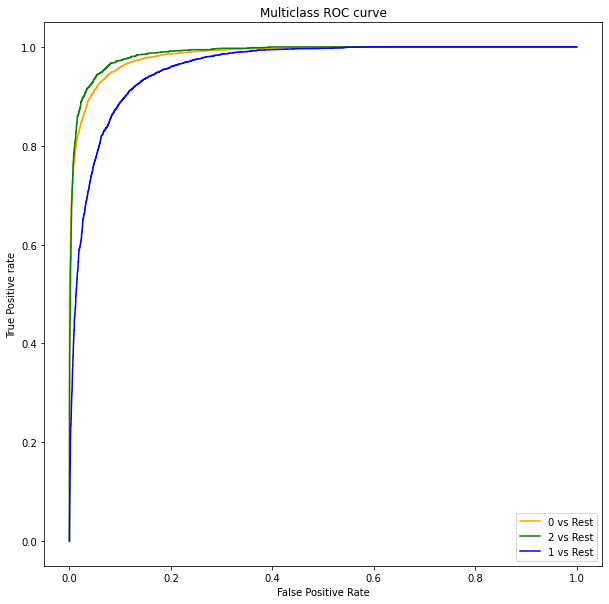

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Class_prob = rscv.predict_proba(X_test)

#roc auc score
roc_auc_score = roc_auc_score(y_test, Class_prob, multi_class='ovo', average='weighted')
print('roc_auc_score', roc_auc_score)
                              
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(Class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, Class_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(Class[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(Class[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(Class[2]) + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [26]:
# %timeit print(classifier.predict(sc.transform([[31, 12, 23, 30]]))[0])

In [27]:
model_results.loc[-1] = ["CatBoost", f1_score, Precision, Recall, roc_auc_score, accuracy, 
                         '1.36 ms ± 120 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  Accuracy  \
0   CatBoost  0.900546   0.900541  0.900609       0.975916  0.900609   

  Time for each pred  
0   1.36 ms ± 120 µs

In [11]:
model_results.loc[-1] = ["CatBoost", 0.900546, 0.900541, 0.900609, 0.975916, 0.900609, 
                         '1.36 ms ± 120 µs']
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

Model Name  F1 Score  Precision    Recall  ROC-AUC Score  \
0                  CatBoost  0.886957   0.886691  0.887291       0.971194   
1                   XGBoost  0.891362   0.891089  0.891705       0.972849   
2  Random Forest Classifier  0.896548   0.896490  0.896651       0.975160   
3  Decision Tree Classifier  0.898040   0.898064  0.898021       0.912530   
4                Kernel SVM  0.834212   0.833808  0.835388       0.942221   
5                GaussianNB  0.585160   0.552928  0.624886       0.791312   
6                      K-NN  0.838987   0.838296  0.839954       0.944390   
7                       ANN       NaN        NaN       NaN            NaN   

   Accuracy Time for each pred  
0  0.887291   1.36 ms ± 120 µs  
1  0.891705   5.25 ms ± 144 µs  
2  0.896651  38.9 ms ± 1.21 ms  
3  0.898021   209 µs ± 13.5 µs  
4  0.835388   1.47 ms ± 112 µs  
5  0.624886   307 µs ± 11.1 µs  
6  0.839954  1.21 ms ± 46.9 µs  
7  0.852900  30.2 ms ± 2.15 ms

In [28]:
#train
y_pred_train = rscv.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_train, y_pred_train))
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
accuracy = accuracy_score(y_train, y_pred_train)
print(accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_train, y_pred_train, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_train, y_pred_train, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_train, y_pred_train, average='weighted')
print('Precision:', Precision)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     22604
           1       0.94      0.92      0.93      5267
           2       0.90      0.90      0.90     11549

    accuracy                           0.94     39420
   macro avg       0.93      0.93      0.93     39420
weighted avg       0.94      0.94      0.94     39420

[[21880    17   707]
 [    3  4834   430]
 [  808   313 10428]]
0.9422120750887875
f1_score: 0.9421737341081434
Recall: 0.9422120750887875
Precision: 0.942163885993675


In [29]:
#train
model_results_train.loc[-1] = ["CatBoost",f1_score, Precision, Recall, accuracy]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0   CatBoost  0.942174   0.942164  0.942212  0.942212

In [11]:
#train
model_results_train.loc[-1] = ["CatBoost",0.942174, 0.942164, 0.942212, 0.942212]
model_results_train.index = model_results_train.index + 1  # shifting index
model_results_train = model_results_train.sort_index()  # sorting by index
model_results_train

Model Name  F1 Score  Precision    Recall  Accuracy
0                  CatBoost  0.942174   0.942164  0.942212  0.942212
1                   XGBoost  0.950227   0.950289  0.950228  0.950228
2  Random Forest Classifier  0.990409   0.990410  0.990411  0.990411
3  Decision Tree Classifier  1.000000   1.000000  1.000000  0.962735
4                Kernel SVM  0.870895   0.870523  0.871842  0.871842
5                GaussianNB  0.594066   0.562813  0.632927  0.632927
6                      K-NN  0.865713   0.865818  0.867871  0.867871
7                       ANN  0.868394   0.868891  0.869428  0.869428

In [19]:
model_results.to_csv('Results.csv')

## Visualizing the final comparison dataframe

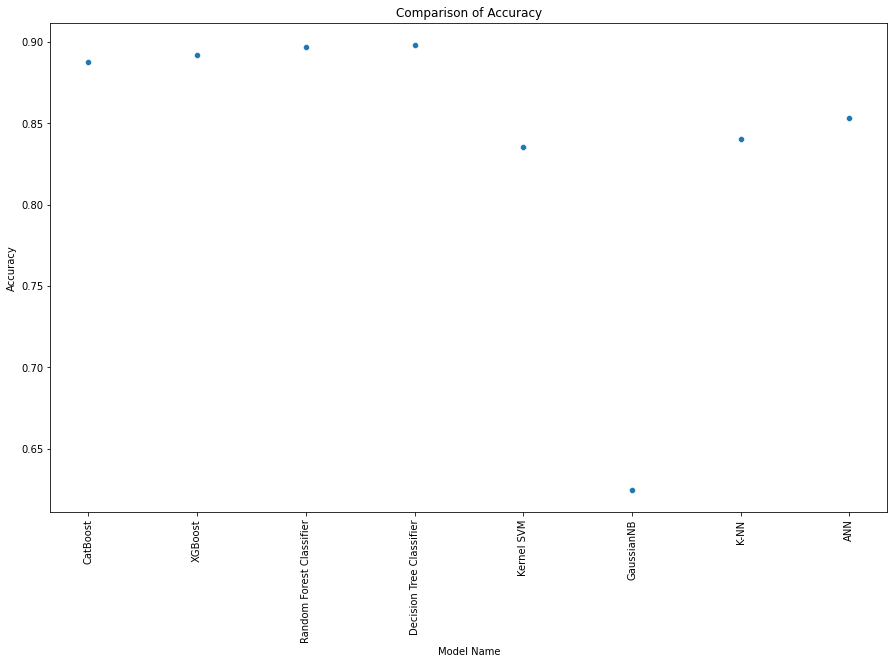

In [12]:
import seaborn as sns 
plt.figure(figsize=(15,9))
sns.scatterplot(data=model_results, x='Model Name', y='Accuracy')
plt.xticks(rotation=90)
plt.title('Comparison of Accuracy')
plt.show()

In [13]:
model_results = model_results.set_index('Model Name')

In [14]:
model_results1 = model_results.copy()

In [15]:
model_results1

F1 Score  Precision    Recall  ROC-AUC Score  \
Model Name                                                               
CatBoost                  0.886957   0.886691  0.887291       0.971194   
XGBoost                   0.891362   0.891089  0.891705       0.972849   
Random Forest Classifier  0.896548   0.896490  0.896651       0.975160   
Decision Tree Classifier  0.898040   0.898064  0.898021       0.912530   
Kernel SVM                0.834212   0.833808  0.835388       0.942221   
GaussianNB                0.585160   0.552928  0.624886       0.791312   
K-NN                      0.838987   0.838296  0.839954       0.944390   
ANN                            NaN        NaN       NaN            NaN   

                          Accuracy Time for each pred  
Model Name                                             
CatBoost                  0.887291   1.36 ms ± 120 µs  
XGBoost                   0.891705   5.25 ms ± 144 µs  
Random Forest Classifier  0.896651  38.9 ms ± 1.21 ms  
Decision Tree Classifier  0.898021   209 µs ± 13.5 µs  
Kernel SVM                0.835388   1.47 ms ± 112 µs  
GaussianNB                0.624886   307 µs ± 11.1 µs  
K-NN                      0.839954  1.21 ms ± 46.9 µs  
ANN                       0.852900  30.2 ms ± 2.15 ms

In [16]:
model_results1.drop('Time for each pred', axis=1, inplace = True)

In [17]:
# Excluding the +- time for 'time for each pred' and taking only the actual time to visualise
time = [1.36, 5.25, 38.9, .209, 1.47, .307, 1.21, 30.2]
model_results1['Time per pred in ms'] = time

In [18]:
model_results1

F1 Score  Precision    Recall  ROC-AUC Score  \
Model Name                                                               
CatBoost                  0.886957   0.886691  0.887291       0.971194   
XGBoost                   0.891362   0.891089  0.891705       0.972849   
Random Forest Classifier  0.896548   0.896490  0.896651       0.975160   
Decision Tree Classifier  0.898040   0.898064  0.898021       0.912530   
Kernel SVM                0.834212   0.833808  0.835388       0.942221   
GaussianNB                0.585160   0.552928  0.624886       0.791312   
K-NN                      0.838987   0.838296  0.839954       0.944390   
ANN                            NaN        NaN       NaN            NaN   

                          Accuracy  Time per pred in ms  
Model Name                                               
CatBoost                  0.887291                1.360  
XGBoost                   0.891705                5.250  
Random Forest Classifier  0.896651               38.900  
Decision Tree Classifier  0.898021                0.209  
Kernel SVM                0.835388                1.470  
GaussianNB                0.624886                0.307  
K-NN                      0.839954                1.210  
ANN                       0.852900               30.200

In [19]:
def style_negative(v, props=''):
    return props if v > .85 else None
s2 = model_results1.style.applymap(style_negative, props='color:red;').applymap(lambda v: 'opacity: 50%;' if (v < 0.7) else None)

In [20]:
s2

In [21]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

# Conclusion 
- **Decission Tree Classifier, Random Rorest Classifier has given the best result acc of 90percent approx. even after performing crossvalidation. So, we will be using Decission Tree Classifier for further deployment.**

# Time Series analysis

Here we will be using a different dataset as an example because of the non avalability of data which will tell us the power over a period of time. We can say that if we have a Global_active_power higher that 4.5 the class is high and likewise.. 

In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np
from scipy.stats import randint
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

# Let's import packages required to perform LSTM
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping
import itertools
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [3]:
#Lets have a look
df.head() 

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [4]:
df.shape

(2075259, 7)

In [5]:
df.tail() 

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2010-11-26 20:58:00                0.946                    0.0   240.43   
2010-11-26 20:59:00                0.944                    0.0   240.00   
2010-11-26 21:00:00                0.938                    0.0   239.82   
2010-11-26 21:01:00                0.934                    0.0   239.70   
2010-11-26 21:02:00                0.932                    0.0   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  
dt                                   
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [7]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [8]:
df.shape

(2075259, 7)

In [9]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [10]:
# filling nan with mean in any columns

for j in range(0,7):        
    df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [11]:
# Final check to make sure that there are not more nan values
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

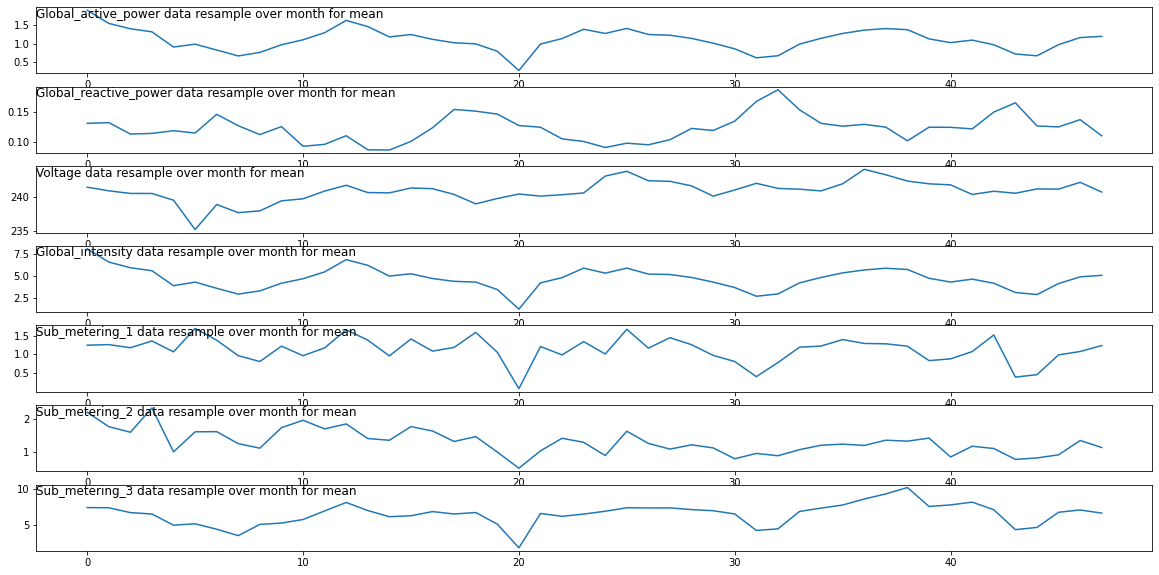

In [12]:
import matplotlib.pyplot as plt

i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

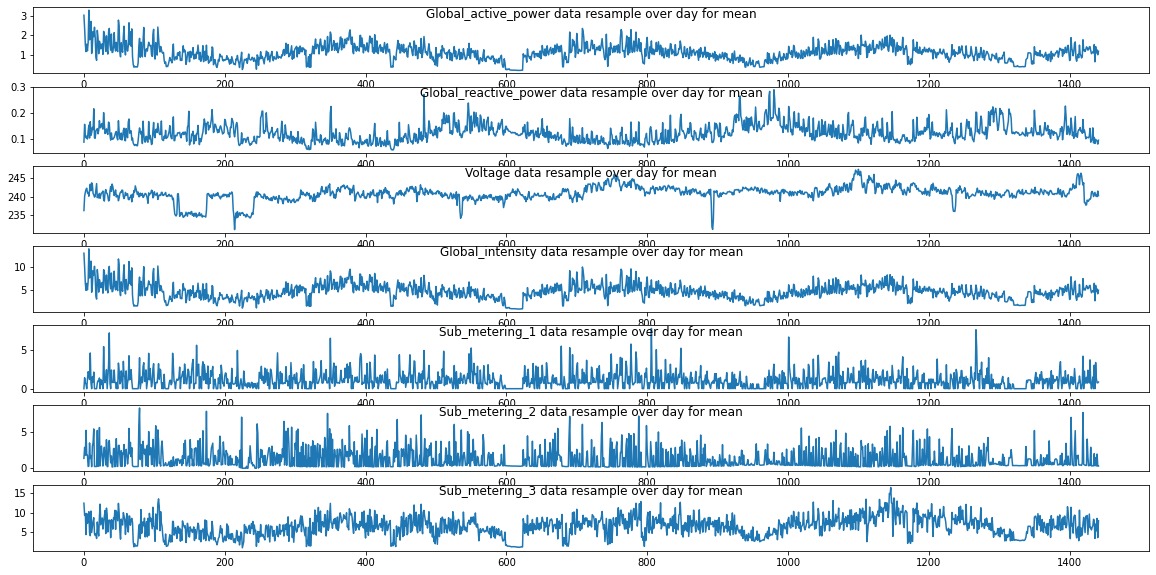

In [13]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

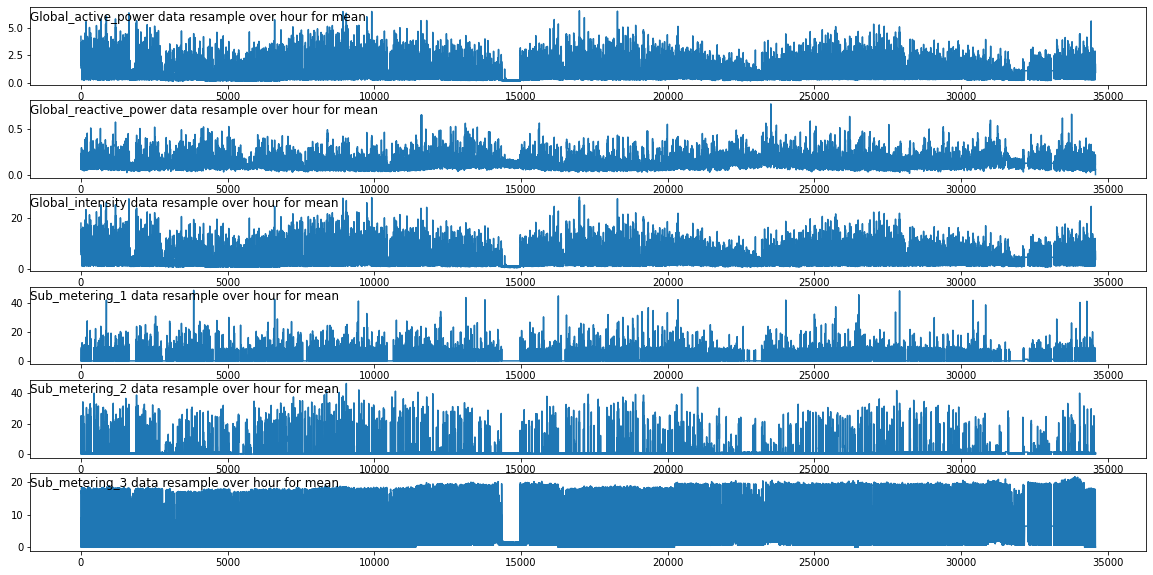

In [14]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

## LSTM Data Preparation and fitting

The LSTM nueral network has been selected because:

    it is best suited for large data,
    time-series, and
    sequential problem.

In the first step, I will fram the problem to predict the Global_active_power.


In [15]:
df = df[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

In [16]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [17]:
df_resample = df.resample('H').mean() 
df_resample.shape

(34589, 7)

In [18]:
df_resample['Global_active_power'].value_counts().sum()

34589

In [19]:
df_resample[df_resample['Global_active_power'] <= 1].value_counts().sum()

19075

In [20]:
df_resample

Global_active_power  Global_reactive_power     Voltage  \
dt                                                                            
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   
...                                  ...                    ...         ...   
2010-11-26 17:00:00             1.725900               0.061400  237.069667   
2010-11-26 18:00:00             1.573467               0.053700  237.531833   
2010-11-26 19:00:00             1.659333               0.060033  236.741000   
2010-11-26 20:00:00             1.163700               0.061167  239.396000   
2010-11-26 21:00:00             0.934667               0.000000  239.690000   

                     Global_intensity  Sub_metering_2  Sub_metering_1  \
dt                                                                      
2006-12-16 17:00:00         18.100000        0.527778             0.0   
2006-12-16 18:00:00         15.600000        6.716667             0.0   
2006-12-16 19:00:00         14.503333        1.433333             0.0   
2006-12-16 20:00:00         13.916667        0.000000             0.0   
2006-12-16 21:00:00         13.046667        0.416667             0.0   
...                               ...             ...             ...   
2010-11-26 17:00:00          7.216667        0.000000             0.0   
2010-11-26 18:00:00          6.620000        0.000000             0.0   
2010-11-26 19:00:00          7.056667        0.066667             0.0   
2010-11-26 20:00:00          4.913333        1.066667             0.0   
2010-11-26 21:00:00          3.800000        0.000000             0.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:00:00       16.861111  
2006-12-16 18:00:00       16.866667  
2006-12-16 19:00:00       16.683333  
2006-12-16 20:00:00       16.783333  
2006-12-16 21:00:00       17.216667  
...                             ...  
2010-11-26 17:00:00       12.866667  
2010-11-26 18:00:00        0.000000  
2010-11-26 19:00:00        0.000000  
2010-11-26 20:00:00        0.000000  
2010-11-26 21:00:00        0.000000  

[34589 rows x 7 columns]

So, we will have 7 input series variables and the 1 output variable for 'Global_active_power' at the current time in hour.

We also splitting the data into: train and validation sets. I select 4000 data over 34,589 dat to train, the rest will be used to test the model.


In [21]:
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 25829
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [22]:
from tensorflow.keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

Epoch 1/50
369/369 - 4s - loss: 0.0121 - val_loss: 0.0082
Epoch 2/50
369/369 - 1s - loss: 0.0100 - val_loss: 0.0079
Epoch 3/50
369/369 - 1s - loss: 0.0098 - val_loss: 0.0079
Epoch 4/50
369/369 - 1s - loss: 0.0097 - val_loss: 0.0078
Epoch 5/50
369/369 - 1s - loss: 0.0097 - val_loss: 0.0078
Epoch 6/50
369/369 - 1s - loss: 0.0096 - val_loss: 0.0078
Epoch 7/50
369/369 - 1s - loss: 0.0096 - val_loss: 0.0078
Epoch 8/50
369/369 - 1s - loss: 0.0096 - val_loss: 0.0077
Epoch 9/50
369/369 - 1s - loss: 0.0096 - val_loss: 0.0078
Epoch 10/50
369/369 - 1s - loss: 0.0095 - val_loss: 0.0077
Epoch 11/50
369/369 - 1s - loss: 0.0096 - val_loss: 0.0077
Epoch 12/50
369/369 - 1s - loss: 0.0095 - val_loss: 0.0077
Epoch 13/50
369/369 - 1s - loss: 0.0095 - val_loss: 0.0077
Epoch 14/50
369/369 - 1s - loss: 0.0095 - val_loss: 0.0077
Epoch 15/50
369/369 - 1s - loss: 0.0094 - val_loss: 0.0077
Epoch 16/50
369/369 - 1s - loss: 0.0094 - val_loss: 0.0077
Epoch 17/50
369/369 - 1s - loss: 0.0094 - val_loss: 0.0077
Epoch 

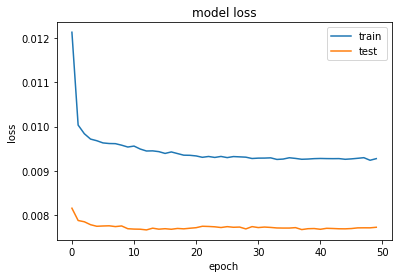

In [24]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [25]:
size = df_resample.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

In [26]:
# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [27]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [28]:
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.566


In [29]:
mean_squared_error(inv_y, inv_yhat)

0.3204318575103723

In [30]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)

Test MAE: 0.439


In [34]:
import statsmodels.api as sm
#train_x2 = sm.add_constant(train_x) 
score = sm.OLS(inv_y, inv_yhat).fit()

#display adjusted R-squared
print(score.rsquared_adj)

0.826752943382555


In [32]:
len(inv_y)

8759

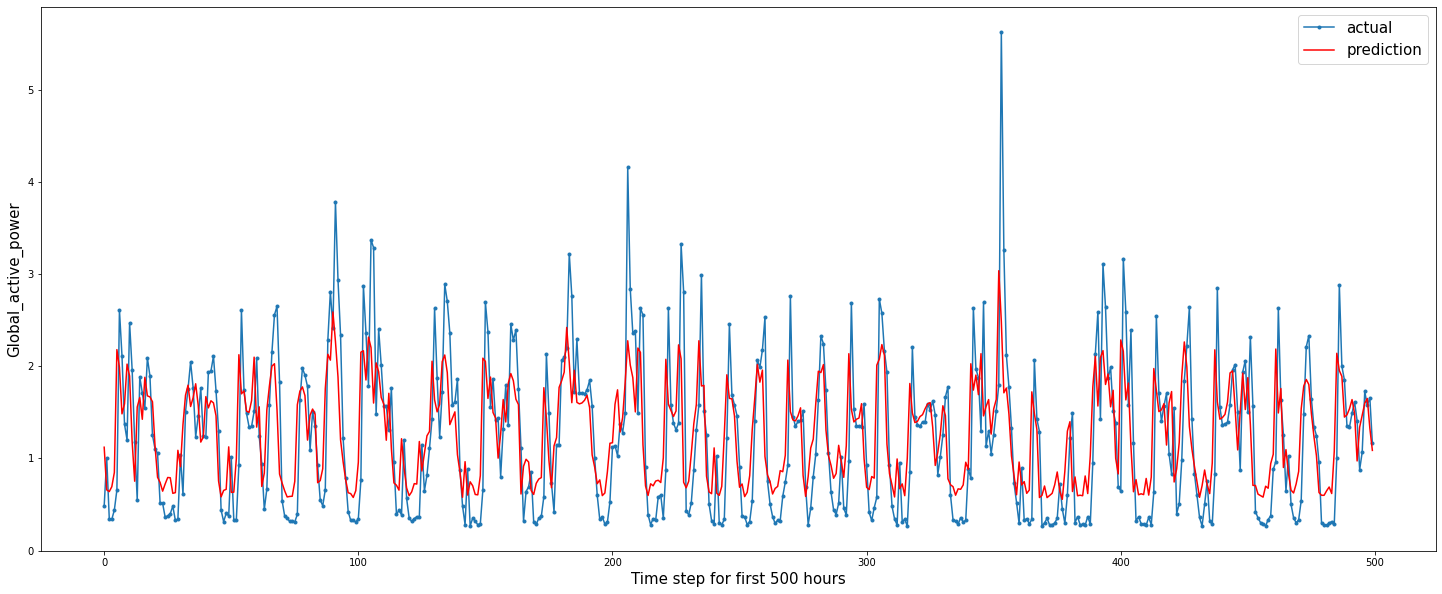

In [33]:
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[-500:], marker='.', label="actual")
plt.plot(aa, inv_yhat[-500:], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

In [44]:
inv_yhat.shape

(8759,)

In [47]:
count = 0
for i in inv_yhat:
    if i > 1.1 and i < 2:
        count += 1
print(count)

3590


In [37]:
inv_yhat

array([1.26393367, 0.68477479, 0.56929178, ..., 1.65283692, 1.32532922,
       1.08408087])

LSTM was successfully performed but the RMSE score is above 0.5 So, we can say model is not fitting well. So, let's check SARIMA model.

# SARIMA

In [16]:
df_resample

Global_active_power  Global_reactive_power     Voltage  \
dt                                                                            
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   
...                                  ...                    ...         ...   
2010-11-26 17:00:00             1.725900               0.061400  237.069667   
2010-11-26 18:00:00             1.573467               0.053700  237.531833   
2010-11-26 19:00:00             1.659333               0.060033  236.741000   
2010-11-26 20:00:00             1.163700               0.061167  239.396000   
2010-11-26 21:00:00             0.934667               0.000000  239.690000   

                     Global_intensity  Sub_metering_2  Sub_metering_1  \
dt                                                                      
2006-12-16 17:00:00         18.100000        0.527778             0.0   
2006-12-16 18:00:00         15.600000        6.716667             0.0   
2006-12-16 19:00:00         14.503333        1.433333             0.0   
2006-12-16 20:00:00         13.916667        0.000000             0.0   
2006-12-16 21:00:00         13.046667        0.416667             0.0   
...                               ...             ...             ...   
2010-11-26 17:00:00          7.216667        0.000000             0.0   
2010-11-26 18:00:00          6.620000        0.000000             0.0   
2010-11-26 19:00:00          7.056667        0.066667             0.0   
2010-11-26 20:00:00          4.913333        1.066667             0.0   
2010-11-26 21:00:00          3.800000        0.000000             0.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:00:00       16.861111  
2006-12-16 18:00:00       16.866667  
2006-12-16 19:00:00       16.683333  
2006-12-16 20:00:00       16.783333  
2006-12-16 21:00:00       17.216667  
...                             ...  
2010-11-26 17:00:00       12.866667  
2010-11-26 18:00:00        0.000000  
2010-11-26 19:00:00        0.000000  
2010-11-26 20:00:00        0.000000  
2010-11-26 21:00:00        0.000000  

[34589 rows x 7 columns]

In [17]:
df_resample.tail(50)

Global_active_power  Global_reactive_power     Voltage  \
dt                                                                            
2010-11-24 20:00:00             2.312867               0.059900  232.669833   
2010-11-24 21:00:00             1.568367               0.075233  233.163333   
2010-11-24 22:00:00             0.422100               0.086733  240.243500   
2010-11-24 23:00:00             0.353100               0.107200  241.794000   
2010-11-25 00:00:00             0.303467               0.073433  241.053333   
2010-11-25 01:00:00             0.289667               0.061433  242.102500   
2010-11-25 02:00:00             0.266367               0.061833  242.468833   
2010-11-25 03:00:00             0.335733               0.116400  242.445333   
2010-11-25 04:00:00             0.377067               0.086967  243.176167   
2010-11-25 05:00:00             0.880533               0.051100  242.858000   
2010-11-25 06:00:00             0.963200               0.062367  242.512167   
2010-11-25 07:00:00             2.627133               0.140633  239.720833   
2010-11-25 08:00:00             1.629400               0.068400  239.449333   
2010-11-25 09:00:00             1.257700               0.063800  238.341333   
2010-11-25 10:00:00             0.645467               0.067300  241.121000   
2010-11-25 11:00:00             1.028067               0.092067  240.614167   
2010-11-25 12:00:00             0.499733               0.092233  243.160833   
2010-11-25 13:00:00             0.356233               0.047400  242.612167   
2010-11-25 14:00:00             0.300667               0.055900  244.911833   
2010-11-25 15:00:00             0.333000               0.109733  245.911333   
2010-11-25 16:00:00             0.541800               0.090467  242.954833   
2010-11-25 17:00:00             1.480100               0.052333  238.264000   
2010-11-25 18:00:00             2.211600               0.083833  236.062500   
2010-11-25 19:00:00             2.330467               0.151567  237.729667   
2010-11-25 20:00:00             1.647833               0.098033  241.659000   
2010-11-25 21:00:00             1.342933               0.049433  240.698833   
2010-11-25 22:00:00             1.247567               0.078933  241.979500   
2010-11-25 23:00:00             0.957000               0.079867  245.062667   
2010-11-26 00:00:00             0.294300               0.089233  241.552667   
2010-11-26 01:00:00             0.281000               0.086867  241.090000   
2010-11-26 02:00:00             0.273433               0.078400  242.547667   
2010-11-26 03:00:00             0.298367               0.086767  243.668667   
2010-11-26 04:00:00             0.314033               0.106433  244.876667   
2010-11-26 05:00:00             0.282567               0.060833  246.022000   
2010-11-26 06:00:00             1.008767               0.047033  243.329833   
2010-11-26 07:00:00             2.883933               0.102833  238.316833   
2010-11-26 08:00:00             1.999300               0.113833  239.721667   
2010-11-26 09:00:00             1.849967               0.063500  239.980167   
2010-11-26 10:00:00             1.352767               0.089800  238.862333   
2010-11-26 11:00:00             1.338900               0.107767  238.002167   
2010-11-26 12:00:00             1.490200               0.094200  237.943333   
2010-11-26 13:00:00             1.612933               0.206533  238.550333   
2010-11-26 14:00:00             1.407767               0.125233  239.690333   
2010-11-26 15:00:00             0.876433               0.102567  240.790667   
2010-11-26 16:00:00             1.067933               0.215633  240.457833   
2010-11-26 17:00:00             1.725900               0.061400  237.069667   
2010-11-26 18:00:00             1.573467               0.053700  237.531833   
2010-11-26 19:00:00             1.659333               0.060033  236.741000   
2010-11-26 20:00:00             1.163700               0.061167  239.39

In [18]:
df_resample.index

DatetimeIndex(['2006-12-16 17:00:00', '2006-12-16 18:00:00',
               '2006-12-16 19:00:00', '2006-12-16 20:00:00',
               '2006-12-16 21:00:00', '2006-12-16 22:00:00',
               '2006-12-16 23:00:00', '2006-12-17 00:00:00',
               '2006-12-17 01:00:00', '2006-12-17 02:00:00',
               ...
               '2010-11-26 12:00:00', '2010-11-26 13:00:00',
               '2010-11-26 14:00:00', '2010-11-26 15:00:00',
               '2010-11-26 16:00:00', '2010-11-26 17:00:00',
               '2010-11-26 18:00:00', '2010-11-26 19:00:00',
               '2010-11-26 20:00:00', '2010-11-26 21:00:00'],
              dtype='datetime64[ns]', name='dt', length=34589, freq='H')

In [19]:
df_resample.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_2           0
Sub_metering_1           0
Sub_metering_3           0
dtype: int64

In [20]:
df_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34589 non-null  float64
 1   Global_reactive_power  34589 non-null  float64
 2   Voltage                34589 non-null  float64
 3   Global_intensity       34589 non-null  float64
 4   Sub_metering_2         34589 non-null  float64
 5   Sub_metering_1         34589 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


In [26]:
#title = 'Hourly global active power'
#ylabel='parts per million'
#xlabel = ''
#ax = df['Global_active_power'].plot(figsize=(12,6),title=title)
#ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel, ylabel=ylabel);

In [27]:
df_resample.corr()

Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.312364 -0.379519   
Global_reactive_power             0.312364               1.000000 -0.147577   
Voltage                          -0.379519              -0.147577  1.000000   
Global_intensity                  0.999423               0.328489 -0.392843   
Sub_metering_2                    0.440207               0.256834 -0.162987   
Sub_metering_1                    0.496377               0.328638 -0.207764   
Sub_metering_3                    0.695509               0.103563 -0.277351   

                       Global_intensity  Sub_metering_2  Sub_metering_1  \
Global_active_power            0.999423        0.440207        0.496377   
Global_reactive_power          0.328489        0.256834        0.328638   
Voltage                       -0.392843       -0.162987       -0.207764   
Global_intensity               1.000000        0.447492        0.504783   
Sub_metering_2                 0.447492        1.000000        0.115564   
Sub_metering_1                 0.504783        0.115564        1.000000   
Sub_metering_3                 0.685718        0.124383        0.195251   

                       Sub_metering_3  
Global_active_power          0.695509  
Global_reactive_power        0.103563  
Voltage                     -0.277351  
Global_intensity             0.685718  
Sub_metering_2               0.124383  
Sub_metering_1               0.195251  
Sub_metering_3               1.000000

In [21]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

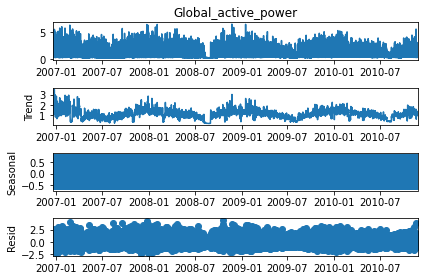

In [39]:
result = seasonal_decompose(df_resample['Global_active_power'], model='add')
result.plot();

In [22]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [23]:
adf_test(series = df_resample['Global_active_power'],title='Augmented Dickey-Fuller Test on Data')


Augmented Dickey-Fuller Test: Augmented Dickey-Fuller Test on Data
ADF test statistic     -1.436949e+01
p-value                 9.547270e-27
# lags used             5.100000e+01
# observations          3.453700e+04
critical value (1%)    -3.430539e+00
critical value (5%)    -2.861624e+00
critical value (10%)   -2.566815e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


<AxesSubplot:xlabel='dt'>

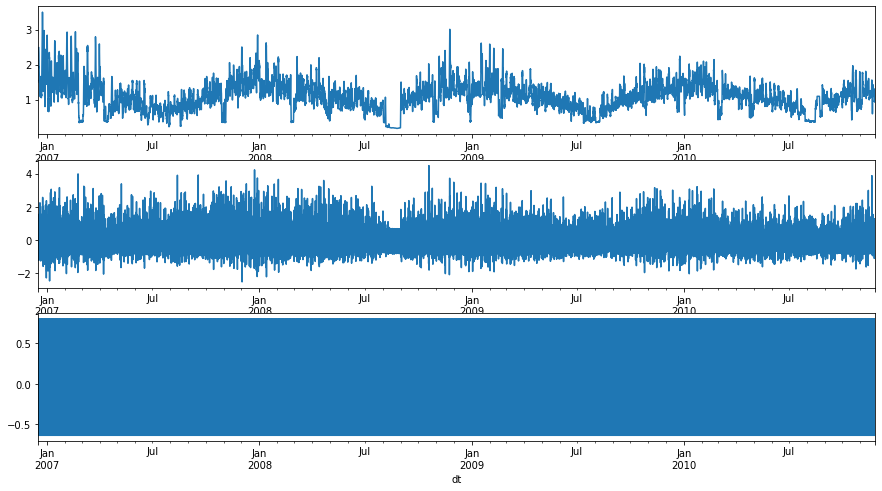

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
result.trend.plot(ax=ax1)
result.resid.plot(ax=ax2)
result.seasonal.plot(ax=ax3)

<AxesSubplot:xlabel='dt'>

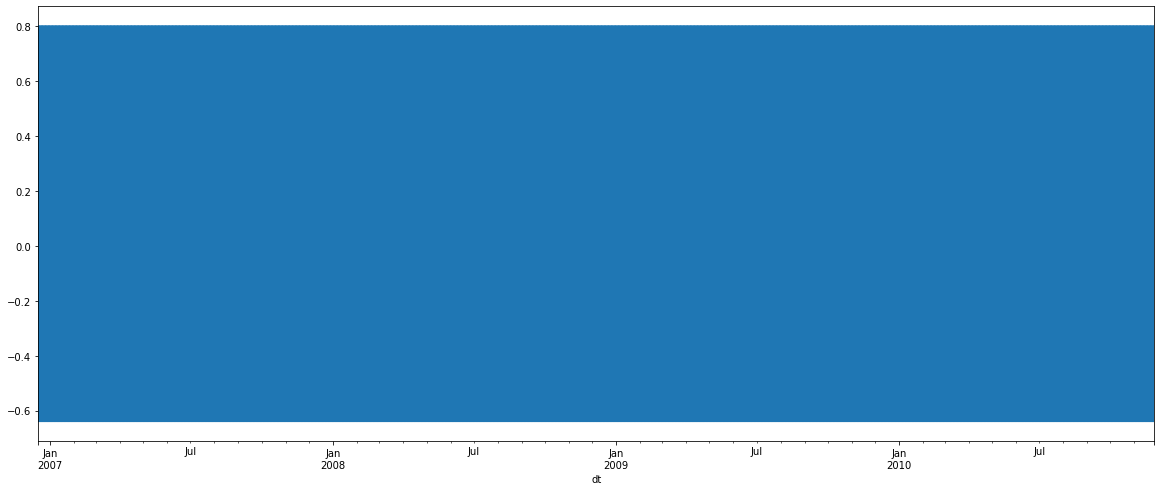

In [41]:
result.seasonal.plot(figsize=(20,8))

Although small in scale compared to the overall values, there is a definite annual seasonality.

**Run pmdarima.auto_arima to obtain recommended orders**

This may take awhile as there are a lot more combinations to evaluate.

In [28]:
# For SARIMA Orders we set seasonal=True and pass in an m value
#auto_arima(df_resample['Global_active_power'],seasonal=True,m=24).summary()

In [29]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [30]:
# Let's look first at the ACF array. By default acf() returns 40 lags
acf(df_resample['Global_active_power'])

array([ 1.        ,  0.71312107,  0.46493892,  0.2860404 ,  0.15016502,
        0.06391176,  0.01592453, -0.00694176,  0.00951631,  0.06527992,
        0.1452468 ,  0.21336957,  0.23811662,  0.20748575,  0.14050543,
        0.06036855,  0.00144657, -0.02346746, -0.02125831,  0.00700852,
        0.06015862,  0.14401906,  0.25748305,  0.37445166,  0.43419306,
        0.38169229,  0.26848944,  0.15313847,  0.0662428 ,  0.00888206,
       -0.02370165, -0.03618975, -0.01910838,  0.03801327,  0.11437403,
        0.18115127,  0.20401204,  0.17172794,  0.10426843,  0.02871398,
       -0.02501829])

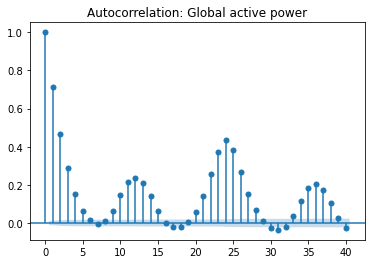

In [31]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Global active power'
lags = 40
plot_acf(df_resample['Global_active_power'],title=title,lags=lags);

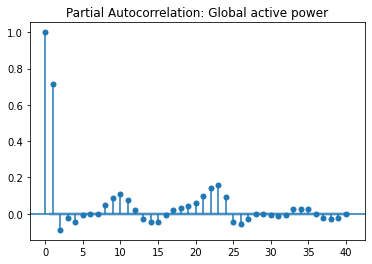

In [38]:
title='Partial Autocorrelation: Global active power'
lags=40
plot_pacf(df_resample['Global_active_power'],title=title,lags=lags);

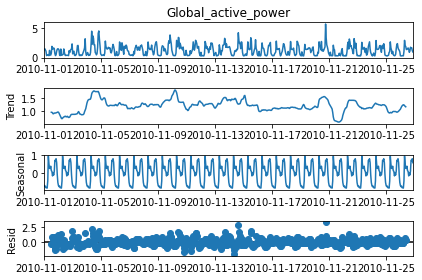

In [49]:
result = seasonal_decompose(df_resample['Global_active_power'].loc['2010-11-01 00:00:00':], model='add')
result.plot();

<AxesSubplot:xlabel='dt'>

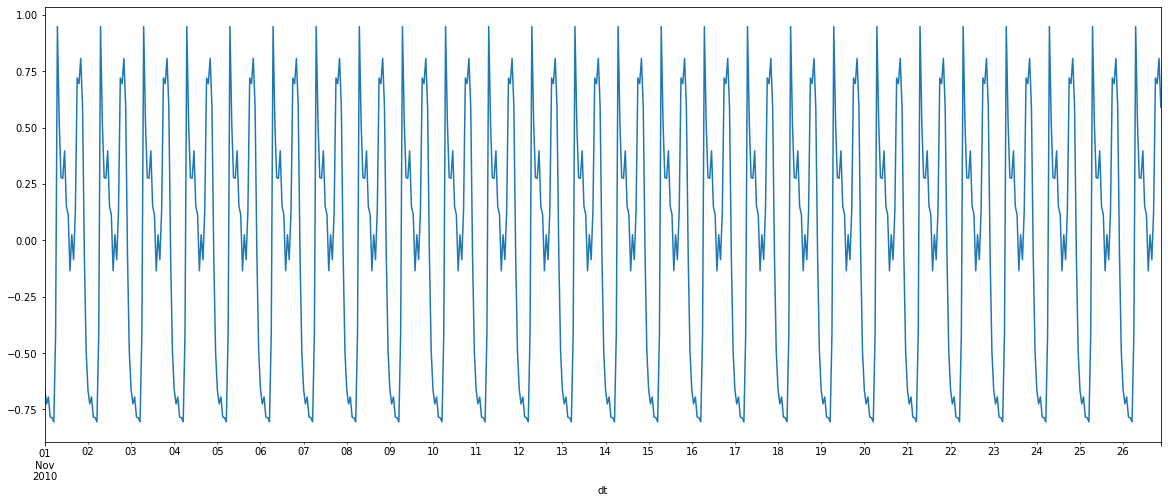

In [50]:
result.seasonal.plot(figsize=(20,8))

In [32]:
auto_arima(df_resample['Global_active_power'],seasonal=True,m=24).summary()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [22]:
train = df_resample.iloc[:25829]
test = df_resample.iloc[25829:]

In [23]:
model = SARIMAX(train['Global_active_power'],order=(1,0,1),seasonal_order=(1,0,1,24))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                Global_active_power   No. Observations:                25829
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -22650.619
Date:                            Thu, 02 Dec 2021   AIC                          45311.239
Time:                                    11:29:40   BIC                          45352.035
Sample:                                12-16-2006   HQIC                         45324.423
                                     - 11-26-2009                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6356      0.006    104.918      0.000       0.624       0.647
ma.L1      -6.486e-05      0.008     -0.008      0.993      -0.015       0.015
ar.S.L24       0.9983      0.000   4124.836      0.000       0.998       0.999
ma.S.L24      -0.9438      0.002   -510.829      0.000      -0.947      -0.940
sigma2         0.3375      0.002    182.653      0.000       0.334       0.341
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             17579.15
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,0,1)(1,0,1,24) Predictions')

In [34]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]}, expected={test['Global_active_power'][i]}")

predicted=1.3629867399523652, expected=0.6484333333333328
predicted=0.7679289698361565, expected=1.0881999999999998
predicted=0.5395039219398743, expected=0.34889999999999993
predicted=0.3990411922463304, expected=0.30006666666666665
predicted=0.3727738605040882, expected=0.3681666666666666
predicted=0.3685283010437467, expected=0.2804
predicted=0.3558363868920219, expected=0.9719666666666666
predicted=0.4100922450043528, expected=0.3657333333333333
predicted=0.7300133796664993, expected=0.5166333333333334
predicted=1.7716871760131665, expected=1.4024999999999994
predicted=1.6779506954871977, expected=1.4957666666666667
predicted=1.4710613312915435, expected=1.7657000000000003
predicted=1.4113758239864107, expected=1.5259666666666676
predicted=1.2916060356452044, expected=1.6622999999999999
predicted=1.3146274887665657, expected=1.376133333333333
predicted=1.2130162657767825, expected=1.4714333333333331
predicted=1.0018561471313205, expected=1.3748666666666662
predicted=0.9743174249101

predicted=0.8194015504212009, expected=1.7884333333333329
predicted=1.02961949904057, expected=1.7697333333333334
predicted=1.3279291354207166, expected=1.7690000000000003
predicted=1.5535336483411224, expected=1.534066666666667
predicted=2.034455542666823, expected=1.0859999999999996
predicted=2.2180600549255516, expected=1.0920333333333336
predicted=1.7803336198876585, expected=1.3783666666666663
predicted=1.284298062151267, expected=0.9789333333333332
predicted=0.7337017741829819, expected=0.5670666666666667
predicted=0.5094984083987661, expected=0.7140000000000001
predicted=0.3709611520183657, expected=0.8372666666666667
predicted=0.3358060317990945, expected=0.3254666666666667
predicted=0.3239135791093142, expected=0.38849999999999996
predicted=0.3079650997699023, expected=0.32046666666666657
predicted=0.3501497206517944, expected=0.3272666666666667
predicted=0.6165923313057634, expected=0.9236666666666665
predicted=1.4897417757898412, expected=2.0521000000000003
predicted=1.41018

predicted=0.29297138282611684, expected=0.2842666666666666
predicted=0.515904760987282, expected=1.0408666666666668
predicted=1.2464716730161558, expected=1.4192333333333331
predicted=1.1799054639589144, expected=1.1743333333333335
predicted=1.0341205373935767, expected=1.4962333333333335
predicted=0.9919035908325377, expected=1.431366666666667
predicted=0.9075879781056766, expected=1.6219333333333332
predicted=0.9236410073728217, expected=1.9613666666666665
predicted=0.8521911494296466, expected=0.9724666666666668
predicted=0.7038180573429395, expected=0.28336666666666654
predicted=0.6844437148271132, expected=0.27043333333333347
predicted=0.860038151525963, expected=0.31913333333333327
predicted=1.1092153169679824, expected=0.3674000000000001
predicted=1.2976621057562503, expected=0.2843666666666667
predicted=1.6993747553415144, expected=0.3055666666666667
predicted=1.8527390666059804, expected=0.32926666666666665
predicted=1.4871074576331202, expected=1.3311
predicted=1.072770409272

predicted=0.22486387824350185, expected=0.3867333333333332
predicted=0.21379229264894842, expected=0.37803333333333333
predicted=0.24307725649583994, expected=0.43933333333333324
predicted=0.4280442434487186, expected=1.1875999999999998
predicted=1.0341928677599672, expected=2.9720999999999997
predicted=0.9789631339993643, expected=1.7274
predicted=0.8580059277148799, expected=3.2096000000000005
predicted=0.8229786856385467, expected=1.8472666666666668
predicted=0.753022338285757, expected=0.9929333333333332
predicted=0.7663414764045166, expected=0.9460666666666667
predicted=0.7070597974968111, expected=1.226766666666667
predicted=0.583955199995399, expected=1.9144999999999999
predicted=0.5678803807426493, expected=0.9037999999999999
predicted=0.713570425677931, expected=0.9570333333333333
predicted=0.9203117844167286, expected=0.41783333333333333
predicted=1.0766653776319763, expected=1.7473333333333332
predicted=1.409964854935584, expected=4.117766666666667
predicted=1.53721064825139

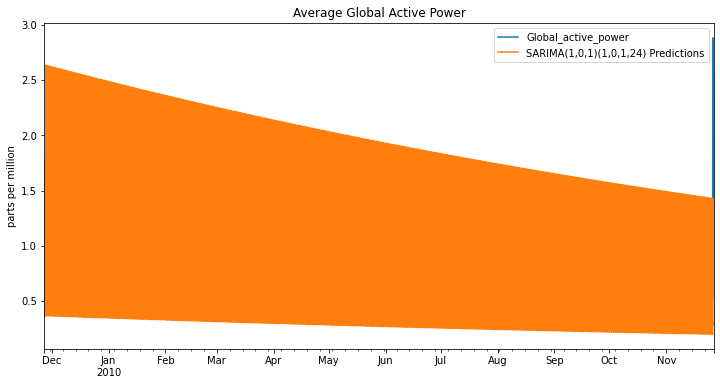

In [35]:
# Plot predictions against known values
title = 'Average Global Active Power'
ylabel='parts per million'
xlabel=''

ax = test['Global_active_power'].loc['2010-11-26 00:00:00':].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);